# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [7]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [8]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects

# process all reviews
for i in range(len(reviews)):
    if labels[i] == 'POSITIVE':
        for word in reviews[i].split(' '):
            total_counts[word] += 1
            positive_counts[word] += 1
        # end for
    elif labels[i] == 'NEGATIVE':
        for word in reviews[i].split(' '):
            total_counts[word] += 1
            negative_counts[word] += 1
        # end for
    else: 
        raise ValueError('label is neither positive nor negative.')
    # end if elif else
# end for
        
        

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [9]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [11]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times

for word in total_counts:
    if total_counts[word] > 100:
        pos_neg_ratios[word] = positive_counts[word] / float(negative_counts[word]+1)
# end for

Examine the ratios you've calculated for a few words:

In [12]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [13]:
# TODO: Convert ratios to logs
for word in pos_neg_ratios:
    pos_neg_ratios[word] = np.log(pos_neg_ratios[word])
# end for

Examine the new ratios you've calculated for the same words from before:

In [14]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.9698132995760007),
 ('uwe', -4.6249728132842707),
 ('seagal', -3.6441435602725449),
 ('unwatchable', -3.2580965380214821),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.3075726345050849),
 ('worst', -2.2869878961803778),
 ('laughable', -2.2643638801738479),
 ('awful', -2.2271942470274348),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.2046046846338418),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.9951003932460849),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.9870682215488209),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166)

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

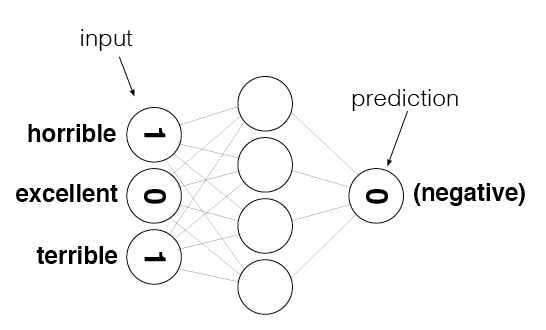

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

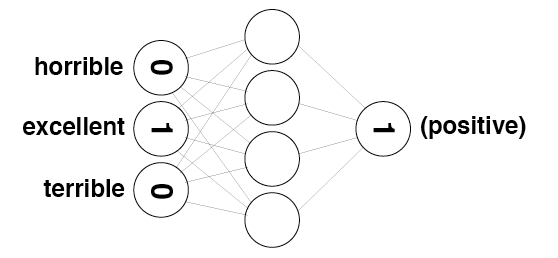

In [18]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [19]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = set(total_counts.keys())

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [20]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

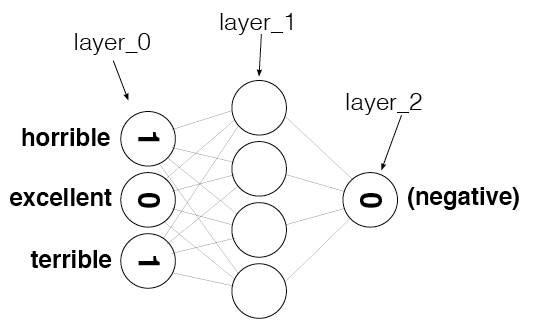

In [21]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [22]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros((1,vocab_size))

Run the following cell. It should display `(1, 74074)`

In [23]:
layer_0.shape

(1, 74074)

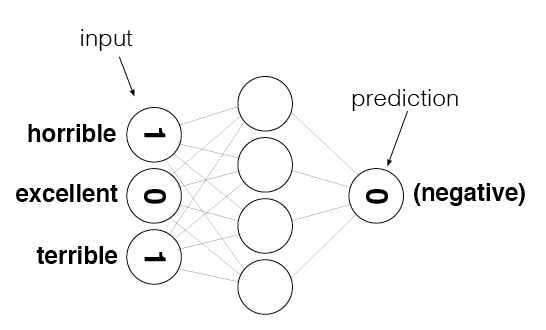

In [24]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [25]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'cultivated': 1,
 'airship': 2,
 'colvig': 3,
 'uglying': 4,
 'landmark': 5,
 'enquiry': 6,
 'amandola': 7,
 'seaver': 8,
 'traill': 9,
 'elected': 10,
 'wrecks': 11,
 'inconsequental': 12,
 'costas': 13,
 'ballast': 14,
 'pup': 15,
 'catalua': 16,
 'melachonic': 17,
 'irrelevancy': 18,
 'horsey': 19,
 'ricca': 20,
 'infrequent': 21,
 'giraldi': 22,
 'shelob': 23,
 'rosetta': 24,
 'pullers': 25,
 'dumbbells': 26,
 'whittington': 27,
 'nerdbomber': 28,
 'jochen': 29,
 'faylen': 30,
 'catelain': 31,
 'devadharshini': 32,
 'matches': 33,
 'slow': 34,
 'barely': 35,
 'satisfaction': 36,
 'maughan': 37,
 'alyn': 38,
 'devotional': 39,
 'everly': 40,
 'witchy': 41,
 'markland': 42,
 'murky': 43,
 'hybrids': 44,
 'abandonment': 45,
 'proctology': 46,
 'poppingly': 47,
 'ril': 48,
 'tit': 49,
 'leigh': 50,
 'sliders': 51,
 'krueger': 52,
 'crony': 53,
 'sociable': 54,
 'hvr': 55,
 'woronov': 56,
 'lachrymose': 57,
 'misdrawing': 58,
 'gerhard': 59,
 'unbiased': 60,
 'locates': 61,
 'a

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [26]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(' '):
        layer_0[0][word2index[word]] += 1
        #print("updating index {}; word = {}".format(word2index[word],word))
    # end for
# end def

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [27]:
print(reviews[0])
update_input_layer(reviews[0])
layer_0

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   


array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [28]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    if label == 'POSITIVE':
        return 1
    elif label == 'NEGATIVE':
        return 0
    else:
        raise ValueError('label is neither POSITIVE nor NEGATIVE')
    # end if elif else
# end def

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [29]:
labels[0]

'POSITIVE'

In [30]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [31]:
labels[1]

'NEGATIVE'

In [32]:
get_target_for_label(labels[1])

0

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [46]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimentNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
            # end for
        # end for
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # end for
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        # end for
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for i,word in enumerate(self.label_vocab):
            self.label2index[word] = i 
        # end for
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        print("**initializing network**")
        print("input nodes: {}  hidden nodes: {}  output nodes: {}".format(input_nodes, hidden_nodes, output_nodes))
        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        # clear previous state
        self.layer_0 *= 0
        for word in review.split(' '):
            try:
                self.layer_0[0][self.word2index[word]] += 1
            except KeyError:
                #print("KeyError in update_input_layer: {} not seen during training - skipping.".format(word))
                pass
            # end try except
            #print("updating index {}; word = {}".format(word2index[word],word))
        # end for
        #print("self.layer_0: "); print(self.layer_0)
    
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if label == 'POSITIVE':
            return 1
        elif label == 'NEGATIVE':
            return 0
        else:
            raise ValueError('label is neither POSITIVE nor NEGATIVE')
        # end if elif else
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        # Prevent overflow.
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        delta_weights_0_1 = np.zeros(self.weights_0_1.shape) # input_nodes x hidden_nodes
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape) # hidden_nodes x output_nodes
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        #print("Running forward pass. Review:")
        #print(review)
        
        self.update_input_layer(review)
        #print("input layer shape: "); print(self.layer_0.shape)
        #print("weights_0_1 shape: "); print(self.weights_0_1.shape)
        hidden_layer = np.dot(self.layer_0, self.weights_0_1) #hidden inputs = outputs
        #print("hidden_layer shape: "); print(hidden_layer.shape)
        #print("weights_1_2 shape: "); print(self.weights_1_2.shape)
        output_inputs = np.dot(hidden_layer, self.weights_1_2) # keep for backward pass
        #print("output_inputs: "); print(output_inputs)
        output = self.sigmoid(output_inputs)
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        #print("output: {}".format(output))
        if output < 0.5:
            return 'NEGATIVE'
        else:
            return 'POSITIVE'
        # end if


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [47]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

**initializing network**
input nodes: 72810  hidden nodes: 10  output nodes: 1


Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [41]:
mlp.test(reviews[-1000:],labels[-1000:])

self.layer_0: 
[[ 6.  0.  0. ...,  0.  0.  0.]]
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%self.layer_0: 
[[ 57.   0.   0. ...,   0.   0.   0.]]
Progress:0.1% Speed(reviews/sec):206.8 #Correct:1 #Tested:2 Testing Accuracy:50.0%self.layer_0: 
[[ 62.   0.   0. ...,   0.   0.   0.]]
Progress:0.2% Speed(reviews/sec):301.1 #Correct:2 #Tested:3 Testing Accuracy:66.6%self.layer_0: 
[[ 93.   0.   0. ...,   0.   0.   0.]]
Progress:0.3% Speed(reviews/sec):348.3 #Correct:2 #Tested:4 Testing Accuracy:50.0%self.layer_0: 
[[ 96.   0.   0. ...,   0.   0.   0.]]
Progress:0.4% Speed(reviews/sec):383.8 #Correct:3 #Tested:5 Testing Accuracy:60.0%self.layer_0: 
[[ 116.    0.    0. ...,    0.    0.    0.]]
Progress:0.5% Speed(reviews/sec):409.0 #Correct:3 #Tested:6 Testing Accuracy:50.0%self.layer_0: 
[[ 189.    0.    0. ...,    0.    0.    0.]]
Progress:0.6% Speed(reviews/sec):419.9 #Correct:4 #Tested:7 Testing Accuracy:57.1%self.layer_0: 
[[ 229.    0.    0. ...,    0

Progress:14.4% Speed(reviews/sec):711.7 #Correct:73 #Tested:145 Testing Accuracy:50.3%self.layer_0: 
[[ 6129.     0.     0. ...,     0.     0.     0.]]
Progress:14.5% Speed(reviews/sec):711.5 #Correct:73 #Tested:146 Testing Accuracy:50.0%self.layer_0: 
[[ 6211.     0.     0. ...,     0.     0.     0.]]
Progress:14.6% Speed(reviews/sec):708.8 #Correct:74 #Tested:147 Testing Accuracy:50.3%self.layer_0: 
[[ 6228.     0.     0. ...,     0.     0.     0.]]
Progress:14.7% Speed(reviews/sec):708.6 #Correct:74 #Tested:148 Testing Accuracy:50.0%self.layer_0: 
[[ 6254.     0.     0. ...,     0.     0.     0.]]
Progress:14.8% Speed(reviews/sec):710.0 #Correct:75 #Tested:149 Testing Accuracy:50.3%self.layer_0: 
[[ 6277.     0.     0. ...,     0.     0.     0.]]
Progress:14.9% Speed(reviews/sec):711.3 #Correct:75 #Tested:150 Testing Accuracy:50.0%self.layer_0: 
[[ 6292.     0.     0. ...,     0.     0.     0.]]
Progress:15.0% Speed(reviews/sec):712.8 #Correct:76 #Tested:151 Testing Accuracy:50.3%se

Progress:34.0% Speed(reviews/sec):842.3 #Correct:171 #Tested:341 Testing Accuracy:50.1%self.layer_0: 
[[ 14066.      0.      0. ...,      0.      0.      0.]]
Progress:34.1% Speed(reviews/sec):842.0 #Correct:171 #Tested:342 Testing Accuracy:50.0%self.layer_0: 
[[ 14201.      0.      0. ...,      0.      0.      0.]]
Progress:34.2% Speed(reviews/sec):838.7 #Correct:172 #Tested:343 Testing Accuracy:50.1%self.layer_0: 
[[ 14205.      0.      0. ...,      0.      0.      0.]]
Progress:34.3% Speed(reviews/sec):839.0 #Correct:172 #Tested:344 Testing Accuracy:50.0%self.layer_0: 
[[ 14276.      0.      0. ...,      0.      0.      0.]]
Progress:34.4% Speed(reviews/sec):838.9 #Correct:173 #Tested:345 Testing Accuracy:50.1%self.layer_0: 
[[ 14336.      0.      0. ...,      0.      0.      0.]]
Progress:34.5% Speed(reviews/sec):839.3 #Correct:173 #Tested:346 Testing Accuracy:50.0%self.layer_0: 
[[ 14350.      0.      0. ...,      0.      0.      0.]]
Progress:34.6% Speed(reviews/sec):840.0 #Corre

Progress:53.2% Speed(reviews/sec):879.5 #Correct:267 #Tested:533 Testing Accuracy:50.0%self.layer_0: 
[[ 23139.      0.      0. ...,      0.      0.      0.]]
Progress:53.3% Speed(reviews/sec):879.1 #Correct:267 #Tested:534 Testing Accuracy:50.0%self.layer_0: 
[[ 23161.      0.      0. ...,      0.      0.      0.]]
Progress:53.4% Speed(reviews/sec):878.5 #Correct:268 #Tested:535 Testing Accuracy:50.0%self.layer_0: 
[[ 23178.      0.      0. ...,      0.      0.      0.]]
Progress:53.5% Speed(reviews/sec):877.9 #Correct:268 #Tested:536 Testing Accuracy:50.0%self.layer_0: 
[[ 23190.      0.      0. ...,      0.      0.      0.]]
Progress:53.6% Speed(reviews/sec):878.3 #Correct:269 #Tested:537 Testing Accuracy:50.0%self.layer_0: 
[[ 23227.      0.      0. ...,      0.      0.      0.]]
Progress:53.7% Speed(reviews/sec):878.7 #Correct:269 #Tested:538 Testing Accuracy:50.0%self.layer_0: 
[[ 23266.      0.      0. ...,      0.      0.      0.]]
Progress:53.8% Speed(reviews/sec):878.9 #Corre

Progress:69.2% Speed(reviews/sec):859.0 #Correct:347 #Tested:693 Testing Accuracy:50.0%self.layer_0: 
[[ 29724.      0.      0. ...,      0.      0.      0.]]
Progress:69.3% Speed(reviews/sec):857.6 #Correct:347 #Tested:694 Testing Accuracy:50.0%self.layer_0: 
[[ 29775.      0.      0. ...,      0.      0.      0.]]
Progress:69.4% Speed(reviews/sec):856.6 #Correct:348 #Tested:695 Testing Accuracy:50.0%self.layer_0: 
[[ 29860.      0.      0. ...,      0.      0.      0.]]
Progress:69.5% Speed(reviews/sec):855.2 #Correct:348 #Tested:696 Testing Accuracy:50.0%self.layer_0: 
[[ 29867.      0.      0. ...,      0.      0.      0.]]
Progress:69.6% Speed(reviews/sec):854.7 #Correct:349 #Tested:697 Testing Accuracy:50.0%self.layer_0: 
[[ 29891.      0.      0. ...,      0.      0.      0.]]
Progress:69.7% Speed(reviews/sec):853.8 #Correct:349 #Tested:698 Testing Accuracy:50.0%self.layer_0: 
[[ 29927.      0.      0. ...,      0.      0.      0.]]
Progress:69.8% Speed(reviews/sec):853.0 #Corre

Progress:82.7% Speed(reviews/sec):821.4 #Correct:414 #Tested:828 Testing Accuracy:50.0%self.layer_0: 
[[  3.58400000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:82.8% Speed(reviews/sec):819.4 #Correct:415 #Tested:829 Testing Accuracy:50.0%self.layer_0: 
[[  3.58660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:82.9% Speed(reviews/sec):818.9 #Correct:415 #Tested:830 Testing Accuracy:50.0%self.layer_0: 
[[  3.58760000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:83.0% Speed(reviews/sec):819.1 #Correct:416 #Tested:831 Testing Accuracy:50.0%self.layer_0: 
[[  3.58980000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:83.1% Speed(reviews/sec):819.4 #Correct:416 #Tested:832 Testing Accuracy:50.0%self.layer_0: 
[[  3.59540000e+04   0.00000000e+00   

[[  4.19640000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:97.8% Speed(reviews/sec):817.5 #Correct:490 #Tested:979 Testing Accuracy:50.0%self.layer_0: 
[[  4.20200000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:97.9% Speed(reviews/sec):817.5 #Correct:490 #Tested:980 Testing Accuracy:50.0%self.layer_0: 
[[  4.20370000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:98.0% Speed(reviews/sec):817.7 #Correct:491 #Tested:981 Testing Accuracy:50.0%self.layer_0: 
[[  4.21660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:98.1% Speed(reviews/sec):817.2 #Correct:491 #Tested:982 Testing Accuracy:50.0%self.layer_0: 
[[  4.22090000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:98.2% Speed(review

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [42]:
mlp.train(reviews[:-1000],labels[:-1000])

self.layer_0: 
[[  4.30340000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
self.layer_0: 
[[  4.30390000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.00% Speed(reviews/sec):69.21 #Correct:1 #Trained:2 Training Accuracy:50.0%self.layer_0: 
[[  4.31170000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.00% Speed(reviews/sec):97.25 #Correct:2 #Trained:3 Training Accuracy:66.6%self.layer_0: 
[[  4.32840000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.01% Speed(reviews/sec):111.9 #Correct:2 #Trained:4 Training Accuracy:50.0%self.layer_0: 
[[  4.33030000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.01% Speed(r

Progress:0.33% Speed(reviews/sec):200.2 #Correct:41 #Trained:82 Training Accuracy:50.0%self.layer_0: 
[[  4.68580000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.34% Speed(reviews/sec):200.5 #Correct:42 #Trained:83 Training Accuracy:50.6%self.layer_0: 
[[  4.68850000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.34% Speed(reviews/sec):201.0 #Correct:42 #Trained:84 Training Accuracy:50.0%self.layer_0: 
[[  4.69970000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.35% Speed(reviews/sec):201.2 #Correct:43 #Trained:85 Training Accuracy:50.5%self.layer_0: 
[[  4.70170000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.35% Speed(reviews/sec):201.6 #Correct:43 #Trained:86 Training Accuracy:50.0%self.layer_0: 
[[  4.70380000e+04   0.00000000e+00   

Progress:0.53% Speed(reviews/sec):210.3 #Correct:65 #Trained:129 Training Accuracy:50.3%self.layer_0: 
[[  4.94970000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.53% Speed(reviews/sec):210.5 #Correct:65 #Trained:130 Training Accuracy:50.0%self.layer_0: 
[[  4.95120000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.54% Speed(reviews/sec):210.7 #Correct:66 #Trained:131 Training Accuracy:50.3%self.layer_0: 
[[  4.95270000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.54% Speed(reviews/sec):210.8 #Correct:66 #Trained:132 Training Accuracy:50.0%self.layer_0: 
[[  4.95570000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.55% Speed(reviews/sec):211.1 #Correct:67 #Trained:133 Training Accuracy:50.3%self.layer_0: 
[[  4.95840000e+04   0.00000000e+

Progress:0.73% Speed(reviews/sec):217.0 #Correct:89 #Trained:177 Training Accuracy:50.2%self.layer_0: 
[[  5.13440000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.73% Speed(reviews/sec):217.1 #Correct:89 #Trained:178 Training Accuracy:50.0%self.layer_0: 
[[  5.13880000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.74% Speed(reviews/sec):217.2 #Correct:90 #Trained:179 Training Accuracy:50.2%self.layer_0: 
[[  5.14010000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.74% Speed(reviews/sec):217.4 #Correct:90 #Trained:180 Training Accuracy:50.0%self.layer_0: 
[[  5.14490000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.75% Speed(reviews/sec):217.5 #Correct:91 #Trained:181 Training Accuracy:50.2%self.layer_0: 
[[  5.14630000e+04   0.00000000e+

Progress:0.93% Speed(reviews/sec):221.1 #Correct:113 #Trained:225 Training Accuracy:50.2%self.layer_0: 
[[  5.31730000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.93% Speed(reviews/sec):221.2 #Correct:113 #Trained:226 Training Accuracy:50.0%self.layer_0: 
[[  5.31820000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.94% Speed(reviews/sec):221.3 #Correct:114 #Trained:227 Training Accuracy:50.2%self.layer_0: 
[[  5.32200000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.94% Speed(reviews/sec):221.3 #Correct:114 #Trained:228 Training Accuracy:50.0%self.layer_0: 
[[  5.32480000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:0.95% Speed(reviews/sec):221.4 #Correct:115 #Trained:229 Training Accuracy:50.2%self.layer_0: 
[[  5.33020000e+04   0.00000

Progress:1.13% Speed(reviews/sec):223.8 #Correct:137 #Trained:273 Training Accuracy:50.1%self.layer_0: 
[[  5.50460000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.13% Speed(reviews/sec):223.8 #Correct:137 #Trained:274 Training Accuracy:50.0%self.layer_0: 
[[  5.50630000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.14% Speed(reviews/sec):223.8 #Correct:138 #Trained:275 Training Accuracy:50.1%self.layer_0: 
[[  5.51990000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.14% Speed(reviews/sec):223.8 #Correct:138 #Trained:276 Training Accuracy:50.0%self.layer_0: 
[[  5.53410000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.15% Speed(reviews/sec):223.8 #Correct:139 #Trained:277 Training Accuracy:50.1%self.layer_0: 
[[  5.53630000e+04   0.00000

Progress:1.32% Speed(reviews/sec):225.2 #Correct:160 #Trained:320 Training Accuracy:50.0%self.layer_0: 
[[  5.77210000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.33% Speed(reviews/sec):225.2 #Correct:161 #Trained:321 Training Accuracy:50.1%self.layer_0: 
[[  5.77400000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.33% Speed(reviews/sec):225.2 #Correct:161 #Trained:322 Training Accuracy:50.0%self.layer_0: 
[[  5.77490000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.34% Speed(reviews/sec):225.3 #Correct:162 #Trained:323 Training Accuracy:50.1%self.layer_0: 
[[  5.77670000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.34% Speed(reviews/sec):225.3 #Correct:162 #Trained:324 Training Accuracy:50.0%self.layer_0: 
[[  5.77760000e+04   0.00000

Progress:1.53% Speed(reviews/sec):226.7 #Correct:185 #Trained:369 Training Accuracy:50.1%self.layer_0: 
[[  5.97660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.53% Speed(reviews/sec):226.7 #Correct:185 #Trained:370 Training Accuracy:50.0%self.layer_0: 
[[  5.97940000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.54% Speed(reviews/sec):226.7 #Correct:186 #Trained:371 Training Accuracy:50.1%self.layer_0: 
[[  5.98010000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.54% Speed(reviews/sec):226.8 #Correct:186 #Trained:372 Training Accuracy:50.0%self.layer_0: 
[[  5.98130000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.55% Speed(reviews/sec):226.8 #Correct:187 #Trained:373 Training Accuracy:50.1%self.layer_0: 
[[  5.98190000e+04   0.00000

Progress:1.73% Speed(reviews/sec):227.9 #Correct:209 #Trained:417 Training Accuracy:50.1%self.layer_0: 
[[  6.16500000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.73% Speed(reviews/sec):227.9 #Correct:209 #Trained:418 Training Accuracy:50.0%self.layer_0: 
[[  6.16970000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.74% Speed(reviews/sec):227.9 #Correct:210 #Trained:419 Training Accuracy:50.1%self.layer_0: 
[[  6.17330000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.74% Speed(reviews/sec):227.9 #Correct:210 #Trained:420 Training Accuracy:50.0%self.layer_0: 
[[  6.17480000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
Progress:1.75% Speed(reviews/sec):227.8 #Correct:211 #Trained:421 Training Accuracy:50.1%self.layer_0: 
[[  6.17850000e+04   0.00000

Progress:1.91% Speed(reviews/sec):226.8 #Correct:231 #Trained:461 Training Accuracy:50.1%self.layer_0: 
[[  6.35110000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:1.92% Speed(reviews/sec):226.7 #Correct:231 #Trained:462 Training Accuracy:50.0%self.layer_0: 
[[  6.35950000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:1.92% Speed(reviews/sec):226.7 #Correct:232 #Trained:463 Training Accuracy:50.1%self.layer_0: 
[[  6.36240000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:1.92% Speed(reviews/sec):226.6 #Correct:232 #Trained:464 Training Accuracy:50.0%self.layer_0: 
[[  6.36970000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:1.93% Speed(reviews/sec):226.6 #Correct:233 #Trained:465 Training Accuracy:50.1%self.layer_0: 
[[  6.37600000e+04   0.00000

Progress:2.1% Speed(reviews/sec):226.1 #Correct:253 #Trained:505 Training Accuracy:50.0%self.layer_0: 
[[  6.61560000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.10% Speed(reviews/sec):226.0 #Correct:253 #Trained:506 Training Accuracy:50.0%self.layer_0: 
[[  6.62760000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.10% Speed(reviews/sec):226.0 #Correct:254 #Trained:507 Training Accuracy:50.0%self.layer_0: 
[[  6.63050000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.11% Speed(reviews/sec):226.0 #Correct:254 #Trained:508 Training Accuracy:50.0%self.layer_0: 
[[  6.63520000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.11% Speed(reviews/sec):226.0 #Correct:255 #Trained:509 Training Accuracy:50.0%self.layer_0: 
[[  6.63860000e+04   0.000000

Progress:2.30% Speed(reviews/sec):226.8 #Correct:277 #Trained:554 Training Accuracy:50.0%self.layer_0: 
[[  6.83630000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.30% Speed(reviews/sec):226.8 #Correct:278 #Trained:555 Training Accuracy:50.0%self.layer_0: 
[[  6.84100000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.31% Speed(reviews/sec):226.8 #Correct:278 #Trained:556 Training Accuracy:50.0%self.layer_0: 
[[  6.84530000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.31% Speed(reviews/sec):226.8 #Correct:279 #Trained:557 Training Accuracy:50.0%self.layer_0: 
[[  6.84720000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.32% Speed(reviews/sec):226.8 #Correct:279 #Trained:558 Training Accuracy:50.0%self.layer_0: 
[[  6.84970000e+04   0.00000

Progress:2.50% Speed(reviews/sec):227.7 #Correct:301 #Trained:602 Training Accuracy:50.0%self.layer_0: 
[[  7.00220000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.50% Speed(reviews/sec):227.7 #Correct:302 #Trained:603 Training Accuracy:50.0%self.layer_0: 
[[  7.00360000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.51% Speed(reviews/sec):227.7 #Correct:302 #Trained:604 Training Accuracy:50.0%self.layer_0: 
[[  7.00710000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.51% Speed(reviews/sec):227.7 #Correct:303 #Trained:605 Training Accuracy:50.0%self.layer_0: 
[[  7.01080000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.52% Speed(reviews/sec):227.7 #Correct:303 #Trained:606 Training Accuracy:50.0%self.layer_0: 
[[  7.01500000e+04   0.00000

Progress:2.70% Speed(reviews/sec):228.2 #Correct:325 #Trained:650 Training Accuracy:50.0%self.layer_0: 
[[  7.23660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.70% Speed(reviews/sec):228.2 #Correct:326 #Trained:651 Training Accuracy:50.0%self.layer_0: 
[[  7.23830000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.71% Speed(reviews/sec):228.2 #Correct:326 #Trained:652 Training Accuracy:50.0%self.layer_0: 
[[  7.24000000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.71% Speed(reviews/sec):228.2 #Correct:327 #Trained:653 Training Accuracy:50.0%self.layer_0: 
[[  7.24530000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.72% Speed(reviews/sec):228.2 #Correct:327 #Trained:654 Training Accuracy:50.0%self.layer_0: 
[[  7.24610000e+04   0.00000

Progress:2.90% Speed(reviews/sec):228.7 #Correct:349 #Trained:698 Training Accuracy:50.0%self.layer_0: 
[[  7.43700000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.90% Speed(reviews/sec):228.7 #Correct:350 #Trained:699 Training Accuracy:50.0%self.layer_0: 
[[  7.44270000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.91% Speed(reviews/sec):228.7 #Correct:350 #Trained:700 Training Accuracy:50.0%self.layer_0: 
[[  7.45370000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.91% Speed(reviews/sec):228.7 #Correct:351 #Trained:701 Training Accuracy:50.0%self.layer_0: 
[[  7.45710000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:2.92% Speed(reviews/sec):228.7 #Correct:351 #Trained:702 Training Accuracy:50.0%self.layer_0: 
[[  7.45830000e+04   0.00000

Progress:3.1% Speed(reviews/sec):229.1 #Correct:373 #Trained:745 Training Accuracy:50.0%self.layer_0: 
[[  7.67450000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.10% Speed(reviews/sec):229.1 #Correct:373 #Trained:746 Training Accuracy:50.0%self.layer_0: 
[[  7.67720000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.10% Speed(reviews/sec):229.1 #Correct:374 #Trained:747 Training Accuracy:50.0%self.layer_0: 
[[  7.67840000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.11% Speed(reviews/sec):229.1 #Correct:374 #Trained:748 Training Accuracy:50.0%self.layer_0: 
[[  7.68080000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.11% Speed(reviews/sec):229.1 #Correct:375 #Trained:749 Training Accuracy:50.0%self.layer_0: 
[[  7.68190000e+04   0.000000

Progress:3.3% Speed(reviews/sec):229.3 #Correct:397 #Trained:793 Training Accuracy:50.0%self.layer_0: 
[[  7.90280000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.30% Speed(reviews/sec):229.3 #Correct:397 #Trained:794 Training Accuracy:50.0%self.layer_0: 
[[  7.90610000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.30% Speed(reviews/sec):229.4 #Correct:398 #Trained:795 Training Accuracy:50.0%self.layer_0: 
[[  7.90940000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.31% Speed(reviews/sec):229.4 #Correct:398 #Trained:796 Training Accuracy:50.0%self.layer_0: 
[[  7.91110000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.31% Speed(reviews/sec):229.4 #Correct:399 #Trained:797 Training Accuracy:50.0%self.layer_0: 
[[  7.91570000e+04   0.000000

Progress:3.5% Speed(reviews/sec):229.8 #Correct:421 #Trained:841 Training Accuracy:50.0%self.layer_0: 
[[  8.06010000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.50% Speed(reviews/sec):229.8 #Correct:421 #Trained:842 Training Accuracy:50.0%self.layer_0: 
[[  8.07830000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.50% Speed(reviews/sec):229.8 #Correct:422 #Trained:843 Training Accuracy:50.0%self.layer_0: 
[[  8.08390000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.51% Speed(reviews/sec):229.8 #Correct:422 #Trained:844 Training Accuracy:50.0%self.layer_0: 
[[  8.08610000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.51% Speed(reviews/sec):229.8 #Correct:423 #Trained:845 Training Accuracy:50.0%self.layer_0: 
[[  8.09160000e+04   0.000000

Progress:3.69% Speed(reviews/sec):229.7 #Correct:444 #Trained:888 Training Accuracy:50.0%self.layer_0: 
[[  8.31180000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.7% Speed(reviews/sec):229.7 #Correct:445 #Trained:889 Training Accuracy:50.0%self.layer_0: 
[[  8.31510000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.70% Speed(reviews/sec):229.7 #Correct:445 #Trained:890 Training Accuracy:50.0%self.layer_0: 
[[  8.31870000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.70% Speed(reviews/sec):229.7 #Correct:446 #Trained:891 Training Accuracy:50.0%self.layer_0: 
[[  8.32200000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.71% Speed(reviews/sec):229.7 #Correct:446 #Trained:892 Training Accuracy:50.0%self.layer_0: 
[[  8.32650000e+04   0.000000

Progress:3.87% Speed(reviews/sec):229.2 #Correct:466 #Trained:932 Training Accuracy:50.0%self.layer_0: 
[[  8.51910000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.88% Speed(reviews/sec):229.0 #Correct:467 #Trained:933 Training Accuracy:50.0%self.layer_0: 
[[  8.52490000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.88% Speed(reviews/sec):229.0 #Correct:467 #Trained:934 Training Accuracy:50.0%self.layer_0: 
[[  8.52660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.89% Speed(reviews/sec):229.0 #Correct:468 #Trained:935 Training Accuracy:50.0%self.layer_0: 
[[  8.53640000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:3.89% Speed(reviews/sec):228.9 #Correct:468 #Trained:936 Training Accuracy:50.0%self.layer_0: 
[[  8.53770000e+04   0.00000

Progress:4.07% Speed(reviews/sec):229.0 #Correct:489 #Trained:978 Training Accuracy:50.0%self.layer_0: 
[[  8.70670000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.07% Speed(reviews/sec):228.9 #Correct:490 #Trained:979 Training Accuracy:50.0%self.layer_0: 
[[  8.71310000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.07% Speed(reviews/sec):229.0 #Correct:490 #Trained:980 Training Accuracy:50.0%self.layer_0: 
[[  8.72440000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.08% Speed(reviews/sec):228.9 #Correct:491 #Trained:981 Training Accuracy:50.0%self.layer_0: 
[[  8.72810000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.08% Speed(reviews/sec):229.0 #Correct:491 #Trained:982 Training Accuracy:50.0%self.layer_0: 
[[  8.73450000e+04   0.00000

Progress:4.27% Speed(reviews/sec):229.4 #Correct:513 #Trained:1026 Training Accuracy:50.0%self.layer_0: 
[[  8.91770000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.27% Speed(reviews/sec):229.4 #Correct:514 #Trained:1027 Training Accuracy:50.0%self.layer_0: 
[[  8.92010000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.27% Speed(reviews/sec):229.4 #Correct:514 #Trained:1028 Training Accuracy:50.0%self.layer_0: 
[[  8.93150000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.28% Speed(reviews/sec):229.4 #Correct:515 #Trained:1029 Training Accuracy:50.0%self.layer_0: 
[[  8.93420000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+00]]
Progress:4.28% Speed(reviews/sec):229.4 #Correct:515 #Trained:1030 Training Accuracy:50.0%self.layer_0: 
[[  8.93940000e+04   0.

Progress:4.47% Speed(reviews/sec):229.7 #Correct:538 #Trained:1075 Training Accuracy:50.0%self.layer_0: 
[[  9.09800000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   2.00000000e+00]]
Progress:4.47% Speed(reviews/sec):229.7 #Correct:538 #Trained:1076 Training Accuracy:50.0%self.layer_0: 
[[  9.10190000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   2.00000000e+00]]
Progress:4.48% Speed(reviews/sec):229.7 #Correct:539 #Trained:1077 Training Accuracy:50.0%self.layer_0: 
[[  9.10390000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   2.00000000e+00]]
Progress:4.48% Speed(reviews/sec):229.7 #Correct:539 #Trained:1078 Training Accuracy:50.0%self.layer_0: 
[[  9.10660000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   2.00000000e+00]]
Progress:4.49% Speed(reviews/sec):229.8 #Correct:540 #Trained:1079 Training Accuracy:50.0%self.layer_0: 
[[  9.11110000e+04   0.

Progress:4.67% Speed(reviews/sec):230.3 #Correct:562 #Trained:1124 Training Accuracy:50.0%self.layer_0: 
[[  9.28880000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.68% Speed(reviews/sec):230.2 #Correct:563 #Trained:1125 Training Accuracy:50.0%self.layer_0: 
[[  9.30160000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.68% Speed(reviews/sec):230.2 #Correct:563 #Trained:1126 Training Accuracy:50.0%self.layer_0: 
[[  9.30370000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.69% Speed(reviews/sec):230.2 #Correct:564 #Trained:1127 Training Accuracy:50.0%self.layer_0: 
[[  9.30920000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.69% Speed(reviews/sec):230.2 #Correct:564 #Trained:1128 Training Accuracy:50.0%self.layer_0: 
[[  9.31370000e+04   0.

Progress:4.87% Speed(reviews/sec):230.6 #Correct:586 #Trained:1172 Training Accuracy:50.0%self.layer_0: 
[[  9.53000000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.88% Speed(reviews/sec):230.6 #Correct:587 #Trained:1173 Training Accuracy:50.0%self.layer_0: 
[[  9.53480000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.88% Speed(reviews/sec):230.6 #Correct:587 #Trained:1174 Training Accuracy:50.0%self.layer_0: 
[[  9.53640000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.89% Speed(reviews/sec):230.6 #Correct:588 #Trained:1175 Training Accuracy:50.0%self.layer_0: 
[[  9.54080000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:4.89% Speed(reviews/sec):230.6 #Correct:588 #Trained:1176 Training Accuracy:50.0%self.layer_0: 
[[  9.54770000e+04   0.

Progress:5.08% Speed(reviews/sec):230.9 #Correct:611 #Trained:1221 Training Accuracy:50.0%self.layer_0: 
[[  9.77380000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.08% Speed(reviews/sec):230.9 #Correct:611 #Trained:1222 Training Accuracy:50.0%self.layer_0: 
[[  9.77880000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.09% Speed(reviews/sec):230.9 #Correct:612 #Trained:1223 Training Accuracy:50.0%self.layer_0: 
[[  9.78440000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.09% Speed(reviews/sec):230.9 #Correct:612 #Trained:1224 Training Accuracy:50.0%self.layer_0: 
[[  9.79010000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.1% Speed(reviews/sec):230.9 #Correct:613 #Trained:1225 Training Accuracy:50.0%self.layer_0: 
[[  9.79490000e+04   0.0

Progress:5.28% Speed(reviews/sec):231.2 #Correct:635 #Trained:1270 Training Accuracy:50.0%self.layer_0: 
[[  9.99750000e+04   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.29% Speed(reviews/sec):231.2 #Correct:636 #Trained:1271 Training Accuracy:50.0%self.layer_0: 
[[  1.00083000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.29% Speed(reviews/sec):231.2 #Correct:636 #Trained:1272 Training Accuracy:50.0%self.layer_0: 
[[  1.00140000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.3% Speed(reviews/sec):231.2 #Correct:637 #Trained:1273 Training Accuracy:50.0%self.layer_0: 
[[  1.00152000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.30% Speed(reviews/sec):231.2 #Correct:637 #Trained:1274 Training Accuracy:50.0%self.layer_0: 
[[  1.00156000e+05   0.0

Progress:5.48% Speed(reviews/sec):231.5 #Correct:659 #Trained:1318 Training Accuracy:50.0%self.layer_0: 
[[  1.02165000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.49% Speed(reviews/sec):231.5 #Correct:660 #Trained:1319 Training Accuracy:50.0%self.layer_0: 
[[  1.02175000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.49% Speed(reviews/sec):231.5 #Correct:660 #Trained:1320 Training Accuracy:50.0%self.layer_0: 
[[  1.02343000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.5% Speed(reviews/sec):231.5 #Correct:661 #Trained:1321 Training Accuracy:50.0%self.layer_0: 
[[  1.02351000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.50% Speed(reviews/sec):231.5 #Correct:661 #Trained:1322 Training Accuracy:50.0%self.layer_0: 
[[  1.02370000e+05   0.0

Progress:5.68% Speed(reviews/sec):231.3 #Correct:683 #Trained:1365 Training Accuracy:50.0%self.layer_0: 
[[  1.03853000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.68% Speed(reviews/sec):231.3 #Correct:683 #Trained:1366 Training Accuracy:50.0%self.layer_0: 
[[  1.03859000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.69% Speed(reviews/sec):231.3 #Correct:684 #Trained:1367 Training Accuracy:50.0%self.layer_0: 
[[  1.03870000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.69% Speed(reviews/sec):231.2 #Correct:684 #Trained:1368 Training Accuracy:50.0%self.layer_0: 
[[  1.03919000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.7% Speed(reviews/sec):231.2 #Correct:685 #Trained:1369 Training Accuracy:50.0%self.layer_0: 
[[  1.03942000e+05   0.0

Progress:5.85% Speed(reviews/sec):230.2 #Correct:703 #Trained:1405 Training Accuracy:50.0%self.layer_0: 
[[  1.05385000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.85% Speed(reviews/sec):230.2 #Correct:703 #Trained:1406 Training Accuracy:50.0%self.layer_0: 
[[  1.05396000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.85% Speed(reviews/sec):230.1 #Correct:704 #Trained:1407 Training Accuracy:50.0%self.layer_0: 
[[  1.05414000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.86% Speed(reviews/sec):230.1 #Correct:704 #Trained:1408 Training Accuracy:50.0%self.layer_0: 
[[  1.05448000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:5.86% Speed(reviews/sec):230.1 #Correct:705 #Trained:1409 Training Accuracy:50.0%self.layer_0: 
[[  1.05500000e+05   0.

Progress:6.04% Speed(reviews/sec):230.2 #Correct:726 #Trained:1452 Training Accuracy:50.0%self.layer_0: 
[[  1.06938000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.05% Speed(reviews/sec):230.2 #Correct:727 #Trained:1453 Training Accuracy:50.0%self.layer_0: 
[[  1.06965000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.05% Speed(reviews/sec):230.2 #Correct:727 #Trained:1454 Training Accuracy:50.0%self.layer_0: 
[[  1.06987000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.05% Speed(reviews/sec):230.3 #Correct:728 #Trained:1455 Training Accuracy:50.0%self.layer_0: 
[[  1.07053000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.06% Speed(reviews/sec):230.2 #Correct:728 #Trained:1456 Training Accuracy:50.0%self.layer_0: 
[[  1.07090000e+05   0.

Progress:6.24% Speed(reviews/sec):230.4 #Correct:750 #Trained:1500 Training Accuracy:50.0%self.layer_0: 
[[  1.08749000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.25% Speed(reviews/sec):230.4 #Correct:751 #Trained:1501 Training Accuracy:50.0%self.layer_0: 
[[  1.08769000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.25% Speed(reviews/sec):230.4 #Correct:751 #Trained:1502 Training Accuracy:50.0%self.layer_0: 
[[  1.08850000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.25% Speed(reviews/sec):230.4 #Correct:752 #Trained:1503 Training Accuracy:50.0%self.layer_0: 
[[  1.08882000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.26% Speed(reviews/sec):230.4 #Correct:752 #Trained:1504 Training Accuracy:50.0%self.layer_0: 
[[  1.08902000e+05   0.

Progress:6.44% Speed(reviews/sec):230.6 #Correct:774 #Trained:1548 Training Accuracy:50.0%self.layer_0: 
[[  1.10786000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.45% Speed(reviews/sec):230.6 #Correct:775 #Trained:1549 Training Accuracy:50.0%self.layer_0: 
[[  1.10833000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.45% Speed(reviews/sec):230.6 #Correct:775 #Trained:1550 Training Accuracy:50.0%self.layer_0: 
[[  1.10888000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.45% Speed(reviews/sec):230.6 #Correct:776 #Trained:1551 Training Accuracy:50.0%self.layer_0: 
[[  1.10990000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.46% Speed(reviews/sec):230.6 #Correct:776 #Trained:1552 Training Accuracy:50.0%self.layer_0: 
[[  1.11043000e+05   0.

Progress:6.64% Speed(reviews/sec):230.8 #Correct:798 #Trained:1596 Training Accuracy:50.0%self.layer_0: 
[[  1.12746000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.65% Speed(reviews/sec):230.8 #Correct:799 #Trained:1597 Training Accuracy:50.0%self.layer_0: 
[[  1.12759000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.65% Speed(reviews/sec):230.8 #Correct:799 #Trained:1598 Training Accuracy:50.0%self.layer_0: 
[[  1.12781000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.65% Speed(reviews/sec):230.8 #Correct:800 #Trained:1599 Training Accuracy:50.0%self.layer_0: 
[[  1.12879000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.66% Speed(reviews/sec):230.8 #Correct:800 #Trained:1600 Training Accuracy:50.0%self.layer_0: 
[[  1.12900000e+05   0.

Progress:6.84% Speed(reviews/sec):231.0 #Correct:822 #Trained:1644 Training Accuracy:50.0%self.layer_0: 
[[  1.14430000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.85% Speed(reviews/sec):231.0 #Correct:823 #Trained:1645 Training Accuracy:50.0%self.layer_0: 
[[  1.14446000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.85% Speed(reviews/sec):231.0 #Correct:823 #Trained:1646 Training Accuracy:50.0%self.layer_0: 
[[  1.14476000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.85% Speed(reviews/sec):231.0 #Correct:824 #Trained:1647 Training Accuracy:50.0%self.layer_0: 
[[  1.14545000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:6.86% Speed(reviews/sec):231.0 #Correct:824 #Trained:1648 Training Accuracy:50.0%self.layer_0: 
[[  1.14573000e+05   0.

Progress:7.04% Speed(reviews/sec):231.1 #Correct:846 #Trained:1692 Training Accuracy:50.0%self.layer_0: 
[[  1.16759000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:7.05% Speed(reviews/sec):231.0 #Correct:847 #Trained:1693 Training Accuracy:50.0%self.layer_0: 
[[  1.16768000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:7.05% Speed(reviews/sec):231.0 #Correct:847 #Trained:1694 Training Accuracy:50.0%self.layer_0: 
[[  1.16797000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:7.05% Speed(reviews/sec):231.1 #Correct:848 #Trained:1695 Training Accuracy:50.0%self.layer_0: 
[[  1.16826000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   3.00000000e+00]]
Progress:7.06% Speed(reviews/sec):231.1 #Correct:848 #Trained:1696 Training Accuracy:50.0%self.layer_0: 
[[  1.16831000e+05   0.

Progress:7.25% Speed(reviews/sec):231.3 #Correct:871 #Trained:1741 Training Accuracy:50.0%self.layer_0: 
[[  1.18083000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.25% Speed(reviews/sec):231.3 #Correct:871 #Trained:1742 Training Accuracy:50.0%self.layer_0: 
[[  1.18091000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.25% Speed(reviews/sec):231.3 #Correct:872 #Trained:1743 Training Accuracy:50.0%self.layer_0: 
[[  1.18126000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.26% Speed(reviews/sec):231.3 #Correct:872 #Trained:1744 Training Accuracy:50.0%self.layer_0: 
[[  1.18143000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.26% Speed(reviews/sec):231.3 #Correct:873 #Trained:1745 Training Accuracy:50.0%self.layer_0: 
[[  1.18154000e+05   0.

Progress:7.45% Speed(reviews/sec):231.4 #Correct:895 #Trained:1789 Training Accuracy:50.0%self.layer_0: 
[[  1.19743000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.45% Speed(reviews/sec):231.4 #Correct:895 #Trained:1790 Training Accuracy:50.0%self.layer_0: 
[[  1.19763000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.45% Speed(reviews/sec):231.5 #Correct:896 #Trained:1791 Training Accuracy:50.0%self.layer_0: 
[[  1.19767000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.46% Speed(reviews/sec):231.5 #Correct:896 #Trained:1792 Training Accuracy:50.0%self.layer_0: 
[[  1.19779000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.46% Speed(reviews/sec):231.5 #Correct:897 #Trained:1793 Training Accuracy:50.0%self.layer_0: 
[[  1.19804000e+05   0.

Progress:7.64% Speed(reviews/sec):231.3 #Correct:918 #Trained:1835 Training Accuracy:50.0%self.layer_0: 
[[  1.21247000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.64% Speed(reviews/sec):231.3 #Correct:918 #Trained:1836 Training Accuracy:50.0%self.layer_0: 
[[  1.21259000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.65% Speed(reviews/sec):231.3 #Correct:919 #Trained:1837 Training Accuracy:50.0%self.layer_0: 
[[  1.21309000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.65% Speed(reviews/sec):231.3 #Correct:919 #Trained:1838 Training Accuracy:50.0%self.layer_0: 
[[  1.21328000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.65% Speed(reviews/sec):231.3 #Correct:920 #Trained:1839 Training Accuracy:50.0%self.layer_0: 
[[  1.21389000e+05   0.

Progress:7.82% Speed(reviews/sec):231.0 #Correct:940 #Trained:1879 Training Accuracy:50.0%self.layer_0: 
[[  1.23049000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.82% Speed(reviews/sec):230.9 #Correct:940 #Trained:1880 Training Accuracy:50.0%self.layer_0: 
[[  1.23096000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.83% Speed(reviews/sec):230.9 #Correct:941 #Trained:1881 Training Accuracy:50.0%self.layer_0: 
[[  1.23123000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.83% Speed(reviews/sec):231.0 #Correct:941 #Trained:1882 Training Accuracy:50.0%self.layer_0: 
[[  1.23182000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:7.84% Speed(reviews/sec):231.0 #Correct:942 #Trained:1883 Training Accuracy:50.0%self.layer_0: 
[[  1.23271000e+05   0.

Progress:8.02% Speed(reviews/sec):231.0 #Correct:963 #Trained:1926 Training Accuracy:50.0%self.layer_0: 
[[  1.25244000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.02% Speed(reviews/sec):231.0 #Correct:964 #Trained:1927 Training Accuracy:50.0%self.layer_0: 
[[  1.25322000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.02% Speed(reviews/sec):231.0 #Correct:964 #Trained:1928 Training Accuracy:50.0%self.layer_0: 
[[  1.25372000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.03% Speed(reviews/sec):231.0 #Correct:965 #Trained:1929 Training Accuracy:50.0%self.layer_0: 
[[  1.25399000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.03% Speed(reviews/sec):231.0 #Correct:965 #Trained:1930 Training Accuracy:50.0%self.layer_0: 
[[  1.25410000e+05   0.

Progress:8.22% Speed(reviews/sec):231.1 #Correct:987 #Trained:1974 Training Accuracy:50.0%self.layer_0: 
[[  1.27203000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.22% Speed(reviews/sec):231.2 #Correct:988 #Trained:1975 Training Accuracy:50.0%self.layer_0: 
[[  1.27224000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.22% Speed(reviews/sec):231.2 #Correct:988 #Trained:1976 Training Accuracy:50.0%self.layer_0: 
[[  1.27241000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.23% Speed(reviews/sec):231.2 #Correct:989 #Trained:1977 Training Accuracy:50.0%self.layer_0: 
[[  1.27258000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.23% Speed(reviews/sec):231.2 #Correct:989 #Trained:1978 Training Accuracy:50.0%self.layer_0: 
[[  1.27272000e+05   0.

Progress:8.42% Speed(reviews/sec):231.3 #Correct:1011 #Trained:2022 Training Accuracy:50.0%self.layer_0: 
[[  1.28556000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.42% Speed(reviews/sec):231.3 #Correct:1012 #Trained:2023 Training Accuracy:50.0%self.layer_0: 
[[  1.28642000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.42% Speed(reviews/sec):231.3 #Correct:1012 #Trained:2024 Training Accuracy:50.0%self.layer_0: 
[[  1.28680000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.43% Speed(reviews/sec):231.3 #Correct:1013 #Trained:2025 Training Accuracy:50.0%self.layer_0: 
[[  1.28687000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.43% Speed(reviews/sec):231.3 #Correct:1013 #Trained:2026 Training Accuracy:50.0%self.layer_0: 
[[  1.28764000e+05

Progress:8.62% Speed(reviews/sec):231.4 #Correct:1035 #Trained:2070 Training Accuracy:50.0%self.layer_0: 
[[  1.30233000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.62% Speed(reviews/sec):231.4 #Correct:1036 #Trained:2071 Training Accuracy:50.0%self.layer_0: 
[[  1.30241000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.62% Speed(reviews/sec):231.4 #Correct:1036 #Trained:2072 Training Accuracy:50.0%self.layer_0: 
[[  1.30305000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.63% Speed(reviews/sec):231.4 #Correct:1037 #Trained:2073 Training Accuracy:50.0%self.layer_0: 
[[  1.30338000e+05   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.63% Speed(reviews/sec):231.5 #Correct:1037 #Trained:2074 Training Accuracy:50.0%self.layer_0: 
[[  1.30362000e+05

Progress:8.82% Speed(reviews/sec):231.6 #Correct:1059 #Trained:2118 Training Accuracy:50.0%self.layer_0: 
[[  1.31895000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.82% Speed(reviews/sec):231.6 #Correct:1060 #Trained:2119 Training Accuracy:50.0%self.layer_0: 
[[  1.31914000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.82% Speed(reviews/sec):231.6 #Correct:1060 #Trained:2120 Training Accuracy:50.0%self.layer_0: 
[[  1.31971000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.83% Speed(reviews/sec):231.6 #Correct:1061 #Trained:2121 Training Accuracy:50.0%self.layer_0: 
[[  1.32022000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:8.83% Speed(reviews/sec):231.6 #Correct:1061 #Trained:2122 Training Accuracy:50.0%self.layer_0: 
[[  1.32048000e+05

Progress:9.02% Speed(reviews/sec):231.7 #Correct:1083 #Trained:2166 Training Accuracy:50.0%self.layer_0: 
[[  1.33867000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.02% Speed(reviews/sec):231.7 #Correct:1084 #Trained:2167 Training Accuracy:50.0%self.layer_0: 
[[  1.33904000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.02% Speed(reviews/sec):231.7 #Correct:1084 #Trained:2168 Training Accuracy:50.0%self.layer_0: 
[[  1.33940000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.03% Speed(reviews/sec):231.7 #Correct:1085 #Trained:2169 Training Accuracy:50.0%self.layer_0: 
[[  1.33990000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.03% Speed(reviews/sec):231.7 #Correct:1085 #Trained:2170 Training Accuracy:50.0%self.layer_0: 
[[  1.34028000e+05

Progress:9.21% Speed(reviews/sec):231.7 #Correct:1107 #Trained:2213 Training Accuracy:50.0%self.layer_0: 
[[  1.36402000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.22% Speed(reviews/sec):231.7 #Correct:1107 #Trained:2214 Training Accuracy:50.0%self.layer_0: 
[[  1.36460000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.22% Speed(reviews/sec):231.7 #Correct:1108 #Trained:2215 Training Accuracy:50.0%self.layer_0: 
[[  1.36466000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.22% Speed(reviews/sec):231.7 #Correct:1108 #Trained:2216 Training Accuracy:50.0%self.layer_0: 
[[  1.36509000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.23% Speed(reviews/sec):231.7 #Correct:1109 #Trained:2217 Training Accuracy:50.0%self.layer_0: 
[[  1.36541000e+05

Progress:9.41% Speed(reviews/sec):231.8 #Correct:1130 #Trained:2260 Training Accuracy:50.0%self.layer_0: 
[[  1.38494000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.41% Speed(reviews/sec):231.7 #Correct:1131 #Trained:2261 Training Accuracy:50.0%self.layer_0: 
[[  1.38507000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.42% Speed(reviews/sec):231.7 #Correct:1131 #Trained:2262 Training Accuracy:50.0%self.layer_0: 
[[  1.38517000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.42% Speed(reviews/sec):231.8 #Correct:1132 #Trained:2263 Training Accuracy:50.0%self.layer_0: 
[[  1.38529000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.42% Speed(reviews/sec):231.8 #Correct:1132 #Trained:2264 Training Accuracy:50.0%self.layer_0: 
[[  1.38538000e+05

Progress:9.6% Speed(reviews/sec):231.4 #Correct:1153 #Trained:2305 Training Accuracy:50.0%self.layer_0: 
[[  1.41024000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.60% Speed(reviews/sec):231.4 #Correct:1153 #Trained:2306 Training Accuracy:50.0%self.layer_0: 
[[  1.41052000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.60% Speed(reviews/sec):231.4 #Correct:1154 #Trained:2307 Training Accuracy:50.0%self.layer_0: 
[[  1.41095000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.61% Speed(reviews/sec):231.4 #Correct:1154 #Trained:2308 Training Accuracy:50.0%self.layer_0: 
[[  1.41137000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.61% Speed(reviews/sec):231.4 #Correct:1155 #Trained:2309 Training Accuracy:50.0%self.layer_0: 
[[  1.41177000e+05 

Progress:9.77% Speed(reviews/sec):231.0 #Correct:1174 #Trained:2348 Training Accuracy:50.0%self.layer_0: 
[[  1.43040000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.78% Speed(reviews/sec):231.0 #Correct:1175 #Trained:2349 Training Accuracy:50.0%self.layer_0: 
[[  1.43156000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.78% Speed(reviews/sec):231.0 #Correct:1175 #Trained:2350 Training Accuracy:50.0%self.layer_0: 
[[  1.43161000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.79% Speed(reviews/sec):231.0 #Correct:1176 #Trained:2351 Training Accuracy:50.0%self.layer_0: 
[[  1.43217000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.79% Speed(reviews/sec):231.0 #Correct:1176 #Trained:2352 Training Accuracy:50.0%self.layer_0: 
[[  1.43285000e+05

Progress:9.98% Speed(reviews/sec):231.2 #Correct:1199 #Trained:2397 Training Accuracy:50.0%self.layer_0: 
[[  1.44728000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.98% Speed(reviews/sec):231.2 #Correct:1199 #Trained:2398 Training Accuracy:50.0%self.layer_0: 
[[  1.44773000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.99% Speed(reviews/sec):231.2 #Correct:1200 #Trained:2399 Training Accuracy:50.0%self.layer_0: 
[[  1.44793000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:9.99% Speed(reviews/sec):231.2 #Correct:1200 #Trained:2400 Training Accuracy:50.0%self.layer_0: 
[[  1.44825000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.0% Speed(reviews/sec):231.2 #Correct:1201 #Trained:2401 Training Accuracy:50.0%self.layer_0: 
[[  1.44872000e+05

Progress:10.1% Speed(reviews/sec):231.4 #Correct:1223 #Trained:2446 Training Accuracy:50.0%self.layer_0: 
[[  1.46850000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.1% Speed(reviews/sec):231.4 #Correct:1224 #Trained:2447 Training Accuracy:50.0%self.layer_0: 
[[  1.46896000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.1% Speed(reviews/sec):231.4 #Correct:1224 #Trained:2448 Training Accuracy:50.0%self.layer_0: 
[[  1.46910000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.2% Speed(reviews/sec):231.4 #Correct:1225 #Trained:2449 Training Accuracy:50.0%self.layer_0: 
[[  1.46965000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.2% Speed(reviews/sec):231.4 #Correct:1225 #Trained:2450 Training Accuracy:50.0%self.layer_0: 
[[  1.47007000e+05

Progress:10.3% Speed(reviews/sec):231.4 #Correct:1247 #Trained:2493 Training Accuracy:50.0%self.layer_0: 
[[  1.48983000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.3% Speed(reviews/sec):231.4 #Correct:1247 #Trained:2494 Training Accuracy:50.0%self.layer_0: 
[[  1.49039000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.3% Speed(reviews/sec):231.4 #Correct:1248 #Trained:2495 Training Accuracy:50.0%self.layer_0: 
[[  1.49071000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.3% Speed(reviews/sec):231.4 #Correct:1248 #Trained:2496 Training Accuracy:50.0%self.layer_0: 
[[  1.49100000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.4% Speed(reviews/sec):231.4 #Correct:1249 #Trained:2497 Training Accuracy:50.0%self.layer_0: 
[[  1.49192000e+05

Progress:10.5% Speed(reviews/sec):231.4 #Correct:1270 #Trained:2540 Training Accuracy:50.0%self.layer_0: 
[[  1.51895000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.5% Speed(reviews/sec):231.4 #Correct:1271 #Trained:2541 Training Accuracy:50.0%self.layer_0: 
[[  1.51987000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.5% Speed(reviews/sec):231.4 #Correct:1271 #Trained:2542 Training Accuracy:50.0%self.layer_0: 
[[  1.52065000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.5% Speed(reviews/sec):231.4 #Correct:1272 #Trained:2543 Training Accuracy:50.0%self.layer_0: 
[[  1.52123000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.5% Speed(reviews/sec):231.4 #Correct:1272 #Trained:2544 Training Accuracy:50.0%self.layer_0: 
[[  1.52173000e+05

Progress:10.7% Speed(reviews/sec):231.4 #Correct:1294 #Trained:2588 Training Accuracy:50.0%self.layer_0: 
[[  1.54486000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.7% Speed(reviews/sec):231.4 #Correct:1295 #Trained:2589 Training Accuracy:50.0%self.layer_0: 
[[  1.54529000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.7% Speed(reviews/sec):231.4 #Correct:1295 #Trained:2590 Training Accuracy:50.0%self.layer_0: 
[[  1.54590000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.7% Speed(reviews/sec):231.4 #Correct:1296 #Trained:2591 Training Accuracy:50.0%self.layer_0: 
[[  1.54647000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.7% Speed(reviews/sec):231.4 #Correct:1296 #Trained:2592 Training Accuracy:50.0%self.layer_0: 
[[  1.54739000e+05

Progress:10.9% Speed(reviews/sec):231.5 #Correct:1318 #Trained:2636 Training Accuracy:50.0%self.layer_0: 
[[  1.56664000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.9% Speed(reviews/sec):231.5 #Correct:1319 #Trained:2637 Training Accuracy:50.0%self.layer_0: 
[[  1.56752000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.9% Speed(reviews/sec):231.5 #Correct:1319 #Trained:2638 Training Accuracy:50.0%self.layer_0: 
[[  1.56794000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.9% Speed(reviews/sec):231.5 #Correct:1320 #Trained:2639 Training Accuracy:50.0%self.layer_0: 
[[  1.56831000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:10.9% Speed(reviews/sec):231.5 #Correct:1320 #Trained:2640 Training Accuracy:50.0%self.layer_0: 
[[  1.56835000e+05

Progress:11.1% Speed(reviews/sec):231.5 #Correct:1342 #Trained:2683 Training Accuracy:50.0%self.layer_0: 
[[  1.59002000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.1% Speed(reviews/sec):231.5 #Correct:1342 #Trained:2684 Training Accuracy:50.0%self.layer_0: 
[[  1.59067000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.1% Speed(reviews/sec):231.5 #Correct:1343 #Trained:2685 Training Accuracy:50.0%self.layer_0: 
[[  1.59105000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.1% Speed(reviews/sec):231.5 #Correct:1343 #Trained:2686 Training Accuracy:50.0%self.layer_0: 
[[  1.59138000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.1% Speed(reviews/sec):231.5 #Correct:1344 #Trained:2687 Training Accuracy:50.0%self.layer_0: 
[[  1.59157000e+05

Progress:11.3% Speed(reviews/sec):231.6 #Correct:1366 #Trained:2731 Training Accuracy:50.0%self.layer_0: 
[[  1.60541000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.3% Speed(reviews/sec):231.6 #Correct:1366 #Trained:2732 Training Accuracy:50.0%self.layer_0: 
[[  1.60556000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.3% Speed(reviews/sec):231.6 #Correct:1367 #Trained:2733 Training Accuracy:50.0%self.layer_0: 
[[  1.60569000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.3% Speed(reviews/sec):231.6 #Correct:1367 #Trained:2734 Training Accuracy:50.0%self.layer_0: 
[[  1.60584000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.3% Speed(reviews/sec):231.6 #Correct:1368 #Trained:2735 Training Accuracy:50.0%self.layer_0: 
[[  1.60603000e+05

Progress:11.5% Speed(reviews/sec):231.2 #Correct:1387 #Trained:2773 Training Accuracy:50.0%self.layer_0: 
[[  1.62125000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.5% Speed(reviews/sec):231.2 #Correct:1387 #Trained:2774 Training Accuracy:50.0%self.layer_0: 
[[  1.62152000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.5% Speed(reviews/sec):231.2 #Correct:1388 #Trained:2775 Training Accuracy:50.0%self.layer_0: 
[[  1.62189000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.5% Speed(reviews/sec):231.2 #Correct:1388 #Trained:2776 Training Accuracy:50.0%self.layer_0: 
[[  1.62213000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.5% Speed(reviews/sec):231.2 #Correct:1389 #Trained:2777 Training Accuracy:50.0%self.layer_0: 
[[  1.62241000e+05

Progress:11.7% Speed(reviews/sec):231.1 #Correct:1409 #Trained:2818 Training Accuracy:50.0%self.layer_0: 
[[  1.63905000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.7% Speed(reviews/sec):231.0 #Correct:1410 #Trained:2819 Training Accuracy:50.0%self.layer_0: 
[[  1.63916000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.7% Speed(reviews/sec):231.1 #Correct:1410 #Trained:2820 Training Accuracy:50.0%self.layer_0: 
[[  1.63936000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.7% Speed(reviews/sec):231.1 #Correct:1411 #Trained:2821 Training Accuracy:50.0%self.layer_0: 
[[  1.63954000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.7% Speed(reviews/sec):231.1 #Correct:1411 #Trained:2822 Training Accuracy:50.0%self.layer_0: 
[[  1.63974000e+05

Progress:11.9% Speed(reviews/sec):231.3 #Correct:1434 #Trained:2867 Training Accuracy:50.0%self.layer_0: 
[[  1.66213000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.9% Speed(reviews/sec):231.2 #Correct:1434 #Trained:2868 Training Accuracy:50.0%self.layer_0: 
[[  1.66249000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.9% Speed(reviews/sec):231.3 #Correct:1435 #Trained:2869 Training Accuracy:50.0%self.layer_0: 
[[  1.66290000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.9% Speed(reviews/sec):231.3 #Correct:1435 #Trained:2870 Training Accuracy:50.0%self.layer_0: 
[[  1.66318000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:11.9% Speed(reviews/sec):231.3 #Correct:1436 #Trained:2871 Training Accuracy:50.0%self.layer_0: 
[[  1.66358000e+05

Progress:12.1% Speed(reviews/sec):231.4 #Correct:1459 #Trained:2917 Training Accuracy:50.0%self.layer_0: 
[[  1.68826000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.1% Speed(reviews/sec):231.4 #Correct:1459 #Trained:2918 Training Accuracy:50.0%self.layer_0: 
[[  1.68851000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.1% Speed(reviews/sec):231.5 #Correct:1460 #Trained:2919 Training Accuracy:50.0%self.layer_0: 
[[  1.68924000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.1% Speed(reviews/sec):231.5 #Correct:1460 #Trained:2920 Training Accuracy:50.0%self.layer_0: 
[[  1.69009000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.1% Speed(reviews/sec):231.5 #Correct:1461 #Trained:2921 Training Accuracy:50.0%self.layer_0: 
[[  1.69075000e+05

Progress:12.3% Speed(reviews/sec):231.7 #Correct:1484 #Trained:2967 Training Accuracy:50.0%self.layer_0: 
[[  1.70938000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.3% Speed(reviews/sec):231.7 #Correct:1484 #Trained:2968 Training Accuracy:50.0%self.layer_0: 
[[  1.70977000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.3% Speed(reviews/sec):231.7 #Correct:1485 #Trained:2969 Training Accuracy:50.0%self.layer_0: 
[[  1.71113000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.3% Speed(reviews/sec):231.6 #Correct:1485 #Trained:2970 Training Accuracy:50.0%self.layer_0: 
[[  1.71159000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.3% Speed(reviews/sec):231.6 #Correct:1486 #Trained:2971 Training Accuracy:50.0%self.layer_0: 
[[  1.71247000e+05

Progress:12.5% Speed(reviews/sec):231.1 #Correct:1503 #Trained:3006 Training Accuracy:50.0%self.layer_0: 
[[  1.72800000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.5% Speed(reviews/sec):231.1 #Correct:1504 #Trained:3007 Training Accuracy:50.0%self.layer_0: 
[[  1.72872000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.5% Speed(reviews/sec):231.1 #Correct:1504 #Trained:3008 Training Accuracy:50.0%self.layer_0: 
[[  1.73336000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.5% Speed(reviews/sec):231.0 #Correct:1505 #Trained:3009 Training Accuracy:50.0%self.layer_0: 
[[  1.73390000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.5% Speed(reviews/sec):231.0 #Correct:1505 #Trained:3010 Training Accuracy:50.0%self.layer_0: 
[[  1.73412000e+05

Progress:12.6% Speed(reviews/sec):230.6 #Correct:1523 #Trained:3046 Training Accuracy:50.0%self.layer_0: 
[[  1.74845000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.6% Speed(reviews/sec):230.5 #Correct:1524 #Trained:3047 Training Accuracy:50.0%self.layer_0: 
[[  1.74854000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.6% Speed(reviews/sec):230.5 #Correct:1524 #Trained:3048 Training Accuracy:50.0%self.layer_0: 
[[  1.74883000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.7% Speed(reviews/sec):230.5 #Correct:1525 #Trained:3049 Training Accuracy:50.0%self.layer_0: 
[[  1.74984000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.7% Speed(reviews/sec):230.5 #Correct:1525 #Trained:3050 Training Accuracy:50.0%self.layer_0: 
[[  1.75047000e+05

Progress:12.8% Speed(reviews/sec):230.0 #Correct:1543 #Trained:3085 Training Accuracy:50.0%self.layer_0: 
[[  1.77131000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.8% Speed(reviews/sec):229.9 #Correct:1543 #Trained:3086 Training Accuracy:50.0%self.layer_0: 
[[  1.77160000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.8% Speed(reviews/sec):229.9 #Correct:1544 #Trained:3087 Training Accuracy:50.0%self.layer_0: 
[[  1.77166000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.8% Speed(reviews/sec):229.9 #Correct:1544 #Trained:3088 Training Accuracy:50.0%self.layer_0: 
[[  1.77210000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:12.8% Speed(reviews/sec):229.9 #Correct:1545 #Trained:3089 Training Accuracy:50.0%self.layer_0: 
[[  1.77251000e+05

Progress:13.0% Speed(reviews/sec):229.7 #Correct:1564 #Trained:3128 Training Accuracy:50.0%self.layer_0: 
[[  1.79246000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.0% Speed(reviews/sec):229.7 #Correct:1565 #Trained:3129 Training Accuracy:50.0%self.layer_0: 
[[  1.79267000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.0% Speed(reviews/sec):229.7 #Correct:1565 #Trained:3130 Training Accuracy:50.0%self.layer_0: 
[[  1.79287000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.0% Speed(reviews/sec):229.7 #Correct:1566 #Trained:3131 Training Accuracy:50.0%self.layer_0: 
[[  1.79361000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.0% Speed(reviews/sec):229.7 #Correct:1566 #Trained:3132 Training Accuracy:50.0%self.layer_0: 
[[  1.79374000e+05

Progress:13.2% Speed(reviews/sec):229.9 #Correct:1589 #Trained:3177 Training Accuracy:50.0%self.layer_0: 
[[  1.81133000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.2% Speed(reviews/sec):229.9 #Correct:1589 #Trained:3178 Training Accuracy:50.0%self.layer_0: 
[[  1.81157000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.2% Speed(reviews/sec):229.9 #Correct:1590 #Trained:3179 Training Accuracy:50.0%self.layer_0: 
[[  1.81206000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.2% Speed(reviews/sec):229.9 #Correct:1590 #Trained:3180 Training Accuracy:50.0%self.layer_0: 
[[  1.81256000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.2% Speed(reviews/sec):229.9 #Correct:1591 #Trained:3181 Training Accuracy:50.0%self.layer_0: 
[[  1.81304000e+05

Progress:13.4% Speed(reviews/sec):229.7 #Correct:1611 #Trained:3222 Training Accuracy:50.0%self.layer_0: 
[[  1.82974000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.4% Speed(reviews/sec):229.7 #Correct:1612 #Trained:3223 Training Accuracy:50.0%self.layer_0: 
[[  1.83033000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.4% Speed(reviews/sec):229.7 #Correct:1612 #Trained:3224 Training Accuracy:50.0%self.layer_0: 
[[  1.83060000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.4% Speed(reviews/sec):229.7 #Correct:1613 #Trained:3225 Training Accuracy:50.0%self.layer_0: 
[[  1.83078000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.4% Speed(reviews/sec):229.7 #Correct:1613 #Trained:3226 Training Accuracy:50.0%self.layer_0: 
[[  1.83137000e+05

Progress:13.6% Speed(reviews/sec):229.7 #Correct:1634 #Trained:3268 Training Accuracy:50.0%self.layer_0: 
[[  1.84863000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.6% Speed(reviews/sec):229.7 #Correct:1635 #Trained:3269 Training Accuracy:50.0%self.layer_0: 
[[  1.84930000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.6% Speed(reviews/sec):229.7 #Correct:1635 #Trained:3270 Training Accuracy:50.0%self.layer_0: 
[[  1.84952000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.6% Speed(reviews/sec):229.7 #Correct:1636 #Trained:3271 Training Accuracy:50.0%self.layer_0: 
[[  1.84960000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.6% Speed(reviews/sec):229.7 #Correct:1636 #Trained:3272 Training Accuracy:50.0%self.layer_0: 
[[  1.84999000e+05

Progress:13.8% Speed(reviews/sec):229.8 #Correct:1659 #Trained:3317 Training Accuracy:50.0%self.layer_0: 
[[  1.86884000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.8% Speed(reviews/sec):229.8 #Correct:1659 #Trained:3318 Training Accuracy:50.0%self.layer_0: 
[[  1.86918000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.8% Speed(reviews/sec):229.8 #Correct:1660 #Trained:3319 Training Accuracy:50.0%self.layer_0: 
[[  1.86960000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.8% Speed(reviews/sec):229.8 #Correct:1660 #Trained:3320 Training Accuracy:50.0%self.layer_0: 
[[  1.86986000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:13.8% Speed(reviews/sec):229.8 #Correct:1661 #Trained:3321 Training Accuracy:50.0%self.layer_0: 
[[  1.87007000e+05

Progress:14.0% Speed(reviews/sec):229.9 #Correct:1683 #Trained:3366 Training Accuracy:50.0%self.layer_0: 
[[  1.89529000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.0% Speed(reviews/sec):229.9 #Correct:1684 #Trained:3367 Training Accuracy:50.0%self.layer_0: 
[[  1.89569000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.0% Speed(reviews/sec):229.9 #Correct:1684 #Trained:3368 Training Accuracy:50.0%self.layer_0: 
[[  1.89631000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.0% Speed(reviews/sec):230.0 #Correct:1685 #Trained:3369 Training Accuracy:50.0%self.layer_0: 
[[  1.89821000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.0% Speed(reviews/sec):229.9 #Correct:1685 #Trained:3370 Training Accuracy:50.0%self.layer_0: 
[[  1.89864000e+05

Progress:14.2% Speed(reviews/sec):230.1 #Correct:1708 #Trained:3415 Training Accuracy:50.0%self.layer_0: 
[[  1.91924000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.2% Speed(reviews/sec):230.1 #Correct:1708 #Trained:3416 Training Accuracy:50.0%self.layer_0: 
[[  1.92000000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.2% Speed(reviews/sec):230.1 #Correct:1709 #Trained:3417 Training Accuracy:50.0%self.layer_0: 
[[  1.92090000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.2% Speed(reviews/sec):230.1 #Correct:1709 #Trained:3418 Training Accuracy:50.0%self.layer_0: 
[[  1.92118000e+05   0.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.2% Speed(reviews/sec):230.1 #Correct:1710 #Trained:3419 Training Accuracy:50.0%self.layer_0: 
[[  1.92136000e+05

Progress:14.4% Speed(reviews/sec):230.2 #Correct:1732 #Trained:3464 Training Accuracy:50.0%self.layer_0: 
[[  1.94070000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.4% Speed(reviews/sec):230.2 #Correct:1733 #Trained:3465 Training Accuracy:50.0%self.layer_0: 
[[  1.94079000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.4% Speed(reviews/sec):230.2 #Correct:1733 #Trained:3466 Training Accuracy:50.0%self.layer_0: 
[[  1.94082000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.4% Speed(reviews/sec):230.2 #Correct:1734 #Trained:3467 Training Accuracy:50.0%self.layer_0: 
[[  1.94169000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.4% Speed(reviews/sec):230.2 #Correct:1734 #Trained:3468 Training Accuracy:50.0%self.layer_0: 
[[  1.94201000e+05

Progress:14.6% Speed(reviews/sec):230.3 #Correct:1757 #Trained:3513 Training Accuracy:50.0%self.layer_0: 
[[  1.96091000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.6% Speed(reviews/sec):230.3 #Correct:1757 #Trained:3514 Training Accuracy:50.0%self.layer_0: 
[[  1.96128000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.6% Speed(reviews/sec):230.3 #Correct:1758 #Trained:3515 Training Accuracy:50.0%self.layer_0: 
[[  1.96159000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.6% Speed(reviews/sec):230.3 #Correct:1758 #Trained:3516 Training Accuracy:50.0%self.layer_0: 
[[  1.96340000e+05   0.00000000e+00   5.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.6% Speed(reviews/sec):230.3 #Correct:1759 #Trained:3517 Training Accuracy:50.0%self.layer_0: 
[[  1.96360000e+05

Progress:14.8% Speed(reviews/sec):230.5 #Correct:1781 #Trained:3562 Training Accuracy:50.0%self.layer_0: 
[[  1.98088000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.8% Speed(reviews/sec):230.5 #Correct:1782 #Trained:3563 Training Accuracy:50.0%self.layer_0: 
[[  1.98102000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.8% Speed(reviews/sec):230.5 #Correct:1782 #Trained:3564 Training Accuracy:50.0%self.layer_0: 
[[  1.98149000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.8% Speed(reviews/sec):230.5 #Correct:1783 #Trained:3565 Training Accuracy:50.0%self.layer_0: 
[[  1.98156000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:14.8% Speed(reviews/sec):230.5 #Correct:1783 #Trained:3566 Training Accuracy:50.0%self.layer_0: 
[[  1.98165000e+05

Progress:15.0% Speed(reviews/sec):230.7 #Correct:1806 #Trained:3612 Training Accuracy:50.0%self.layer_0: 
[[  1.99952000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.0% Speed(reviews/sec):230.7 #Correct:1807 #Trained:3613 Training Accuracy:50.0%self.layer_0: 
[[  1.99975000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.0% Speed(reviews/sec):230.7 #Correct:1807 #Trained:3614 Training Accuracy:50.0%self.layer_0: 
[[  1.99994000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.0% Speed(reviews/sec):230.7 #Correct:1808 #Trained:3615 Training Accuracy:50.0%self.layer_0: 
[[  2.00014000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.0% Speed(reviews/sec):230.7 #Correct:1808 #Trained:3616 Training Accuracy:50.0%self.layer_0: 
[[  2.00066000e+05

Progress:15.2% Speed(reviews/sec):230.7 #Correct:1830 #Trained:3660 Training Accuracy:50.0%self.layer_0: 
[[  2.02576000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.2% Speed(reviews/sec):230.7 #Correct:1831 #Trained:3661 Training Accuracy:50.0%self.layer_0: 
[[  2.02612000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.2% Speed(reviews/sec):230.7 #Correct:1831 #Trained:3662 Training Accuracy:50.0%self.layer_0: 
[[  2.02626000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.2% Speed(reviews/sec):230.7 #Correct:1832 #Trained:3663 Training Accuracy:50.0%self.layer_0: 
[[  2.02678000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.2% Speed(reviews/sec):230.7 #Correct:1832 #Trained:3664 Training Accuracy:50.0%self.layer_0: 
[[  2.02696000e+05

Progress:15.4% Speed(reviews/sec):230.4 #Correct:1852 #Trained:3703 Training Accuracy:50.0%self.layer_0: 
[[  2.04303000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.4% Speed(reviews/sec):230.4 #Correct:1852 #Trained:3704 Training Accuracy:50.0%self.layer_0: 
[[  2.04487000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.4% Speed(reviews/sec):230.4 #Correct:1853 #Trained:3705 Training Accuracy:50.0%self.layer_0: 
[[  2.04496000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.4% Speed(reviews/sec):230.4 #Correct:1853 #Trained:3706 Training Accuracy:50.0%self.layer_0: 
[[  2.04511000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.4% Speed(reviews/sec):230.4 #Correct:1854 #Trained:3707 Training Accuracy:50.0%self.layer_0: 
[[  2.04545000e+05

Progress:15.6% Speed(reviews/sec):230.3 #Correct:1874 #Trained:3747 Training Accuracy:50.0%self.layer_0: 
[[  2.06119000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.6% Speed(reviews/sec):230.3 #Correct:1874 #Trained:3748 Training Accuracy:50.0%self.layer_0: 
[[  2.06130000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.6% Speed(reviews/sec):230.3 #Correct:1875 #Trained:3749 Training Accuracy:50.0%self.layer_0: 
[[  2.06229000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.6% Speed(reviews/sec):230.3 #Correct:1875 #Trained:3750 Training Accuracy:50.0%self.layer_0: 
[[  2.06291000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.6% Speed(reviews/sec):230.3 #Correct:1876 #Trained:3751 Training Accuracy:50.0%self.layer_0: 
[[  2.06690000e+05

Progress:15.8% Speed(reviews/sec):230.4 #Correct:1898 #Trained:3795 Training Accuracy:50.0%self.layer_0: 
[[  2.08484000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.8% Speed(reviews/sec):230.4 #Correct:1898 #Trained:3796 Training Accuracy:50.0%self.layer_0: 
[[  2.08524000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.8% Speed(reviews/sec):230.4 #Correct:1899 #Trained:3797 Training Accuracy:50.0%self.layer_0: 
[[  2.08546000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.8% Speed(reviews/sec):230.4 #Correct:1899 #Trained:3798 Training Accuracy:50.0%self.layer_0: 
[[  2.08575000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:15.8% Speed(reviews/sec):230.4 #Correct:1900 #Trained:3799 Training Accuracy:50.0%self.layer_0: 
[[  2.08665000e+05

Progress:16.0% Speed(reviews/sec):230.5 #Correct:1922 #Trained:3843 Training Accuracy:50.0%self.layer_0: 
[[  2.10445000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.0% Speed(reviews/sec):230.5 #Correct:1922 #Trained:3844 Training Accuracy:50.0%self.layer_0: 
[[  2.10507000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.0% Speed(reviews/sec):230.5 #Correct:1923 #Trained:3845 Training Accuracy:50.0%self.layer_0: 
[[  2.10561000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.0% Speed(reviews/sec):230.5 #Correct:1923 #Trained:3846 Training Accuracy:50.0%self.layer_0: 
[[  2.10571000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.0% Speed(reviews/sec):230.5 #Correct:1924 #Trained:3847 Training Accuracy:50.0%self.layer_0: 
[[  2.10599000e+05

Progress:16.2% Speed(reviews/sec):230.6 #Correct:1946 #Trained:3892 Training Accuracy:50.0%self.layer_0: 
[[  2.12466000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.2% Speed(reviews/sec):230.6 #Correct:1947 #Trained:3893 Training Accuracy:50.0%self.layer_0: 
[[  2.12476000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.2% Speed(reviews/sec):230.6 #Correct:1947 #Trained:3894 Training Accuracy:50.0%self.layer_0: 
[[  2.12487000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.2% Speed(reviews/sec):230.6 #Correct:1948 #Trained:3895 Training Accuracy:50.0%self.layer_0: 
[[  2.12503000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.2% Speed(reviews/sec):230.6 #Correct:1948 #Trained:3896 Training Accuracy:50.0%self.layer_0: 
[[  2.12512000e+05

Progress:16.4% Speed(reviews/sec):230.7 #Correct:1970 #Trained:3940 Training Accuracy:50.0%self.layer_0: 
[[  2.14351000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.4% Speed(reviews/sec):230.7 #Correct:1971 #Trained:3941 Training Accuracy:50.0%self.layer_0: 
[[  2.14443000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.4% Speed(reviews/sec):230.7 #Correct:1971 #Trained:3942 Training Accuracy:50.0%self.layer_0: 
[[  2.14483000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.4% Speed(reviews/sec):230.7 #Correct:1972 #Trained:3943 Training Accuracy:50.0%self.layer_0: 
[[  2.14495000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.4% Speed(reviews/sec):230.7 #Correct:1972 #Trained:3944 Training Accuracy:50.0%self.layer_0: 
[[  2.14521000e+05

Progress:16.6% Speed(reviews/sec):230.8 #Correct:1994 #Trained:3988 Training Accuracy:50.0%self.layer_0: 
[[  2.16312000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.6% Speed(reviews/sec):230.8 #Correct:1995 #Trained:3989 Training Accuracy:50.0%self.layer_0: 
[[  2.16348000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.6% Speed(reviews/sec):230.8 #Correct:1995 #Trained:3990 Training Accuracy:50.0%self.layer_0: 
[[  2.16370000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.6% Speed(reviews/sec):230.8 #Correct:1996 #Trained:3991 Training Accuracy:50.0%self.layer_0: 
[[  2.16391000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.6% Speed(reviews/sec):230.8 #Correct:1996 #Trained:3992 Training Accuracy:50.0%self.layer_0: 
[[  2.16425000e+05

Progress:16.8% Speed(reviews/sec):230.8 #Correct:2018 #Trained:4036 Training Accuracy:50.0%self.layer_0: 
[[  2.18678000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.8% Speed(reviews/sec):230.8 #Correct:2019 #Trained:4037 Training Accuracy:50.0%self.layer_0: 
[[  2.18716000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.8% Speed(reviews/sec):230.8 #Correct:2019 #Trained:4038 Training Accuracy:50.0%self.layer_0: 
[[  2.18845000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.8% Speed(reviews/sec):230.8 #Correct:2020 #Trained:4039 Training Accuracy:50.0%self.layer_0: 
[[  2.18879000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:16.8% Speed(reviews/sec):230.8 #Correct:2020 #Trained:4040 Training Accuracy:50.0%self.layer_0: 
[[  2.18899000e+05

Progress:17.0% Speed(reviews/sec):230.9 #Correct:2043 #Trained:4085 Training Accuracy:50.0%self.layer_0: 
[[  2.20639000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.0% Speed(reviews/sec):230.9 #Correct:2043 #Trained:4086 Training Accuracy:50.0%self.layer_0: 
[[  2.20672000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.0% Speed(reviews/sec):230.9 #Correct:2044 #Trained:4087 Training Accuracy:50.0%self.layer_0: 
[[  2.20710000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.0% Speed(reviews/sec):230.9 #Correct:2044 #Trained:4088 Training Accuracy:50.0%self.layer_0: 
[[  2.20768000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.0% Speed(reviews/sec):230.9 #Correct:2045 #Trained:4089 Training Accuracy:50.0%self.layer_0: 
[[  2.20881000e+05

Progress:17.2% Speed(reviews/sec):230.9 #Correct:2066 #Trained:4131 Training Accuracy:50.0%self.layer_0: 
[[  2.22249000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.2% Speed(reviews/sec):230.9 #Correct:2066 #Trained:4132 Training Accuracy:50.0%self.layer_0: 
[[  2.22287000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.2% Speed(reviews/sec):230.9 #Correct:2067 #Trained:4133 Training Accuracy:50.0%self.layer_0: 
[[  2.22302000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.2% Speed(reviews/sec):230.9 #Correct:2067 #Trained:4134 Training Accuracy:50.0%self.layer_0: 
[[  2.22306000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.2% Speed(reviews/sec):230.9 #Correct:2068 #Trained:4135 Training Accuracy:50.0%self.layer_0: 
[[  2.22441000e+05

Progress:17.3% Speed(reviews/sec):230.7 #Correct:2088 #Trained:4175 Training Accuracy:50.0%self.layer_0: 
[[  2.24546000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.3% Speed(reviews/sec):230.7 #Correct:2088 #Trained:4176 Training Accuracy:50.0%self.layer_0: 
[[  2.24695000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.4% Speed(reviews/sec):230.6 #Correct:2089 #Trained:4177 Training Accuracy:50.0%self.layer_0: 
[[  2.24952000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.4% Speed(reviews/sec):230.6 #Correct:2089 #Trained:4178 Training Accuracy:50.0%self.layer_0: 
[[  2.25038000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.4% Speed(reviews/sec):230.6 #Correct:2090 #Trained:4179 Training Accuracy:50.0%self.layer_0: 
[[  2.25049000e+05

Progress:17.5% Speed(reviews/sec):230.6 #Correct:2111 #Trained:4221 Training Accuracy:50.0%self.layer_0: 
[[  2.26836000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.5% Speed(reviews/sec):230.6 #Correct:2111 #Trained:4222 Training Accuracy:50.0%self.layer_0: 
[[  2.26839000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.5% Speed(reviews/sec):230.6 #Correct:2112 #Trained:4223 Training Accuracy:50.0%self.layer_0: 
[[  2.26882000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.5% Speed(reviews/sec):230.6 #Correct:2112 #Trained:4224 Training Accuracy:50.0%self.layer_0: 
[[  2.26924000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.6% Speed(reviews/sec):230.6 #Correct:2113 #Trained:4225 Training Accuracy:50.0%self.layer_0: 
[[  2.26961000e+05

Progress:17.7% Speed(reviews/sec):230.7 #Correct:2135 #Trained:4269 Training Accuracy:50.0%self.layer_0: 
[[  2.28980000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.7% Speed(reviews/sec):230.7 #Correct:2135 #Trained:4270 Training Accuracy:50.0%self.layer_0: 
[[  2.28990000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.7% Speed(reviews/sec):230.7 #Correct:2136 #Trained:4271 Training Accuracy:50.0%self.layer_0: 
[[  2.29044000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.7% Speed(reviews/sec):230.7 #Correct:2136 #Trained:4272 Training Accuracy:50.0%self.layer_0: 
[[  2.29054000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.8% Speed(reviews/sec):230.7 #Correct:2137 #Trained:4273 Training Accuracy:50.0%self.layer_0: 
[[  2.29058000e+05

Progress:17.9% Speed(reviews/sec):230.8 #Correct:2159 #Trained:4317 Training Accuracy:50.0%self.layer_0: 
[[  2.30942000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.9% Speed(reviews/sec):230.8 #Correct:2159 #Trained:4318 Training Accuracy:50.0%self.layer_0: 
[[  2.30961000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.9% Speed(reviews/sec):230.8 #Correct:2160 #Trained:4319 Training Accuracy:50.0%self.layer_0: 
[[  2.30979000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:17.9% Speed(reviews/sec):230.8 #Correct:2160 #Trained:4320 Training Accuracy:50.0%self.layer_0: 
[[  2.30999000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.0% Speed(reviews/sec):230.8 #Correct:2161 #Trained:4321 Training Accuracy:50.0%self.layer_0: 
[[  2.31006000e+05

Progress:18.1% Speed(reviews/sec):230.9 #Correct:2183 #Trained:4365 Training Accuracy:50.0%self.layer_0: 
[[  2.33012000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.1% Speed(reviews/sec):230.9 #Correct:2183 #Trained:4366 Training Accuracy:50.0%self.layer_0: 
[[  2.33033000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.1% Speed(reviews/sec):230.9 #Correct:2184 #Trained:4367 Training Accuracy:50.0%self.layer_0: 
[[  2.33065000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.1% Speed(reviews/sec):230.9 #Correct:2184 #Trained:4368 Training Accuracy:50.0%self.layer_0: 
[[  2.33093000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.2% Speed(reviews/sec):230.9 #Correct:2185 #Trained:4369 Training Accuracy:50.0%self.layer_0: 
[[  2.33138000e+05

Progress:18.3% Speed(reviews/sec):230.9 #Correct:2207 #Trained:4413 Training Accuracy:50.0%self.layer_0: 
[[  2.35422000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.3% Speed(reviews/sec):230.9 #Correct:2207 #Trained:4414 Training Accuracy:50.0%self.layer_0: 
[[  2.35439000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.3% Speed(reviews/sec):230.9 #Correct:2208 #Trained:4415 Training Accuracy:50.0%self.layer_0: 
[[  2.35507000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.3% Speed(reviews/sec):230.9 #Correct:2208 #Trained:4416 Training Accuracy:50.0%self.layer_0: 
[[  2.35589000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.4% Speed(reviews/sec):230.9 #Correct:2209 #Trained:4417 Training Accuracy:50.0%self.layer_0: 
[[  2.35616000e+05

Progress:18.5% Speed(reviews/sec):231.0 #Correct:2231 #Trained:4461 Training Accuracy:50.0%self.layer_0: 
[[  2.38031000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.5% Speed(reviews/sec):231.0 #Correct:2231 #Trained:4462 Training Accuracy:50.0%self.layer_0: 
[[  2.38061000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.5% Speed(reviews/sec):231.0 #Correct:2232 #Trained:4463 Training Accuracy:50.0%self.layer_0: 
[[  2.38212000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.5% Speed(reviews/sec):231.0 #Correct:2232 #Trained:4464 Training Accuracy:50.0%self.layer_0: 
[[  2.38232000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.6% Speed(reviews/sec):231.0 #Correct:2233 #Trained:4465 Training Accuracy:50.0%self.layer_0: 
[[  2.38255000e+05

Progress:18.7% Speed(reviews/sec):231.1 #Correct:2255 #Trained:4509 Training Accuracy:50.0%self.layer_0: 
[[  2.39824000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.7% Speed(reviews/sec):231.1 #Correct:2255 #Trained:4510 Training Accuracy:50.0%self.layer_0: 
[[  2.39849000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.7% Speed(reviews/sec):231.1 #Correct:2256 #Trained:4511 Training Accuracy:50.0%self.layer_0: 
[[  2.39877000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.7% Speed(reviews/sec):231.1 #Correct:2256 #Trained:4512 Training Accuracy:50.0%self.layer_0: 
[[  2.39901000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.8% Speed(reviews/sec):231.1 #Correct:2257 #Trained:4513 Training Accuracy:50.0%self.layer_0: 
[[  2.40027000e+05

Progress:18.9% Speed(reviews/sec):231.1 #Correct:2279 #Trained:4558 Training Accuracy:50.0%self.layer_0: 
[[  2.41912000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.9% Speed(reviews/sec):231.1 #Correct:2280 #Trained:4559 Training Accuracy:50.0%self.layer_0: 
[[  2.41944000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:18.9% Speed(reviews/sec):231.1 #Correct:2280 #Trained:4560 Training Accuracy:50.0%self.layer_0: 
[[  2.41965000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.0% Speed(reviews/sec):231.1 #Correct:2281 #Trained:4561 Training Accuracy:50.0%self.layer_0: 
[[  2.41993000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.0% Speed(reviews/sec):231.2 #Correct:2281 #Trained:4562 Training Accuracy:50.0%self.layer_0: 
[[  2.42005000e+05

Progress:19.1% Speed(reviews/sec):231.1 #Correct:2302 #Trained:4603 Training Accuracy:50.0%self.layer_0: 
[[  2.43952000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.1% Speed(reviews/sec):231.1 #Correct:2302 #Trained:4604 Training Accuracy:50.0%self.layer_0: 
[[  2.44019000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.1% Speed(reviews/sec):231.0 #Correct:2303 #Trained:4605 Training Accuracy:50.0%self.layer_0: 
[[  2.44180000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.1% Speed(reviews/sec):231.0 #Correct:2303 #Trained:4606 Training Accuracy:50.0%self.layer_0: 
[[  2.44188000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.1% Speed(reviews/sec):231.0 #Correct:2304 #Trained:4607 Training Accuracy:50.0%self.layer_0: 
[[  2.44255000e+05

Progress:19.3% Speed(reviews/sec):230.9 #Correct:2323 #Trained:4646 Training Accuracy:50.0%self.layer_0: 
[[  2.46028000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.3% Speed(reviews/sec):230.9 #Correct:2324 #Trained:4647 Training Accuracy:50.0%self.layer_0: 
[[  2.46035000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.3% Speed(reviews/sec):230.9 #Correct:2324 #Trained:4648 Training Accuracy:50.0%self.layer_0: 
[[  2.46123000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.3% Speed(reviews/sec):230.9 #Correct:2325 #Trained:4649 Training Accuracy:50.0%self.layer_0: 
[[  2.46172000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.3% Speed(reviews/sec):230.9 #Correct:2325 #Trained:4650 Training Accuracy:50.0%self.layer_0: 
[[  2.46226000e+05

Progress:19.5% Speed(reviews/sec):230.9 #Correct:2347 #Trained:4693 Training Accuracy:50.0%self.layer_0: 
[[  2.48480000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.5% Speed(reviews/sec):230.9 #Correct:2347 #Trained:4694 Training Accuracy:50.0%self.layer_0: 
[[  2.48495000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.5% Speed(reviews/sec):230.9 #Correct:2348 #Trained:4695 Training Accuracy:50.0%self.layer_0: 
[[  2.48520000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.5% Speed(reviews/sec):230.9 #Correct:2348 #Trained:4696 Training Accuracy:50.0%self.layer_0: 
[[  2.48530000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.5% Speed(reviews/sec):230.9 #Correct:2349 #Trained:4697 Training Accuracy:50.0%self.layer_0: 
[[  2.48590000e+05

Progress:19.7% Speed(reviews/sec):230.9 #Correct:2371 #Trained:4741 Training Accuracy:50.0%self.layer_0: 
[[  2.50851000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.7% Speed(reviews/sec):230.9 #Correct:2371 #Trained:4742 Training Accuracy:50.0%self.layer_0: 
[[  2.50977000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.7% Speed(reviews/sec):230.9 #Correct:2372 #Trained:4743 Training Accuracy:50.0%self.layer_0: 
[[  2.50998000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.7% Speed(reviews/sec):230.9 #Correct:2372 #Trained:4744 Training Accuracy:50.0%self.layer_0: 
[[  2.51189000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.7% Speed(reviews/sec):230.9 #Correct:2373 #Trained:4745 Training Accuracy:50.0%self.layer_0: 
[[  2.51203000e+05

Progress:19.9% Speed(reviews/sec):231.0 #Correct:2395 #Trained:4789 Training Accuracy:50.0%self.layer_0: 
[[  2.53076000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.9% Speed(reviews/sec):231.0 #Correct:2395 #Trained:4790 Training Accuracy:50.0%self.layer_0: 
[[  2.53177000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.9% Speed(reviews/sec):231.0 #Correct:2396 #Trained:4791 Training Accuracy:50.0%self.layer_0: 
[[  2.53225000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.9% Speed(reviews/sec):231.0 #Correct:2396 #Trained:4792 Training Accuracy:50.0%self.layer_0: 
[[  2.53294000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:19.9% Speed(reviews/sec):231.0 #Correct:2397 #Trained:4793 Training Accuracy:50.0%self.layer_0: 
[[  2.53373000e+05

Progress:20.1% Speed(reviews/sec):231.0 #Correct:2419 #Trained:4837 Training Accuracy:50.0%self.layer_0: 
[[  2.55775000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.1% Speed(reviews/sec):231.0 #Correct:2419 #Trained:4838 Training Accuracy:50.0%self.layer_0: 
[[  2.55791000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.1% Speed(reviews/sec):231.0 #Correct:2420 #Trained:4839 Training Accuracy:50.0%self.layer_0: 
[[  2.55802000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.1% Speed(reviews/sec):231.0 #Correct:2420 #Trained:4840 Training Accuracy:50.0%self.layer_0: 
[[  2.55848000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.1% Speed(reviews/sec):231.0 #Correct:2421 #Trained:4841 Training Accuracy:50.0%self.layer_0: 
[[  2.55857000e+05

Progress:20.3% Speed(reviews/sec):231.0 #Correct:2442 #Trained:4884 Training Accuracy:50.0%self.layer_0: 
[[  2.58758000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.3% Speed(reviews/sec):231.0 #Correct:2443 #Trained:4885 Training Accuracy:50.0%self.layer_0: 
[[  2.58858000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.3% Speed(reviews/sec):231.0 #Correct:2443 #Trained:4886 Training Accuracy:50.0%self.layer_0: 
[[  2.58870000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.3% Speed(reviews/sec):231.0 #Correct:2444 #Trained:4887 Training Accuracy:50.0%self.layer_0: 
[[  2.58938000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.3% Speed(reviews/sec):231.0 #Correct:2444 #Trained:4888 Training Accuracy:50.0%self.layer_0: 
[[  2.58963000e+05

Progress:20.5% Speed(reviews/sec):231.1 #Correct:2466 #Trained:4932 Training Accuracy:50.0%self.layer_0: 
[[  2.61190000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.5% Speed(reviews/sec):231.1 #Correct:2467 #Trained:4933 Training Accuracy:50.0%self.layer_0: 
[[  2.61205000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.5% Speed(reviews/sec):231.1 #Correct:2467 #Trained:4934 Training Accuracy:50.0%self.layer_0: 
[[  2.61208000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.5% Speed(reviews/sec):231.1 #Correct:2468 #Trained:4935 Training Accuracy:50.0%self.layer_0: 
[[  2.61238000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   4.00000000e+00]]
Progress:20.5% Speed(reviews/sec):231.1 #Correct:2468 #Trained:4936 Training Accuracy:50.0%self.layer_0: 
[[  2.61282000e+05

Progress:20.7% Speed(reviews/sec):231.1 #Correct:2490 #Trained:4980 Training Accuracy:50.0%self.layer_0: 
[[  2.63385000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.7% Speed(reviews/sec):231.1 #Correct:2491 #Trained:4981 Training Accuracy:50.0%self.layer_0: 
[[  2.63403000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.7% Speed(reviews/sec):231.1 #Correct:2491 #Trained:4982 Training Accuracy:50.0%self.layer_0: 
[[  2.63427000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.7% Speed(reviews/sec):231.1 #Correct:2492 #Trained:4983 Training Accuracy:50.0%self.layer_0: 
[[  2.63486000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.7% Speed(reviews/sec):231.1 #Correct:2492 #Trained:4984 Training Accuracy:50.0%self.layer_0: 
[[  2.63495000e+05

Progress:20.9% Speed(reviews/sec):231.2 #Correct:2514 #Trained:5028 Training Accuracy:50.0%self.layer_0: 
[[  2.65245000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.9% Speed(reviews/sec):231.2 #Correct:2515 #Trained:5029 Training Accuracy:50.0%self.layer_0: 
[[  2.65290000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.9% Speed(reviews/sec):231.2 #Correct:2515 #Trained:5030 Training Accuracy:50.0%self.layer_0: 
[[  2.65296000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.9% Speed(reviews/sec):231.2 #Correct:2516 #Trained:5031 Training Accuracy:50.0%self.layer_0: 
[[  2.65317000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:20.9% Speed(reviews/sec):231.2 #Correct:2516 #Trained:5032 Training Accuracy:50.0%self.layer_0: 
[[  2.65353000e+05

    3.00000000e+00   5.00000000e+00]]
Progress:21.1% Speed(reviews/sec):231.1 #Correct:2538 #Trained:5075 Training Accuracy:50.0%self.layer_0: 
[[  2.66942000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.1% Speed(reviews/sec):231.1 #Correct:2538 #Trained:5076 Training Accuracy:50.0%self.layer_0: 
[[  2.67006000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.1% Speed(reviews/sec):231.1 #Correct:2539 #Trained:5077 Training Accuracy:50.0%self.layer_0: 
[[  2.67022000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.1% Speed(reviews/sec):231.1 #Correct:2539 #Trained:5078 Training Accuracy:50.0%self.layer_0: 
[[  2.67081000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.1% Speed(reviews/sec):231.1 #Correct:2540 #Trained:5079 Training Accuracy:

Progress:21.3% Speed(reviews/sec):230.9 #Correct:2558 #Trained:5116 Training Accuracy:50.0%self.layer_0: 
[[  2.68931000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.3% Speed(reviews/sec):230.9 #Correct:2559 #Trained:5117 Training Accuracy:50.0%self.layer_0: 
[[  2.69044000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.3% Speed(reviews/sec):230.9 #Correct:2559 #Trained:5118 Training Accuracy:50.0%self.layer_0: 
[[  2.69053000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.3% Speed(reviews/sec):230.9 #Correct:2560 #Trained:5119 Training Accuracy:50.0%self.layer_0: 
[[  2.69101000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.3% Speed(reviews/sec):230.9 #Correct:2560 #Trained:5120 Training Accuracy:50.0%self.layer_0: 
[[  2.69119000e+05

Progress:21.5% Speed(reviews/sec):231.0 #Correct:2583 #Trained:5165 Training Accuracy:50.0%self.layer_0: 
[[  2.70524000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.5% Speed(reviews/sec):231.0 #Correct:2583 #Trained:5166 Training Accuracy:50.0%self.layer_0: 
[[  2.70614000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.5% Speed(reviews/sec):231.0 #Correct:2584 #Trained:5167 Training Accuracy:50.0%self.layer_0: 
[[  2.70626000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.5% Speed(reviews/sec):231.0 #Correct:2584 #Trained:5168 Training Accuracy:50.0%self.layer_0: 
[[  2.70637000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.5% Speed(reviews/sec):231.0 #Correct:2585 #Trained:5169 Training Accuracy:50.0%self.layer_0: 
[[  2.70709000e+05

Progress:21.7% Speed(reviews/sec):231.1 #Correct:2607 #Trained:5214 Training Accuracy:50.0%self.layer_0: 
[[  2.72478000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.7% Speed(reviews/sec):231.1 #Correct:2608 #Trained:5215 Training Accuracy:50.0%self.layer_0: 
[[  2.72483000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.7% Speed(reviews/sec):231.1 #Correct:2608 #Trained:5216 Training Accuracy:50.0%self.layer_0: 
[[  2.72505000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.7% Speed(reviews/sec):231.1 #Correct:2609 #Trained:5217 Training Accuracy:50.0%self.layer_0: 
[[  2.72529000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.7% Speed(reviews/sec):231.1 #Correct:2609 #Trained:5218 Training Accuracy:50.0%self.layer_0: 
[[  2.72541000e+05

Progress:21.9% Speed(reviews/sec):231.2 #Correct:2632 #Trained:5264 Training Accuracy:50.0%self.layer_0: 
[[  2.74628000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.9% Speed(reviews/sec):231.2 #Correct:2633 #Trained:5265 Training Accuracy:50.0%self.layer_0: 
[[  2.74696000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.9% Speed(reviews/sec):231.2 #Correct:2633 #Trained:5266 Training Accuracy:50.0%self.layer_0: 
[[  2.74793000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.9% Speed(reviews/sec):231.2 #Correct:2634 #Trained:5267 Training Accuracy:50.0%self.layer_0: 
[[  2.74800000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:21.9% Speed(reviews/sec):231.2 #Correct:2634 #Trained:5268 Training Accuracy:50.0%self.layer_0: 
[[  2.74862000e+05

Progress:22.1% Speed(reviews/sec):231.3 #Correct:2657 #Trained:5314 Training Accuracy:50.0%self.layer_0: 
[[  2.76850000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.1% Speed(reviews/sec):231.3 #Correct:2658 #Trained:5315 Training Accuracy:50.0%self.layer_0: 
[[  2.76882000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.1% Speed(reviews/sec):231.3 #Correct:2658 #Trained:5316 Training Accuracy:50.0%self.layer_0: 
[[  2.76940000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.1% Speed(reviews/sec):231.3 #Correct:2659 #Trained:5317 Training Accuracy:50.0%self.layer_0: 
[[  2.76962000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.1% Speed(reviews/sec):231.3 #Correct:2659 #Trained:5318 Training Accuracy:50.0%self.layer_0: 
[[  2.76970000e+05

Progress:22.3% Speed(reviews/sec):231.5 #Correct:2682 #Trained:5364 Training Accuracy:50.0%self.layer_0: 
[[  2.78838000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.3% Speed(reviews/sec):231.4 #Correct:2683 #Trained:5365 Training Accuracy:50.0%self.layer_0: 
[[  2.78880000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.3% Speed(reviews/sec):231.5 #Correct:2683 #Trained:5366 Training Accuracy:50.0%self.layer_0: 
[[  2.78890000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.3% Speed(reviews/sec):231.5 #Correct:2684 #Trained:5367 Training Accuracy:50.0%self.layer_0: 
[[  2.78939000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.3% Speed(reviews/sec):231.5 #Correct:2684 #Trained:5368 Training Accuracy:50.0%self.layer_0: 
[[  2.78943000e+05

Progress:22.5% Speed(reviews/sec):231.6 #Correct:2707 #Trained:5414 Training Accuracy:50.0%self.layer_0: 
[[  2.80639000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.5% Speed(reviews/sec):231.6 #Correct:2708 #Trained:5415 Training Accuracy:50.0%self.layer_0: 
[[  2.80662000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.5% Speed(reviews/sec):231.6 #Correct:2708 #Trained:5416 Training Accuracy:50.0%self.layer_0: 
[[  2.80674000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.5% Speed(reviews/sec):231.6 #Correct:2709 #Trained:5417 Training Accuracy:50.0%self.layer_0: 
[[  2.80702000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.5% Speed(reviews/sec):231.6 #Correct:2709 #Trained:5418 Training Accuracy:50.0%self.layer_0: 
[[  2.80715000e+05

Progress:22.7% Speed(reviews/sec):231.8 #Correct:2733 #Trained:5465 Training Accuracy:50.0%self.layer_0: 
[[  2.82626000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.7% Speed(reviews/sec):231.7 #Correct:2733 #Trained:5466 Training Accuracy:50.0%self.layer_0: 
[[  2.82670000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.7% Speed(reviews/sec):231.7 #Correct:2734 #Trained:5467 Training Accuracy:50.0%self.layer_0: 
[[  2.82691000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.7% Speed(reviews/sec):231.8 #Correct:2734 #Trained:5468 Training Accuracy:50.0%self.layer_0: 
[[  2.82795000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.7% Speed(reviews/sec):231.8 #Correct:2735 #Trained:5469 Training Accuracy:50.0%self.layer_0: 
[[  2.82859000e+05

Progress:22.9% Speed(reviews/sec):231.9 #Correct:2758 #Trained:5515 Training Accuracy:50.0%self.layer_0: 
[[  2.84662000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.9% Speed(reviews/sec):231.9 #Correct:2758 #Trained:5516 Training Accuracy:50.0%self.layer_0: 
[[  2.84693000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.9% Speed(reviews/sec):231.9 #Correct:2759 #Trained:5517 Training Accuracy:50.0%self.layer_0: 
[[  2.84719000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.9% Speed(reviews/sec):231.9 #Correct:2759 #Trained:5518 Training Accuracy:50.0%self.layer_0: 
[[  2.84739000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:22.9% Speed(reviews/sec):231.9 #Correct:2760 #Trained:5519 Training Accuracy:50.0%self.layer_0: 
[[  2.84885000e+05

Progress:23.1% Speed(reviews/sec):231.8 #Correct:2780 #Trained:5560 Training Accuracy:50.0%self.layer_0: 
[[  2.86815000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.1% Speed(reviews/sec):231.8 #Correct:2781 #Trained:5561 Training Accuracy:50.0%self.layer_0: 
[[  2.86823000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.1% Speed(reviews/sec):231.8 #Correct:2781 #Trained:5562 Training Accuracy:50.0%self.layer_0: 
[[  2.86864000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.1% Speed(reviews/sec):231.7 #Correct:2782 #Trained:5563 Training Accuracy:50.0%self.layer_0: 
[[  2.86870000e+05   0.00000000e+00   6.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.1% Speed(reviews/sec):231.7 #Correct:2782 #Trained:5564 Training Accuracy:50.0%self.layer_0: 
[[  2.86896000e+05

Progress:23.3% Speed(reviews/sec):231.7 #Correct:2803 #Trained:5605 Training Accuracy:50.0%self.layer_0: 
[[  2.88649000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.3% Speed(reviews/sec):231.7 #Correct:2803 #Trained:5606 Training Accuracy:50.0%self.layer_0: 
[[  2.88705000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.3% Speed(reviews/sec):231.7 #Correct:2804 #Trained:5607 Training Accuracy:50.0%self.layer_0: 
[[  2.88727000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.3% Speed(reviews/sec):231.7 #Correct:2804 #Trained:5608 Training Accuracy:50.0%self.layer_0: 
[[  2.88781000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.3% Speed(reviews/sec):231.7 #Correct:2805 #Trained:5609 Training Accuracy:50.0%self.layer_0: 
[[  2.88810000e+05

Progress:23.5% Speed(reviews/sec):231.8 #Correct:2828 #Trained:5655 Training Accuracy:50.0%self.layer_0: 
[[  2.90514000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.5% Speed(reviews/sec):231.8 #Correct:2828 #Trained:5656 Training Accuracy:50.0%self.layer_0: 
[[  2.90527000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.5% Speed(reviews/sec):231.8 #Correct:2829 #Trained:5657 Training Accuracy:50.0%self.layer_0: 
[[  2.90594000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.5% Speed(reviews/sec):231.8 #Correct:2829 #Trained:5658 Training Accuracy:50.0%self.layer_0: 
[[  2.90613000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.5% Speed(reviews/sec):231.8 #Correct:2830 #Trained:5659 Training Accuracy:50.0%self.layer_0: 
[[  2.90652000e+05

Progress:23.7% Speed(reviews/sec):231.9 #Correct:2853 #Trained:5706 Training Accuracy:50.0%self.layer_0: 
[[  2.92332000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.7% Speed(reviews/sec):231.9 #Correct:2854 #Trained:5707 Training Accuracy:50.0%self.layer_0: 
[[  2.92417000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.7% Speed(reviews/sec):231.9 #Correct:2854 #Trained:5708 Training Accuracy:50.0%self.layer_0: 
[[  2.92480000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.7% Speed(reviews/sec):231.9 #Correct:2855 #Trained:5709 Training Accuracy:50.0%self.layer_0: 
[[  2.92518000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.7% Speed(reviews/sec):231.9 #Correct:2855 #Trained:5710 Training Accuracy:50.0%self.layer_0: 
[[  2.92611000e+05

Progress:23.9% Speed(reviews/sec):232.0 #Correct:2878 #Trained:5755 Training Accuracy:50.0%self.layer_0: 
[[  2.94835000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.9% Speed(reviews/sec):232.0 #Correct:2878 #Trained:5756 Training Accuracy:50.0%self.layer_0: 
[[  2.94854000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.9% Speed(reviews/sec):232.0 #Correct:2879 #Trained:5757 Training Accuracy:50.0%self.layer_0: 
[[  2.94922000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.9% Speed(reviews/sec):232.0 #Correct:2879 #Trained:5758 Training Accuracy:50.0%self.layer_0: 
[[  2.94934000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:23.9% Speed(reviews/sec):232.0 #Correct:2880 #Trained:5759 Training Accuracy:50.0%self.layer_0: 
[[  2.94995000e+05

Progress:24.1% Speed(reviews/sec):232.1 #Correct:2902 #Trained:5803 Training Accuracy:50.0%self.layer_0: 
[[  2.97367000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.1% Speed(reviews/sec):232.0 #Correct:2902 #Trained:5804 Training Accuracy:50.0%self.layer_0: 
[[  2.97414000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.1% Speed(reviews/sec):232.0 #Correct:2903 #Trained:5805 Training Accuracy:50.0%self.layer_0: 
[[  2.97457000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.1% Speed(reviews/sec):232.0 #Correct:2903 #Trained:5806 Training Accuracy:50.0%self.layer_0: 
[[  2.97474000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.1% Speed(reviews/sec):232.0 #Correct:2904 #Trained:5807 Training Accuracy:50.0%self.layer_0: 
[[  2.97494000e+05

Progress:24.3% Speed(reviews/sec):231.9 #Correct:2923 #Trained:5846 Training Accuracy:50.0%self.layer_0: 
[[  2.99223000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.3% Speed(reviews/sec):231.9 #Correct:2924 #Trained:5847 Training Accuracy:50.0%self.layer_0: 
[[  2.99323000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.3% Speed(reviews/sec):231.9 #Correct:2924 #Trained:5848 Training Accuracy:50.0%self.layer_0: 
[[  2.99354000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.3% Speed(reviews/sec):231.9 #Correct:2925 #Trained:5849 Training Accuracy:50.0%self.layer_0: 
[[  2.99363000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.3% Speed(reviews/sec):231.9 #Correct:2925 #Trained:5850 Training Accuracy:50.0%self.layer_0: 
[[  2.99464000e+05

Progress:24.5% Speed(reviews/sec):232.0 #Correct:2948 #Trained:5896 Training Accuracy:50.0%self.layer_0: 
[[  3.01428000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.5% Speed(reviews/sec):232.0 #Correct:2949 #Trained:5897 Training Accuracy:50.0%self.layer_0: 
[[  3.01469000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.5% Speed(reviews/sec):232.0 #Correct:2949 #Trained:5898 Training Accuracy:50.0%self.layer_0: 
[[  3.01526000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.5% Speed(reviews/sec):232.0 #Correct:2950 #Trained:5899 Training Accuracy:50.0%self.layer_0: 
[[  3.01554000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.5% Speed(reviews/sec):232.0 #Correct:2950 #Trained:5900 Training Accuracy:50.0%self.layer_0: 
[[  3.01560000e+05

Progress:24.7% Speed(reviews/sec):232.0 #Correct:2972 #Trained:5944 Training Accuracy:50.0%self.layer_0: 
[[  3.04245000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.7% Speed(reviews/sec):232.0 #Correct:2973 #Trained:5945 Training Accuracy:50.0%self.layer_0: 
[[  3.04297000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.7% Speed(reviews/sec):232.0 #Correct:2973 #Trained:5946 Training Accuracy:50.0%self.layer_0: 
[[  3.04339000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.7% Speed(reviews/sec):232.0 #Correct:2974 #Trained:5947 Training Accuracy:50.0%self.layer_0: 
[[  3.04397000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.7% Speed(reviews/sec):232.1 #Correct:2974 #Trained:5948 Training Accuracy:50.0%self.layer_0: 
[[  3.04532000e+05

Progress:24.9% Speed(reviews/sec):232.2 #Correct:2998 #Trained:5995 Training Accuracy:50.0%self.layer_0: 
[[  3.06336000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.9% Speed(reviews/sec):232.2 #Correct:2998 #Trained:5996 Training Accuracy:50.0%self.layer_0: 
[[  3.06387000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.9% Speed(reviews/sec):232.2 #Correct:2999 #Trained:5997 Training Accuracy:50.0%self.layer_0: 
[[  3.06452000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.9% Speed(reviews/sec):232.2 #Correct:2999 #Trained:5998 Training Accuracy:50.0%self.layer_0: 
[[  3.06561000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:24.9% Speed(reviews/sec):232.2 #Correct:3000 #Trained:5999 Training Accuracy:50.0%self.layer_0: 
[[  3.06607000e+05

Progress:25.1% Speed(reviews/sec):231.9 #Correct:3018 #Trained:6036 Training Accuracy:50.0%self.layer_0: 
[[  3.08449000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.1% Speed(reviews/sec):231.9 #Correct:3019 #Trained:6037 Training Accuracy:50.0%self.layer_0: 
[[  3.08483000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.1% Speed(reviews/sec):231.9 #Correct:3019 #Trained:6038 Training Accuracy:50.0%self.layer_0: 
[[  3.08536000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.1% Speed(reviews/sec):231.9 #Correct:3020 #Trained:6039 Training Accuracy:50.0%self.layer_0: 
[[  3.08550000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.1% Speed(reviews/sec):231.9 #Correct:3020 #Trained:6040 Training Accuracy:50.0%self.layer_0: 
[[  3.08601000e+05

Progress:25.3% Speed(reviews/sec):231.6 #Correct:3038 #Trained:6075 Training Accuracy:50.0%self.layer_0: 
[[  3.10395000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.3% Speed(reviews/sec):231.6 #Correct:3038 #Trained:6076 Training Accuracy:50.0%self.layer_0: 
[[  3.10409000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.3% Speed(reviews/sec):231.6 #Correct:3039 #Trained:6077 Training Accuracy:50.0%self.layer_0: 
[[  3.10534000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.3% Speed(reviews/sec):231.6 #Correct:3039 #Trained:6078 Training Accuracy:50.0%self.layer_0: 
[[  3.10583000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.3% Speed(reviews/sec):231.6 #Correct:3040 #Trained:6079 Training Accuracy:50.0%self.layer_0: 
[[  3.10607000e+05

Progress:25.4% Speed(reviews/sec):231.4 #Correct:3059 #Trained:6117 Training Accuracy:50.0%self.layer_0: 
[[  3.12669000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.4% Speed(reviews/sec):231.4 #Correct:3059 #Trained:6118 Training Accuracy:50.0%self.layer_0: 
[[  3.12757000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.4% Speed(reviews/sec):231.4 #Correct:3060 #Trained:6119 Training Accuracy:50.0%self.layer_0: 
[[  3.12804000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.4% Speed(reviews/sec):231.4 #Correct:3060 #Trained:6120 Training Accuracy:50.0%self.layer_0: 
[[  3.12817000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.5% Speed(reviews/sec):231.4 #Correct:3061 #Trained:6121 Training Accuracy:50.0%self.layer_0: 
[[  3.12938000e+05

Progress:25.6% Speed(reviews/sec):231.4 #Correct:3082 #Trained:6163 Training Accuracy:50.0%self.layer_0: 
[[  3.15604000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.6% Speed(reviews/sec):231.4 #Correct:3082 #Trained:6164 Training Accuracy:50.0%self.layer_0: 
[[  3.15625000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.6% Speed(reviews/sec):231.4 #Correct:3083 #Trained:6165 Training Accuracy:50.0%self.layer_0: 
[[  3.15638000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.6% Speed(reviews/sec):231.4 #Correct:3083 #Trained:6166 Training Accuracy:50.0%self.layer_0: 
[[  3.15730000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.6% Speed(reviews/sec):231.4 #Correct:3084 #Trained:6167 Training Accuracy:50.0%self.layer_0: 
[[  3.15740000e+05

Progress:25.8% Speed(reviews/sec):231.5 #Correct:3107 #Trained:6213 Training Accuracy:50.0%self.layer_0: 
[[  3.17569000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.8% Speed(reviews/sec):231.5 #Correct:3107 #Trained:6214 Training Accuracy:50.0%self.layer_0: 
[[  3.17604000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.8% Speed(reviews/sec):231.5 #Correct:3108 #Trained:6215 Training Accuracy:50.0%self.layer_0: 
[[  3.17676000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.8% Speed(reviews/sec):231.5 #Correct:3108 #Trained:6216 Training Accuracy:50.0%self.layer_0: 
[[  3.17717000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:25.9% Speed(reviews/sec):231.5 #Correct:3109 #Trained:6217 Training Accuracy:50.0%self.layer_0: 
[[  3.17762000e+05

Progress:26.0% Speed(reviews/sec):231.6 #Correct:3132 #Trained:6263 Training Accuracy:50.0%self.layer_0: 
[[  3.19801000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.0% Speed(reviews/sec):231.6 #Correct:3132 #Trained:6264 Training Accuracy:50.0%self.layer_0: 
[[  3.19860000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.1% Speed(reviews/sec):231.6 #Correct:3133 #Trained:6265 Training Accuracy:50.0%self.layer_0: 
[[  3.19889000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.1% Speed(reviews/sec):231.6 #Correct:3133 #Trained:6266 Training Accuracy:50.0%self.layer_0: 
[[  3.19974000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.1% Speed(reviews/sec):231.6 #Correct:3134 #Trained:6267 Training Accuracy:50.0%self.layer_0: 
[[  3.19983000e+05

Progress:26.2% Speed(reviews/sec):231.7 #Correct:3156 #Trained:6312 Training Accuracy:50.0%self.layer_0: 
[[  3.22153000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.3% Speed(reviews/sec):231.7 #Correct:3157 #Trained:6313 Training Accuracy:50.0%self.layer_0: 
[[  3.22265000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.3% Speed(reviews/sec):231.7 #Correct:3157 #Trained:6314 Training Accuracy:50.0%self.layer_0: 
[[  3.22309000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.3% Speed(reviews/sec):231.7 #Correct:3158 #Trained:6315 Training Accuracy:50.0%self.layer_0: 
[[  3.22352000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.3% Speed(reviews/sec):231.7 #Correct:3158 #Trained:6316 Training Accuracy:50.0%self.layer_0: 
[[  3.22360000e+05

Progress:26.5% Speed(reviews/sec):231.8 #Correct:3181 #Trained:6361 Training Accuracy:50.0%self.layer_0: 
[[  3.24527000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.5% Speed(reviews/sec):231.8 #Correct:3181 #Trained:6362 Training Accuracy:50.0%self.layer_0: 
[[  3.24636000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.5% Speed(reviews/sec):231.8 #Correct:3182 #Trained:6363 Training Accuracy:50.0%self.layer_0: 
[[  3.25030000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.5% Speed(reviews/sec):231.7 #Correct:3182 #Trained:6364 Training Accuracy:50.0%self.layer_0: 
[[  3.25067000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.5% Speed(reviews/sec):231.7 #Correct:3183 #Trained:6365 Training Accuracy:50.0%self.layer_0: 
[[  3.25095000e+05

Progress:26.7% Speed(reviews/sec):231.8 #Correct:3205 #Trained:6410 Training Accuracy:50.0%self.layer_0: 
[[  3.26508000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.7% Speed(reviews/sec):231.8 #Correct:3206 #Trained:6411 Training Accuracy:50.0%self.layer_0: 
[[  3.26591000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.7% Speed(reviews/sec):231.8 #Correct:3206 #Trained:6412 Training Accuracy:50.0%self.layer_0: 
[[  3.26642000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.7% Speed(reviews/sec):231.8 #Correct:3207 #Trained:6413 Training Accuracy:50.0%self.layer_0: 
[[  3.26655000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.7% Speed(reviews/sec):231.8 #Correct:3207 #Trained:6414 Training Accuracy:50.0%self.layer_0: 
[[  3.26673000e+05

Progress:26.9% Speed(reviews/sec):231.9 #Correct:3230 #Trained:6459 Training Accuracy:50.0%self.layer_0: 
[[  3.28205000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.9% Speed(reviews/sec):231.9 #Correct:3230 #Trained:6460 Training Accuracy:50.0%self.layer_0: 
[[  3.28252000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.9% Speed(reviews/sec):231.9 #Correct:3231 #Trained:6461 Training Accuracy:50.0%self.layer_0: 
[[  3.28265000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.9% Speed(reviews/sec):231.9 #Correct:3231 #Trained:6462 Training Accuracy:50.0%self.layer_0: 
[[  3.28272000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:26.9% Speed(reviews/sec):231.9 #Correct:3232 #Trained:6463 Training Accuracy:50.0%self.layer_0: 
[[  3.28294000e+05

Progress:27.0% Speed(reviews/sec):231.7 #Correct:3249 #Trained:6498 Training Accuracy:50.0%self.layer_0: 
[[  3.29678000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.0% Speed(reviews/sec):231.6 #Correct:3250 #Trained:6499 Training Accuracy:50.0%self.layer_0: 
[[  3.29704000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.0% Speed(reviews/sec):231.6 #Correct:3250 #Trained:6500 Training Accuracy:50.0%self.layer_0: 
[[  3.29754000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.0% Speed(reviews/sec):231.6 #Correct:3251 #Trained:6501 Training Accuracy:50.0%self.layer_0: 
[[  3.29791000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.0% Speed(reviews/sec):231.6 #Correct:3251 #Trained:6502 Training Accuracy:50.0%self.layer_0: 
[[  3.29875000e+05

Progress:27.2% Speed(reviews/sec):231.4 #Correct:3270 #Trained:6539 Training Accuracy:50.0%self.layer_0: 
[[  3.31374000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.2% Speed(reviews/sec):231.4 #Correct:3270 #Trained:6540 Training Accuracy:50.0%self.layer_0: 
[[  3.31383000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.2% Speed(reviews/sec):231.4 #Correct:3271 #Trained:6541 Training Accuracy:50.0%self.layer_0: 
[[  3.31416000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.2% Speed(reviews/sec):231.4 #Correct:3271 #Trained:6542 Training Accuracy:50.0%self.layer_0: 
[[  3.31428000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.2% Speed(reviews/sec):231.4 #Correct:3272 #Trained:6543 Training Accuracy:50.0%self.layer_0: 
[[  3.31435000e+05

Progress:27.4% Speed(reviews/sec):231.5 #Correct:3294 #Trained:6588 Training Accuracy:50.0%self.layer_0: 
[[  3.33171000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.4% Speed(reviews/sec):231.5 #Correct:3295 #Trained:6589 Training Accuracy:50.0%self.layer_0: 
[[  3.33200000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.4% Speed(reviews/sec):231.5 #Correct:3295 #Trained:6590 Training Accuracy:50.0%self.layer_0: 
[[  3.33262000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.4% Speed(reviews/sec):231.5 #Correct:3296 #Trained:6591 Training Accuracy:50.0%self.layer_0: 
[[  3.33326000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.4% Speed(reviews/sec):231.5 #Correct:3296 #Trained:6592 Training Accuracy:50.0%self.layer_0: 
[[  3.33406000e+05

Progress:27.6% Speed(reviews/sec):231.5 #Correct:3318 #Trained:6636 Training Accuracy:50.0%self.layer_0: 
[[  3.35210000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.6% Speed(reviews/sec):231.5 #Correct:3319 #Trained:6637 Training Accuracy:50.0%self.layer_0: 
[[  3.35239000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.6% Speed(reviews/sec):231.5 #Correct:3319 #Trained:6638 Training Accuracy:50.0%self.layer_0: 
[[  3.35252000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.6% Speed(reviews/sec):231.5 #Correct:3320 #Trained:6639 Training Accuracy:50.0%self.layer_0: 
[[  3.35322000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.6% Speed(reviews/sec):231.5 #Correct:3320 #Trained:6640 Training Accuracy:50.0%self.layer_0: 
[[  3.35375000e+05

Progress:27.8% Speed(reviews/sec):231.5 #Correct:3342 #Trained:6684 Training Accuracy:50.0%self.layer_0: 
[[  3.37246000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.8% Speed(reviews/sec):231.5 #Correct:3343 #Trained:6685 Training Accuracy:50.0%self.layer_0: 
[[  3.37280000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.8% Speed(reviews/sec):231.5 #Correct:3343 #Trained:6686 Training Accuracy:50.0%self.layer_0: 
[[  3.37292000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.8% Speed(reviews/sec):231.5 #Correct:3344 #Trained:6687 Training Accuracy:50.0%self.layer_0: 
[[  3.37311000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:27.8% Speed(reviews/sec):231.5 #Correct:3344 #Trained:6688 Training Accuracy:50.0%self.layer_0: 
[[  3.37360000e+05

Progress:28.0% Speed(reviews/sec):231.6 #Correct:3366 #Trained:6732 Training Accuracy:50.0%self.layer_0: 
[[  3.39451000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.0% Speed(reviews/sec):231.6 #Correct:3367 #Trained:6733 Training Accuracy:50.0%self.layer_0: 
[[  3.39464000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.0% Speed(reviews/sec):231.6 #Correct:3367 #Trained:6734 Training Accuracy:50.0%self.layer_0: 
[[  3.39491000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.0% Speed(reviews/sec):231.6 #Correct:3368 #Trained:6735 Training Accuracy:50.0%self.layer_0: 
[[  3.39502000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.0% Speed(reviews/sec):231.6 #Correct:3368 #Trained:6736 Training Accuracy:50.0%self.layer_0: 
[[  3.39570000e+05

Progress:28.2% Speed(reviews/sec):231.6 #Correct:3390 #Trained:6779 Training Accuracy:50.0%self.layer_0: 
[[  3.41943000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.2% Speed(reviews/sec):231.6 #Correct:3390 #Trained:6780 Training Accuracy:50.0%self.layer_0: 
[[  3.41967000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.2% Speed(reviews/sec):231.6 #Correct:3391 #Trained:6781 Training Accuracy:50.0%self.layer_0: 
[[  3.42013000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.2% Speed(reviews/sec):231.6 #Correct:3391 #Trained:6782 Training Accuracy:50.0%self.layer_0: 
[[  3.42109000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.2% Speed(reviews/sec):231.6 #Correct:3392 #Trained:6783 Training Accuracy:50.0%self.layer_0: 
[[  3.42156000e+05

Progress:28.4% Speed(reviews/sec):231.6 #Correct:3413 #Trained:6826 Training Accuracy:50.0%self.layer_0: 
[[  3.44422000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.4% Speed(reviews/sec):231.6 #Correct:3414 #Trained:6827 Training Accuracy:50.0%self.layer_0: 
[[  3.44455000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.4% Speed(reviews/sec):231.6 #Correct:3414 #Trained:6828 Training Accuracy:50.0%self.layer_0: 
[[  3.44511000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.4% Speed(reviews/sec):231.6 #Correct:3415 #Trained:6829 Training Accuracy:50.0%self.layer_0: 
[[  3.44567000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.4% Speed(reviews/sec):231.6 #Correct:3415 #Trained:6830 Training Accuracy:50.0%self.layer_0: 
[[  3.44615000e+05

    3.00000000e+00   5.00000000e+00]]
Progress:28.6% Speed(reviews/sec):231.6 #Correct:3438 #Trained:6875 Training Accuracy:50.0%self.layer_0: 
[[  3.46497000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.6% Speed(reviews/sec):231.6 #Correct:3438 #Trained:6876 Training Accuracy:50.0%self.layer_0: 
[[  3.46662000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.6% Speed(reviews/sec):231.6 #Correct:3439 #Trained:6877 Training Accuracy:50.0%self.layer_0: 
[[  3.46713000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.6% Speed(reviews/sec):231.6 #Correct:3439 #Trained:6878 Training Accuracy:50.0%self.layer_0: 
[[  3.46722000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.6% Speed(reviews/sec):231.6 #Correct:3440 #Trained:6879 Training Accuracy:

Progress:28.8% Speed(reviews/sec):231.6 #Correct:3461 #Trained:6921 Training Accuracy:50.0%self.layer_0: 
[[  3.48270000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.8% Speed(reviews/sec):231.6 #Correct:3461 #Trained:6922 Training Accuracy:50.0%self.layer_0: 
[[  3.48303000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.8% Speed(reviews/sec):231.6 #Correct:3462 #Trained:6923 Training Accuracy:50.0%self.layer_0: 
[[  3.48332000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.8% Speed(reviews/sec):231.6 #Correct:3462 #Trained:6924 Training Accuracy:50.0%self.layer_0: 
[[  3.48353000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:28.8% Speed(reviews/sec):231.6 #Correct:3463 #Trained:6925 Training Accuracy:50.0%self.layer_0: 
[[  3.48387000e+05

Progress:28.9% Speed(reviews/sec):231.3 #Correct:3480 #Trained:6960 Training Accuracy:50.0%self.layer_0: 
[[  3.50252000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.0% Speed(reviews/sec):231.3 #Correct:3481 #Trained:6961 Training Accuracy:50.0%self.layer_0: 
[[  3.50338000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.0% Speed(reviews/sec):231.3 #Correct:3481 #Trained:6962 Training Accuracy:50.0%self.layer_0: 
[[  3.50379000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.0% Speed(reviews/sec):231.3 #Correct:3482 #Trained:6963 Training Accuracy:50.0%self.layer_0: 
[[  3.50396000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.0% Speed(reviews/sec):231.3 #Correct:3482 #Trained:6964 Training Accuracy:50.0%self.layer_0: 
[[  3.50479000e+05

Progress:29.1% Speed(reviews/sec):231.2 #Correct:3502 #Trained:7003 Training Accuracy:50.0%self.layer_0: 
[[  3.52017000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.1% Speed(reviews/sec):231.2 #Correct:3502 #Trained:7004 Training Accuracy:50.0%self.layer_0: 
[[  3.52039000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.1% Speed(reviews/sec):231.2 #Correct:3503 #Trained:7005 Training Accuracy:50.0%self.layer_0: 
[[  3.52180000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.1% Speed(reviews/sec):231.2 #Correct:3503 #Trained:7006 Training Accuracy:50.0%self.layer_0: 
[[  3.52190000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.1% Speed(reviews/sec):231.2 #Correct:3504 #Trained:7007 Training Accuracy:50.0%self.layer_0: 
[[  3.52318000e+05

Progress:29.3% Speed(reviews/sec):231.2 #Correct:3526 #Trained:7051 Training Accuracy:50.0%self.layer_0: 
[[  3.54313000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.3% Speed(reviews/sec):231.2 #Correct:3526 #Trained:7052 Training Accuracy:50.0%self.layer_0: 
[[  3.54363000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.3% Speed(reviews/sec):231.2 #Correct:3527 #Trained:7053 Training Accuracy:50.0%self.layer_0: 
[[  3.54476000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.3% Speed(reviews/sec):231.2 #Correct:3527 #Trained:7054 Training Accuracy:50.0%self.layer_0: 
[[  3.54524000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.3% Speed(reviews/sec):231.2 #Correct:3528 #Trained:7055 Training Accuracy:50.0%self.layer_0: 
[[  3.54580000e+05

Progress:29.5% Speed(reviews/sec):231.2 #Correct:3549 #Trained:7098 Training Accuracy:50.0%self.layer_0: 
[[  3.57360000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.5% Speed(reviews/sec):231.2 #Correct:3550 #Trained:7099 Training Accuracy:50.0%self.layer_0: 
[[  3.57532000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.5% Speed(reviews/sec):231.2 #Correct:3550 #Trained:7100 Training Accuracy:50.0%self.layer_0: 
[[  3.57605000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.5% Speed(reviews/sec):231.2 #Correct:3551 #Trained:7101 Training Accuracy:50.0%self.layer_0: 
[[  3.57631000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.5% Speed(reviews/sec):231.2 #Correct:3551 #Trained:7102 Training Accuracy:50.0%self.layer_0: 
[[  3.57646000e+05

Progress:29.7% Speed(reviews/sec):231.2 #Correct:3573 #Trained:7146 Training Accuracy:50.0%self.layer_0: 
[[  3.59426000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.7% Speed(reviews/sec):231.2 #Correct:3574 #Trained:7147 Training Accuracy:50.0%self.layer_0: 
[[  3.59509000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.7% Speed(reviews/sec):231.2 #Correct:3574 #Trained:7148 Training Accuracy:50.0%self.layer_0: 
[[  3.59644000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.7% Speed(reviews/sec):231.2 #Correct:3575 #Trained:7149 Training Accuracy:50.0%self.layer_0: 
[[  3.59772000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.7% Speed(reviews/sec):231.2 #Correct:3575 #Trained:7150 Training Accuracy:50.0%self.layer_0: 
[[  3.59813000e+05

Progress:29.9% Speed(reviews/sec):231.3 #Correct:3597 #Trained:7194 Training Accuracy:50.0%self.layer_0: 
[[  3.61564000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.9% Speed(reviews/sec):231.3 #Correct:3598 #Trained:7195 Training Accuracy:50.0%self.layer_0: 
[[  3.61586000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.9% Speed(reviews/sec):231.3 #Correct:3598 #Trained:7196 Training Accuracy:50.0%self.layer_0: 
[[  3.61613000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.9% Speed(reviews/sec):231.3 #Correct:3599 #Trained:7197 Training Accuracy:50.0%self.layer_0: 
[[  3.61665000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:29.9% Speed(reviews/sec):231.3 #Correct:3599 #Trained:7198 Training Accuracy:50.0%self.layer_0: 
[[  3.61752000e+05

Progress:30.1% Speed(reviews/sec):231.3 #Correct:3621 #Trained:7242 Training Accuracy:50.0%self.layer_0: 
[[  3.63675000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.1% Speed(reviews/sec):231.3 #Correct:3622 #Trained:7243 Training Accuracy:50.0%self.layer_0: 
[[  3.63748000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.1% Speed(reviews/sec):231.3 #Correct:3622 #Trained:7244 Training Accuracy:50.0%self.layer_0: 
[[  3.63805000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.1% Speed(reviews/sec):231.3 #Correct:3623 #Trained:7245 Training Accuracy:50.0%self.layer_0: 
[[  3.63813000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.1% Speed(reviews/sec):231.3 #Correct:3623 #Trained:7246 Training Accuracy:50.0%self.layer_0: 
[[  3.63829000e+05

Progress:30.3% Speed(reviews/sec):231.3 #Correct:3645 #Trained:7290 Training Accuracy:50.0%self.layer_0: 
[[  3.65708000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.3% Speed(reviews/sec):231.3 #Correct:3646 #Trained:7291 Training Accuracy:50.0%self.layer_0: 
[[  3.65814000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.3% Speed(reviews/sec):231.3 #Correct:3646 #Trained:7292 Training Accuracy:50.0%self.layer_0: 
[[  3.65842000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.3% Speed(reviews/sec):231.3 #Correct:3647 #Trained:7293 Training Accuracy:50.0%self.layer_0: 
[[  3.65888000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.3% Speed(reviews/sec):231.3 #Correct:3647 #Trained:7294 Training Accuracy:50.0%self.layer_0: 
[[  3.65945000e+05

Progress:30.5% Speed(reviews/sec):231.3 #Correct:3669 #Trained:7337 Training Accuracy:50.0%self.layer_0: 
[[  3.67740000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.5% Speed(reviews/sec):231.3 #Correct:3669 #Trained:7338 Training Accuracy:50.0%self.layer_0: 
[[  3.67766000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.5% Speed(reviews/sec):231.3 #Correct:3670 #Trained:7339 Training Accuracy:50.0%self.layer_0: 
[[  3.67773000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.5% Speed(reviews/sec):231.3 #Correct:3670 #Trained:7340 Training Accuracy:50.0%self.layer_0: 
[[  3.67793000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.5% Speed(reviews/sec):231.3 #Correct:3671 #Trained:7341 Training Accuracy:50.0%self.layer_0: 
[[  3.67833000e+05

Progress:30.7% Speed(reviews/sec):231.3 #Correct:3692 #Trained:7383 Training Accuracy:50.0%self.layer_0: 
[[  3.69430000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.7% Speed(reviews/sec):231.3 #Correct:3692 #Trained:7384 Training Accuracy:50.0%self.layer_0: 
[[  3.69457000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.7% Speed(reviews/sec):231.3 #Correct:3693 #Trained:7385 Training Accuracy:50.0%self.layer_0: 
[[  3.69541000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.7% Speed(reviews/sec):231.3 #Correct:3693 #Trained:7386 Training Accuracy:50.0%self.layer_0: 
[[  3.69554000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.7% Speed(reviews/sec):231.3 #Correct:3694 #Trained:7387 Training Accuracy:50.0%self.layer_0: 
[[  3.69632000e+05

Progress:30.9% Speed(reviews/sec):231.1 #Correct:3712 #Trained:7423 Training Accuracy:50.0%self.layer_0: 
[[  3.71042000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.9% Speed(reviews/sec):231.1 #Correct:3712 #Trained:7424 Training Accuracy:50.0%self.layer_0: 
[[  3.71125000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.9% Speed(reviews/sec):231.1 #Correct:3713 #Trained:7425 Training Accuracy:50.0%self.layer_0: 
[[  3.71163000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.9% Speed(reviews/sec):231.1 #Correct:3713 #Trained:7426 Training Accuracy:50.0%self.layer_0: 
[[  3.71186000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:30.9% Speed(reviews/sec):231.1 #Correct:3714 #Trained:7427 Training Accuracy:50.0%self.layer_0: 
[[  3.71235000e+05

Progress:31.1% Speed(reviews/sec):230.9 #Correct:3733 #Trained:7465 Training Accuracy:50.0%self.layer_0: 
[[  3.72959000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.1% Speed(reviews/sec):230.9 #Correct:3733 #Trained:7466 Training Accuracy:50.0%self.layer_0: 
[[  3.73012000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.1% Speed(reviews/sec):230.9 #Correct:3734 #Trained:7467 Training Accuracy:50.0%self.layer_0: 
[[  3.73048000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.1% Speed(reviews/sec):230.9 #Correct:3734 #Trained:7468 Training Accuracy:50.0%self.layer_0: 
[[  3.73070000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.1% Speed(reviews/sec):230.9 #Correct:3735 #Trained:7469 Training Accuracy:50.0%self.layer_0: 
[[  3.73170000e+05

Progress:31.2% Speed(reviews/sec):230.7 #Correct:3753 #Trained:7505 Training Accuracy:50.0%self.layer_0: 
[[  3.74676000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.2% Speed(reviews/sec):230.7 #Correct:3753 #Trained:7506 Training Accuracy:50.0%self.layer_0: 
[[  3.74696000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.2% Speed(reviews/sec):230.7 #Correct:3754 #Trained:7507 Training Accuracy:50.0%self.layer_0: 
[[  3.74715000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.2% Speed(reviews/sec):230.7 #Correct:3754 #Trained:7508 Training Accuracy:50.0%self.layer_0: 
[[  3.74731000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   5.00000000e+00]]
Progress:31.2% Speed(reviews/sec):230.7 #Correct:3755 #Trained:7509 Training Accuracy:50.0%self.layer_0: 
[[  3.74748000e+05

Progress:31.4% Speed(reviews/sec):230.5 #Correct:3773 #Trained:7546 Training Accuracy:50.0%self.layer_0: 
[[  3.76373000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.4% Speed(reviews/sec):230.5 #Correct:3774 #Trained:7547 Training Accuracy:50.0%self.layer_0: 
[[  3.76399000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.4% Speed(reviews/sec):230.5 #Correct:3774 #Trained:7548 Training Accuracy:50.0%self.layer_0: 
[[  3.76411000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.4% Speed(reviews/sec):230.5 #Correct:3775 #Trained:7549 Training Accuracy:50.0%self.layer_0: 
[[  3.76482000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.4% Speed(reviews/sec):230.5 #Correct:3775 #Trained:7550 Training Accuracy:50.0%self.layer_0: 
[[  3.76498000e+05

Progress:31.6% Speed(reviews/sec):230.3 #Correct:3793 #Trained:7586 Training Accuracy:50.0%self.layer_0: 
[[  3.78100000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.6% Speed(reviews/sec):230.3 #Correct:3794 #Trained:7587 Training Accuracy:50.0%self.layer_0: 
[[  3.78121000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.6% Speed(reviews/sec):230.3 #Correct:3794 #Trained:7588 Training Accuracy:50.0%self.layer_0: 
[[  3.78145000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.6% Speed(reviews/sec):230.3 #Correct:3795 #Trained:7589 Training Accuracy:50.0%self.layer_0: 
[[  3.78229000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.6% Speed(reviews/sec):230.3 #Correct:3795 #Trained:7590 Training Accuracy:50.0%self.layer_0: 
[[  3.78241000e+05

Progress:31.7% Speed(reviews/sec):230.1 #Correct:3813 #Trained:7626 Training Accuracy:50.0%self.layer_0: 
[[  3.79970000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.7% Speed(reviews/sec):230.1 #Correct:3814 #Trained:7627 Training Accuracy:50.0%self.layer_0: 
[[  3.79994000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.7% Speed(reviews/sec):230.1 #Correct:3814 #Trained:7628 Training Accuracy:50.0%self.layer_0: 
[[  3.80009000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.7% Speed(reviews/sec):230.1 #Correct:3815 #Trained:7629 Training Accuracy:50.0%self.layer_0: 
[[  3.80048000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.7% Speed(reviews/sec):230.1 #Correct:3815 #Trained:7630 Training Accuracy:50.0%self.layer_0: 
[[  3.80080000e+05

Progress:31.9% Speed(reviews/sec):229.9 #Correct:3833 #Trained:7666 Training Accuracy:50.0%self.layer_0: 
[[  3.81292000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.9% Speed(reviews/sec):229.9 #Correct:3834 #Trained:7667 Training Accuracy:50.0%self.layer_0: 
[[  3.81308000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.9% Speed(reviews/sec):229.9 #Correct:3834 #Trained:7668 Training Accuracy:50.0%self.layer_0: 
[[  3.81430000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.9% Speed(reviews/sec):229.9 #Correct:3835 #Trained:7669 Training Accuracy:50.0%self.layer_0: 
[[  3.81512000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:31.9% Speed(reviews/sec):229.9 #Correct:3835 #Trained:7670 Training Accuracy:50.0%self.layer_0: 
[[  3.81549000e+05

Progress:32.1% Speed(reviews/sec):229.7 #Correct:3854 #Trained:7707 Training Accuracy:50.0%self.layer_0: 
[[  3.83217000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.1% Speed(reviews/sec):229.7 #Correct:3854 #Trained:7708 Training Accuracy:50.0%self.layer_0: 
[[  3.83227000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.1% Speed(reviews/sec):229.7 #Correct:3855 #Trained:7709 Training Accuracy:50.0%self.layer_0: 
[[  3.83282000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.1% Speed(reviews/sec):229.7 #Correct:3855 #Trained:7710 Training Accuracy:50.0%self.layer_0: 
[[  3.83336000e+05   0.00000000e+00   7.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.1% Speed(reviews/sec):229.7 #Correct:3856 #Trained:7711 Training Accuracy:50.0%self.layer_0: 
[[  3.83393000e+05

Progress:32.2% Speed(reviews/sec):229.5 #Correct:3874 #Trained:7747 Training Accuracy:50.0%self.layer_0: 
[[  3.84845000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.2% Speed(reviews/sec):229.5 #Correct:3874 #Trained:7748 Training Accuracy:50.0%self.layer_0: 
[[  3.84920000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.2% Speed(reviews/sec):229.5 #Correct:3875 #Trained:7749 Training Accuracy:50.0%self.layer_0: 
[[  3.84936000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.2% Speed(reviews/sec):229.5 #Correct:3875 #Trained:7750 Training Accuracy:50.0%self.layer_0: 
[[  3.84959000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.2% Speed(reviews/sec):229.5 #Correct:3876 #Trained:7751 Training Accuracy:50.0%self.layer_0: 
[[  3.84963000e+05

Progress:32.4% Speed(reviews/sec):229.3 #Correct:3894 #Trained:7787 Training Accuracy:50.0%self.layer_0: 
[[  3.86376000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.4% Speed(reviews/sec):229.3 #Correct:3894 #Trained:7788 Training Accuracy:50.0%self.layer_0: 
[[  3.86378000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.4% Speed(reviews/sec):229.3 #Correct:3895 #Trained:7789 Training Accuracy:50.0%self.layer_0: 
[[  3.86417000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.4% Speed(reviews/sec):229.3 #Correct:3895 #Trained:7790 Training Accuracy:50.0%self.layer_0: 
[[  3.86440000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.4% Speed(reviews/sec):229.3 #Correct:3896 #Trained:7791 Training Accuracy:50.0%self.layer_0: 
[[  3.86482000e+05

Progress:32.6% Speed(reviews/sec):229.1 #Correct:3913 #Trained:7826 Training Accuracy:50.0%self.layer_0: 
[[  3.87975000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.6% Speed(reviews/sec):229.1 #Correct:3914 #Trained:7827 Training Accuracy:50.0%self.layer_0: 
[[  3.88062000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.6% Speed(reviews/sec):229.1 #Correct:3914 #Trained:7828 Training Accuracy:50.0%self.layer_0: 
[[  3.88152000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.6% Speed(reviews/sec):229.1 #Correct:3915 #Trained:7829 Training Accuracy:50.0%self.layer_0: 
[[  3.88172000e+05   0.00000000e+00   8.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.6% Speed(reviews/sec):229.1 #Correct:3915 #Trained:7830 Training Accuracy:50.0%self.layer_0: 
[[  3.88210000e+05

Progress:32.9% Speed(reviews/sec):228.5 #Correct:3950 #Trained:7899 Training Accuracy:50.0%self.layer_0: 
[[  3.91511000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.9% Speed(reviews/sec):228.5 #Correct:3950 #Trained:7900 Training Accuracy:50.0%self.layer_0: 
[[  3.91531000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.9% Speed(reviews/sec):228.5 #Correct:3951 #Trained:7901 Training Accuracy:50.0%self.layer_0: 
[[  3.91554000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.9% Speed(reviews/sec):228.5 #Correct:3951 #Trained:7902 Training Accuracy:50.0%self.layer_0: 
[[  3.91631000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:32.9% Speed(reviews/sec):228.5 #Correct:3952 #Trained:7903 Training Accuracy:50.0%self.layer_0: 
[[  3.91654000e+05

Progress:33.0% Speed(reviews/sec):228.3 #Correct:3970 #Trained:7939 Training Accuracy:50.0%self.layer_0: 
[[  3.92769000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.0% Speed(reviews/sec):228.3 #Correct:3970 #Trained:7940 Training Accuracy:50.0%self.layer_0: 
[[  3.92810000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.0% Speed(reviews/sec):228.3 #Correct:3971 #Trained:7941 Training Accuracy:50.0%self.layer_0: 
[[  3.92815000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.0% Speed(reviews/sec):228.3 #Correct:3971 #Trained:7942 Training Accuracy:50.0%self.layer_0: 
[[  3.92825000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.0% Speed(reviews/sec):228.3 #Correct:3972 #Trained:7943 Training Accuracy:50.0%self.layer_0: 
[[  3.92831000e+05

Progress:33.2% Speed(reviews/sec):228.1 #Correct:3990 #Trained:7979 Training Accuracy:50.0%self.layer_0: 
[[  3.93903000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.2% Speed(reviews/sec):228.1 #Correct:3990 #Trained:7980 Training Accuracy:50.0%self.layer_0: 
[[  3.93944000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.2% Speed(reviews/sec):228.1 #Correct:3991 #Trained:7981 Training Accuracy:50.0%self.layer_0: 
[[  3.94088000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.2% Speed(reviews/sec):228.1 #Correct:3991 #Trained:7982 Training Accuracy:50.0%self.layer_0: 
[[  3.94136000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.2% Speed(reviews/sec):228.1 #Correct:3992 #Trained:7983 Training Accuracy:50.0%self.layer_0: 
[[  3.94166000e+05

Progress:33.4% Speed(reviews/sec):228.0 #Correct:4010 #Trained:8020 Training Accuracy:50.0%self.layer_0: 
[[  3.95789000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.4% Speed(reviews/sec):227.9 #Correct:4011 #Trained:8021 Training Accuracy:50.0%self.layer_0: 
[[  3.95811000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.4% Speed(reviews/sec):227.9 #Correct:4011 #Trained:8022 Training Accuracy:50.0%self.layer_0: 
[[  3.95822000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.4% Speed(reviews/sec):227.9 #Correct:4012 #Trained:8023 Training Accuracy:50.0%self.layer_0: 
[[  3.95850000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.4% Speed(reviews/sec):227.9 #Correct:4012 #Trained:8024 Training Accuracy:50.0%self.layer_0: 
[[  3.95866000e+05

Progress:33.5% Speed(reviews/sec):227.8 #Correct:4030 #Trained:8059 Training Accuracy:50.0%self.layer_0: 
[[  3.97731000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.5% Speed(reviews/sec):227.8 #Correct:4030 #Trained:8060 Training Accuracy:50.0%self.layer_0: 
[[  3.97752000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.5% Speed(reviews/sec):227.7 #Correct:4031 #Trained:8061 Training Accuracy:50.0%self.layer_0: 
[[  3.97768000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.5% Speed(reviews/sec):227.7 #Correct:4031 #Trained:8062 Training Accuracy:50.0%self.layer_0: 
[[  3.97800000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.5% Speed(reviews/sec):227.7 #Correct:4032 #Trained:8063 Training Accuracy:50.0%self.layer_0: 
[[  3.97824000e+05

Progress:33.7% Speed(reviews/sec):227.6 #Correct:4050 #Trained:8099 Training Accuracy:50.0%self.layer_0: 
[[  3.99056000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.7% Speed(reviews/sec):227.6 #Correct:4050 #Trained:8100 Training Accuracy:50.0%self.layer_0: 
[[  3.99069000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.7% Speed(reviews/sec):227.6 #Correct:4051 #Trained:8101 Training Accuracy:50.0%self.layer_0: 
[[  3.99084000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.7% Speed(reviews/sec):227.6 #Correct:4051 #Trained:8102 Training Accuracy:50.0%self.layer_0: 
[[  3.99110000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.7% Speed(reviews/sec):227.6 #Correct:4052 #Trained:8103 Training Accuracy:50.0%self.layer_0: 
[[  3.99134000e+05

Progress:33.9% Speed(reviews/sec):227.4 #Correct:4070 #Trained:8140 Training Accuracy:50.0%self.layer_0: 
[[  4.00426000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.9% Speed(reviews/sec):227.4 #Correct:4071 #Trained:8141 Training Accuracy:50.0%self.layer_0: 
[[  4.00533000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.9% Speed(reviews/sec):227.4 #Correct:4071 #Trained:8142 Training Accuracy:50.0%self.layer_0: 
[[  4.00544000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.9% Speed(reviews/sec):227.4 #Correct:4072 #Trained:8143 Training Accuracy:50.0%self.layer_0: 
[[  4.00614000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:33.9% Speed(reviews/sec):227.4 #Correct:4072 #Trained:8144 Training Accuracy:50.0%self.layer_0: 
[[  4.00620000e+05

Progress:34.0% Speed(reviews/sec):227.3 #Correct:4091 #Trained:8181 Training Accuracy:50.0%self.layer_0: 
[[  4.02073000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.0% Speed(reviews/sec):227.3 #Correct:4091 #Trained:8182 Training Accuracy:50.0%self.layer_0: 
[[  4.02130000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.0% Speed(reviews/sec):227.3 #Correct:4092 #Trained:8183 Training Accuracy:50.0%self.layer_0: 
[[  4.02156000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.0% Speed(reviews/sec):227.3 #Correct:4092 #Trained:8184 Training Accuracy:50.0%self.layer_0: 
[[  4.02223000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.1% Speed(reviews/sec):227.3 #Correct:4093 #Trained:8185 Training Accuracy:50.0%self.layer_0: 
[[  4.02228000e+05

Progress:34.2% Speed(reviews/sec):227.2 #Correct:4112 #Trained:8224 Training Accuracy:50.0%self.layer_0: 
[[  4.03571000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.2% Speed(reviews/sec):227.2 #Correct:4113 #Trained:8225 Training Accuracy:50.0%self.layer_0: 
[[  4.03587000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.2% Speed(reviews/sec):227.2 #Correct:4113 #Trained:8226 Training Accuracy:50.0%self.layer_0: 
[[  4.03601000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.2% Speed(reviews/sec):227.2 #Correct:4114 #Trained:8227 Training Accuracy:50.0%self.layer_0: 
[[  4.03678000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.2% Speed(reviews/sec):227.2 #Correct:4114 #Trained:8228 Training Accuracy:50.0%self.layer_0: 
[[  4.03697000e+05

Progress:34.4% Speed(reviews/sec):227.2 #Correct:4136 #Trained:8271 Training Accuracy:50.0%self.layer_0: 
[[  4.05675000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.4% Speed(reviews/sec):227.2 #Correct:4136 #Trained:8272 Training Accuracy:50.0%self.layer_0: 
[[  4.05766000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.4% Speed(reviews/sec):227.2 #Correct:4137 #Trained:8273 Training Accuracy:50.0%self.layer_0: 
[[  4.05791000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.4% Speed(reviews/sec):227.2 #Correct:4137 #Trained:8274 Training Accuracy:50.0%self.layer_0: 
[[  4.05874000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.4% Speed(reviews/sec):227.2 #Correct:4138 #Trained:8275 Training Accuracy:50.0%self.layer_0: 
[[  4.05883000e+05

Progress:34.6% Speed(reviews/sec):227.3 #Correct:4159 #Trained:8318 Training Accuracy:50.0%self.layer_0: 
[[  4.07886000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.6% Speed(reviews/sec):227.3 #Correct:4160 #Trained:8319 Training Accuracy:50.0%self.layer_0: 
[[  4.07912000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.6% Speed(reviews/sec):227.3 #Correct:4160 #Trained:8320 Training Accuracy:50.0%self.layer_0: 
[[  4.07936000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.6% Speed(reviews/sec):227.3 #Correct:4161 #Trained:8321 Training Accuracy:50.0%self.layer_0: 
[[  4.08040000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.6% Speed(reviews/sec):227.3 #Correct:4161 #Trained:8322 Training Accuracy:50.0%self.layer_0: 
[[  4.08060000e+05

Progress:34.8% Speed(reviews/sec):227.3 #Correct:4184 #Trained:8367 Training Accuracy:50.0%self.layer_0: 
[[  4.09653000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.8% Speed(reviews/sec):227.3 #Correct:4184 #Trained:8368 Training Accuracy:50.0%self.layer_0: 
[[  4.09724000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.8% Speed(reviews/sec):227.3 #Correct:4185 #Trained:8369 Training Accuracy:50.0%self.layer_0: 
[[  4.09735000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.8% Speed(reviews/sec):227.3 #Correct:4185 #Trained:8370 Training Accuracy:50.0%self.layer_0: 
[[  4.09774000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:34.8% Speed(reviews/sec):227.3 #Correct:4186 #Trained:8371 Training Accuracy:50.0%self.layer_0: 
[[  4.09862000e+05

Progress:35.0% Speed(reviews/sec):227.3 #Correct:4207 #Trained:8414 Training Accuracy:50.0%self.layer_0: 
[[  4.11987000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.0% Speed(reviews/sec):227.3 #Correct:4208 #Trained:8415 Training Accuracy:50.0%self.layer_0: 
[[  4.11993000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.0% Speed(reviews/sec):227.3 #Correct:4208 #Trained:8416 Training Accuracy:50.0%self.layer_0: 
[[  4.12024000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.0% Speed(reviews/sec):227.3 #Correct:4209 #Trained:8417 Training Accuracy:50.0%self.layer_0: 
[[  4.12086000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.0% Speed(reviews/sec):227.3 #Correct:4209 #Trained:8418 Training Accuracy:50.0%self.layer_0: 
[[  4.12152000e+05

Progress:35.2% Speed(reviews/sec):227.4 #Correct:4231 #Trained:8461 Training Accuracy:50.0%self.layer_0: 
[[  4.13832000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.2% Speed(reviews/sec):227.4 #Correct:4231 #Trained:8462 Training Accuracy:50.0%self.layer_0: 
[[  4.13895000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.2% Speed(reviews/sec):227.4 #Correct:4232 #Trained:8463 Training Accuracy:50.0%self.layer_0: 
[[  4.13914000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.2% Speed(reviews/sec):227.4 #Correct:4232 #Trained:8464 Training Accuracy:50.0%self.layer_0: 
[[  4.13951000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.2% Speed(reviews/sec):227.4 #Correct:4233 #Trained:8465 Training Accuracy:50.0%self.layer_0: 
[[  4.14045000e+05

Progress:35.4% Speed(reviews/sec):227.4 #Correct:4255 #Trained:8509 Training Accuracy:50.0%self.layer_0: 
[[  4.15930000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.4% Speed(reviews/sec):227.4 #Correct:4255 #Trained:8510 Training Accuracy:50.0%self.layer_0: 
[[  4.15940000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.4% Speed(reviews/sec):227.4 #Correct:4256 #Trained:8511 Training Accuracy:50.0%self.layer_0: 
[[  4.15968000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.4% Speed(reviews/sec):227.4 #Correct:4256 #Trained:8512 Training Accuracy:50.0%self.layer_0: 
[[  4.16009000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.4% Speed(reviews/sec):227.4 #Correct:4257 #Trained:8513 Training Accuracy:50.0%self.layer_0: 
[[  4.16154000e+05

Progress:35.6% Speed(reviews/sec):227.4 #Correct:4279 #Trained:8557 Training Accuracy:50.0%self.layer_0: 
[[  4.18300000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.6% Speed(reviews/sec):227.4 #Correct:4279 #Trained:8558 Training Accuracy:50.0%self.layer_0: 
[[  4.18421000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.6% Speed(reviews/sec):227.4 #Correct:4280 #Trained:8559 Training Accuracy:50.0%self.layer_0: 
[[  4.18440000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.6% Speed(reviews/sec):227.4 #Correct:4280 #Trained:8560 Training Accuracy:50.0%self.layer_0: 
[[  4.18452000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.6% Speed(reviews/sec):227.4 #Correct:4281 #Trained:8561 Training Accuracy:50.0%self.layer_0: 
[[  4.18486000e+05

Progress:35.8% Speed(reviews/sec):227.5 #Correct:4303 #Trained:8605 Training Accuracy:50.0%self.layer_0: 
[[  4.20101000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.8% Speed(reviews/sec):227.5 #Correct:4303 #Trained:8606 Training Accuracy:50.0%self.layer_0: 
[[  4.20189000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.8% Speed(reviews/sec):227.5 #Correct:4304 #Trained:8607 Training Accuracy:50.0%self.layer_0: 
[[  4.20245000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.8% Speed(reviews/sec):227.5 #Correct:4304 #Trained:8608 Training Accuracy:50.0%self.layer_0: 
[[  4.20302000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:35.8% Speed(reviews/sec):227.5 #Correct:4305 #Trained:8609 Training Accuracy:50.0%self.layer_0: 
[[  4.20390000e+05

[[  4.22065000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.0% Speed(reviews/sec):227.4 #Correct:4324 #Trained:8648 Training Accuracy:50.0%self.layer_0: 
[[  4.22087000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.0% Speed(reviews/sec):227.4 #Correct:4325 #Trained:8649 Training Accuracy:50.0%self.layer_0: 
[[  4.22097000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.0% Speed(reviews/sec):227.4 #Correct:4325 #Trained:8650 Training Accuracy:50.0%self.layer_0: 
[[  4.22109000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.0% Speed(reviews/sec):227.4 #Correct:4326 #Trained:8651 Training Accuracy:50.0%self.layer_0: 
[[  4.22207000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36

Progress:36.1% Speed(reviews/sec):227.2 #Correct:4343 #Trained:8685 Training Accuracy:50.0%self.layer_0: 
[[  4.23772000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.1% Speed(reviews/sec):227.2 #Correct:4343 #Trained:8686 Training Accuracy:50.0%self.layer_0: 
[[  4.23830000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.1% Speed(reviews/sec):227.2 #Correct:4344 #Trained:8687 Training Accuracy:50.0%self.layer_0: 
[[  4.23899000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.1% Speed(reviews/sec):227.2 #Correct:4344 #Trained:8688 Training Accuracy:50.0%self.layer_0: 
[[  4.23911000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.2% Speed(reviews/sec):227.2 #Correct:4345 #Trained:8689 Training Accuracy:50.0%self.layer_0: 
[[  4.23939000e+05

Progress:36.3% Speed(reviews/sec):227.3 #Correct:4367 #Trained:8734 Training Accuracy:50.0%self.layer_0: 
[[  4.25900000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.3% Speed(reviews/sec):227.3 #Correct:4368 #Trained:8735 Training Accuracy:50.0%self.layer_0: 
[[  4.25939000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.3% Speed(reviews/sec):227.3 #Correct:4368 #Trained:8736 Training Accuracy:50.0%self.layer_0: 
[[  4.26011000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.4% Speed(reviews/sec):227.3 #Correct:4369 #Trained:8737 Training Accuracy:50.0%self.layer_0: 
[[  4.26058000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.4% Speed(reviews/sec):227.3 #Correct:4369 #Trained:8738 Training Accuracy:50.0%self.layer_0: 
[[  4.26073000e+05

Progress:36.5% Speed(reviews/sec):227.2 #Correct:4389 #Trained:8777 Training Accuracy:50.0%self.layer_0: 
[[  4.27734000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.5% Speed(reviews/sec):227.2 #Correct:4389 #Trained:8778 Training Accuracy:50.0%self.layer_0: 
[[  4.27875000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.5% Speed(reviews/sec):227.2 #Correct:4390 #Trained:8779 Training Accuracy:50.0%self.layer_0: 
[[  4.27929000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.5% Speed(reviews/sec):227.2 #Correct:4390 #Trained:8780 Training Accuracy:50.0%self.layer_0: 
[[  4.28044000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.5% Speed(reviews/sec):227.1 #Correct:4391 #Trained:8781 Training Accuracy:50.0%self.layer_0: 
[[  4.28082000e+05

Progress:36.7% Speed(reviews/sec):227.0 #Correct:4408 #Trained:8816 Training Accuracy:50.0%self.layer_0: 
[[  4.29748000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.7% Speed(reviews/sec):227.0 #Correct:4409 #Trained:8817 Training Accuracy:50.0%self.layer_0: 
[[  4.29751000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.7% Speed(reviews/sec):227.0 #Correct:4409 #Trained:8818 Training Accuracy:50.0%self.layer_0: 
[[  4.29886000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.7% Speed(reviews/sec):227.0 #Correct:4410 #Trained:8819 Training Accuracy:50.0%self.layer_0: 
[[  4.29899000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.7% Speed(reviews/sec):227.0 #Correct:4410 #Trained:8820 Training Accuracy:50.0%self.layer_0: 
[[  4.29911000e+05

Progress:36.8% Speed(reviews/sec):226.8 #Correct:4428 #Trained:8855 Training Accuracy:50.0%self.layer_0: 
[[  4.31803000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.8% Speed(reviews/sec):226.8 #Correct:4428 #Trained:8856 Training Accuracy:50.0%self.layer_0: 
[[  4.31901000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.9% Speed(reviews/sec):226.8 #Correct:4429 #Trained:8857 Training Accuracy:50.0%self.layer_0: 
[[  4.31910000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.9% Speed(reviews/sec):226.8 #Correct:4429 #Trained:8858 Training Accuracy:50.0%self.layer_0: 
[[  4.31954000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:36.9% Speed(reviews/sec):226.8 #Correct:4430 #Trained:8859 Training Accuracy:50.0%self.layer_0: 
[[  4.31985000e+05

Progress:37.0% Speed(reviews/sec):226.7 #Correct:4448 #Trained:8895 Training Accuracy:50.0%self.layer_0: 
[[  4.33414000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.0% Speed(reviews/sec):226.7 #Correct:4448 #Trained:8896 Training Accuracy:50.0%self.layer_0: 
[[  4.33450000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.0% Speed(reviews/sec):226.6 #Correct:4449 #Trained:8897 Training Accuracy:50.0%self.layer_0: 
[[  4.33489000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.0% Speed(reviews/sec):226.6 #Correct:4449 #Trained:8898 Training Accuracy:50.0%self.layer_0: 
[[  4.33502000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.0% Speed(reviews/sec):226.6 #Correct:4450 #Trained:8899 Training Accuracy:50.0%self.layer_0: 
[[  4.33535000e+05

    3.00000000e+00   6.00000000e+00]]
Progress:37.2% Speed(reviews/sec):226.5 #Correct:4468 #Trained:8935 Training Accuracy:50.0%self.layer_0: 
[[  4.35143000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.2% Speed(reviews/sec):226.5 #Correct:4468 #Trained:8936 Training Accuracy:50.0%self.layer_0: 
[[  4.35241000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.2% Speed(reviews/sec):226.5 #Correct:4469 #Trained:8937 Training Accuracy:50.0%self.layer_0: 
[[  4.35256000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.2% Speed(reviews/sec):226.5 #Correct:4469 #Trained:8938 Training Accuracy:50.0%self.layer_0: 
[[  4.35329000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.2% Speed(reviews/sec):226.5 #Correct:4470 #Trained:8939 Training Accuracy:

Progress:37.3% Speed(reviews/sec):226.3 #Correct:4488 #Trained:8975 Training Accuracy:50.0%self.layer_0: 
[[  4.36973000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.3% Speed(reviews/sec):226.3 #Correct:4488 #Trained:8976 Training Accuracy:50.0%self.layer_0: 
[[  4.37059000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.4% Speed(reviews/sec):226.3 #Correct:4489 #Trained:8977 Training Accuracy:50.0%self.layer_0: 
[[  4.37107000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.4% Speed(reviews/sec):226.3 #Correct:4489 #Trained:8978 Training Accuracy:50.0%self.layer_0: 
[[  4.37147000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.4% Speed(reviews/sec):226.3 #Correct:4490 #Trained:8979 Training Accuracy:50.0%self.layer_0: 
[[  4.37253000e+05

Progress:37.5% Speed(reviews/sec):226.2 #Correct:4507 #Trained:9014 Training Accuracy:50.0%self.layer_0: 
[[  4.38659000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.5% Speed(reviews/sec):226.2 #Correct:4508 #Trained:9015 Training Accuracy:50.0%self.layer_0: 
[[  4.38691000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.5% Speed(reviews/sec):226.2 #Correct:4508 #Trained:9016 Training Accuracy:50.0%self.layer_0: 
[[  4.38731000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.5% Speed(reviews/sec):226.2 #Correct:4509 #Trained:9017 Training Accuracy:50.0%self.layer_0: 
[[  4.38753000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.5% Speed(reviews/sec):226.2 #Correct:4509 #Trained:9018 Training Accuracy:50.0%self.layer_0: 
[[  4.38816000e+05

Progress:37.7% Speed(reviews/sec):226.0 #Correct:4526 #Trained:9052 Training Accuracy:50.0%self.layer_0: 
[[  4.40335000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.7% Speed(reviews/sec):226.0 #Correct:4527 #Trained:9053 Training Accuracy:50.0%self.layer_0: 
[[  4.40374000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.7% Speed(reviews/sec):225.9 #Correct:4527 #Trained:9054 Training Accuracy:50.0%self.layer_0: 
[[  4.40444000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.7% Speed(reviews/sec):225.9 #Correct:4528 #Trained:9055 Training Accuracy:50.0%self.layer_0: 
[[  4.40513000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.7% Speed(reviews/sec):225.9 #Correct:4528 #Trained:9056 Training Accuracy:50.0%self.layer_0: 
[[  4.40638000e+05

Progress:37.9% Speed(reviews/sec):226.0 #Correct:4549 #Trained:9097 Training Accuracy:50.0%self.layer_0: 
[[  4.42466000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.9% Speed(reviews/sec):226.0 #Correct:4549 #Trained:9098 Training Accuracy:50.0%self.layer_0: 
[[  4.42585000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.9% Speed(reviews/sec):226.0 #Correct:4550 #Trained:9099 Training Accuracy:50.0%self.layer_0: 
[[  4.42604000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.9% Speed(reviews/sec):226.0 #Correct:4550 #Trained:9100 Training Accuracy:50.0%self.layer_0: 
[[  4.42625000e+05   0.00000000e+00   9.00000000e+00 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:37.9% Speed(reviews/sec):226.0 #Correct:4551 #Trained:9101 Training Accuracy:50.0%self.layer_0: 
[[  4.42630000e+05

Progress:38.1% Speed(reviews/sec):226.0 #Correct:4573 #Trained:9146 Training Accuracy:50.0%self.layer_0: 
[[  4.44767000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.1% Speed(reviews/sec):226.0 #Correct:4574 #Trained:9147 Training Accuracy:50.0%self.layer_0: 
[[  4.44777000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.1% Speed(reviews/sec):226.0 #Correct:4574 #Trained:9148 Training Accuracy:50.0%self.layer_0: 
[[  4.44834000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.1% Speed(reviews/sec):226.0 #Correct:4575 #Trained:9149 Training Accuracy:50.0%self.layer_0: 
[[  4.44845000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.1% Speed(reviews/sec):226.0 #Correct:4575 #Trained:9150 Training Accuracy:50.0%self.layer_0: 
[[  4.44937000e+05

Progress:38.3% Speed(reviews/sec):226.1 #Correct:4597 #Trained:9194 Training Accuracy:50.0%self.layer_0: 
[[  4.46416000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.3% Speed(reviews/sec):226.1 #Correct:4598 #Trained:9195 Training Accuracy:50.0%self.layer_0: 
[[  4.46423000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.3% Speed(reviews/sec):226.1 #Correct:4598 #Trained:9196 Training Accuracy:50.0%self.layer_0: 
[[  4.46439000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.3% Speed(reviews/sec):226.1 #Correct:4599 #Trained:9197 Training Accuracy:50.0%self.layer_0: 
[[  4.46450000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.3% Speed(reviews/sec):226.1 #Correct:4599 #Trained:9198 Training Accuracy:50.0%self.layer_0: 
[[  4.46611000e+05

Progress:38.5% Speed(reviews/sec):226.1 #Correct:4621 #Trained:9242 Training Accuracy:50.0%self.layer_0: 
[[  4.48644000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.5% Speed(reviews/sec):226.1 #Correct:4622 #Trained:9243 Training Accuracy:50.0%self.layer_0: 
[[  4.48662000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.5% Speed(reviews/sec):226.1 #Correct:4622 #Trained:9244 Training Accuracy:50.0%self.layer_0: 
[[  4.48732000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.5% Speed(reviews/sec):226.1 #Correct:4623 #Trained:9245 Training Accuracy:50.0%self.layer_0: 
[[  4.48792000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.5% Speed(reviews/sec):226.1 #Correct:4623 #Trained:9246 Training Accuracy:50.0%self.layer_0: 
[[  4.48814000e+05

Progress:38.7% Speed(reviews/sec):226.2 #Correct:4645 #Trained:9290 Training Accuracy:50.0%self.layer_0: 
[[  4.50330000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.7% Speed(reviews/sec):226.2 #Correct:4646 #Trained:9291 Training Accuracy:50.0%self.layer_0: 
[[  4.50422000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.7% Speed(reviews/sec):226.2 #Correct:4646 #Trained:9292 Training Accuracy:50.0%self.layer_0: 
[[  4.50439000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.7% Speed(reviews/sec):226.2 #Correct:4647 #Trained:9293 Training Accuracy:50.0%self.layer_0: 
[[  4.50481000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.7% Speed(reviews/sec):226.2 #Correct:4647 #Trained:9294 Training Accuracy:50.0%self.layer_0: 
[[  4.50483000e+05

Progress:38.9% Speed(reviews/sec):226.2 #Correct:4670 #Trained:9340 Training Accuracy:50.0%self.layer_0: 
[[  4.52307000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.9% Speed(reviews/sec):226.3 #Correct:4671 #Trained:9341 Training Accuracy:50.0%self.layer_0: 
[[  4.52336000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.9% Speed(reviews/sec):226.3 #Correct:4671 #Trained:9342 Training Accuracy:50.0%self.layer_0: 
[[  4.52409000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.9% Speed(reviews/sec):226.3 #Correct:4672 #Trained:9343 Training Accuracy:50.0%self.layer_0: 
[[  4.52435000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:38.9% Speed(reviews/sec):226.3 #Correct:4672 #Trained:9344 Training Accuracy:50.0%self.layer_0: 
[[  4.52484000e+05

Progress:39.1% Speed(reviews/sec):226.3 #Correct:4695 #Trained:9390 Training Accuracy:50.0%self.layer_0: 
[[  4.53749000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.1% Speed(reviews/sec):226.3 #Correct:4696 #Trained:9391 Training Accuracy:50.0%self.layer_0: 
[[  4.53909000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.1% Speed(reviews/sec):226.3 #Correct:4696 #Trained:9392 Training Accuracy:50.0%self.layer_0: 
[[  4.53925000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.1% Speed(reviews/sec):226.3 #Correct:4697 #Trained:9393 Training Accuracy:50.0%self.layer_0: 
[[  4.53959000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.1% Speed(reviews/sec):226.4 #Correct:4697 #Trained:9394 Training Accuracy:50.0%self.layer_0: 
[[  4.54133000e+05

Progress:39.3% Speed(reviews/sec):226.4 #Correct:4719 #Trained:9438 Training Accuracy:50.0%self.layer_0: 
[[  4.56836000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.3% Speed(reviews/sec):226.4 #Correct:4720 #Trained:9439 Training Accuracy:50.0%self.layer_0: 
[[  4.56862000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.3% Speed(reviews/sec):226.4 #Correct:4720 #Trained:9440 Training Accuracy:50.0%self.layer_0: 
[[  4.56876000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.3% Speed(reviews/sec):226.4 #Correct:4721 #Trained:9441 Training Accuracy:50.0%self.layer_0: 
[[  4.56923000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.3% Speed(reviews/sec):226.4 #Correct:4721 #Trained:9442 Training Accuracy:50.0%self.layer_0: 
[[  4.57066000e+05

Progress:39.5% Speed(reviews/sec):226.4 #Correct:4743 #Trained:9485 Training Accuracy:50.0%self.layer_0: 
[[  4.58807000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.5% Speed(reviews/sec):226.4 #Correct:4743 #Trained:9486 Training Accuracy:50.0%self.layer_0: 
[[  4.58830000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.5% Speed(reviews/sec):226.4 #Correct:4744 #Trained:9487 Training Accuracy:50.0%self.layer_0: 
[[  4.58870000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.5% Speed(reviews/sec):226.4 #Correct:4744 #Trained:9488 Training Accuracy:50.0%self.layer_0: 
[[  4.58891000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.5% Speed(reviews/sec):226.4 #Correct:4745 #Trained:9489 Training Accuracy:50.0%self.layer_0: 
[[  4.58902000e+05

Progress:39.6% Speed(reviews/sec):226.3 #Correct:4763 #Trained:9526 Training Accuracy:50.0%self.layer_0: 
[[  4.60761000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.6% Speed(reviews/sec):226.3 #Correct:4764 #Trained:9527 Training Accuracy:50.0%self.layer_0: 
[[  4.60788000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.6% Speed(reviews/sec):226.3 #Correct:4764 #Trained:9528 Training Accuracy:50.0%self.layer_0: 
[[  4.61078000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.7% Speed(reviews/sec):226.3 #Correct:4765 #Trained:9529 Training Accuracy:50.0%self.layer_0: 
[[  4.61103000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.7% Speed(reviews/sec):226.3 #Correct:4765 #Trained:9530 Training Accuracy:50.0%self.layer_0: 
[[  4.61202000e+05

Progress:39.8% Speed(reviews/sec):226.3 #Correct:4786 #Trained:9572 Training Accuracy:50.0%self.layer_0: 
[[  4.63102000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.8% Speed(reviews/sec):226.3 #Correct:4787 #Trained:9573 Training Accuracy:50.0%self.layer_0: 
[[  4.63136000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.8% Speed(reviews/sec):226.3 #Correct:4787 #Trained:9574 Training Accuracy:50.0%self.layer_0: 
[[  4.63251000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.8% Speed(reviews/sec):226.3 #Correct:4788 #Trained:9575 Training Accuracy:50.0%self.layer_0: 
[[  4.63262000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:39.8% Speed(reviews/sec):226.3 #Correct:4788 #Trained:9576 Training Accuracy:50.0%self.layer_0: 
[[  4.63293000e+05

Progress:40.0% Speed(reviews/sec):226.4 #Correct:4811 #Trained:9621 Training Accuracy:50.0%self.layer_0: 
[[  4.64921000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.0% Speed(reviews/sec):226.4 #Correct:4811 #Trained:9622 Training Accuracy:50.0%self.layer_0: 
[[  4.64932000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.0% Speed(reviews/sec):226.4 #Correct:4812 #Trained:9623 Training Accuracy:50.0%self.layer_0: 
[[  4.64959000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.0% Speed(reviews/sec):226.4 #Correct:4812 #Trained:9624 Training Accuracy:50.0%self.layer_0: 
[[  4.64980000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.1% Speed(reviews/sec):226.4 #Correct:4813 #Trained:9625 Training Accuracy:50.0%self.layer_0: 
[[  4.65010000e+05

Progress:40.2% Speed(reviews/sec):226.4 #Correct:4835 #Trained:9669 Training Accuracy:50.0%self.layer_0: 
[[  4.66695000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.2% Speed(reviews/sec):226.4 #Correct:4835 #Trained:9670 Training Accuracy:50.0%self.layer_0: 
[[  4.66778000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.2% Speed(reviews/sec):226.4 #Correct:4836 #Trained:9671 Training Accuracy:50.0%self.layer_0: 
[[  4.66873000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.2% Speed(reviews/sec):226.4 #Correct:4836 #Trained:9672 Training Accuracy:50.0%self.layer_0: 
[[  4.66930000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.3% Speed(reviews/sec):226.4 #Correct:4837 #Trained:9673 Training Accuracy:50.0%self.layer_0: 
[[  4.66980000e+05

Progress:40.4% Speed(reviews/sec):226.5 #Correct:4858 #Trained:9716 Training Accuracy:50.0%self.layer_0: 
[[  4.69099000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.4% Speed(reviews/sec):226.4 #Correct:4859 #Trained:9717 Training Accuracy:50.0%self.layer_0: 
[[  4.69126000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.4% Speed(reviews/sec):226.4 #Correct:4859 #Trained:9718 Training Accuracy:50.0%self.layer_0: 
[[  4.69159000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.4% Speed(reviews/sec):226.5 #Correct:4860 #Trained:9719 Training Accuracy:50.0%self.layer_0: 
[[  4.69200000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.4% Speed(reviews/sec):226.5 #Correct:4860 #Trained:9720 Training Accuracy:50.0%self.layer_0: 
[[  4.69271000e+05

Progress:40.6% Speed(reviews/sec):226.5 #Correct:4882 #Trained:9763 Training Accuracy:50.0%self.layer_0: 
[[  4.71182000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.6% Speed(reviews/sec):226.5 #Correct:4882 #Trained:9764 Training Accuracy:50.0%self.layer_0: 
[[  4.71200000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.6% Speed(reviews/sec):226.5 #Correct:4883 #Trained:9765 Training Accuracy:50.0%self.layer_0: 
[[  4.71205000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.6% Speed(reviews/sec):226.5 #Correct:4883 #Trained:9766 Training Accuracy:50.0%self.layer_0: 
[[  4.71349000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.6% Speed(reviews/sec):226.5 #Correct:4884 #Trained:9767 Training Accuracy:50.0%self.layer_0: 
[[  4.71379000e+05

Progress:40.8% Speed(reviews/sec):226.5 #Correct:4906 #Trained:9812 Training Accuracy:50.0%self.layer_0: 
[[  4.72997000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.8% Speed(reviews/sec):226.5 #Correct:4907 #Trained:9813 Training Accuracy:50.0%self.layer_0: 
[[  4.73014000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.8% Speed(reviews/sec):226.5 #Correct:4907 #Trained:9814 Training Accuracy:50.0%self.layer_0: 
[[  4.73086000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.8% Speed(reviews/sec):226.5 #Correct:4908 #Trained:9815 Training Accuracy:50.0%self.layer_0: 
[[  4.73145000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:40.8% Speed(reviews/sec):226.5 #Correct:4908 #Trained:9816 Training Accuracy:50.0%self.layer_0: 
[[  4.73159000e+05

Progress:41.0% Speed(reviews/sec):226.6 #Correct:4930 #Trained:9860 Training Accuracy:50.0%self.layer_0: 
[[  4.74562000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:41.0% Speed(reviews/sec):226.6 #Correct:4931 #Trained:9861 Training Accuracy:50.0%self.layer_0: 
[[  4.74577000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:41.0% Speed(reviews/sec):226.6 #Correct:4931 #Trained:9862 Training Accuracy:50.0%self.layer_0: 
[[  4.74634000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:41.0% Speed(reviews/sec):226.6 #Correct:4932 #Trained:9863 Training Accuracy:50.0%self.layer_0: 
[[  4.74651000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   6.00000000e+00]]
Progress:41.0% Speed(reviews/sec):226.6 #Correct:4932 #Trained:9864 Training Accuracy:50.0%self.layer_0: 
[[  4.74664000e+05

Progress:41.2% Speed(reviews/sec):226.6 #Correct:4954 #Trained:9908 Training Accuracy:50.0%self.layer_0: 
[[  4.76622000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.2% Speed(reviews/sec):226.6 #Correct:4955 #Trained:9909 Training Accuracy:50.0%self.layer_0: 
[[  4.76644000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.2% Speed(reviews/sec):226.6 #Correct:4955 #Trained:9910 Training Accuracy:50.0%self.layer_0: 
[[  4.76792000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.2% Speed(reviews/sec):226.6 #Correct:4956 #Trained:9911 Training Accuracy:50.0%self.layer_0: 
[[  4.76821000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.2% Speed(reviews/sec):226.6 #Correct:4956 #Trained:9912 Training Accuracy:50.0%self.layer_0: 
[[  4.76848000e+05

Progress:41.4% Speed(reviews/sec):226.6 #Correct:4977 #Trained:9953 Training Accuracy:50.0%self.layer_0: 
[[  4.78775000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.4% Speed(reviews/sec):226.6 #Correct:4977 #Trained:9954 Training Accuracy:50.0%self.layer_0: 
[[  4.78807000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.4% Speed(reviews/sec):226.6 #Correct:4978 #Trained:9955 Training Accuracy:50.0%self.layer_0: 
[[  4.78863000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.4% Speed(reviews/sec):226.6 #Correct:4978 #Trained:9956 Training Accuracy:50.0%self.layer_0: 
[[  4.78906000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.4% Speed(reviews/sec):226.6 #Correct:4979 #Trained:9957 Training Accuracy:50.0%self.layer_0: 
[[  4.78938000e+05

Progress:41.6% Speed(reviews/sec):226.5 #Correct:4997 #Trained:9993 Training Accuracy:50.0%self.layer_0: 
[[  4.80461000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.6% Speed(reviews/sec):226.5 #Correct:4997 #Trained:9994 Training Accuracy:50.0%self.layer_0: 
[[  4.80468000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.6% Speed(reviews/sec):226.5 #Correct:4998 #Trained:9995 Training Accuracy:50.0%self.layer_0: 
[[  4.80589000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.6% Speed(reviews/sec):226.5 #Correct:4998 #Trained:9996 Training Accuracy:50.0%self.layer_0: 
[[  4.80651000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.6% Speed(reviews/sec):226.5 #Correct:4999 #Trained:9997 Training Accuracy:50.0%self.layer_0: 
[[  4.80733000e+05

Progress:41.8% Speed(reviews/sec):226.5 #Correct:5020 #Trained:10040 Training Accuracy:50.0%self.layer_0: 
[[  4.82786000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.8% Speed(reviews/sec):226.5 #Correct:5021 #Trained:10041 Training Accuracy:50.0%self.layer_0: 
[[  4.82858000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.8% Speed(reviews/sec):226.5 #Correct:5021 #Trained:10042 Training Accuracy:50.0%self.layer_0: 
[[  4.82915000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.8% Speed(reviews/sec):226.5 #Correct:5022 #Trained:10043 Training Accuracy:50.0%self.layer_0: 
[[  4.82939000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:41.8% Speed(reviews/sec):226.5 #Correct:5022 #Trained:10044 Training Accuracy:50.0%self.layer_0: 
[[  4.8297000

Progress:42.0% Speed(reviews/sec):226.5 #Correct:5044 #Trained:10087 Training Accuracy:50.0%self.layer_0: 
[[  4.85044000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.0% Speed(reviews/sec):226.5 #Correct:5044 #Trained:10088 Training Accuracy:50.0%self.layer_0: 
[[  4.85106000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.0% Speed(reviews/sec):226.5 #Correct:5045 #Trained:10089 Training Accuracy:50.0%self.layer_0: 
[[  4.85137000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.0% Speed(reviews/sec):226.5 #Correct:5045 #Trained:10090 Training Accuracy:50.0%self.layer_0: 
[[  4.85207000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.0% Speed(reviews/sec):226.5 #Correct:5046 #Trained:10091 Training Accuracy:50.0%self.layer_0: 
[[  4.8522200

Progress:42.2% Speed(reviews/sec):226.6 #Correct:5068 #Trained:10135 Training Accuracy:50.0%self.layer_0: 
[[  4.86727000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.2% Speed(reviews/sec):226.6 #Correct:5068 #Trained:10136 Training Accuracy:50.0%self.layer_0: 
[[  4.86746000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.2% Speed(reviews/sec):226.6 #Correct:5069 #Trained:10137 Training Accuracy:50.0%self.layer_0: 
[[  4.86789000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.2% Speed(reviews/sec):226.6 #Correct:5069 #Trained:10138 Training Accuracy:50.0%self.layer_0: 
[[  4.86826000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.2% Speed(reviews/sec):226.6 #Correct:5070 #Trained:10139 Training Accuracy:50.0%self.layer_0: 
[[  4.8684900

Progress:42.4% Speed(reviews/sec):226.6 #Correct:5092 #Trained:10183 Training Accuracy:50.0%self.layer_0: 
[[  4.88541000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.4% Speed(reviews/sec):226.6 #Correct:5092 #Trained:10184 Training Accuracy:50.0%self.layer_0: 
[[  4.88553000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.4% Speed(reviews/sec):226.6 #Correct:5093 #Trained:10185 Training Accuracy:50.0%self.layer_0: 
[[  4.88585000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.4% Speed(reviews/sec):226.6 #Correct:5093 #Trained:10186 Training Accuracy:50.0%self.layer_0: 
[[  4.88607000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.4% Speed(reviews/sec):226.6 #Correct:5094 #Trained:10187 Training Accuracy:50.0%self.layer_0: 
[[  4.8862200

Progress:42.6% Speed(reviews/sec):226.7 #Correct:5116 #Trained:10231 Training Accuracy:50.0%self.layer_0: 
[[  4.90488000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.6% Speed(reviews/sec):226.7 #Correct:5116 #Trained:10232 Training Accuracy:50.0%self.layer_0: 
[[  4.90508000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.6% Speed(reviews/sec):226.7 #Correct:5117 #Trained:10233 Training Accuracy:50.0%self.layer_0: 
[[  4.90544000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.6% Speed(reviews/sec):226.7 #Correct:5117 #Trained:10234 Training Accuracy:50.0%self.layer_0: 
[[  4.90570000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.6% Speed(reviews/sec):226.7 #Correct:5118 #Trained:10235 Training Accuracy:50.0%self.layer_0: 
[[  4.9068700

Progress:42.8% Speed(reviews/sec):226.7 #Correct:5139 #Trained:10278 Training Accuracy:50.0%self.layer_0: 
[[  4.93018000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.8% Speed(reviews/sec):226.7 #Correct:5140 #Trained:10279 Training Accuracy:50.0%self.layer_0: 
[[  4.93106000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.8% Speed(reviews/sec):226.7 #Correct:5140 #Trained:10280 Training Accuracy:50.0%self.layer_0: 
[[  4.93129000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.8% Speed(reviews/sec):226.7 #Correct:5141 #Trained:10281 Training Accuracy:50.0%self.layer_0: 
[[  4.93230000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:42.8% Speed(reviews/sec):226.7 #Correct:5141 #Trained:10282 Training Accuracy:50.0%self.layer_0: 
[[  4.9325000

    3.00000000e+00   7.00000000e+00]]
Progress:43.0% Speed(reviews/sec):226.7 #Correct:5163 #Trained:10326 Training Accuracy:50.0%self.layer_0: 
[[  4.95177000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.0% Speed(reviews/sec):226.7 #Correct:5164 #Trained:10327 Training Accuracy:50.0%self.layer_0: 
[[  4.95188000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.0% Speed(reviews/sec):226.7 #Correct:5164 #Trained:10328 Training Accuracy:50.0%self.layer_0: 
[[  4.95255000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.0% Speed(reviews/sec):226.7 #Correct:5165 #Trained:10329 Training Accuracy:50.0%self.layer_0: 
[[  4.95267000e+05   0.00000000e+00   1.00000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.0% Speed(reviews/sec):226.7 #Correct:5165 #Trained:10330 Training Accu

Progress:43.2% Speed(reviews/sec):226.8 #Correct:5187 #Trained:10374 Training Accuracy:50.0%self.layer_0: 
[[  4.97027000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.2% Speed(reviews/sec):226.8 #Correct:5188 #Trained:10375 Training Accuracy:50.0%self.layer_0: 
[[  4.97060000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.2% Speed(reviews/sec):226.8 #Correct:5188 #Trained:10376 Training Accuracy:50.0%self.layer_0: 
[[  4.97070000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.2% Speed(reviews/sec):226.8 #Correct:5189 #Trained:10377 Training Accuracy:50.0%self.layer_0: 
[[  4.97164000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.2% Speed(reviews/sec):226.8 #Correct:5189 #Trained:10378 Training Accuracy:50.0%self.layer_0: 
[[  4.9718600

Progress:43.4% Speed(reviews/sec):226.7 #Correct:5210 #Trained:10419 Training Accuracy:50.0%self.layer_0: 
[[  4.98614000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.4% Speed(reviews/sec):226.7 #Correct:5210 #Trained:10420 Training Accuracy:50.0%self.layer_0: 
[[  4.98723000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.4% Speed(reviews/sec):226.7 #Correct:5211 #Trained:10421 Training Accuracy:50.0%self.layer_0: 
[[  4.98779000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.4% Speed(reviews/sec):226.7 #Correct:5211 #Trained:10422 Training Accuracy:50.0%self.layer_0: 
[[  4.98824000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.4% Speed(reviews/sec):226.7 #Correct:5212 #Trained:10423 Training Accuracy:50.0%self.layer_0: 
[[  4.9884600

Progress:43.5% Speed(reviews/sec):226.7 #Correct:5232 #Trained:10463 Training Accuracy:50.0%self.layer_0: 
[[  5.01163000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.5% Speed(reviews/sec):226.7 #Correct:5232 #Trained:10464 Training Accuracy:50.0%self.layer_0: 
[[  5.01173000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.6% Speed(reviews/sec):226.7 #Correct:5233 #Trained:10465 Training Accuracy:50.0%self.layer_0: 
[[  5.01278000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.6% Speed(reviews/sec):226.7 #Correct:5233 #Trained:10466 Training Accuracy:50.0%self.layer_0: 
[[  5.01316000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.6% Speed(reviews/sec):226.7 #Correct:5234 #Trained:10467 Training Accuracy:50.0%self.layer_0: 
[[  5.0132800

Progress:43.7% Speed(reviews/sec):226.7 #Correct:5256 #Trained:10511 Training Accuracy:50.0%self.layer_0: 
[[  5.03056000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.7% Speed(reviews/sec):226.7 #Correct:5256 #Trained:10512 Training Accuracy:50.0%self.layer_0: 
[[  5.03219000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.8% Speed(reviews/sec):226.7 #Correct:5257 #Trained:10513 Training Accuracy:50.0%self.layer_0: 
[[  5.03261000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.8% Speed(reviews/sec):226.7 #Correct:5257 #Trained:10514 Training Accuracy:50.0%self.layer_0: 
[[  5.03285000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.8% Speed(reviews/sec):226.7 #Correct:5258 #Trained:10515 Training Accuracy:50.0%self.layer_0: 
[[  5.0331500

Progress:43.9% Speed(reviews/sec):226.8 #Correct:5280 #Trained:10559 Training Accuracy:50.0%self.layer_0: 
[[  5.05028000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:43.9% Speed(reviews/sec):226.8 #Correct:5280 #Trained:10560 Training Accuracy:50.0%self.layer_0: 
[[  5.05074000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.0% Speed(reviews/sec):226.8 #Correct:5281 #Trained:10561 Training Accuracy:50.0%self.layer_0: 
[[  5.05149000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.0% Speed(reviews/sec):226.8 #Correct:5281 #Trained:10562 Training Accuracy:50.0%self.layer_0: 
[[  5.05178000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.0% Speed(reviews/sec):226.8 #Correct:5282 #Trained:10563 Training Accuracy:50.0%self.layer_0: 
[[  5.0521200

Progress:44.1% Speed(reviews/sec):226.8 #Correct:5304 #Trained:10607 Training Accuracy:50.0%self.layer_0: 
[[  5.06901000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.1% Speed(reviews/sec):226.8 #Correct:5304 #Trained:10608 Training Accuracy:50.0%self.layer_0: 
[[  5.06941000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.2% Speed(reviews/sec):226.8 #Correct:5305 #Trained:10609 Training Accuracy:50.0%self.layer_0: 
[[  5.06954000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.2% Speed(reviews/sec):226.8 #Correct:5305 #Trained:10610 Training Accuracy:50.0%self.layer_0: 
[[  5.07088000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.2% Speed(reviews/sec):226.8 #Correct:5306 #Trained:10611 Training Accuracy:50.0%self.layer_0: 
[[  5.0709600

Progress:44.3% Speed(reviews/sec):226.8 #Correct:5327 #Trained:10654 Training Accuracy:50.0%self.layer_0: 
[[  5.09887000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.3% Speed(reviews/sec):226.8 #Correct:5328 #Trained:10655 Training Accuracy:50.0%self.layer_0: 
[[  5.09995000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.3% Speed(reviews/sec):226.8 #Correct:5328 #Trained:10656 Training Accuracy:50.0%self.layer_0: 
[[  5.10009000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.4% Speed(reviews/sec):226.8 #Correct:5329 #Trained:10657 Training Accuracy:50.0%self.layer_0: 
[[  5.10047000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.4% Speed(reviews/sec):226.8 #Correct:5329 #Trained:10658 Training Accuracy:50.0%self.layer_0: 
[[  5.1010200

Progress:44.5% Speed(reviews/sec):226.8 #Correct:5351 #Trained:10701 Training Accuracy:50.0%self.layer_0: 
[[  5.12665000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.5% Speed(reviews/sec):226.8 #Correct:5351 #Trained:10702 Training Accuracy:50.0%self.layer_0: 
[[  5.12724000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.5% Speed(reviews/sec):226.8 #Correct:5352 #Trained:10703 Training Accuracy:50.0%self.layer_0: 
[[  5.12820000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.5% Speed(reviews/sec):226.8 #Correct:5352 #Trained:10704 Training Accuracy:50.0%self.layer_0: 
[[  5.12834000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   7.00000000e+00]]
Progress:44.6% Speed(reviews/sec):226.8 #Correct:5353 #Trained:10705 Training Accuracy:50.0%self.layer_0: 
[[  5.1284900

Progress:44.7% Speed(reviews/sec):226.9 #Correct:5375 #Trained:10749 Training Accuracy:50.0%self.layer_0: 
[[  5.14495000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.7% Speed(reviews/sec):226.9 #Correct:5375 #Trained:10750 Training Accuracy:50.0%self.layer_0: 
[[  5.14515000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.7% Speed(reviews/sec):226.9 #Correct:5376 #Trained:10751 Training Accuracy:50.0%self.layer_0: 
[[  5.14525000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.7% Speed(reviews/sec):226.9 #Correct:5376 #Trained:10752 Training Accuracy:50.0%self.layer_0: 
[[  5.14538000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.8% Speed(reviews/sec):226.9 #Correct:5377 #Trained:10753 Training Accuracy:50.0%self.layer_0: 
[[  5.1467500

Progress:44.9% Speed(reviews/sec):226.9 #Correct:5399 #Trained:10797 Training Accuracy:50.0%self.layer_0: 
[[  5.16454000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.9% Speed(reviews/sec):226.9 #Correct:5399 #Trained:10798 Training Accuracy:50.0%self.layer_0: 
[[  5.16520000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.9% Speed(reviews/sec):226.9 #Correct:5400 #Trained:10799 Training Accuracy:50.0%self.layer_0: 
[[  5.16552000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:44.9% Speed(reviews/sec):226.9 #Correct:5400 #Trained:10800 Training Accuracy:50.0%self.layer_0: 
[[  5.16582000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:45.0% Speed(reviews/sec):226.9 #Correct:5401 #Trained:10801 Training Accuracy:50.0%self.layer_0: 
[[  5.1661200

Progress:45.1% Speed(reviews/sec):226.9 #Correct:5422 #Trained:10844 Training Accuracy:50.0%self.layer_0: 
[[  5.18449000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:45.1% Speed(reviews/sec):226.9 #Correct:5423 #Trained:10845 Training Accuracy:50.0%self.layer_0: 
[[  5.18534000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:45.1% Speed(reviews/sec):226.9 #Correct:5423 #Trained:10846 Training Accuracy:50.0%self.layer_0: 
[[  5.18553000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:45.1% Speed(reviews/sec):226.9 #Correct:5424 #Trained:10847 Training Accuracy:50.0%self.layer_0: 
[[  5.18574000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   8.00000000e+00]]
Progress:45.1% Speed(reviews/sec):226.9 #Correct:5424 #Trained:10848 Training Accuracy:50.0%self.layer_0: 
[[  5.1858200

Progress:45.3% Speed(reviews/sec):226.8 #Correct:5443 #Trained:10885 Training Accuracy:50.0%self.layer_0: 
[[  5.20420000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.3% Speed(reviews/sec):226.8 #Correct:5443 #Trained:10886 Training Accuracy:50.0%self.layer_0: 
[[  5.20481000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.3% Speed(reviews/sec):226.8 #Correct:5444 #Trained:10887 Training Accuracy:50.0%self.layer_0: 
[[  5.20594000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.3% Speed(reviews/sec):226.8 #Correct:5444 #Trained:10888 Training Accuracy:50.0%self.layer_0: 
[[  5.20689000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.3% Speed(reviews/sec):226.8 #Correct:5445 #Trained:10889 Training Accuracy:50.0%self.layer_0: 
[[  5.2074700

Progress:45.5% Speed(reviews/sec):226.7 #Correct:5464 #Trained:10927 Training Accuracy:50.0%self.layer_0: 
[[  5.22531000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.5% Speed(reviews/sec):226.7 #Correct:5464 #Trained:10928 Training Accuracy:50.0%self.layer_0: 
[[  5.22558000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.5% Speed(reviews/sec):226.7 #Correct:5465 #Trained:10929 Training Accuracy:50.0%self.layer_0: 
[[  5.22566000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.5% Speed(reviews/sec):226.7 #Correct:5465 #Trained:10930 Training Accuracy:50.0%self.layer_0: 
[[  5.22587000e+05   0.00000000e+00   1.10000000e+01 ...,   0.00000000e+00
    3.00000000e+00   9.00000000e+00]]
Progress:45.5% Speed(reviews/sec):226.7 #Correct:5466 #Trained:10931 Training Accuracy:50.0%self.layer_0: 
[[  5.2269400

Progress:45.7% Speed(reviews/sec):226.7 #Correct:5487 #Trained:10974 Training Accuracy:50.0%self.layer_0: 
[[  5.25811000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.7% Speed(reviews/sec):226.7 #Correct:5488 #Trained:10975 Training Accuracy:50.0%self.layer_0: 
[[  5.25847000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.7% Speed(reviews/sec):226.7 #Correct:5488 #Trained:10976 Training Accuracy:50.0%self.layer_0: 
[[  5.25910000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.7% Speed(reviews/sec):226.7 #Correct:5489 #Trained:10977 Training Accuracy:50.0%self.layer_0: 
[[  5.25921000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.7% Speed(reviews/sec):226.7 #Correct:5489 #Trained:10978 Training Accuracy:50.0%self.layer_0: 
[[  5.2593100

Progress:45.9% Speed(reviews/sec):226.8 #Correct:5511 #Trained:11022 Training Accuracy:50.0%self.layer_0: 
[[  5.27565000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.9% Speed(reviews/sec):226.8 #Correct:5512 #Trained:11023 Training Accuracy:50.0%self.layer_0: 
[[  5.27577000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.9% Speed(reviews/sec):226.8 #Correct:5512 #Trained:11024 Training Accuracy:50.0%self.layer_0: 
[[  5.27786000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.9% Speed(reviews/sec):226.8 #Correct:5513 #Trained:11025 Training Accuracy:50.0%self.layer_0: 
[[  5.27818000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:45.9% Speed(reviews/sec):226.8 #Correct:5513 #Trained:11026 Training Accuracy:50.0%self.layer_0: 
[[  5.2789600

Progress:46.1% Speed(reviews/sec):226.8 #Correct:5535 #Trained:11070 Training Accuracy:50.0%self.layer_0: 
[[  5.29703000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.1% Speed(reviews/sec):226.8 #Correct:5536 #Trained:11071 Training Accuracy:50.0%self.layer_0: 
[[  5.29719000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.1% Speed(reviews/sec):226.8 #Correct:5536 #Trained:11072 Training Accuracy:50.0%self.layer_0: 
[[  5.29731000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.1% Speed(reviews/sec):226.8 #Correct:5537 #Trained:11073 Training Accuracy:50.0%self.layer_0: 
[[  5.29749000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.1% Speed(reviews/sec):226.8 #Correct:5537 #Trained:11074 Training Accuracy:50.0%self.layer_0: 
[[  5.2978700

Progress:46.3% Speed(reviews/sec):226.9 #Correct:5559 #Trained:11118 Training Accuracy:50.0%self.layer_0: 
[[  5.31486000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.3% Speed(reviews/sec):226.9 #Correct:5560 #Trained:11119 Training Accuracy:50.0%self.layer_0: 
[[  5.31519000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.3% Speed(reviews/sec):226.9 #Correct:5560 #Trained:11120 Training Accuracy:50.0%self.layer_0: 
[[  5.31543000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.3% Speed(reviews/sec):226.9 #Correct:5561 #Trained:11121 Training Accuracy:50.0%self.layer_0: 
[[  5.31572000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.3% Speed(reviews/sec):226.9 #Correct:5561 #Trained:11122 Training Accuracy:50.0%self.layer_0: 
[[  5.3159500

Progress:46.5% Speed(reviews/sec):226.9 #Correct:5584 #Trained:11167 Training Accuracy:50.0%self.layer_0: 
[[  5.33479000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.5% Speed(reviews/sec):226.9 #Correct:5584 #Trained:11168 Training Accuracy:50.0%self.layer_0: 
[[  5.33490000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.5% Speed(reviews/sec):226.9 #Correct:5585 #Trained:11169 Training Accuracy:50.0%self.layer_0: 
[[  5.33533000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.5% Speed(reviews/sec):226.9 #Correct:5585 #Trained:11170 Training Accuracy:50.0%self.layer_0: 
[[  5.33697000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.5% Speed(reviews/sec):226.9 #Correct:5586 #Trained:11171 Training Accuracy:50.0%self.layer_0: 
[[  5.3370000

Progress:46.7% Speed(reviews/sec):227.0 #Correct:5607 #Trained:11214 Training Accuracy:50.0%self.layer_0: 
[[  5.35942000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.7% Speed(reviews/sec):227.0 #Correct:5608 #Trained:11215 Training Accuracy:50.0%self.layer_0: 
[[  5.36038000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.7% Speed(reviews/sec):227.0 #Correct:5608 #Trained:11216 Training Accuracy:50.0%self.layer_0: 
[[  5.36134000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.7% Speed(reviews/sec):227.0 #Correct:5609 #Trained:11217 Training Accuracy:50.0%self.layer_0: 
[[  5.36142000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.7% Speed(reviews/sec):227.0 #Correct:5609 #Trained:11218 Training Accuracy:50.0%self.layer_0: 
[[  5.3621300

Progress:46.9% Speed(reviews/sec):227.0 #Correct:5631 #Trained:11262 Training Accuracy:50.0%self.layer_0: 
[[  5.38589000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.9% Speed(reviews/sec):227.0 #Correct:5632 #Trained:11263 Training Accuracy:50.0%self.layer_0: 
[[  5.38634000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.9% Speed(reviews/sec):227.0 #Correct:5632 #Trained:11264 Training Accuracy:50.0%self.layer_0: 
[[  5.38679000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.9% Speed(reviews/sec):227.0 #Correct:5633 #Trained:11265 Training Accuracy:50.0%self.layer_0: 
[[  5.38695000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:46.9% Speed(reviews/sec):227.0 #Correct:5633 #Trained:11266 Training Accuracy:50.0%self.layer_0: 
[[  5.3872000

Progress:47.1% Speed(reviews/sec):227.0 #Correct:5655 #Trained:11310 Training Accuracy:50.0%self.layer_0: 
[[  5.41149000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.1% Speed(reviews/sec):227.0 #Correct:5656 #Trained:11311 Training Accuracy:50.0%self.layer_0: 
[[  5.41185000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.1% Speed(reviews/sec):227.0 #Correct:5656 #Trained:11312 Training Accuracy:50.0%self.layer_0: 
[[  5.41193000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.1% Speed(reviews/sec):227.0 #Correct:5657 #Trained:11313 Training Accuracy:50.0%self.layer_0: 
[[  5.41198000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.1% Speed(reviews/sec):227.0 #Correct:5657 #Trained:11314 Training Accuracy:50.0%self.layer_0: 
[[  5.4130300

    3.00000000e+00   1.00000000e+01]]
Progress:47.3% Speed(reviews/sec):227.0 #Correct:5677 #Trained:11354 Training Accuracy:50.0%self.layer_0: 
[[  5.43007000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.3% Speed(reviews/sec):227.0 #Correct:5678 #Trained:11355 Training Accuracy:50.0%self.layer_0: 
[[  5.43049000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.3% Speed(reviews/sec):227.0 #Correct:5678 #Trained:11356 Training Accuracy:50.0%self.layer_0: 
[[  5.43065000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.3% Speed(reviews/sec):227.0 #Correct:5679 #Trained:11357 Training Accuracy:50.0%self.layer_0: 
[[  5.43107000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.3% Speed(reviews/sec):227.0 #Correct:5679 #Trained:11358 Training Accu

Progress:47.4% Speed(reviews/sec):226.9 #Correct:5700 #Trained:11399 Training Accuracy:50.0%self.layer_0: 
[[  5.44891000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.4% Speed(reviews/sec):226.9 #Correct:5700 #Trained:11400 Training Accuracy:50.0%self.layer_0: 
[[  5.44907000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.5% Speed(reviews/sec):226.9 #Correct:5701 #Trained:11401 Training Accuracy:50.0%self.layer_0: 
[[  5.45060000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.5% Speed(reviews/sec):226.9 #Correct:5701 #Trained:11402 Training Accuracy:50.0%self.layer_0: 
[[  5.45068000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.5% Speed(reviews/sec):226.9 #Correct:5702 #Trained:11403 Training Accuracy:50.0%self.layer_0: 
[[  5.4512900

Progress:47.6% Speed(reviews/sec):227.0 #Correct:5724 #Trained:11447 Training Accuracy:50.0%self.layer_0: 
[[  5.46738000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.6% Speed(reviews/sec):227.0 #Correct:5724 #Trained:11448 Training Accuracy:50.0%self.layer_0: 
[[  5.46763000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.7% Speed(reviews/sec):227.0 #Correct:5725 #Trained:11449 Training Accuracy:50.0%self.layer_0: 
[[  5.46797000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.7% Speed(reviews/sec):227.0 #Correct:5725 #Trained:11450 Training Accuracy:50.0%self.layer_0: 
[[  5.46802000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.7% Speed(reviews/sec):227.0 #Correct:5726 #Trained:11451 Training Accuracy:50.0%self.layer_0: 
[[  5.4685800

Progress:47.8% Speed(reviews/sec):227.0 #Correct:5748 #Trained:11496 Training Accuracy:50.0%self.layer_0: 
[[  5.48092000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.9% Speed(reviews/sec):227.0 #Correct:5749 #Trained:11497 Training Accuracy:50.0%self.layer_0: 
[[  5.48110000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.9% Speed(reviews/sec):227.0 #Correct:5749 #Trained:11498 Training Accuracy:50.0%self.layer_0: 
[[  5.48214000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.9% Speed(reviews/sec):227.0 #Correct:5750 #Trained:11499 Training Accuracy:50.0%self.layer_0: 
[[  5.48247000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:47.9% Speed(reviews/sec):227.0 #Correct:5750 #Trained:11500 Training Accuracy:50.0%self.layer_0: 
[[  5.4827000

Progress:48.0% Speed(reviews/sec):227.1 #Correct:5772 #Trained:11544 Training Accuracy:50.0%self.layer_0: 
[[  5.50197000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.1% Speed(reviews/sec):227.1 #Correct:5773 #Trained:11545 Training Accuracy:50.0%self.layer_0: 
[[  5.50245000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.1% Speed(reviews/sec):227.1 #Correct:5773 #Trained:11546 Training Accuracy:50.0%self.layer_0: 
[[  5.50269000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.1% Speed(reviews/sec):227.1 #Correct:5774 #Trained:11547 Training Accuracy:50.0%self.layer_0: 
[[  5.50274000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.1% Speed(reviews/sec):227.1 #Correct:5774 #Trained:11548 Training Accuracy:50.0%self.layer_0: 
[[  5.5029600

Progress:48.2% Speed(reviews/sec):227.1 #Correct:5796 #Trained:11592 Training Accuracy:50.0%self.layer_0: 
[[  5.52133000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.3% Speed(reviews/sec):227.1 #Correct:5797 #Trained:11593 Training Accuracy:50.0%self.layer_0: 
[[  5.52170000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.3% Speed(reviews/sec):227.1 #Correct:5797 #Trained:11594 Training Accuracy:50.0%self.layer_0: 
[[  5.52178000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.3% Speed(reviews/sec):227.1 #Correct:5798 #Trained:11595 Training Accuracy:50.0%self.layer_0: 
[[  5.52211000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.3% Speed(reviews/sec):227.1 #Correct:5798 #Trained:11596 Training Accuracy:50.0%self.layer_0: 
[[  5.5233300

Progress:48.4% Speed(reviews/sec):227.2 #Correct:5820 #Trained:11640 Training Accuracy:50.0%self.layer_0: 
[[  5.53985000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.5% Speed(reviews/sec):227.2 #Correct:5821 #Trained:11641 Training Accuracy:50.0%self.layer_0: 
[[  5.54040000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.5% Speed(reviews/sec):227.2 #Correct:5821 #Trained:11642 Training Accuracy:50.0%self.layer_0: 
[[  5.54203000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.5% Speed(reviews/sec):227.2 #Correct:5822 #Trained:11643 Training Accuracy:50.0%self.layer_0: 
[[  5.54216000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.5% Speed(reviews/sec):227.2 #Correct:5822 #Trained:11644 Training Accuracy:50.0%self.layer_0: 
[[  5.5428300

Progress:48.6% Speed(reviews/sec):227.2 #Correct:5844 #Trained:11687 Training Accuracy:50.0%self.layer_0: 
[[  5.56943000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.6% Speed(reviews/sec):227.2 #Correct:5844 #Trained:11688 Training Accuracy:50.0%self.layer_0: 
[[  5.57012000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.7% Speed(reviews/sec):227.2 #Correct:5845 #Trained:11689 Training Accuracy:50.0%self.layer_0: 
[[  5.57035000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.7% Speed(reviews/sec):227.2 #Correct:5845 #Trained:11690 Training Accuracy:50.0%self.layer_0: 
[[  5.57110000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.7% Speed(reviews/sec):227.2 #Correct:5846 #Trained:11691 Training Accuracy:50.0%self.layer_0: 
[[  5.5716400

Progress:48.8% Speed(reviews/sec):227.2 #Correct:5867 #Trained:11734 Training Accuracy:50.0%self.layer_0: 
[[  5.59478000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.8% Speed(reviews/sec):227.2 #Correct:5868 #Trained:11735 Training Accuracy:50.0%self.layer_0: 
[[  5.59547000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.8% Speed(reviews/sec):227.2 #Correct:5868 #Trained:11736 Training Accuracy:50.0%self.layer_0: 
[[  5.59567000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.9% Speed(reviews/sec):227.2 #Correct:5869 #Trained:11737 Training Accuracy:50.0%self.layer_0: 
[[  5.59786000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:48.9% Speed(reviews/sec):227.2 #Correct:5869 #Trained:11738 Training Accuracy:50.0%self.layer_0: 
[[  5.5979200

Progress:49.0% Speed(reviews/sec):227.2 #Correct:5891 #Trained:11782 Training Accuracy:50.0%self.layer_0: 
[[  5.62086000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.0% Speed(reviews/sec):227.2 #Correct:5892 #Trained:11783 Training Accuracy:50.0%self.layer_0: 
[[  5.62180000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.0% Speed(reviews/sec):227.2 #Correct:5892 #Trained:11784 Training Accuracy:50.0%self.layer_0: 
[[  5.62200000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.1% Speed(reviews/sec):227.2 #Correct:5893 #Trained:11785 Training Accuracy:50.0%self.layer_0: 
[[  5.62254000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.1% Speed(reviews/sec):227.2 #Correct:5893 #Trained:11786 Training Accuracy:50.0%self.layer_0: 
[[  5.6229300

Progress:49.2% Speed(reviews/sec):227.1 #Correct:5912 #Trained:11824 Training Accuracy:50.0%self.layer_0: 
[[  5.64358000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.2% Speed(reviews/sec):227.1 #Correct:5913 #Trained:11825 Training Accuracy:50.0%self.layer_0: 
[[  5.64449000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.2% Speed(reviews/sec):227.1 #Correct:5913 #Trained:11826 Training Accuracy:50.0%self.layer_0: 
[[  5.64530000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.2% Speed(reviews/sec):227.1 #Correct:5914 #Trained:11827 Training Accuracy:50.0%self.layer_0: 
[[  5.64574000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.2% Speed(reviews/sec):227.1 #Correct:5914 #Trained:11828 Training Accuracy:50.0%self.layer_0: 
[[  5.6472600

Progress:49.4% Speed(reviews/sec):227.0 #Correct:5931 #Trained:11862 Training Accuracy:50.0%self.layer_0: 
[[  5.66203000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.4% Speed(reviews/sec):227.0 #Correct:5932 #Trained:11863 Training Accuracy:50.0%self.layer_0: 
[[  5.66235000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.4% Speed(reviews/sec):227.0 #Correct:5932 #Trained:11864 Training Accuracy:50.0%self.layer_0: 
[[  5.66253000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.4% Speed(reviews/sec):227.0 #Correct:5933 #Trained:11865 Training Accuracy:50.0%self.layer_0: 
[[  5.66260000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.4% Speed(reviews/sec):227.0 #Correct:5933 #Trained:11866 Training Accuracy:50.0%self.layer_0: 
[[  5.6628500

Progress:49.6% Speed(reviews/sec):227.0 #Correct:5954 #Trained:11907 Training Accuracy:50.0%self.layer_0: 
[[  5.68558000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.6% Speed(reviews/sec):227.0 #Correct:5954 #Trained:11908 Training Accuracy:50.0%self.layer_0: 
[[  5.68563000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.6% Speed(reviews/sec):227.0 #Correct:5955 #Trained:11909 Training Accuracy:50.0%self.layer_0: 
[[  5.68576000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.6% Speed(reviews/sec):227.0 #Correct:5955 #Trained:11910 Training Accuracy:50.0%self.layer_0: 
[[  5.68625000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.6% Speed(reviews/sec):227.0 #Correct:5956 #Trained:11911 Training Accuracy:50.0%self.layer_0: 
[[  5.6867200

Progress:49.8% Speed(reviews/sec):227.0 #Correct:5978 #Trained:11956 Training Accuracy:50.0%self.layer_0: 
[[  5.70674000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.8% Speed(reviews/sec):227.0 #Correct:5979 #Trained:11957 Training Accuracy:50.0%self.layer_0: 
[[  5.70680000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.8% Speed(reviews/sec):227.0 #Correct:5979 #Trained:11958 Training Accuracy:50.0%self.layer_0: 
[[  5.70686000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.8% Speed(reviews/sec):227.0 #Correct:5980 #Trained:11959 Training Accuracy:50.0%self.layer_0: 
[[  5.70713000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:49.8% Speed(reviews/sec):227.0 #Correct:5980 #Trained:11960 Training Accuracy:50.0%self.layer_0: 
[[  5.7076300

Progress:50.0% Speed(reviews/sec):227.1 #Correct:6002 #Trained:12004 Training Accuracy:50.0%self.layer_0: 
[[  5.72638000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.0% Speed(reviews/sec):227.1 #Correct:6003 #Trained:12005 Training Accuracy:50.0%self.layer_0: 
[[  5.72733000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.0% Speed(reviews/sec):227.1 #Correct:6003 #Trained:12006 Training Accuracy:50.0%self.layer_0: 
[[  5.72753000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.0% Speed(reviews/sec):227.1 #Correct:6004 #Trained:12007 Training Accuracy:50.0%self.layer_0: 
[[  5.72827000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.0% Speed(reviews/sec):227.1 #Correct:6004 #Trained:12008 Training Accuracy:50.0%self.layer_0: 
[[  5.7285100

Progress:50.2% Speed(reviews/sec):227.1 #Correct:6026 #Trained:12052 Training Accuracy:50.0%self.layer_0: 
[[  5.74962000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.2% Speed(reviews/sec):227.1 #Correct:6027 #Trained:12053 Training Accuracy:50.0%self.layer_0: 
[[  5.75004000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.2% Speed(reviews/sec):227.1 #Correct:6027 #Trained:12054 Training Accuracy:50.0%self.layer_0: 
[[  5.75069000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.2% Speed(reviews/sec):227.1 #Correct:6028 #Trained:12055 Training Accuracy:50.0%self.layer_0: 
[[  5.75112000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.2% Speed(reviews/sec):227.1 #Correct:6028 #Trained:12056 Training Accuracy:50.0%self.layer_0: 
[[  5.7511500

Progress:50.4% Speed(reviews/sec):227.1 #Correct:6050 #Trained:12100 Training Accuracy:50.0%self.layer_0: 
[[  5.77087000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.4% Speed(reviews/sec):227.1 #Correct:6051 #Trained:12101 Training Accuracy:50.0%self.layer_0: 
[[  5.77123000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.4% Speed(reviews/sec):227.1 #Correct:6051 #Trained:12102 Training Accuracy:50.0%self.layer_0: 
[[  5.77281000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.4% Speed(reviews/sec):227.1 #Correct:6052 #Trained:12103 Training Accuracy:50.0%self.layer_0: 
[[  5.77337000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.4% Speed(reviews/sec):227.1 #Correct:6052 #Trained:12104 Training Accuracy:50.0%self.layer_0: 
[[  5.7738400

Progress:50.6% Speed(reviews/sec):227.1 #Correct:6074 #Trained:12147 Training Accuracy:50.0%self.layer_0: 
[[  5.80022000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.6% Speed(reviews/sec):227.1 #Correct:6074 #Trained:12148 Training Accuracy:50.0%self.layer_0: 
[[  5.80059000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.6% Speed(reviews/sec):227.1 #Correct:6075 #Trained:12149 Training Accuracy:50.0%self.layer_0: 
[[  5.80075000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.6% Speed(reviews/sec):227.1 #Correct:6075 #Trained:12150 Training Accuracy:50.0%self.layer_0: 
[[  5.80133000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.6% Speed(reviews/sec):227.1 #Correct:6076 #Trained:12151 Training Accuracy:50.0%self.layer_0: 
[[  5.8019000

Progress:50.8% Speed(reviews/sec):227.2 #Correct:6098 #Trained:12195 Training Accuracy:50.0%self.layer_0: 
[[  5.82139000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.8% Speed(reviews/sec):227.2 #Correct:6098 #Trained:12196 Training Accuracy:50.0%self.layer_0: 
[[  5.82169000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.8% Speed(reviews/sec):227.2 #Correct:6099 #Trained:12197 Training Accuracy:50.0%self.layer_0: 
[[  5.82197000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.8% Speed(reviews/sec):227.2 #Correct:6099 #Trained:12198 Training Accuracy:50.0%self.layer_0: 
[[  5.82207000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:50.8% Speed(reviews/sec):227.2 #Correct:6100 #Trained:12199 Training Accuracy:50.0%self.layer_0: 
[[  5.8222000

Progress:50.9% Speed(reviews/sec):227.2 #Correct:6120 #Trained:12240 Training Accuracy:50.0%self.layer_0: 
[[  5.83728000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.0% Speed(reviews/sec):227.2 #Correct:6121 #Trained:12241 Training Accuracy:50.0%self.layer_0: 
[[  5.83752000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.0% Speed(reviews/sec):227.2 #Correct:6121 #Trained:12242 Training Accuracy:50.0%self.layer_0: 
[[  5.83768000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.0% Speed(reviews/sec):227.2 #Correct:6122 #Trained:12243 Training Accuracy:50.0%self.layer_0: 
[[  5.83815000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.0% Speed(reviews/sec):227.1 #Correct:6122 #Trained:12244 Training Accuracy:50.0%self.layer_0: 
[[  5.8384500

Progress:51.1% Speed(reviews/sec):227.1 #Correct:6142 #Trained:12283 Training Accuracy:50.0%self.layer_0: 
[[  5.85559000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.1% Speed(reviews/sec):227.1 #Correct:6142 #Trained:12284 Training Accuracy:50.0%self.layer_0: 
[[  5.85599000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.1% Speed(reviews/sec):227.1 #Correct:6143 #Trained:12285 Training Accuracy:50.0%self.layer_0: 
[[  5.85636000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.1% Speed(reviews/sec):227.1 #Correct:6143 #Trained:12286 Training Accuracy:50.0%self.layer_0: 
[[  5.85647000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.1% Speed(reviews/sec):227.1 #Correct:6144 #Trained:12287 Training Accuracy:50.0%self.layer_0: 
[[  5.8567600

Progress:51.3% Speed(reviews/sec):227.1 #Correct:6166 #Trained:12331 Training Accuracy:50.0%self.layer_0: 
[[  5.87238000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.3% Speed(reviews/sec):227.1 #Correct:6166 #Trained:12332 Training Accuracy:50.0%self.layer_0: 
[[  5.87244000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.3% Speed(reviews/sec):227.1 #Correct:6167 #Trained:12333 Training Accuracy:50.0%self.layer_0: 
[[  5.87300000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.3% Speed(reviews/sec):227.1 #Correct:6167 #Trained:12334 Training Accuracy:50.0%self.layer_0: 
[[  5.87333000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.3% Speed(reviews/sec):227.1 #Correct:6168 #Trained:12335 Training Accuracy:50.0%self.layer_0: 
[[  5.8733900

Progress:51.5% Speed(reviews/sec):227.2 #Correct:6190 #Trained:12380 Training Accuracy:50.0%self.layer_0: 
[[  5.89291000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.5% Speed(reviews/sec):227.2 #Correct:6191 #Trained:12381 Training Accuracy:50.0%self.layer_0: 
[[  5.89303000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.5% Speed(reviews/sec):227.2 #Correct:6191 #Trained:12382 Training Accuracy:50.0%self.layer_0: 
[[  5.89370000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.5% Speed(reviews/sec):227.2 #Correct:6192 #Trained:12383 Training Accuracy:50.0%self.layer_0: 
[[  5.89423000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.5% Speed(reviews/sec):227.2 #Correct:6192 #Trained:12384 Training Accuracy:50.0%self.layer_0: 
[[  5.8954100

Progress:51.7% Speed(reviews/sec):227.3 #Correct:6215 #Trained:12429 Training Accuracy:50.0%self.layer_0: 
[[  5.91368000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.7% Speed(reviews/sec):227.3 #Correct:6215 #Trained:12430 Training Accuracy:50.0%self.layer_0: 
[[  5.91398000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.7% Speed(reviews/sec):227.3 #Correct:6216 #Trained:12431 Training Accuracy:50.0%self.layer_0: 
[[  5.91422000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.7% Speed(reviews/sec):227.3 #Correct:6216 #Trained:12432 Training Accuracy:50.0%self.layer_0: 
[[  5.91514000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.8% Speed(reviews/sec):227.3 #Correct:6217 #Trained:12433 Training Accuracy:50.0%self.layer_0: 
[[  5.9152700

Progress:51.9% Speed(reviews/sec):227.3 #Correct:6239 #Trained:12478 Training Accuracy:50.0%self.layer_0: 
[[  5.93357000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.9% Speed(reviews/sec):227.3 #Correct:6240 #Trained:12479 Training Accuracy:50.0%self.layer_0: 
[[  5.93462000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:51.9% Speed(reviews/sec):227.3 #Correct:6240 #Trained:12480 Training Accuracy:50.0%self.layer_0: 
[[  5.93478000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.0% Speed(reviews/sec):227.3 #Correct:6241 #Trained:12481 Training Accuracy:50.0%self.layer_0: 
[[  5.93495000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.0% Speed(reviews/sec):227.3 #Correct:6241 #Trained:12482 Training Accuracy:50.0%self.layer_0: 
[[  5.9351200

Progress:52.1% Speed(reviews/sec):227.3 #Correct:6263 #Trained:12526 Training Accuracy:50.0%self.layer_0: 
[[  5.96221000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.1% Speed(reviews/sec):227.3 #Correct:6264 #Trained:12527 Training Accuracy:50.0%self.layer_0: 
[[  5.96253000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.1% Speed(reviews/sec):227.3 #Correct:6264 #Trained:12528 Training Accuracy:50.0%self.layer_0: 
[[  5.96302000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.2% Speed(reviews/sec):227.3 #Correct:6265 #Trained:12529 Training Accuracy:50.0%self.layer_0: 
[[  5.96321000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.2% Speed(reviews/sec):227.3 #Correct:6265 #Trained:12530 Training Accuracy:50.0%self.layer_0: 
[[  5.9638100

Progress:52.3% Speed(reviews/sec):227.4 #Correct:6288 #Trained:12575 Training Accuracy:50.0%self.layer_0: 
[[  5.98422000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.3% Speed(reviews/sec):227.4 #Correct:6288 #Trained:12576 Training Accuracy:50.0%self.layer_0: 
[[  5.98436000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.4% Speed(reviews/sec):227.4 #Correct:6289 #Trained:12577 Training Accuracy:50.0%self.layer_0: 
[[  5.98488000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.4% Speed(reviews/sec):227.4 #Correct:6289 #Trained:12578 Training Accuracy:50.0%self.layer_0: 
[[  5.98535000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.4% Speed(reviews/sec):227.4 #Correct:6290 #Trained:12579 Training Accuracy:50.0%self.layer_0: 
[[  5.9855800

Progress:52.5% Speed(reviews/sec):227.4 #Correct:6312 #Trained:12624 Training Accuracy:50.0%self.layer_0: 
[[  6.00420000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.6% Speed(reviews/sec):227.4 #Correct:6313 #Trained:12625 Training Accuracy:50.0%self.layer_0: 
[[  6.00475000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.6% Speed(reviews/sec):227.4 #Correct:6313 #Trained:12626 Training Accuracy:50.0%self.layer_0: 
[[  6.00511000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.6% Speed(reviews/sec):227.4 #Correct:6314 #Trained:12627 Training Accuracy:50.0%self.layer_0: 
[[  6.00537000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.6% Speed(reviews/sec):227.4 #Correct:6314 #Trained:12628 Training Accuracy:50.0%self.layer_0: 
[[  6.0057200

Progress:52.8% Speed(reviews/sec):227.5 #Correct:6337 #Trained:12673 Training Accuracy:50.0%self.layer_0: 
[[  6.02419000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.8% Speed(reviews/sec):227.5 #Correct:6337 #Trained:12674 Training Accuracy:50.0%self.layer_0: 
[[  6.02431000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.8% Speed(reviews/sec):227.5 #Correct:6338 #Trained:12675 Training Accuracy:50.0%self.layer_0: 
[[  6.02479000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.8% Speed(reviews/sec):227.5 #Correct:6338 #Trained:12676 Training Accuracy:50.0%self.layer_0: 
[[  6.02487000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:52.8% Speed(reviews/sec):227.5 #Correct:6339 #Trained:12677 Training Accuracy:50.0%self.layer_0: 
[[  6.0253300

Progress:52.9% Speed(reviews/sec):227.5 #Correct:6360 #Trained:12720 Training Accuracy:50.0%self.layer_0: 
[[  6.04699000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.0% Speed(reviews/sec):227.5 #Correct:6361 #Trained:12721 Training Accuracy:50.0%self.layer_0: 
[[  6.04709000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.0% Speed(reviews/sec):227.5 #Correct:6361 #Trained:12722 Training Accuracy:50.0%self.layer_0: 
[[  6.04755000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.0% Speed(reviews/sec):227.5 #Correct:6362 #Trained:12723 Training Accuracy:50.0%self.layer_0: 
[[  6.04789000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.0% Speed(reviews/sec):227.5 #Correct:6362 #Trained:12724 Training Accuracy:50.0%self.layer_0: 
[[  6.0481700

Progress:53.1% Speed(reviews/sec):227.5 #Correct:6382 #Trained:12764 Training Accuracy:50.0%self.layer_0: 
[[  6.07382000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.1% Speed(reviews/sec):227.5 #Correct:6383 #Trained:12765 Training Accuracy:50.0%self.layer_0: 
[[  6.07603000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.1% Speed(reviews/sec):227.5 #Correct:6383 #Trained:12766 Training Accuracy:50.0%self.layer_0: 
[[  6.07624000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.1% Speed(reviews/sec):227.5 #Correct:6384 #Trained:12767 Training Accuracy:50.0%self.layer_0: 
[[  6.07668000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.1% Speed(reviews/sec):227.5 #Correct:6384 #Trained:12768 Training Accuracy:50.0%self.layer_0: 
[[  6.0769100

Progress:53.3% Speed(reviews/sec):227.5 #Correct:6406 #Trained:12812 Training Accuracy:50.0%self.layer_0: 
[[  6.09489000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.3% Speed(reviews/sec):227.5 #Correct:6407 #Trained:12813 Training Accuracy:50.0%self.layer_0: 
[[  6.09525000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.3% Speed(reviews/sec):227.5 #Correct:6407 #Trained:12814 Training Accuracy:50.0%self.layer_0: 
[[  6.09541000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.3% Speed(reviews/sec):227.5 #Correct:6408 #Trained:12815 Training Accuracy:50.0%self.layer_0: 
[[  6.09555000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.3% Speed(reviews/sec):227.5 #Correct:6408 #Trained:12816 Training Accuracy:50.0%self.layer_0: 
[[  6.0955700

Progress:53.5% Speed(reviews/sec):227.6 #Correct:6431 #Trained:12862 Training Accuracy:50.0%self.layer_0: 
[[  6.11258000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.5% Speed(reviews/sec):227.6 #Correct:6432 #Trained:12863 Training Accuracy:50.0%self.layer_0: 
[[  6.11292000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.5% Speed(reviews/sec):227.6 #Correct:6432 #Trained:12864 Training Accuracy:50.0%self.layer_0: 
[[  6.11329000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.6% Speed(reviews/sec):227.6 #Correct:6433 #Trained:12865 Training Accuracy:50.0%self.layer_0: 
[[  6.11358000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.6% Speed(reviews/sec):227.6 #Correct:6433 #Trained:12866 Training Accuracy:50.0%self.layer_0: 
[[  6.1137900

Progress:53.7% Speed(reviews/sec):227.6 #Correct:6456 #Trained:12911 Training Accuracy:50.0%self.layer_0: 
[[  6.13376000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.7% Speed(reviews/sec):227.6 #Correct:6456 #Trained:12912 Training Accuracy:50.0%self.layer_0: 
[[  6.13400000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.8% Speed(reviews/sec):227.6 #Correct:6457 #Trained:12913 Training Accuracy:50.0%self.layer_0: 
[[  6.13414000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.8% Speed(reviews/sec):227.6 #Correct:6457 #Trained:12914 Training Accuracy:50.0%self.layer_0: 
[[  6.13429000e+05   0.00000000e+00   1.30000000e+01 ...,   0.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:53.8% Speed(reviews/sec):227.6 #Correct:6458 #Trained:12915 Training Accuracy:50.0%self.layer_0: 
[[  6.1346700

Progress:53.9% Speed(reviews/sec):227.7 #Correct:6480 #Trained:12960 Training Accuracy:50.0%self.layer_0: 
[[  6.15905000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.0% Speed(reviews/sec):227.7 #Correct:6481 #Trained:12961 Training Accuracy:50.0%self.layer_0: 
[[  6.15932000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.0% Speed(reviews/sec):227.7 #Correct:6481 #Trained:12962 Training Accuracy:50.0%self.layer_0: 
[[  6.15956000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.0% Speed(reviews/sec):227.7 #Correct:6482 #Trained:12963 Training Accuracy:50.0%self.layer_0: 
[[  6.16063000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.0% Speed(reviews/sec):227.7 #Correct:6482 #Trained:12964 Training Accuracy:50.0%self.layer_0: 
[[  6.1607100

Progress:54.2% Speed(reviews/sec):227.7 #Correct:6505 #Trained:13009 Training Accuracy:50.0%self.layer_0: 
[[  6.18242000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.2% Speed(reviews/sec):227.7 #Correct:6505 #Trained:13010 Training Accuracy:50.0%self.layer_0: 
[[  6.18282000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.2% Speed(reviews/sec):227.7 #Correct:6506 #Trained:13011 Training Accuracy:50.0%self.layer_0: 
[[  6.18339000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.2% Speed(reviews/sec):227.7 #Correct:6506 #Trained:13012 Training Accuracy:50.0%self.layer_0: 
[[  6.18343000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.2% Speed(reviews/sec):227.7 #Correct:6507 #Trained:13013 Training Accuracy:50.0%self.layer_0: 
[[  6.1845900

Progress:54.4% Speed(reviews/sec):227.8 #Correct:6529 #Trained:13058 Training Accuracy:50.0%self.layer_0: 
[[  6.20572000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.4% Speed(reviews/sec):227.8 #Correct:6530 #Trained:13059 Training Accuracy:50.0%self.layer_0: 
[[  6.20580000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.4% Speed(reviews/sec):227.8 #Correct:6530 #Trained:13060 Training Accuracy:50.0%self.layer_0: 
[[  6.20622000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.4% Speed(reviews/sec):227.8 #Correct:6531 #Trained:13061 Training Accuracy:50.0%self.layer_0: 
[[  6.20651000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.4% Speed(reviews/sec):227.8 #Correct:6531 #Trained:13062 Training Accuracy:50.0%self.layer_0: 
[[  6.2070500

Progress:54.6% Speed(reviews/sec):227.8 #Correct:6554 #Trained:13107 Training Accuracy:50.0%self.layer_0: 
[[  6.22819000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.6% Speed(reviews/sec):227.8 #Correct:6554 #Trained:13108 Training Accuracy:50.0%self.layer_0: 
[[  6.22831000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.6% Speed(reviews/sec):227.8 #Correct:6555 #Trained:13109 Training Accuracy:50.0%self.layer_0: 
[[  6.22854000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.6% Speed(reviews/sec):227.8 #Correct:6555 #Trained:13110 Training Accuracy:50.0%self.layer_0: 
[[  6.22894000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.6% Speed(reviews/sec):227.8 #Correct:6556 #Trained:13111 Training Accuracy:50.0%self.layer_0: 
[[  6.2293800

    3.00000000e+00   1.00000000e+01]]
Progress:54.8% Speed(reviews/sec):227.9 #Correct:6579 #Trained:13157 Training Accuracy:50.0%self.layer_0: 
[[  6.24734000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.8% Speed(reviews/sec):227.9 #Correct:6579 #Trained:13158 Training Accuracy:50.0%self.layer_0: 
[[  6.24741000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.8% Speed(reviews/sec):227.9 #Correct:6580 #Trained:13159 Training Accuracy:50.0%self.layer_0: 
[[  6.24758000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.8% Speed(reviews/sec):227.9 #Correct:6580 #Trained:13160 Training Accuracy:50.0%self.layer_0: 
[[  6.24767000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:54.8% Speed(reviews/sec):227.9 #Correct:6581 #Trained:13161 Training Accu

Progress:55.0% Speed(reviews/sec):227.9 #Correct:6602 #Trained:13204 Training Accuracy:50.0%self.layer_0: 
[[  6.26472000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.0% Speed(reviews/sec):227.9 #Correct:6603 #Trained:13205 Training Accuracy:50.0%self.layer_0: 
[[  6.26512000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.0% Speed(reviews/sec):227.9 #Correct:6603 #Trained:13206 Training Accuracy:50.0%self.layer_0: 
[[  6.26535000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.0% Speed(reviews/sec):227.9 #Correct:6604 #Trained:13207 Training Accuracy:50.0%self.layer_0: 
[[  6.26576000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.0% Speed(reviews/sec):227.9 #Correct:6604 #Trained:13208 Training Accuracy:50.0%self.layer_0: 
[[  6.2658300

Progress:55.2% Speed(reviews/sec):227.9 #Correct:6625 #Trained:13249 Training Accuracy:50.0%self.layer_0: 
[[  6.28171000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.2% Speed(reviews/sec):227.9 #Correct:6625 #Trained:13250 Training Accuracy:50.0%self.layer_0: 
[[  6.28256000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.2% Speed(reviews/sec):227.9 #Correct:6626 #Trained:13251 Training Accuracy:50.0%self.layer_0: 
[[  6.28323000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.2% Speed(reviews/sec):227.9 #Correct:6626 #Trained:13252 Training Accuracy:50.0%self.layer_0: 
[[  6.28366000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.2% Speed(reviews/sec):227.9 #Correct:6627 #Trained:13253 Training Accuracy:50.0%self.layer_0: 
[[  6.2841000

Progress:55.4% Speed(reviews/sec):227.9 #Correct:6649 #Trained:13298 Training Accuracy:50.0%self.layer_0: 
[[  6.30115000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.4% Speed(reviews/sec):227.9 #Correct:6650 #Trained:13299 Training Accuracy:50.0%self.layer_0: 
[[  6.30184000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.4% Speed(reviews/sec):227.9 #Correct:6650 #Trained:13300 Training Accuracy:50.0%self.layer_0: 
[[  6.30188000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.4% Speed(reviews/sec):227.9 #Correct:6651 #Trained:13301 Training Accuracy:50.0%self.layer_0: 
[[  6.30252000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.4% Speed(reviews/sec):227.9 #Correct:6651 #Trained:13302 Training Accuracy:50.0%self.layer_0: 
[[  6.3028100

Progress:55.6% Speed(reviews/sec):228.0 #Correct:6674 #Trained:13347 Training Accuracy:50.0%self.layer_0: 
[[  6.32489000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.6% Speed(reviews/sec):228.0 #Correct:6674 #Trained:13348 Training Accuracy:50.0%self.layer_0: 
[[  6.32521000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.6% Speed(reviews/sec):228.0 #Correct:6675 #Trained:13349 Training Accuracy:50.0%self.layer_0: 
[[  6.32565000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.6% Speed(reviews/sec):228.0 #Correct:6675 #Trained:13350 Training Accuracy:50.0%self.layer_0: 
[[  6.32594000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.6% Speed(reviews/sec):228.0 #Correct:6676 #Trained:13351 Training Accuracy:50.0%self.layer_0: 
[[  6.3263100

Progress:55.8% Speed(reviews/sec):228.0 #Correct:6699 #Trained:13397 Training Accuracy:50.0%self.layer_0: 
[[  6.34155000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.8% Speed(reviews/sec):228.0 #Correct:6699 #Trained:13398 Training Accuracy:50.0%self.layer_0: 
[[  6.34165000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.8% Speed(reviews/sec):228.0 #Correct:6700 #Trained:13399 Training Accuracy:50.0%self.layer_0: 
[[  6.34188000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.8% Speed(reviews/sec):228.0 #Correct:6700 #Trained:13400 Training Accuracy:50.0%self.layer_0: 
[[  6.34211000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:55.8% Speed(reviews/sec):228.0 #Correct:6701 #Trained:13401 Training Accuracy:50.0%self.layer_0: 
[[  6.3423400

Progress:56.0% Speed(reviews/sec):228.1 #Correct:6723 #Trained:13446 Training Accuracy:50.0%self.layer_0: 
[[  6.36384000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.0% Speed(reviews/sec):228.1 #Correct:6724 #Trained:13447 Training Accuracy:50.0%self.layer_0: 
[[  6.36401000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.0% Speed(reviews/sec):228.1 #Correct:6724 #Trained:13448 Training Accuracy:50.0%self.layer_0: 
[[  6.36488000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.0% Speed(reviews/sec):228.1 #Correct:6725 #Trained:13449 Training Accuracy:50.0%self.layer_0: 
[[  6.36499000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.0% Speed(reviews/sec):228.1 #Correct:6725 #Trained:13450 Training Accuracy:50.0%self.layer_0: 
[[  6.3657900

Progress:56.2% Speed(reviews/sec):228.1 #Correct:6747 #Trained:13494 Training Accuracy:50.0%self.layer_0: 
[[  6.38804000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.2% Speed(reviews/sec):228.1 #Correct:6748 #Trained:13495 Training Accuracy:50.0%self.layer_0: 
[[  6.38822000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.2% Speed(reviews/sec):228.1 #Correct:6748 #Trained:13496 Training Accuracy:50.0%self.layer_0: 
[[  6.38962000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.2% Speed(reviews/sec):228.1 #Correct:6749 #Trained:13497 Training Accuracy:50.0%self.layer_0: 
[[  6.38968000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.2% Speed(reviews/sec):228.1 #Correct:6749 #Trained:13498 Training Accuracy:50.0%self.layer_0: 
[[  6.3904500

Progress:56.4% Speed(reviews/sec):228.2 #Correct:6772 #Trained:13544 Training Accuracy:50.0%self.layer_0: 
[[  6.40842000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.4% Speed(reviews/sec):228.2 #Correct:6773 #Trained:13545 Training Accuracy:50.0%self.layer_0: 
[[  6.40897000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.4% Speed(reviews/sec):228.2 #Correct:6773 #Trained:13546 Training Accuracy:50.0%self.layer_0: 
[[  6.40922000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.4% Speed(reviews/sec):228.2 #Correct:6774 #Trained:13547 Training Accuracy:50.0%self.layer_0: 
[[  6.40954000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.4% Speed(reviews/sec):228.2 #Correct:6774 #Trained:13548 Training Accuracy:50.0%self.layer_0: 
[[  6.4099000

Progress:56.6% Speed(reviews/sec):228.2 #Correct:6797 #Trained:13593 Training Accuracy:50.0%self.layer_0: 
[[  6.43064000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.6% Speed(reviews/sec):228.2 #Correct:6797 #Trained:13594 Training Accuracy:50.0%self.layer_0: 
[[  6.43087000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.6% Speed(reviews/sec):228.2 #Correct:6798 #Trained:13595 Training Accuracy:50.0%self.layer_0: 
[[  6.43098000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.6% Speed(reviews/sec):228.2 #Correct:6798 #Trained:13596 Training Accuracy:50.0%self.layer_0: 
[[  6.43116000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.6% Speed(reviews/sec):228.2 #Correct:6799 #Trained:13597 Training Accuracy:50.0%self.layer_0: 
[[  6.4313600

    3.00000000e+00   1.00000000e+01]]
Progress:56.8% Speed(reviews/sec):228.3 #Correct:6822 #Trained:13643 Training Accuracy:50.0%self.layer_0: 
[[  6.45077000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.8% Speed(reviews/sec):228.3 #Correct:6822 #Trained:13644 Training Accuracy:50.0%self.layer_0: 
[[  6.45105000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.8% Speed(reviews/sec):228.3 #Correct:6823 #Trained:13645 Training Accuracy:50.0%self.layer_0: 
[[  6.45207000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.8% Speed(reviews/sec):228.3 #Correct:6823 #Trained:13646 Training Accuracy:50.0%self.layer_0: 
[[  6.45218000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:56.8% Speed(reviews/sec):228.3 #Correct:6824 #Trained:13647 Training Accu

Progress:57.0% Speed(reviews/sec):228.3 #Correct:6845 #Trained:13689 Training Accuracy:50.0%self.layer_0: 
[[  6.47315000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.0% Speed(reviews/sec):228.3 #Correct:6845 #Trained:13690 Training Accuracy:50.0%self.layer_0: 
[[  6.47334000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.0% Speed(reviews/sec):228.3 #Correct:6846 #Trained:13691 Training Accuracy:50.0%self.layer_0: 
[[  6.47381000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.0% Speed(reviews/sec):228.3 #Correct:6846 #Trained:13692 Training Accuracy:50.0%self.layer_0: 
[[  6.47443000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.0% Speed(reviews/sec):228.3 #Correct:6847 #Trained:13693 Training Accuracy:50.0%self.layer_0: 
[[  6.4750400

Progress:57.2% Speed(reviews/sec):228.2 #Correct:6867 #Trained:13733 Training Accuracy:50.0%self.layer_0: 
[[  6.49157000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.2% Speed(reviews/sec):228.2 #Correct:6867 #Trained:13734 Training Accuracy:50.0%self.layer_0: 
[[  6.49185000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.2% Speed(reviews/sec):228.2 #Correct:6868 #Trained:13735 Training Accuracy:50.0%self.layer_0: 
[[  6.49240000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.2% Speed(reviews/sec):228.2 #Correct:6868 #Trained:13736 Training Accuracy:50.0%self.layer_0: 
[[  6.49294000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.2% Speed(reviews/sec):228.2 #Correct:6869 #Trained:13737 Training Accuracy:50.0%self.layer_0: 
[[  6.4938600

Progress:57.4% Speed(reviews/sec):228.2 #Correct:6891 #Trained:13781 Training Accuracy:50.0%self.layer_0: 
[[  6.51860000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.4% Speed(reviews/sec):228.2 #Correct:6891 #Trained:13782 Training Accuracy:50.0%self.layer_0: 
[[  6.51961000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.4% Speed(reviews/sec):228.2 #Correct:6892 #Trained:13783 Training Accuracy:50.0%self.layer_0: 
[[  6.51970000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.4% Speed(reviews/sec):228.2 #Correct:6892 #Trained:13784 Training Accuracy:50.0%self.layer_0: 
[[  6.51979000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.4% Speed(reviews/sec):228.2 #Correct:6893 #Trained:13785 Training Accuracy:50.0%self.layer_0: 
[[  6.5201500

Progress:57.6% Speed(reviews/sec):228.3 #Correct:6915 #Trained:13830 Training Accuracy:50.0%self.layer_0: 
[[  6.54026000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.6% Speed(reviews/sec):228.3 #Correct:6916 #Trained:13831 Training Accuracy:50.0%self.layer_0: 
[[  6.54074000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.6% Speed(reviews/sec):228.3 #Correct:6916 #Trained:13832 Training Accuracy:50.0%self.layer_0: 
[[  6.54182000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.6% Speed(reviews/sec):228.3 #Correct:6917 #Trained:13833 Training Accuracy:50.0%self.layer_0: 
[[  6.54420000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.6% Speed(reviews/sec):228.3 #Correct:6917 #Trained:13834 Training Accuracy:50.0%self.layer_0: 
[[  6.5445500

Progress:57.8% Speed(reviews/sec):228.3 #Correct:6940 #Trained:13879 Training Accuracy:50.0%self.layer_0: 
[[  6.56134000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.8% Speed(reviews/sec):228.3 #Correct:6940 #Trained:13880 Training Accuracy:50.0%self.layer_0: 
[[  6.56148000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.8% Speed(reviews/sec):228.3 #Correct:6941 #Trained:13881 Training Accuracy:50.0%self.layer_0: 
[[  6.56158000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.8% Speed(reviews/sec):228.3 #Correct:6941 #Trained:13882 Training Accuracy:50.0%self.layer_0: 
[[  6.56242000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:57.8% Speed(reviews/sec):228.3 #Correct:6942 #Trained:13883 Training Accuracy:50.0%self.layer_0: 
[[  6.5626200

Progress:58.0% Speed(reviews/sec):228.4 #Correct:6964 #Trained:13928 Training Accuracy:50.0%self.layer_0: 
[[  6.58240000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.0% Speed(reviews/sec):228.4 #Correct:6965 #Trained:13929 Training Accuracy:50.0%self.layer_0: 
[[  6.58250000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.0% Speed(reviews/sec):228.4 #Correct:6965 #Trained:13930 Training Accuracy:50.0%self.layer_0: 
[[  6.58285000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.0% Speed(reviews/sec):228.4 #Correct:6966 #Trained:13931 Training Accuracy:50.0%self.layer_0: 
[[  6.58304000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.0% Speed(reviews/sec):228.4 #Correct:6966 #Trained:13932 Training Accuracy:50.0%self.layer_0: 
[[  6.5831800

Progress:58.2% Speed(reviews/sec):228.4 #Correct:6989 #Trained:13978 Training Accuracy:50.0%self.layer_0: 
[[  6.60276000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.2% Speed(reviews/sec):228.4 #Correct:6990 #Trained:13979 Training Accuracy:50.0%self.layer_0: 
[[  6.60318000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.2% Speed(reviews/sec):228.4 #Correct:6990 #Trained:13980 Training Accuracy:50.0%self.layer_0: 
[[  6.60373000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.2% Speed(reviews/sec):228.4 #Correct:6991 #Trained:13981 Training Accuracy:50.0%self.layer_0: 
[[  6.60429000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.2% Speed(reviews/sec):228.4 #Correct:6991 #Trained:13982 Training Accuracy:50.0%self.layer_0: 
[[  6.6047000

Progress:58.4% Speed(reviews/sec):228.5 #Correct:7014 #Trained:14027 Training Accuracy:50.0%self.layer_0: 
[[  6.62122000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.4% Speed(reviews/sec):228.5 #Correct:7014 #Trained:14028 Training Accuracy:50.0%self.layer_0: 
[[  6.62129000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.4% Speed(reviews/sec):228.5 #Correct:7015 #Trained:14029 Training Accuracy:50.0%self.layer_0: 
[[  6.62169000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.4% Speed(reviews/sec):228.5 #Correct:7015 #Trained:14030 Training Accuracy:50.0%self.layer_0: 
[[  6.62176000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.4% Speed(reviews/sec):228.5 #Correct:7016 #Trained:14031 Training Accuracy:50.0%self.layer_0: 
[[  6.6219600

Progress:58.6% Speed(reviews/sec):228.5 #Correct:7039 #Trained:14077 Training Accuracy:50.0%self.layer_0: 
[[  6.64322000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.6% Speed(reviews/sec):228.5 #Correct:7039 #Trained:14078 Training Accuracy:50.0%self.layer_0: 
[[  6.64339000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.6% Speed(reviews/sec):228.5 #Correct:7040 #Trained:14079 Training Accuracy:50.0%self.layer_0: 
[[  6.64362000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.6% Speed(reviews/sec):228.5 #Correct:7040 #Trained:14080 Training Accuracy:50.0%self.layer_0: 
[[  6.64384000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.6% Speed(reviews/sec):228.5 #Correct:7041 #Trained:14081 Training Accuracy:50.0%self.layer_0: 
[[  6.6442900

Progress:58.8% Speed(reviews/sec):228.6 #Correct:7064 #Trained:14127 Training Accuracy:50.0%self.layer_0: 
[[  6.66160000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.8% Speed(reviews/sec):228.6 #Correct:7064 #Trained:14128 Training Accuracy:50.0%self.layer_0: 
[[  6.66210000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.8% Speed(reviews/sec):228.6 #Correct:7065 #Trained:14129 Training Accuracy:50.0%self.layer_0: 
[[  6.66256000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.8% Speed(reviews/sec):228.6 #Correct:7065 #Trained:14130 Training Accuracy:50.0%self.layer_0: 
[[  6.66282000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:58.8% Speed(reviews/sec):228.6 #Correct:7066 #Trained:14131 Training Accuracy:50.0%self.layer_0: 
[[  6.6634700

Progress:59.0% Speed(reviews/sec):228.6 #Correct:7086 #Trained:14172 Training Accuracy:50.0%self.layer_0: 
[[  6.68036000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.0% Speed(reviews/sec):228.6 #Correct:7087 #Trained:14173 Training Accuracy:50.0%self.layer_0: 
[[  6.68064000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.0% Speed(reviews/sec):228.6 #Correct:7087 #Trained:14174 Training Accuracy:50.0%self.layer_0: 
[[  6.68102000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.0% Speed(reviews/sec):228.6 #Correct:7088 #Trained:14175 Training Accuracy:50.0%self.layer_0: 
[[  6.68139000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.0% Speed(reviews/sec):228.6 #Correct:7088 #Trained:14176 Training Accuracy:50.0%self.layer_0: 
[[  6.6819600

Progress:59.2% Speed(reviews/sec):228.6 #Correct:7109 #Trained:14218 Training Accuracy:50.0%self.layer_0: 
[[  6.69871000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.2% Speed(reviews/sec):228.6 #Correct:7110 #Trained:14219 Training Accuracy:50.0%self.layer_0: 
[[  6.69900000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.2% Speed(reviews/sec):228.6 #Correct:7110 #Trained:14220 Training Accuracy:50.0%self.layer_0: 
[[  6.69908000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.2% Speed(reviews/sec):228.6 #Correct:7111 #Trained:14221 Training Accuracy:50.0%self.layer_0: 
[[  6.69925000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.00000000e+01]]
Progress:59.2% Speed(reviews/sec):228.6 #Correct:7111 #Trained:14222 Training Accuracy:50.0%self.layer_0: 
[[  6.6996000

Progress:59.4% Speed(reviews/sec):228.6 #Correct:7134 #Trained:14267 Training Accuracy:50.0%self.layer_0: 
[[  6.72033000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.4% Speed(reviews/sec):228.6 #Correct:7134 #Trained:14268 Training Accuracy:50.0%self.layer_0: 
[[  6.72051000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.4% Speed(reviews/sec):228.6 #Correct:7135 #Trained:14269 Training Accuracy:50.0%self.layer_0: 
[[  6.72079000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.4% Speed(reviews/sec):228.6 #Correct:7135 #Trained:14270 Training Accuracy:50.0%self.layer_0: 
[[  6.72082000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.4% Speed(reviews/sec):228.6 #Correct:7136 #Trained:14271 Training Accuracy:50.0%self.layer_0: 
[[  6.7210100

Progress:59.6% Speed(reviews/sec):228.7 #Correct:7159 #Trained:14317 Training Accuracy:50.0%self.layer_0: 
[[  6.73815000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.6% Speed(reviews/sec):228.7 #Correct:7159 #Trained:14318 Training Accuracy:50.0%self.layer_0: 
[[  6.73825000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.6% Speed(reviews/sec):228.7 #Correct:7160 #Trained:14319 Training Accuracy:50.0%self.layer_0: 
[[  6.73841000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.6% Speed(reviews/sec):228.7 #Correct:7160 #Trained:14320 Training Accuracy:50.0%self.layer_0: 
[[  6.73903000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.6% Speed(reviews/sec):228.7 #Correct:7161 #Trained:14321 Training Accuracy:50.0%self.layer_0: 
[[  6.7396000

Progress:59.8% Speed(reviews/sec):228.7 #Correct:7183 #Trained:14366 Training Accuracy:50.0%self.layer_0: 
[[  6.75886000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.8% Speed(reviews/sec):228.7 #Correct:7184 #Trained:14367 Training Accuracy:50.0%self.layer_0: 
[[  6.75904000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.8% Speed(reviews/sec):228.7 #Correct:7184 #Trained:14368 Training Accuracy:50.0%self.layer_0: 
[[  6.75922000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.8% Speed(reviews/sec):228.7 #Correct:7185 #Trained:14369 Training Accuracy:50.0%self.layer_0: 
[[  6.76014000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:59.8% Speed(reviews/sec):228.7 #Correct:7185 #Trained:14370 Training Accuracy:50.0%self.layer_0: 
[[  6.7603100

Progress:60.0% Speed(reviews/sec):228.8 #Correct:7208 #Trained:14416 Training Accuracy:50.0%self.layer_0: 
[[  6.77527000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.0% Speed(reviews/sec):228.8 #Correct:7209 #Trained:14417 Training Accuracy:50.0%self.layer_0: 
[[  6.77563000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.0% Speed(reviews/sec):228.8 #Correct:7209 #Trained:14418 Training Accuracy:50.0%self.layer_0: 
[[  6.77566000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.0% Speed(reviews/sec):228.8 #Correct:7210 #Trained:14419 Training Accuracy:50.0%self.layer_0: 
[[  6.77681000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.0% Speed(reviews/sec):228.8 #Correct:7210 #Trained:14420 Training Accuracy:50.0%self.layer_0: 
[[  6.7771200

Progress:60.2% Speed(reviews/sec):228.8 #Correct:7233 #Trained:14466 Training Accuracy:50.0%self.layer_0: 
[[  6.79358000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.2% Speed(reviews/sec):228.8 #Correct:7234 #Trained:14467 Training Accuracy:50.0%self.layer_0: 
[[  6.79404000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.2% Speed(reviews/sec):228.8 #Correct:7234 #Trained:14468 Training Accuracy:50.0%self.layer_0: 
[[  6.79422000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.2% Speed(reviews/sec):228.8 #Correct:7235 #Trained:14469 Training Accuracy:50.0%self.layer_0: 
[[  6.79433000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.2% Speed(reviews/sec):228.8 #Correct:7235 #Trained:14470 Training Accuracy:50.0%self.layer_0: 
[[  6.7954900

Progress:60.4% Speed(reviews/sec):228.9 #Correct:7258 #Trained:14515 Training Accuracy:50.0%self.layer_0: 
[[  6.81230000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.4% Speed(reviews/sec):228.9 #Correct:7258 #Trained:14516 Training Accuracy:50.0%self.layer_0: 
[[  6.81252000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.4% Speed(reviews/sec):228.9 #Correct:7259 #Trained:14517 Training Accuracy:50.0%self.layer_0: 
[[  6.81371000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.4% Speed(reviews/sec):228.9 #Correct:7259 #Trained:14518 Training Accuracy:50.0%self.layer_0: 
[[  6.81396000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.4% Speed(reviews/sec):228.9 #Correct:7260 #Trained:14519 Training Accuracy:50.0%self.layer_0: 
[[  6.8146500

[[  6.83125000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.6% Speed(reviews/sec):228.9 #Correct:7283 #Trained:14565 Training Accuracy:50.0%self.layer_0: 
[[  6.83208000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.6% Speed(reviews/sec):228.9 #Correct:7283 #Trained:14566 Training Accuracy:50.0%self.layer_0: 
[[  6.83212000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.6% Speed(reviews/sec):228.9 #Correct:7284 #Trained:14567 Training Accuracy:50.0%self.layer_0: 
[[  6.83372000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.6% Speed(reviews/sec):228.9 #Correct:7284 #Trained:14568 Training Accuracy:50.0%self.layer_0: 
[[  6.83381000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progres

Progress:60.8% Speed(reviews/sec):228.9 #Correct:7307 #Trained:14614 Training Accuracy:50.0%self.layer_0: 
[[  6.85202000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.8% Speed(reviews/sec):228.9 #Correct:7308 #Trained:14615 Training Accuracy:50.0%self.layer_0: 
[[  6.85208000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.8% Speed(reviews/sec):228.9 #Correct:7308 #Trained:14616 Training Accuracy:50.0%self.layer_0: 
[[  6.85276000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.9% Speed(reviews/sec):228.9 #Correct:7309 #Trained:14617 Training Accuracy:50.0%self.layer_0: 
[[  6.85320000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:60.9% Speed(reviews/sec):229.0 #Correct:7309 #Trained:14618 Training Accuracy:50.0%self.layer_0: 
[[  6.8537400

Progress:61.0% Speed(reviews/sec):228.9 #Correct:7329 #Trained:14658 Training Accuracy:50.0%self.layer_0: 
[[  6.87145000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.0% Speed(reviews/sec):228.9 #Correct:7330 #Trained:14659 Training Accuracy:50.0%self.layer_0: 
[[  6.87280000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.0% Speed(reviews/sec):228.9 #Correct:7330 #Trained:14660 Training Accuracy:50.0%self.layer_0: 
[[  6.87292000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.0% Speed(reviews/sec):228.9 #Correct:7331 #Trained:14661 Training Accuracy:50.0%self.layer_0: 
[[  6.87328000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.0% Speed(reviews/sec):228.9 #Correct:7331 #Trained:14662 Training Accuracy:50.0%self.layer_0: 
[[  6.8741500

Progress:61.2% Speed(reviews/sec):228.9 #Correct:7352 #Trained:14704 Training Accuracy:50.0%self.layer_0: 
[[  6.89564000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.2% Speed(reviews/sec):228.9 #Correct:7353 #Trained:14705 Training Accuracy:50.0%self.layer_0: 
[[  6.89625000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.2% Speed(reviews/sec):228.9 #Correct:7353 #Trained:14706 Training Accuracy:50.0%self.layer_0: 
[[  6.89701000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.2% Speed(reviews/sec):228.9 #Correct:7354 #Trained:14707 Training Accuracy:50.0%self.layer_0: 
[[  6.89766000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.2% Speed(reviews/sec):228.9 #Correct:7354 #Trained:14708 Training Accuracy:50.0%self.layer_0: 
[[  6.8978400

Progress:61.4% Speed(reviews/sec):228.9 #Correct:7377 #Trained:14753 Training Accuracy:50.0%self.layer_0: 
[[  6.92440000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.4% Speed(reviews/sec):228.9 #Correct:7377 #Trained:14754 Training Accuracy:50.0%self.layer_0: 
[[  6.92466000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.4% Speed(reviews/sec):228.9 #Correct:7378 #Trained:14755 Training Accuracy:50.0%self.layer_0: 
[[  6.92526000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.4% Speed(reviews/sec):228.9 #Correct:7378 #Trained:14756 Training Accuracy:50.0%self.layer_0: 
[[  6.92632000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.4% Speed(reviews/sec):228.9 #Correct:7379 #Trained:14757 Training Accuracy:50.0%self.layer_0: 
[[  6.9266300

Progress:61.6% Speed(reviews/sec):229.0 #Correct:7402 #Trained:14803 Training Accuracy:50.0%self.layer_0: 
[[  6.94977000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.6% Speed(reviews/sec):229.0 #Correct:7402 #Trained:14804 Training Accuracy:50.0%self.layer_0: 
[[  6.94990000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.6% Speed(reviews/sec):229.0 #Correct:7403 #Trained:14805 Training Accuracy:50.0%self.layer_0: 
[[  6.95002000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.6% Speed(reviews/sec):229.0 #Correct:7403 #Trained:14806 Training Accuracy:50.0%self.layer_0: 
[[  6.95094000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.6% Speed(reviews/sec):229.0 #Correct:7404 #Trained:14807 Training Accuracy:50.0%self.layer_0: 
[[  6.9514500

Progress:61.8% Speed(reviews/sec):229.0 #Correct:7426 #Trained:14852 Training Accuracy:50.0%self.layer_0: 
[[  6.97208000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.8% Speed(reviews/sec):229.0 #Correct:7427 #Trained:14853 Training Accuracy:50.0%self.layer_0: 
[[  6.97252000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.8% Speed(reviews/sec):229.0 #Correct:7427 #Trained:14854 Training Accuracy:50.0%self.layer_0: 
[[  6.97278000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.8% Speed(reviews/sec):229.0 #Correct:7428 #Trained:14855 Training Accuracy:50.0%self.layer_0: 
[[  6.97401000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:61.8% Speed(reviews/sec):229.0 #Correct:7428 #Trained:14856 Training Accuracy:50.0%self.layer_0: 
[[  6.9749600

Progress:62.0% Speed(reviews/sec):229.1 #Correct:7451 #Trained:14901 Training Accuracy:50.0%self.layer_0: 
[[  6.99909000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:62.0% Speed(reviews/sec):229.1 #Correct:7451 #Trained:14902 Training Accuracy:50.0%self.layer_0: 
[[  6.99944000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:62.0% Speed(reviews/sec):229.1 #Correct:7452 #Trained:14903 Training Accuracy:50.0%self.layer_0: 
[[  7.00067000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:62.0% Speed(reviews/sec):229.1 #Correct:7452 #Trained:14904 Training Accuracy:50.0%self.layer_0: 
[[  7.00074000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.10000000e+01]]
Progress:62.1% Speed(reviews/sec):229.1 #Correct:7453 #Trained:14905 Training Accuracy:50.0%self.layer_0: 
[[  7.0012600

Progress:62.2% Speed(reviews/sec):229.1 #Correct:7475 #Trained:14950 Training Accuracy:50.0%self.layer_0: 
[[  7.02546000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.2% Speed(reviews/sec):229.1 #Correct:7476 #Trained:14951 Training Accuracy:50.0%self.layer_0: 
[[  7.02584000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.2% Speed(reviews/sec):229.1 #Correct:7476 #Trained:14952 Training Accuracy:50.0%self.layer_0: 
[[  7.02610000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.3% Speed(reviews/sec):229.1 #Correct:7477 #Trained:14953 Training Accuracy:50.0%self.layer_0: 
[[  7.02640000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.3% Speed(reviews/sec):229.1 #Correct:7477 #Trained:14954 Training Accuracy:50.0%self.layer_0: 
[[  7.0266900

Progress:62.4% Speed(reviews/sec):229.2 #Correct:7500 #Trained:14999 Training Accuracy:50.0%self.layer_0: 
[[  7.04359000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.4% Speed(reviews/sec):229.2 #Correct:7500 #Trained:15000 Training Accuracy:50.0%self.layer_0: 
[[  7.04412000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.5% Speed(reviews/sec):229.2 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
self.layer_0: 
[[  7.04484000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.5% Speed(reviews/sec):229.2 #Correct:7501 #Trained:15002 Training Accuracy:50.0%self.layer_0: 
[[  7.04512000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.5% Speed(reviews/sec):229.2 #Correct:7502 #Trained:15003 Training Accuracy:50.0%self.layer_0: 
[[  7.045450

Progress:62.6% Speed(reviews/sec):229.2 #Correct:7524 #Trained:15048 Training Accuracy:50.0%self.layer_0: 
[[  7.06970000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.7% Speed(reviews/sec):229.2 #Correct:7525 #Trained:15049 Training Accuracy:50.0%self.layer_0: 
[[  7.07004000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.7% Speed(reviews/sec):229.2 #Correct:7525 #Trained:15050 Training Accuracy:50.0%self.layer_0: 
[[  7.07202000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.7% Speed(reviews/sec):229.2 #Correct:7526 #Trained:15051 Training Accuracy:50.0%self.layer_0: 
[[  7.07315000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.7% Speed(reviews/sec):229.2 #Correct:7526 #Trained:15052 Training Accuracy:50.0%self.layer_0: 
[[  7.0747400

Progress:62.8% Speed(reviews/sec):229.2 #Correct:7548 #Trained:15096 Training Accuracy:50.0%self.layer_0: 
[[  7.09551000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.9% Speed(reviews/sec):229.2 #Correct:7549 #Trained:15097 Training Accuracy:50.0%self.layer_0: 
[[  7.09616000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.9% Speed(reviews/sec):229.2 #Correct:7549 #Trained:15098 Training Accuracy:50.0%self.layer_0: 
[[  7.09660000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.9% Speed(reviews/sec):229.2 #Correct:7550 #Trained:15099 Training Accuracy:50.0%self.layer_0: 
[[  7.09739000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:62.9% Speed(reviews/sec):229.2 #Correct:7550 #Trained:15100 Training Accuracy:50.0%self.layer_0: 
[[  7.0978200

Progress:63.0% Speed(reviews/sec):229.1 #Correct:7569 #Trained:15138 Training Accuracy:50.0%self.layer_0: 
[[  7.11466000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.0% Speed(reviews/sec):229.1 #Correct:7570 #Trained:15139 Training Accuracy:50.0%self.layer_0: 
[[  7.11479000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.0% Speed(reviews/sec):229.1 #Correct:7570 #Trained:15140 Training Accuracy:50.0%self.layer_0: 
[[  7.11490000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.0% Speed(reviews/sec):229.1 #Correct:7571 #Trained:15141 Training Accuracy:50.0%self.layer_0: 
[[  7.11495000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.0% Speed(reviews/sec):229.1 #Correct:7571 #Trained:15142 Training Accuracy:50.0%self.layer_0: 
[[  7.1153400

    3.00000000e+00   1.20000000e+01]]
Progress:63.2% Speed(reviews/sec):229.2 #Correct:7593 #Trained:15186 Training Accuracy:50.0%self.layer_0: 
[[  7.13381000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.2% Speed(reviews/sec):229.2 #Correct:7594 #Trained:15187 Training Accuracy:50.0%self.layer_0: 
[[  7.13396000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.2% Speed(reviews/sec):229.2 #Correct:7594 #Trained:15188 Training Accuracy:50.0%self.layer_0: 
[[  7.13446000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.2% Speed(reviews/sec):229.2 #Correct:7595 #Trained:15189 Training Accuracy:50.0%self.layer_0: 
[[  7.13459000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.2% Speed(reviews/sec):229.2 #Correct:7595 #Trained:15190 Training Accu

Progress:63.4% Speed(reviews/sec):229.2 #Correct:7617 #Trained:15234 Training Accuracy:50.0%self.layer_0: 
[[  7.15901000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.4% Speed(reviews/sec):229.2 #Correct:7618 #Trained:15235 Training Accuracy:50.0%self.layer_0: 
[[  7.15931000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.4% Speed(reviews/sec):229.2 #Correct:7618 #Trained:15236 Training Accuracy:50.0%self.layer_0: 
[[  7.15988000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.4% Speed(reviews/sec):229.2 #Correct:7619 #Trained:15237 Training Accuracy:50.0%self.layer_0: 
[[  7.16052000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.4% Speed(reviews/sec):229.2 #Correct:7619 #Trained:15238 Training Accuracy:50.0%self.layer_0: 
[[  7.1610200

Progress:63.6% Speed(reviews/sec):229.2 #Correct:7642 #Trained:15283 Training Accuracy:50.0%self.layer_0: 
[[  7.18142000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.6% Speed(reviews/sec):229.2 #Correct:7642 #Trained:15284 Training Accuracy:50.0%self.layer_0: 
[[  7.18157000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.6% Speed(reviews/sec):229.2 #Correct:7643 #Trained:15285 Training Accuracy:50.0%self.layer_0: 
[[  7.18199000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.6% Speed(reviews/sec):229.2 #Correct:7643 #Trained:15286 Training Accuracy:50.0%self.layer_0: 
[[  7.18343000e+05   0.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.6% Speed(reviews/sec):229.2 #Correct:7644 #Trained:15287 Training Accuracy:50.0%self.layer_0: 
[[  7.1837800

Progress:63.8% Speed(reviews/sec):229.3 #Correct:7667 #Trained:15333 Training Accuracy:50.0%self.layer_0: 
[[  7.20294000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.8% Speed(reviews/sec):229.3 #Correct:7667 #Trained:15334 Training Accuracy:50.0%self.layer_0: 
[[  7.20303000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.8% Speed(reviews/sec):229.3 #Correct:7668 #Trained:15335 Training Accuracy:50.0%self.layer_0: 
[[  7.20327000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.8% Speed(reviews/sec):229.3 #Correct:7668 #Trained:15336 Training Accuracy:50.0%self.layer_0: 
[[  7.20344000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:63.9% Speed(reviews/sec):229.3 #Correct:7669 #Trained:15337 Training Accuracy:50.0%self.layer_0: 
[[  7.2035600

Progress:64.0% Speed(reviews/sec):229.3 #Correct:7691 #Trained:15382 Training Accuracy:50.0%self.layer_0: 
[[  7.22072000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.0% Speed(reviews/sec):229.3 #Correct:7692 #Trained:15383 Training Accuracy:50.0%self.layer_0: 
[[  7.22159000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.0% Speed(reviews/sec):229.3 #Correct:7692 #Trained:15384 Training Accuracy:50.0%self.layer_0: 
[[  7.22223000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.1% Speed(reviews/sec):229.3 #Correct:7693 #Trained:15385 Training Accuracy:50.0%self.layer_0: 
[[  7.22346000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.1% Speed(reviews/sec):229.3 #Correct:7693 #Trained:15386 Training Accuracy:50.0%self.layer_0: 
[[  7.2236700

Progress:64.2% Speed(reviews/sec):229.3 #Correct:7716 #Trained:15431 Training Accuracy:50.0%self.layer_0: 
[[  7.24453000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.2% Speed(reviews/sec):229.3 #Correct:7716 #Trained:15432 Training Accuracy:50.0%self.layer_0: 
[[  7.24508000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.3% Speed(reviews/sec):229.3 #Correct:7717 #Trained:15433 Training Accuracy:50.0%self.layer_0: 
[[  7.24515000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.3% Speed(reviews/sec):229.3 #Correct:7717 #Trained:15434 Training Accuracy:50.0%self.layer_0: 
[[  7.24531000e+05   1.00000000e+00   1.30000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.3% Speed(reviews/sec):229.3 #Correct:7718 #Trained:15435 Training Accuracy:50.0%self.layer_0: 
[[  7.2455800

Progress:64.4% Speed(reviews/sec):229.4 #Correct:7740 #Trained:15480 Training Accuracy:50.0%self.layer_0: 
[[  7.26715000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.5% Speed(reviews/sec):229.4 #Correct:7741 #Trained:15481 Training Accuracy:50.0%self.layer_0: 
[[  7.26764000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.5% Speed(reviews/sec):229.4 #Correct:7741 #Trained:15482 Training Accuracy:50.0%self.layer_0: 
[[  7.26826000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.5% Speed(reviews/sec):229.4 #Correct:7742 #Trained:15483 Training Accuracy:50.0%self.layer_0: 
[[  7.26835000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.5% Speed(reviews/sec):229.4 #Correct:7742 #Trained:15484 Training Accuracy:50.0%self.layer_0: 
[[  7.2685800

Progress:64.7% Speed(reviews/sec):229.4 #Correct:7765 #Trained:15529 Training Accuracy:50.0%self.layer_0: 
[[  7.29007000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.7% Speed(reviews/sec):229.4 #Correct:7765 #Trained:15530 Training Accuracy:50.0%self.layer_0: 
[[  7.29044000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.7% Speed(reviews/sec):229.4 #Correct:7766 #Trained:15531 Training Accuracy:50.0%self.layer_0: 
[[  7.29058000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.7% Speed(reviews/sec):229.4 #Correct:7766 #Trained:15532 Training Accuracy:50.0%self.layer_0: 
[[  7.29155000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.7% Speed(reviews/sec):229.4 #Correct:7767 #Trained:15533 Training Accuracy:50.0%self.layer_0: 
[[  7.2917500

    3.00000000e+00   1.20000000e+01]]
Progress:64.8% Speed(reviews/sec):229.4 #Correct:7788 #Trained:15576 Training Accuracy:50.0%self.layer_0: 
[[  7.30857000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.9% Speed(reviews/sec):229.4 #Correct:7789 #Trained:15577 Training Accuracy:50.0%self.layer_0: 
[[  7.30882000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.9% Speed(reviews/sec):229.4 #Correct:7789 #Trained:15578 Training Accuracy:50.0%self.layer_0: 
[[  7.30918000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.9% Speed(reviews/sec):229.4 #Correct:7790 #Trained:15579 Training Accuracy:50.0%self.layer_0: 
[[  7.30930000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:64.9% Speed(reviews/sec):229.4 #Correct:7790 #Trained:15580 Training Accu

Progress:65.0% Speed(reviews/sec):229.3 #Correct:7809 #Trained:15617 Training Accuracy:50.0%self.layer_0: 
[[  7.32624000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.0% Speed(reviews/sec):229.3 #Correct:7809 #Trained:15618 Training Accuracy:50.0%self.layer_0: 
[[  7.32640000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.0% Speed(reviews/sec):229.3 #Correct:7810 #Trained:15619 Training Accuracy:50.0%self.layer_0: 
[[  7.32651000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.0% Speed(reviews/sec):229.3 #Correct:7810 #Trained:15620 Training Accuracy:50.0%self.layer_0: 
[[  7.32682000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.0% Speed(reviews/sec):229.3 #Correct:7811 #Trained:15621 Training Accuracy:50.0%self.layer_0: 
[[  7.3270500

Progress:65.2% Speed(reviews/sec):229.3 #Correct:7831 #Trained:15661 Training Accuracy:50.0%self.layer_0: 
[[  7.34650000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.2% Speed(reviews/sec):229.3 #Correct:7831 #Trained:15662 Training Accuracy:50.0%self.layer_0: 
[[  7.34681000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.2% Speed(reviews/sec):229.3 #Correct:7832 #Trained:15663 Training Accuracy:50.0%self.layer_0: 
[[  7.34744000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.2% Speed(reviews/sec):229.3 #Correct:7832 #Trained:15664 Training Accuracy:50.0%self.layer_0: 
[[  7.34764000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.2% Speed(reviews/sec):229.3 #Correct:7833 #Trained:15665 Training Accuracy:50.0%self.layer_0: 
[[  7.3478700

Progress:65.4% Speed(reviews/sec):229.3 #Correct:7856 #Trained:15711 Training Accuracy:50.0%self.layer_0: 
[[  7.36822000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.4% Speed(reviews/sec):229.3 #Correct:7856 #Trained:15712 Training Accuracy:50.0%self.layer_0: 
[[  7.36858000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.4% Speed(reviews/sec):229.3 #Correct:7857 #Trained:15713 Training Accuracy:50.0%self.layer_0: 
[[  7.36873000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.4% Speed(reviews/sec):229.3 #Correct:7857 #Trained:15714 Training Accuracy:50.0%self.layer_0: 
[[  7.36905000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.4% Speed(reviews/sec):229.3 #Correct:7858 #Trained:15715 Training Accuracy:50.0%self.layer_0: 
[[  7.3698500

Progress:65.6% Speed(reviews/sec):229.4 #Correct:7880 #Trained:15760 Training Accuracy:50.0%self.layer_0: 
[[  7.39350000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.6% Speed(reviews/sec):229.4 #Correct:7881 #Trained:15761 Training Accuracy:50.0%self.layer_0: 
[[  7.39460000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.6% Speed(reviews/sec):229.4 #Correct:7881 #Trained:15762 Training Accuracy:50.0%self.layer_0: 
[[  7.39471000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.6% Speed(reviews/sec):229.4 #Correct:7882 #Trained:15763 Training Accuracy:50.0%self.layer_0: 
[[  7.39506000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.6% Speed(reviews/sec):229.4 #Correct:7882 #Trained:15764 Training Accuracy:50.0%self.layer_0: 
[[  7.3961400

Progress:65.8% Speed(reviews/sec):229.4 #Correct:7905 #Trained:15809 Training Accuracy:50.0%self.layer_0: 
[[  7.41419000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.8% Speed(reviews/sec):229.4 #Correct:7905 #Trained:15810 Training Accuracy:50.0%self.layer_0: 
[[  7.41536000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.8% Speed(reviews/sec):229.4 #Correct:7906 #Trained:15811 Training Accuracy:50.0%self.layer_0: 
[[  7.41560000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.8% Speed(reviews/sec):229.4 #Correct:7906 #Trained:15812 Training Accuracy:50.0%self.layer_0: 
[[  7.41570000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:65.8% Speed(reviews/sec):229.4 #Correct:7907 #Trained:15813 Training Accuracy:50.0%self.layer_0: 
[[  7.4157600

Progress:66.0% Speed(reviews/sec):229.4 #Correct:7929 #Trained:15858 Training Accuracy:50.0%self.layer_0: 
[[  7.42975000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.0% Speed(reviews/sec):229.4 #Correct:7930 #Trained:15859 Training Accuracy:50.0%self.layer_0: 
[[  7.43015000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.0% Speed(reviews/sec):229.4 #Correct:7930 #Trained:15860 Training Accuracy:50.0%self.layer_0: 
[[  7.43060000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.0% Speed(reviews/sec):229.4 #Correct:7931 #Trained:15861 Training Accuracy:50.0%self.layer_0: 
[[  7.43138000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.0% Speed(reviews/sec):229.4 #Correct:7931 #Trained:15862 Training Accuracy:50.0%self.layer_0: 
[[  7.4317700

Progress:66.2% Speed(reviews/sec):229.5 #Correct:7954 #Trained:15908 Training Accuracy:50.0%self.layer_0: 
[[  7.45013000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.2% Speed(reviews/sec):229.5 #Correct:7955 #Trained:15909 Training Accuracy:50.0%self.layer_0: 
[[  7.45027000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.2% Speed(reviews/sec):229.5 #Correct:7955 #Trained:15910 Training Accuracy:50.0%self.layer_0: 
[[  7.45095000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.2% Speed(reviews/sec):229.5 #Correct:7956 #Trained:15911 Training Accuracy:50.0%self.layer_0: 
[[  7.45100000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.2% Speed(reviews/sec):229.5 #Correct:7956 #Trained:15912 Training Accuracy:50.0%self.layer_0: 
[[  7.4527000

Progress:66.4% Speed(reviews/sec):229.5 #Correct:7979 #Trained:15957 Training Accuracy:50.0%self.layer_0: 
[[  7.47387000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.4% Speed(reviews/sec):229.5 #Correct:7979 #Trained:15958 Training Accuracy:50.0%self.layer_0: 
[[  7.47459000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.4% Speed(reviews/sec):229.5 #Correct:7980 #Trained:15959 Training Accuracy:50.0%self.layer_0: 
[[  7.47489000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.4% Speed(reviews/sec):229.5 #Correct:7980 #Trained:15960 Training Accuracy:50.0%self.layer_0: 
[[  7.47611000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.5% Speed(reviews/sec):229.5 #Correct:7981 #Trained:15961 Training Accuracy:50.0%self.layer_0: 
[[  7.4765900

Progress:66.6% Speed(reviews/sec):229.6 #Correct:8003 #Trained:16006 Training Accuracy:50.0%self.layer_0: 
[[  7.49686000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.6% Speed(reviews/sec):229.6 #Correct:8004 #Trained:16007 Training Accuracy:50.0%self.layer_0: 
[[  7.49732000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.6% Speed(reviews/sec):229.6 #Correct:8004 #Trained:16008 Training Accuracy:50.0%self.layer_0: 
[[  7.49758000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.7% Speed(reviews/sec):229.6 #Correct:8005 #Trained:16009 Training Accuracy:50.0%self.layer_0: 
[[  7.49796000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.7% Speed(reviews/sec):229.6 #Correct:8005 #Trained:16010 Training Accuracy:50.0%self.layer_0: 
[[  7.4982500

Progress:66.8% Speed(reviews/sec):229.6 #Correct:8026 #Trained:16052 Training Accuracy:50.0%self.layer_0: 
[[  7.51508000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.8% Speed(reviews/sec):229.5 #Correct:8027 #Trained:16053 Training Accuracy:50.0%self.layer_0: 
[[  7.51556000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.8% Speed(reviews/sec):229.5 #Correct:8027 #Trained:16054 Training Accuracy:50.0%self.layer_0: 
[[  7.51639000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.8% Speed(reviews/sec):229.5 #Correct:8028 #Trained:16055 Training Accuracy:50.0%self.layer_0: 
[[  7.51707000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:66.8% Speed(reviews/sec):229.5 #Correct:8028 #Trained:16056 Training Accuracy:50.0%self.layer_0: 
[[  7.5172600

Progress:67.0% Speed(reviews/sec):229.5 #Correct:8048 #Trained:16095 Training Accuracy:50.0%self.layer_0: 
[[  7.53715000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.0% Speed(reviews/sec):229.5 #Correct:8048 #Trained:16096 Training Accuracy:50.0%self.layer_0: 
[[  7.53791000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.0% Speed(reviews/sec):229.5 #Correct:8049 #Trained:16097 Training Accuracy:50.0%self.layer_0: 
[[  7.53845000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.0% Speed(reviews/sec):229.5 #Correct:8049 #Trained:16098 Training Accuracy:50.0%self.layer_0: 
[[  7.53912000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.0% Speed(reviews/sec):229.5 #Correct:8050 #Trained:16099 Training Accuracy:50.0%self.layer_0: 
[[  7.5406100

Progress:67.2% Speed(reviews/sec):229.5 #Correct:8070 #Trained:16139 Training Accuracy:50.0%self.layer_0: 
[[  7.55799000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.2% Speed(reviews/sec):229.5 #Correct:8070 #Trained:16140 Training Accuracy:50.0%self.layer_0: 
[[  7.55805000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.2% Speed(reviews/sec):229.5 #Correct:8071 #Trained:16141 Training Accuracy:50.0%self.layer_0: 
[[  7.55829000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.2% Speed(reviews/sec):229.5 #Correct:8071 #Trained:16142 Training Accuracy:50.0%self.layer_0: 
[[  7.55894000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.2% Speed(reviews/sec):229.5 #Correct:8072 #Trained:16143 Training Accuracy:50.0%self.layer_0: 
[[  7.5590200

Progress:67.4% Speed(reviews/sec):229.5 #Correct:8094 #Trained:16187 Training Accuracy:50.0%self.layer_0: 
[[  7.58460000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.4% Speed(reviews/sec):229.5 #Correct:8094 #Trained:16188 Training Accuracy:50.0%self.layer_0: 
[[  7.58484000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.4% Speed(reviews/sec):229.5 #Correct:8095 #Trained:16189 Training Accuracy:50.0%self.layer_0: 
[[  7.58501000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.4% Speed(reviews/sec):229.5 #Correct:8095 #Trained:16190 Training Accuracy:50.0%self.layer_0: 
[[  7.58525000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.4% Speed(reviews/sec):229.5 #Correct:8096 #Trained:16191 Training Accuracy:50.0%self.layer_0: 
[[  7.5856800

Progress:67.6% Speed(reviews/sec):229.5 #Correct:8118 #Trained:16236 Training Accuracy:50.0%self.layer_0: 
[[  7.60111000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.6% Speed(reviews/sec):229.5 #Correct:8119 #Trained:16237 Training Accuracy:50.0%self.layer_0: 
[[  7.60140000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.6% Speed(reviews/sec):229.5 #Correct:8119 #Trained:16238 Training Accuracy:50.0%self.layer_0: 
[[  7.60145000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.6% Speed(reviews/sec):229.5 #Correct:8120 #Trained:16239 Training Accuracy:50.0%self.layer_0: 
[[  7.60157000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.6% Speed(reviews/sec):229.5 #Correct:8120 #Trained:16240 Training Accuracy:50.0%self.layer_0: 
[[  7.6016600

Progress:67.8% Speed(reviews/sec):229.5 #Correct:8143 #Trained:16285 Training Accuracy:50.0%self.layer_0: 
[[  7.61930000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.8% Speed(reviews/sec):229.5 #Correct:8143 #Trained:16286 Training Accuracy:50.0%self.layer_0: 
[[  7.61962000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.8% Speed(reviews/sec):229.5 #Correct:8144 #Trained:16287 Training Accuracy:50.0%self.layer_0: 
[[  7.62012000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.8% Speed(reviews/sec):229.5 #Correct:8144 #Trained:16288 Training Accuracy:50.0%self.layer_0: 
[[  7.62074000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:67.8% Speed(reviews/sec):229.5 #Correct:8145 #Trained:16289 Training Accuracy:50.0%self.layer_0: 
[[  7.6212200

Progress:68.0% Speed(reviews/sec):229.6 #Correct:8167 #Trained:16334 Training Accuracy:50.0%self.layer_0: 
[[  7.64448000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.0% Speed(reviews/sec):229.6 #Correct:8168 #Trained:16335 Training Accuracy:50.0%self.layer_0: 
[[  7.64498000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.0% Speed(reviews/sec):229.6 #Correct:8168 #Trained:16336 Training Accuracy:50.0%self.layer_0: 
[[  7.64519000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.0% Speed(reviews/sec):229.6 #Correct:8169 #Trained:16337 Training Accuracy:50.0%self.layer_0: 
[[  7.64583000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.0% Speed(reviews/sec):229.6 #Correct:8169 #Trained:16338 Training Accuracy:50.0%self.layer_0: 
[[  7.6461800

Progress:68.2% Speed(reviews/sec):229.6 #Correct:8192 #Trained:16384 Training Accuracy:50.0%self.layer_0: 
[[  7.66603000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.2% Speed(reviews/sec):229.6 #Correct:8193 #Trained:16385 Training Accuracy:50.0%self.layer_0: 
[[  7.66634000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.2% Speed(reviews/sec):229.6 #Correct:8193 #Trained:16386 Training Accuracy:50.0%self.layer_0: 
[[  7.66650000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.2% Speed(reviews/sec):229.6 #Correct:8194 #Trained:16387 Training Accuracy:50.0%self.layer_0: 
[[  7.66750000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.2% Speed(reviews/sec):229.6 #Correct:8194 #Trained:16388 Training Accuracy:50.0%self.layer_0: 
[[  7.6677300

Progress:68.4% Speed(reviews/sec):229.6 #Correct:8217 #Trained:16434 Training Accuracy:50.0%self.layer_0: 
[[  7.68101000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.4% Speed(reviews/sec):229.6 #Correct:8218 #Trained:16435 Training Accuracy:50.0%self.layer_0: 
[[  7.68201000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.4% Speed(reviews/sec):229.6 #Correct:8218 #Trained:16436 Training Accuracy:50.0%self.layer_0: 
[[  7.68224000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.4% Speed(reviews/sec):229.7 #Correct:8219 #Trained:16437 Training Accuracy:50.0%self.layer_0: 
[[  7.68242000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.4% Speed(reviews/sec):229.7 #Correct:8219 #Trained:16438 Training Accuracy:50.0%self.layer_0: 
[[  7.6827100

Progress:68.6% Speed(reviews/sec):229.7 #Correct:8242 #Trained:16483 Training Accuracy:50.0%self.layer_0: 
[[  7.70124000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.6% Speed(reviews/sec):229.7 #Correct:8242 #Trained:16484 Training Accuracy:50.0%self.layer_0: 
[[  7.70138000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.6% Speed(reviews/sec):229.7 #Correct:8243 #Trained:16485 Training Accuracy:50.0%self.layer_0: 
[[  7.70166000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.6% Speed(reviews/sec):229.7 #Correct:8243 #Trained:16486 Training Accuracy:50.0%self.layer_0: 
[[  7.70258000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.6% Speed(reviews/sec):229.7 #Correct:8244 #Trained:16487 Training Accuracy:50.0%self.layer_0: 
[[  7.7029800

Progress:68.8% Speed(reviews/sec):229.7 #Correct:8265 #Trained:16529 Training Accuracy:50.0%self.layer_0: 
[[  7.72164000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.8% Speed(reviews/sec):229.7 #Correct:8265 #Trained:16530 Training Accuracy:50.0%self.layer_0: 
[[  7.72211000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.8% Speed(reviews/sec):229.7 #Correct:8266 #Trained:16531 Training Accuracy:50.0%self.layer_0: 
[[  7.72250000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.8% Speed(reviews/sec):229.7 #Correct:8266 #Trained:16532 Training Accuracy:50.0%self.layer_0: 
[[  7.72306000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:68.8% Speed(reviews/sec):229.7 #Correct:8267 #Trained:16533 Training Accuracy:50.0%self.layer_0: 
[[  7.7242200

Progress:69.0% Speed(reviews/sec):229.6 #Correct:8284 #Trained:16567 Training Accuracy:50.0%self.layer_0: 
[[  7.73961000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.0% Speed(reviews/sec):229.5 #Correct:8284 #Trained:16568 Training Accuracy:50.0%self.layer_0: 
[[  7.74002000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.0% Speed(reviews/sec):229.5 #Correct:8285 #Trained:16569 Training Accuracy:50.0%self.layer_0: 
[[  7.74046000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.0% Speed(reviews/sec):229.5 #Correct:8285 #Trained:16570 Training Accuracy:50.0%self.layer_0: 
[[  7.74144000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.0% Speed(reviews/sec):229.5 #Correct:8286 #Trained:16571 Training Accuracy:50.0%self.layer_0: 
[[  7.7417800

Progress:69.2% Speed(reviews/sec):229.6 #Correct:8307 #Trained:16614 Training Accuracy:50.0%self.layer_0: 
[[  7.77105000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.2% Speed(reviews/sec):229.6 #Correct:8308 #Trained:16615 Training Accuracy:50.0%self.layer_0: 
[[  7.77116000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.2% Speed(reviews/sec):229.6 #Correct:8308 #Trained:16616 Training Accuracy:50.0%self.layer_0: 
[[  7.77138000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.2% Speed(reviews/sec):229.6 #Correct:8309 #Trained:16617 Training Accuracy:50.0%self.layer_0: 
[[  7.77177000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.2% Speed(reviews/sec):229.6 #Correct:8309 #Trained:16618 Training Accuracy:50.0%self.layer_0: 
[[  7.7721700

Progress:69.4% Speed(reviews/sec):229.6 #Correct:8332 #Trained:16663 Training Accuracy:50.0%self.layer_0: 
[[  7.79373000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.4% Speed(reviews/sec):229.6 #Correct:8332 #Trained:16664 Training Accuracy:50.0%self.layer_0: 
[[  7.79596000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.4% Speed(reviews/sec):229.6 #Correct:8333 #Trained:16665 Training Accuracy:50.0%self.layer_0: 
[[  7.79636000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.4% Speed(reviews/sec):229.6 #Correct:8333 #Trained:16666 Training Accuracy:50.0%self.layer_0: 
[[  7.79686000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.4% Speed(reviews/sec):229.6 #Correct:8334 #Trained:16667 Training Accuracy:50.0%self.layer_0: 
[[  7.7982000

Progress:69.6% Speed(reviews/sec):229.6 #Correct:8356 #Trained:16712 Training Accuracy:50.0%self.layer_0: 
[[  7.81764000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.6% Speed(reviews/sec):229.6 #Correct:8357 #Trained:16713 Training Accuracy:50.0%self.layer_0: 
[[  7.81811000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.6% Speed(reviews/sec):229.6 #Correct:8357 #Trained:16714 Training Accuracy:50.0%self.layer_0: 
[[  7.81850000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.6% Speed(reviews/sec):229.6 #Correct:8358 #Trained:16715 Training Accuracy:50.0%self.layer_0: 
[[  7.81936000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.6% Speed(reviews/sec):229.6 #Correct:8358 #Trained:16716 Training Accuracy:50.0%self.layer_0: 
[[  7.8195400

Progress:69.8% Speed(reviews/sec):229.6 #Correct:8381 #Trained:16761 Training Accuracy:50.0%self.layer_0: 
[[  7.83926000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.8% Speed(reviews/sec):229.6 #Correct:8381 #Trained:16762 Training Accuracy:50.0%self.layer_0: 
[[  7.83996000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.8% Speed(reviews/sec):229.6 #Correct:8382 #Trained:16763 Training Accuracy:50.0%self.layer_0: 
[[  7.84049000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.8% Speed(reviews/sec):229.6 #Correct:8382 #Trained:16764 Training Accuracy:50.0%self.layer_0: 
[[  7.84054000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:69.8% Speed(reviews/sec):229.7 #Correct:8383 #Trained:16765 Training Accuracy:50.0%self.layer_0: 
[[  7.8408300

Progress:70.0% Speed(reviews/sec):229.7 #Correct:8406 #Trained:16811 Training Accuracy:50.0%self.layer_0: 
[[  7.85470000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.0% Speed(reviews/sec):229.7 #Correct:8406 #Trained:16812 Training Accuracy:50.0%self.layer_0: 
[[  7.85516000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.0% Speed(reviews/sec):229.7 #Correct:8407 #Trained:16813 Training Accuracy:50.0%self.layer_0: 
[[  7.85609000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.0% Speed(reviews/sec):229.7 #Correct:8407 #Trained:16814 Training Accuracy:50.0%self.layer_0: 
[[  7.85615000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.0% Speed(reviews/sec):229.7 #Correct:8408 #Trained:16815 Training Accuracy:50.0%self.layer_0: 
[[  7.8566900

Progress:70.2% Speed(reviews/sec):229.7 #Correct:8430 #Trained:16860 Training Accuracy:50.0%self.layer_0: 
[[  7.87772000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.2% Speed(reviews/sec):229.7 #Correct:8431 #Trained:16861 Training Accuracy:50.0%self.layer_0: 
[[  7.87777000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.2% Speed(reviews/sec):229.7 #Correct:8431 #Trained:16862 Training Accuracy:50.0%self.layer_0: 
[[  7.87787000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.2% Speed(reviews/sec):229.7 #Correct:8432 #Trained:16863 Training Accuracy:50.0%self.layer_0: 
[[  7.87829000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.2% Speed(reviews/sec):229.7 #Correct:8432 #Trained:16864 Training Accuracy:50.0%self.layer_0: 
[[  7.8808800

Progress:70.4% Speed(reviews/sec):229.8 #Correct:8455 #Trained:16909 Training Accuracy:50.0%self.layer_0: 
[[  7.89500000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.4% Speed(reviews/sec):229.8 #Correct:8455 #Trained:16910 Training Accuracy:50.0%self.layer_0: 
[[  7.89540000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.4% Speed(reviews/sec):229.8 #Correct:8456 #Trained:16911 Training Accuracy:50.0%self.layer_0: 
[[  7.89565000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.4% Speed(reviews/sec):229.8 #Correct:8456 #Trained:16912 Training Accuracy:50.0%self.layer_0: 
[[  7.89600000e+05   1.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.4% Speed(reviews/sec):229.8 #Correct:8457 #Trained:16913 Training Accuracy:50.0%self.layer_0: 
[[  7.8960500

Progress:70.6% Speed(reviews/sec):229.8 #Correct:8479 #Trained:16958 Training Accuracy:50.0%self.layer_0: 
[[  7.91118000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.6% Speed(reviews/sec):229.8 #Correct:8480 #Trained:16959 Training Accuracy:50.0%self.layer_0: 
[[  7.91158000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.6% Speed(reviews/sec):229.8 #Correct:8480 #Trained:16960 Training Accuracy:50.0%self.layer_0: 
[[  7.91166000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.6% Speed(reviews/sec):229.8 #Correct:8481 #Trained:16961 Training Accuracy:50.0%self.layer_0: 
[[  7.91197000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.6% Speed(reviews/sec):229.8 #Correct:8481 #Trained:16962 Training Accuracy:50.0%self.layer_0: 
[[  7.9125700

Progress:70.8% Speed(reviews/sec):229.7 #Correct:8500 #Trained:17000 Training Accuracy:50.0%self.layer_0: 
[[  7.92513000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.8% Speed(reviews/sec):229.7 #Correct:8501 #Trained:17001 Training Accuracy:50.0%self.layer_0: 
[[  7.92540000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.8% Speed(reviews/sec):229.7 #Correct:8501 #Trained:17002 Training Accuracy:50.0%self.layer_0: 
[[  7.92558000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.8% Speed(reviews/sec):229.7 #Correct:8502 #Trained:17003 Training Accuracy:50.0%self.layer_0: 
[[  7.92583000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.20000000e+01]]
Progress:70.8% Speed(reviews/sec):229.7 #Correct:8502 #Trained:17004 Training Accuracy:50.0%self.layer_0: 
[[  7.9258800

Progress:71.0% Speed(reviews/sec):229.7 #Correct:8521 #Trained:17041 Training Accuracy:50.0%self.layer_0: 
[[  7.94000000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.0% Speed(reviews/sec):229.7 #Correct:8521 #Trained:17042 Training Accuracy:50.0%self.layer_0: 
[[  7.94019000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.0% Speed(reviews/sec):229.7 #Correct:8522 #Trained:17043 Training Accuracy:50.0%self.layer_0: 
[[  7.94077000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.0% Speed(reviews/sec):229.7 #Correct:8522 #Trained:17044 Training Accuracy:50.0%self.layer_0: 
[[  7.94086000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.0% Speed(reviews/sec):229.7 #Correct:8523 #Trained:17045 Training Accuracy:50.0%self.layer_0: 
[[  7.9411400

Progress:71.2% Speed(reviews/sec):229.7 #Correct:8546 #Trained:17091 Training Accuracy:50.0%self.layer_0: 
[[  7.96222000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.2% Speed(reviews/sec):229.7 #Correct:8546 #Trained:17092 Training Accuracy:50.0%self.layer_0: 
[[  7.96255000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.2% Speed(reviews/sec):229.7 #Correct:8547 #Trained:17093 Training Accuracy:50.0%self.layer_0: 
[[  7.96338000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.2% Speed(reviews/sec):229.7 #Correct:8547 #Trained:17094 Training Accuracy:50.0%self.layer_0: 
[[  7.96368000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.2% Speed(reviews/sec):229.7 #Correct:8548 #Trained:17095 Training Accuracy:50.0%self.layer_0: 
[[  7.9640800

Progress:71.4% Speed(reviews/sec):229.7 #Correct:8571 #Trained:17141 Training Accuracy:50.0%self.layer_0: 
[[  7.98359000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.4% Speed(reviews/sec):229.7 #Correct:8571 #Trained:17142 Training Accuracy:50.0%self.layer_0: 
[[  7.98382000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.4% Speed(reviews/sec):229.7 #Correct:8572 #Trained:17143 Training Accuracy:50.0%self.layer_0: 
[[  7.98389000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.4% Speed(reviews/sec):229.7 #Correct:8572 #Trained:17144 Training Accuracy:50.0%self.layer_0: 
[[  7.98397000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.4% Speed(reviews/sec):229.8 #Correct:8573 #Trained:17145 Training Accuracy:50.0%self.layer_0: 
[[  7.9842600

Progress:71.6% Speed(reviews/sec):229.8 #Correct:8596 #Trained:17191 Training Accuracy:50.0%self.layer_0: 
[[  8.00572000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.6% Speed(reviews/sec):229.8 #Correct:8596 #Trained:17192 Training Accuracy:50.0%self.layer_0: 
[[  8.00617000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.6% Speed(reviews/sec):229.8 #Correct:8597 #Trained:17193 Training Accuracy:50.0%self.layer_0: 
[[  8.00633000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.6% Speed(reviews/sec):229.8 #Correct:8597 #Trained:17194 Training Accuracy:50.0%self.layer_0: 
[[  8.00688000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.6% Speed(reviews/sec):229.8 #Correct:8598 #Trained:17195 Training Accuracy:50.0%self.layer_0: 
[[  8.0069300

Progress:71.8% Speed(reviews/sec):229.8 #Correct:8620 #Trained:17240 Training Accuracy:50.0%self.layer_0: 
[[  8.02551000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.8% Speed(reviews/sec):229.8 #Correct:8621 #Trained:17241 Training Accuracy:50.0%self.layer_0: 
[[  8.02579000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.8% Speed(reviews/sec):229.8 #Correct:8621 #Trained:17242 Training Accuracy:50.0%self.layer_0: 
[[  8.02625000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.8% Speed(reviews/sec):229.8 #Correct:8622 #Trained:17243 Training Accuracy:50.0%self.layer_0: 
[[  8.02719000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:71.8% Speed(reviews/sec):229.8 #Correct:8622 #Trained:17244 Training Accuracy:50.0%self.layer_0: 
[[  8.0279600

Progress:72.0% Speed(reviews/sec):229.9 #Correct:8645 #Trained:17289 Training Accuracy:50.0%self.layer_0: 
[[  8.04538000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.0% Speed(reviews/sec):229.9 #Correct:8645 #Trained:17290 Training Accuracy:50.0%self.layer_0: 
[[  8.04559000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.0% Speed(reviews/sec):229.9 #Correct:8646 #Trained:17291 Training Accuracy:50.0%self.layer_0: 
[[  8.04635000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.0% Speed(reviews/sec):229.9 #Correct:8646 #Trained:17292 Training Accuracy:50.0%self.layer_0: 
[[  8.04678000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.0% Speed(reviews/sec):229.9 #Correct:8647 #Trained:17293 Training Accuracy:50.0%self.layer_0: 
[[  8.0473300

Progress:72.2% Speed(reviews/sec):229.9 #Correct:8669 #Trained:17338 Training Accuracy:50.0%self.layer_0: 
[[  8.06827000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.2% Speed(reviews/sec):229.9 #Correct:8670 #Trained:17339 Training Accuracy:50.0%self.layer_0: 
[[  8.06910000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.2% Speed(reviews/sec):229.9 #Correct:8670 #Trained:17340 Training Accuracy:50.0%self.layer_0: 
[[  8.06929000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.2% Speed(reviews/sec):229.9 #Correct:8671 #Trained:17341 Training Accuracy:50.0%self.layer_0: 
[[  8.06976000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.2% Speed(reviews/sec):229.9 #Correct:8671 #Trained:17342 Training Accuracy:50.0%self.layer_0: 
[[  8.0700000

Progress:72.4% Speed(reviews/sec):229.9 #Correct:8694 #Trained:17387 Training Accuracy:50.0%self.layer_0: 
[[  8.09093000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.4% Speed(reviews/sec):229.9 #Correct:8694 #Trained:17388 Training Accuracy:50.0%self.layer_0: 
[[  8.09157000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.4% Speed(reviews/sec):229.9 #Correct:8695 #Trained:17389 Training Accuracy:50.0%self.layer_0: 
[[  8.09184000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.4% Speed(reviews/sec):229.9 #Correct:8695 #Trained:17390 Training Accuracy:50.0%self.layer_0: 
[[  8.09224000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.4% Speed(reviews/sec):229.9 #Correct:8696 #Trained:17391 Training Accuracy:50.0%self.layer_0: 
[[  8.0924300

Progress:72.6% Speed(reviews/sec):230.0 #Correct:8718 #Trained:17436 Training Accuracy:50.0%self.layer_0: 
[[  8.11677000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.6% Speed(reviews/sec):230.0 #Correct:8719 #Trained:17437 Training Accuracy:50.0%self.layer_0: 
[[  8.11724000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.6% Speed(reviews/sec):230.0 #Correct:8719 #Trained:17438 Training Accuracy:50.0%self.layer_0: 
[[  8.11789000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.6% Speed(reviews/sec):230.0 #Correct:8720 #Trained:17439 Training Accuracy:50.0%self.layer_0: 
[[  8.11974000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.6% Speed(reviews/sec):230.0 #Correct:8720 #Trained:17440 Training Accuracy:50.0%self.layer_0: 
[[  8.1200100

Progress:72.8% Speed(reviews/sec):229.9 #Correct:8739 #Trained:17478 Training Accuracy:50.0%self.layer_0: 
[[  8.13765000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.8% Speed(reviews/sec):229.9 #Correct:8740 #Trained:17479 Training Accuracy:50.0%self.layer_0: 
[[  8.13874000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.8% Speed(reviews/sec):229.9 #Correct:8740 #Trained:17480 Training Accuracy:50.0%self.layer_0: 
[[  8.13968000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.8% Speed(reviews/sec):229.9 #Correct:8741 #Trained:17481 Training Accuracy:50.0%self.layer_0: 
[[  8.13978000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.8% Speed(reviews/sec):229.9 #Correct:8741 #Trained:17482 Training Accuracy:50.0%self.layer_0: 
[[  8.1406800

Progress:72.9% Speed(reviews/sec):229.8 #Correct:8759 #Trained:17517 Training Accuracy:50.0%self.layer_0: 
[[  8.15896000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.9% Speed(reviews/sec):229.8 #Correct:8759 #Trained:17518 Training Accuracy:50.0%self.layer_0: 
[[  8.15919000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.9% Speed(reviews/sec):229.8 #Correct:8760 #Trained:17519 Training Accuracy:50.0%self.layer_0: 
[[  8.15954000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:72.9% Speed(reviews/sec):229.8 #Correct:8760 #Trained:17520 Training Accuracy:50.0%self.layer_0: 
[[  8.15980000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.0% Speed(reviews/sec):229.8 #Correct:8761 #Trained:17521 Training Accuracy:50.0%self.layer_0: 
[[  8.1601100

Progress:73.1% Speed(reviews/sec):229.8 #Correct:8783 #Trained:17566 Training Accuracy:50.0%self.layer_0: 
[[  8.18020000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.1% Speed(reviews/sec):229.8 #Correct:8784 #Trained:17567 Training Accuracy:50.0%self.layer_0: 
[[  8.18038000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.1% Speed(reviews/sec):229.8 #Correct:8784 #Trained:17568 Training Accuracy:50.0%self.layer_0: 
[[  8.18145000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.2% Speed(reviews/sec):229.8 #Correct:8785 #Trained:17569 Training Accuracy:50.0%self.layer_0: 
[[  8.18176000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.2% Speed(reviews/sec):229.8 #Correct:8785 #Trained:17570 Training Accuracy:50.0%self.layer_0: 
[[  8.1819300

Progress:73.3% Speed(reviews/sec):229.8 #Correct:8807 #Trained:17614 Training Accuracy:50.0%self.layer_0: 
[[  8.20270000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.3% Speed(reviews/sec):229.8 #Correct:8808 #Trained:17615 Training Accuracy:50.0%self.layer_0: 
[[  8.20304000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.3% Speed(reviews/sec):229.8 #Correct:8808 #Trained:17616 Training Accuracy:50.0%self.layer_0: 
[[  8.20361000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.4% Speed(reviews/sec):229.8 #Correct:8809 #Trained:17617 Training Accuracy:50.0%self.layer_0: 
[[  8.20430000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.4% Speed(reviews/sec):229.8 #Correct:8809 #Trained:17618 Training Accuracy:50.0%self.layer_0: 
[[  8.2051100

Progress:73.5% Speed(reviews/sec):229.9 #Correct:8832 #Trained:17664 Training Accuracy:50.0%self.layer_0: 
[[  8.22508000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.6% Speed(reviews/sec):229.9 #Correct:8833 #Trained:17665 Training Accuracy:50.0%self.layer_0: 
[[  8.22541000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.6% Speed(reviews/sec):229.9 #Correct:8833 #Trained:17666 Training Accuracy:50.0%self.layer_0: 
[[  8.22598000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.6% Speed(reviews/sec):229.9 #Correct:8834 #Trained:17667 Training Accuracy:50.0%self.layer_0: 
[[  8.22642000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.6% Speed(reviews/sec):229.9 #Correct:8834 #Trained:17668 Training Accuracy:50.0%self.layer_0: 
[[  8.2267700

Progress:73.8% Speed(reviews/sec):229.9 #Correct:8857 #Trained:17714 Training Accuracy:50.0%self.layer_0: 
[[  8.24457000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.8% Speed(reviews/sec):229.9 #Correct:8858 #Trained:17715 Training Accuracy:50.0%self.layer_0: 
[[  8.24487000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.8% Speed(reviews/sec):229.9 #Correct:8858 #Trained:17716 Training Accuracy:50.0%self.layer_0: 
[[  8.24506000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.8% Speed(reviews/sec):229.9 #Correct:8859 #Trained:17717 Training Accuracy:50.0%self.layer_0: 
[[  8.24523000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:73.8% Speed(reviews/sec):229.9 #Correct:8859 #Trained:17718 Training Accuracy:50.0%self.layer_0: 
[[  8.2455100

Progress:74.0% Speed(reviews/sec):230.0 #Correct:8882 #Trained:17764 Training Accuracy:50.0%self.layer_0: 
[[  8.26799000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.0% Speed(reviews/sec):230.0 #Correct:8883 #Trained:17765 Training Accuracy:50.0%self.layer_0: 
[[  8.26833000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.0% Speed(reviews/sec):230.0 #Correct:8883 #Trained:17766 Training Accuracy:50.0%self.layer_0: 
[[  8.26862000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.0% Speed(reviews/sec):230.0 #Correct:8884 #Trained:17767 Training Accuracy:50.0%self.layer_0: 
[[  8.26956000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.0% Speed(reviews/sec):230.0 #Correct:8884 #Trained:17768 Training Accuracy:50.0%self.layer_0: 
[[  8.2709300

Progress:74.2% Speed(reviews/sec):230.0 #Correct:8907 #Trained:17813 Training Accuracy:50.0%self.layer_0: 
[[  8.29744000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.2% Speed(reviews/sec):230.0 #Correct:8907 #Trained:17814 Training Accuracy:50.0%self.layer_0: 
[[  8.29756000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.2% Speed(reviews/sec):230.0 #Correct:8908 #Trained:17815 Training Accuracy:50.0%self.layer_0: 
[[  8.29807000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.2% Speed(reviews/sec):230.0 #Correct:8908 #Trained:17816 Training Accuracy:50.0%self.layer_0: 
[[  8.29829000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.2% Speed(reviews/sec):230.0 #Correct:8909 #Trained:17817 Training Accuracy:50.0%self.layer_0: 
[[  8.2986200

Progress:74.4% Speed(reviews/sec):230.0 #Correct:8932 #Trained:17863 Training Accuracy:50.0%self.layer_0: 
[[  8.31906000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.4% Speed(reviews/sec):230.0 #Correct:8932 #Trained:17864 Training Accuracy:50.0%self.layer_0: 
[[  8.31930000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.4% Speed(reviews/sec):230.0 #Correct:8933 #Trained:17865 Training Accuracy:50.0%self.layer_0: 
[[  8.31970000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.4% Speed(reviews/sec):230.0 #Correct:8933 #Trained:17866 Training Accuracy:50.0%self.layer_0: 
[[  8.31989000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.4% Speed(reviews/sec):230.0 #Correct:8934 #Trained:17867 Training Accuracy:50.0%self.layer_0: 
[[  8.3200600

Progress:74.5% Speed(reviews/sec):230.0 #Correct:8952 #Trained:17903 Training Accuracy:50.0%self.layer_0: 
[[  8.33438000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.5% Speed(reviews/sec):229.9 #Correct:8952 #Trained:17904 Training Accuracy:50.0%self.layer_0: 
[[  8.33468000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.6% Speed(reviews/sec):229.9 #Correct:8953 #Trained:17905 Training Accuracy:50.0%self.layer_0: 
[[  8.33589000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.6% Speed(reviews/sec):229.9 #Correct:8953 #Trained:17906 Training Accuracy:50.0%self.layer_0: 
[[  8.33612000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.6% Speed(reviews/sec):229.9 #Correct:8954 #Trained:17907 Training Accuracy:50.0%self.layer_0: 
[[  8.3366900

Progress:74.7% Speed(reviews/sec):229.9 #Correct:8971 #Trained:17942 Training Accuracy:50.0%self.layer_0: 
[[  8.35314000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.7% Speed(reviews/sec):229.8 #Correct:8972 #Trained:17943 Training Accuracy:50.0%self.layer_0: 
[[  8.35349000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.7% Speed(reviews/sec):229.8 #Correct:8972 #Trained:17944 Training Accuracy:50.0%self.layer_0: 
[[  8.35493000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.7% Speed(reviews/sec):229.8 #Correct:8973 #Trained:17945 Training Accuracy:50.0%self.layer_0: 
[[  8.35539000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.7% Speed(reviews/sec):229.8 #Correct:8973 #Trained:17946 Training Accuracy:50.0%self.layer_0: 
[[  8.3554700

Progress:74.9% Speed(reviews/sec):229.8 #Correct:8993 #Trained:17986 Training Accuracy:50.0%self.layer_0: 
[[  8.37131000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.9% Speed(reviews/sec):229.8 #Correct:8994 #Trained:17987 Training Accuracy:50.0%self.layer_0: 
[[  8.37216000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.9% Speed(reviews/sec):229.8 #Correct:8994 #Trained:17988 Training Accuracy:50.0%self.layer_0: 
[[  8.37220000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.9% Speed(reviews/sec):229.8 #Correct:8995 #Trained:17989 Training Accuracy:50.0%self.layer_0: 
[[  8.37253000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:74.9% Speed(reviews/sec):229.8 #Correct:8995 #Trained:17990 Training Accuracy:50.0%self.layer_0: 
[[  8.3730100

    3.00000000e+00   1.30000000e+01]]
Progress:75.1% Speed(reviews/sec):229.8 #Correct:9018 #Trained:18035 Training Accuracy:50.0%self.layer_0: 
[[  8.39670000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.1% Speed(reviews/sec):229.8 #Correct:9018 #Trained:18036 Training Accuracy:50.0%self.layer_0: 
[[  8.39690000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.1% Speed(reviews/sec):229.9 #Correct:9019 #Trained:18037 Training Accuracy:50.0%self.layer_0: 
[[  8.39736000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.1% Speed(reviews/sec):229.9 #Correct:9019 #Trained:18038 Training Accuracy:50.0%self.layer_0: 
[[  8.39748000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.1% Speed(reviews/sec):229.9 #Correct:9020 #Trained:18039 Training Accu

Progress:75.3% Speed(reviews/sec):229.9 #Correct:9042 #Trained:18084 Training Accuracy:50.0%self.layer_0: 
[[  8.41591000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.3% Speed(reviews/sec):229.9 #Correct:9043 #Trained:18085 Training Accuracy:50.0%self.layer_0: 
[[  8.41649000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.3% Speed(reviews/sec):229.9 #Correct:9043 #Trained:18086 Training Accuracy:50.0%self.layer_0: 
[[  8.41686000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.3% Speed(reviews/sec):229.9 #Correct:9044 #Trained:18087 Training Accuracy:50.0%self.layer_0: 
[[  8.41715000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.3% Speed(reviews/sec):229.9 #Correct:9044 #Trained:18088 Training Accuracy:50.0%self.layer_0: 
[[  8.4184900

Progress:75.5% Speed(reviews/sec):229.9 #Correct:9067 #Trained:18133 Training Accuracy:50.0%self.layer_0: 
[[  8.43531000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.5% Speed(reviews/sec):229.9 #Correct:9067 #Trained:18134 Training Accuracy:50.0%self.layer_0: 
[[  8.43566000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.5% Speed(reviews/sec):229.9 #Correct:9068 #Trained:18135 Training Accuracy:50.0%self.layer_0: 
[[  8.43581000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.5% Speed(reviews/sec):229.9 #Correct:9068 #Trained:18136 Training Accuracy:50.0%self.layer_0: 
[[  8.43605000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.5% Speed(reviews/sec):229.9 #Correct:9069 #Trained:18137 Training Accuracy:50.0%self.layer_0: 
[[  8.4362500

Progress:75.7% Speed(reviews/sec):229.8 #Correct:9088 #Trained:18175 Training Accuracy:50.0%self.layer_0: 
[[  8.45103000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.7% Speed(reviews/sec):229.8 #Correct:9088 #Trained:18176 Training Accuracy:50.0%self.layer_0: 
[[  8.45178000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.7% Speed(reviews/sec):229.8 #Correct:9089 #Trained:18177 Training Accuracy:50.0%self.layer_0: 
[[  8.45201000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.7% Speed(reviews/sec):229.8 #Correct:9089 #Trained:18178 Training Accuracy:50.0%self.layer_0: 
[[  8.45222000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.7% Speed(reviews/sec):229.8 #Correct:9090 #Trained:18179 Training Accuracy:50.0%self.layer_0: 
[[  8.4529400

Progress:75.8% Speed(reviews/sec):229.8 #Correct:9107 #Trained:18214 Training Accuracy:50.0%self.layer_0: 
[[  8.47106000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.8% Speed(reviews/sec):229.8 #Correct:9108 #Trained:18215 Training Accuracy:50.0%self.layer_0: 
[[  8.47126000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.8% Speed(reviews/sec):229.8 #Correct:9108 #Trained:18216 Training Accuracy:50.0%self.layer_0: 
[[  8.47290000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.9% Speed(reviews/sec):229.7 #Correct:9109 #Trained:18217 Training Accuracy:50.0%self.layer_0: 
[[  8.47361000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:75.9% Speed(reviews/sec):229.7 #Correct:9109 #Trained:18218 Training Accuracy:50.0%self.layer_0: 
[[  8.4740200

Progress:76.0% Speed(reviews/sec):229.7 #Correct:9127 #Trained:18254 Training Accuracy:50.0%self.layer_0: 
[[  8.49071000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.0% Speed(reviews/sec):229.7 #Correct:9128 #Trained:18255 Training Accuracy:50.0%self.layer_0: 
[[  8.49227000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.0% Speed(reviews/sec):229.7 #Correct:9128 #Trained:18256 Training Accuracy:50.0%self.layer_0: 
[[  8.49290000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.0% Speed(reviews/sec):229.7 #Correct:9129 #Trained:18257 Training Accuracy:50.0%self.layer_0: 
[[  8.49308000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.0% Speed(reviews/sec):229.7 #Correct:9129 #Trained:18258 Training Accuracy:50.0%self.layer_0: 
[[  8.4937300

Progress:76.2% Speed(reviews/sec):229.6 #Correct:9147 #Trained:18294 Training Accuracy:50.0%self.layer_0: 
[[  8.50886000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.2% Speed(reviews/sec):229.6 #Correct:9148 #Trained:18295 Training Accuracy:50.0%self.layer_0: 
[[  8.50946000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.2% Speed(reviews/sec):229.6 #Correct:9148 #Trained:18296 Training Accuracy:50.0%self.layer_0: 
[[  8.51165000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.2% Speed(reviews/sec):229.6 #Correct:9149 #Trained:18297 Training Accuracy:50.0%self.layer_0: 
[[  8.51266000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.2% Speed(reviews/sec):229.6 #Correct:9149 #Trained:18298 Training Accuracy:50.0%self.layer_0: 
[[  8.5127900

Progress:76.4% Speed(reviews/sec):229.6 #Correct:9170 #Trained:18339 Training Accuracy:50.0%self.layer_0: 
[[  8.52671000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.4% Speed(reviews/sec):229.6 #Correct:9170 #Trained:18340 Training Accuracy:50.0%self.layer_0: 
[[  8.52694000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.4% Speed(reviews/sec):229.6 #Correct:9171 #Trained:18341 Training Accuracy:50.0%self.layer_0: 
[[  8.52758000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.4% Speed(reviews/sec):229.6 #Correct:9171 #Trained:18342 Training Accuracy:50.0%self.layer_0: 
[[  8.52763000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.4% Speed(reviews/sec):229.6 #Correct:9172 #Trained:18343 Training Accuracy:50.0%self.layer_0: 
[[  8.5290300

Progress:76.5% Speed(reviews/sec):229.5 #Correct:9191 #Trained:18382 Training Accuracy:50.0%self.layer_0: 
[[  8.54950000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.5% Speed(reviews/sec):229.5 #Correct:9192 #Trained:18383 Training Accuracy:50.0%self.layer_0: 
[[  8.55030000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.5% Speed(reviews/sec):229.5 #Correct:9192 #Trained:18384 Training Accuracy:50.0%self.layer_0: 
[[  8.55048000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.6% Speed(reviews/sec):229.5 #Correct:9193 #Trained:18385 Training Accuracy:50.0%self.layer_0: 
[[  8.55093000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.6% Speed(reviews/sec):229.5 #Correct:9193 #Trained:18386 Training Accuracy:50.0%self.layer_0: 
[[  8.5510200

Progress:76.7% Speed(reviews/sec):229.5 #Correct:9214 #Trained:18428 Training Accuracy:50.0%self.layer_0: 
[[  8.57376000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.7% Speed(reviews/sec):229.5 #Correct:9215 #Trained:18429 Training Accuracy:50.0%self.layer_0: 
[[  8.57432000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.7% Speed(reviews/sec):229.5 #Correct:9215 #Trained:18430 Training Accuracy:50.0%self.layer_0: 
[[  8.57498000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.7% Speed(reviews/sec):229.5 #Correct:9216 #Trained:18431 Training Accuracy:50.0%self.layer_0: 
[[  8.57525000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.7% Speed(reviews/sec):229.5 #Correct:9216 #Trained:18432 Training Accuracy:50.0%self.layer_0: 
[[  8.5755100

Progress:76.9% Speed(reviews/sec):229.5 #Correct:9238 #Trained:18476 Training Accuracy:50.0%self.layer_0: 
[[  8.59517000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.9% Speed(reviews/sec):229.5 #Correct:9239 #Trained:18477 Training Accuracy:50.0%self.layer_0: 
[[  8.59534000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.9% Speed(reviews/sec):229.5 #Correct:9239 #Trained:18478 Training Accuracy:50.0%self.layer_0: 
[[  8.59555000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.9% Speed(reviews/sec):229.5 #Correct:9240 #Trained:18479 Training Accuracy:50.0%self.layer_0: 
[[  8.59586000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:76.9% Speed(reviews/sec):229.5 #Correct:9240 #Trained:18480 Training Accuracy:50.0%self.layer_0: 
[[  8.5963000

Progress:77.1% Speed(reviews/sec):229.5 #Correct:9262 #Trained:18523 Training Accuracy:50.0%self.layer_0: 
[[  8.62230000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.1% Speed(reviews/sec):229.5 #Correct:9262 #Trained:18524 Training Accuracy:50.0%self.layer_0: 
[[  8.62324000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.1% Speed(reviews/sec):229.5 #Correct:9263 #Trained:18525 Training Accuracy:50.0%self.layer_0: 
[[  8.62373000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.1% Speed(reviews/sec):229.5 #Correct:9263 #Trained:18526 Training Accuracy:50.0%self.layer_0: 
[[  8.62507000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.1% Speed(reviews/sec):229.5 #Correct:9264 #Trained:18527 Training Accuracy:50.0%self.layer_0: 
[[  8.6254700

Progress:77.3% Speed(reviews/sec):229.6 #Correct:9286 #Trained:18571 Training Accuracy:50.0%self.layer_0: 
[[  8.64583000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.3% Speed(reviews/sec):229.6 #Correct:9286 #Trained:18572 Training Accuracy:50.0%self.layer_0: 
[[  8.64624000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.3% Speed(reviews/sec):229.6 #Correct:9287 #Trained:18573 Training Accuracy:50.0%self.layer_0: 
[[  8.64632000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.3% Speed(reviews/sec):229.6 #Correct:9287 #Trained:18574 Training Accuracy:50.0%self.layer_0: 
[[  8.64673000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.3% Speed(reviews/sec):229.6 #Correct:9288 #Trained:18575 Training Accuracy:50.0%self.layer_0: 
[[  8.6470000

Progress:77.5% Speed(reviews/sec):229.6 #Correct:9310 #Trained:18619 Training Accuracy:50.0%self.layer_0: 
[[  8.66523000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.5% Speed(reviews/sec):229.6 #Correct:9310 #Trained:18620 Training Accuracy:50.0%self.layer_0: 
[[  8.66530000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.5% Speed(reviews/sec):229.6 #Correct:9311 #Trained:18621 Training Accuracy:50.0%self.layer_0: 
[[  8.66554000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.5% Speed(reviews/sec):229.6 #Correct:9311 #Trained:18622 Training Accuracy:50.0%self.layer_0: 
[[  8.66589000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.5% Speed(reviews/sec):229.6 #Correct:9312 #Trained:18623 Training Accuracy:50.0%self.layer_0: 
[[  8.6660500

Progress:77.7% Speed(reviews/sec):229.6 #Correct:9334 #Trained:18667 Training Accuracy:50.0%self.layer_0: 
[[  8.68106000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.7% Speed(reviews/sec):229.6 #Correct:9334 #Trained:18668 Training Accuracy:50.0%self.layer_0: 
[[  8.68143000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.7% Speed(reviews/sec):229.6 #Correct:9335 #Trained:18669 Training Accuracy:50.0%self.layer_0: 
[[  8.68203000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.7% Speed(reviews/sec):229.6 #Correct:9335 #Trained:18670 Training Accuracy:50.0%self.layer_0: 
[[  8.68213000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.7% Speed(reviews/sec):229.6 #Correct:9336 #Trained:18671 Training Accuracy:50.0%self.layer_0: 
[[  8.6824900

Progress:77.9% Speed(reviews/sec):229.6 #Correct:9358 #Trained:18716 Training Accuracy:50.0%self.layer_0: 
[[  8.69757000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.9% Speed(reviews/sec):229.6 #Correct:9359 #Trained:18717 Training Accuracy:50.0%self.layer_0: 
[[  8.69891000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.9% Speed(reviews/sec):229.6 #Correct:9359 #Trained:18718 Training Accuracy:50.0%self.layer_0: 
[[  8.69917000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.9% Speed(reviews/sec):229.6 #Correct:9360 #Trained:18719 Training Accuracy:50.0%self.layer_0: 
[[  8.69936000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:77.9% Speed(reviews/sec):229.6 #Correct:9360 #Trained:18720 Training Accuracy:50.0%self.layer_0: 
[[  8.6994000

Progress:78.1% Speed(reviews/sec):229.6 #Correct:9382 #Trained:18764 Training Accuracy:50.0%self.layer_0: 
[[  8.71998000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.1% Speed(reviews/sec):229.6 #Correct:9383 #Trained:18765 Training Accuracy:50.0%self.layer_0: 
[[  8.72100000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.1% Speed(reviews/sec):229.6 #Correct:9383 #Trained:18766 Training Accuracy:50.0%self.layer_0: 
[[  8.72234000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.1% Speed(reviews/sec):229.6 #Correct:9384 #Trained:18767 Training Accuracy:50.0%self.layer_0: 
[[  8.72393000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.1% Speed(reviews/sec):229.6 #Correct:9384 #Trained:18768 Training Accuracy:50.0%self.layer_0: 
[[  8.7241000

[[  8.74314000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.3% Speed(reviews/sec):229.6 #Correct:9405 #Trained:18810 Training Accuracy:50.0%self.layer_0: 
[[  8.74462000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.3% Speed(reviews/sec):229.6 #Correct:9406 #Trained:18811 Training Accuracy:50.0%self.layer_0: 
[[  8.74483000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.3% Speed(reviews/sec):229.6 #Correct:9406 #Trained:18812 Training Accuracy:50.0%self.layer_0: 
[[  8.74504000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.3% Speed(reviews/sec):229.6 #Correct:9407 #Trained:18813 Training Accuracy:50.0%self.layer_0: 
[[  8.74518000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progres

Progress:78.5% Speed(reviews/sec):229.5 #Correct:9424 #Trained:18847 Training Accuracy:50.0%self.layer_0: 
[[  8.75911000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.5% Speed(reviews/sec):229.5 #Correct:9424 #Trained:18848 Training Accuracy:50.0%self.layer_0: 
[[  8.75961000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.5% Speed(reviews/sec):229.5 #Correct:9425 #Trained:18849 Training Accuracy:50.0%self.layer_0: 
[[  8.75998000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.5% Speed(reviews/sec):229.5 #Correct:9425 #Trained:18850 Training Accuracy:50.0%self.layer_0: 
[[  8.76055000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.5% Speed(reviews/sec):229.5 #Correct:9426 #Trained:18851 Training Accuracy:50.0%self.layer_0: 
[[  8.7612500

Progress:78.6% Speed(reviews/sec):229.4 #Correct:9444 #Trained:18887 Training Accuracy:50.0%self.layer_0: 
[[  8.77815000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.6% Speed(reviews/sec):229.4 #Correct:9444 #Trained:18888 Training Accuracy:50.0%self.layer_0: 
[[  8.77843000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.7% Speed(reviews/sec):229.4 #Correct:9445 #Trained:18889 Training Accuracy:50.0%self.layer_0: 
[[  8.77850000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.7% Speed(reviews/sec):229.4 #Correct:9445 #Trained:18890 Training Accuracy:50.0%self.layer_0: 
[[  8.77856000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.7% Speed(reviews/sec):229.4 #Correct:9446 #Trained:18891 Training Accuracy:50.0%self.layer_0: 
[[  8.7787600

Progress:78.8% Speed(reviews/sec):229.4 #Correct:9467 #Trained:18933 Training Accuracy:50.0%self.layer_0: 
[[  8.79542000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.8% Speed(reviews/sec):229.4 #Correct:9467 #Trained:18934 Training Accuracy:50.0%self.layer_0: 
[[  8.79593000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.8% Speed(reviews/sec):229.4 #Correct:9468 #Trained:18935 Training Accuracy:50.0%self.layer_0: 
[[  8.79608000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.8% Speed(reviews/sec):229.4 #Correct:9468 #Trained:18936 Training Accuracy:50.0%self.layer_0: 
[[  8.79649000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:78.9% Speed(reviews/sec):229.4 #Correct:9469 #Trained:18937 Training Accuracy:50.0%self.layer_0: 
[[  8.7967100

Progress:79.0% Speed(reviews/sec):229.5 #Correct:9491 #Trained:18982 Training Accuracy:50.0%self.layer_0: 
[[  8.81888000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.0% Speed(reviews/sec):229.5 #Correct:9492 #Trained:18983 Training Accuracy:50.0%self.layer_0: 
[[  8.81976000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.0% Speed(reviews/sec):229.5 #Correct:9492 #Trained:18984 Training Accuracy:50.0%self.layer_0: 
[[  8.81994000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.1% Speed(reviews/sec):229.5 #Correct:9493 #Trained:18985 Training Accuracy:50.0%self.layer_0: 
[[  8.81999000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.1% Speed(reviews/sec):229.5 #Correct:9493 #Trained:18986 Training Accuracy:50.0%self.layer_0: 
[[  8.8200800

Progress:79.2% Speed(reviews/sec):229.5 #Correct:9515 #Trained:19030 Training Accuracy:50.0%self.layer_0: 
[[  8.84471000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.2% Speed(reviews/sec):229.5 #Correct:9516 #Trained:19031 Training Accuracy:50.0%self.layer_0: 
[[  8.84512000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.2% Speed(reviews/sec):229.5 #Correct:9516 #Trained:19032 Training Accuracy:50.0%self.layer_0: 
[[  8.84572000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.3% Speed(reviews/sec):229.5 #Correct:9517 #Trained:19033 Training Accuracy:50.0%self.layer_0: 
[[  8.84595000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.3% Speed(reviews/sec):229.5 #Correct:9517 #Trained:19034 Training Accuracy:50.0%self.layer_0: 
[[  8.8461600

Progress:79.4% Speed(reviews/sec):229.5 #Correct:9540 #Trained:19079 Training Accuracy:50.0%self.layer_0: 
[[  8.87342000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.4% Speed(reviews/sec):229.5 #Correct:9540 #Trained:19080 Training Accuracy:50.0%self.layer_0: 
[[  8.87351000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.5% Speed(reviews/sec):229.5 #Correct:9541 #Trained:19081 Training Accuracy:50.0%self.layer_0: 
[[  8.87356000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.5% Speed(reviews/sec):229.5 #Correct:9541 #Trained:19082 Training Accuracy:50.0%self.layer_0: 
[[  8.87366000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.5% Speed(reviews/sec):229.5 #Correct:9542 #Trained:19083 Training Accuracy:50.0%self.layer_0: 
[[  8.8741800

Progress:79.7% Speed(reviews/sec):229.5 #Correct:9565 #Trained:19129 Training Accuracy:50.0%self.layer_0: 
[[  8.89340000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.7% Speed(reviews/sec):229.5 #Correct:9565 #Trained:19130 Training Accuracy:50.0%self.layer_0: 
[[  8.89427000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.7% Speed(reviews/sec):229.5 #Correct:9566 #Trained:19131 Training Accuracy:50.0%self.layer_0: 
[[  8.89477000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.7% Speed(reviews/sec):229.5 #Correct:9566 #Trained:19132 Training Accuracy:50.0%self.layer_0: 
[[  8.89510000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.7% Speed(reviews/sec):229.5 #Correct:9567 #Trained:19133 Training Accuracy:50.0%self.layer_0: 
[[  8.8953200

Progress:79.9% Speed(reviews/sec):229.6 #Correct:9589 #Trained:19178 Training Accuracy:50.0%self.layer_0: 
[[  8.91140000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.9% Speed(reviews/sec):229.6 #Correct:9590 #Trained:19179 Training Accuracy:50.0%self.layer_0: 
[[  8.91167000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.9% Speed(reviews/sec):229.6 #Correct:9590 #Trained:19180 Training Accuracy:50.0%self.layer_0: 
[[  8.91173000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.9% Speed(reviews/sec):229.6 #Correct:9591 #Trained:19181 Training Accuracy:50.0%self.layer_0: 
[[  8.91196000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:79.9% Speed(reviews/sec):229.6 #Correct:9591 #Trained:19182 Training Accuracy:50.0%self.layer_0: 
[[  8.9123500

Progress:80.1% Speed(reviews/sec):229.6 #Correct:9613 #Trained:19226 Training Accuracy:50.0%self.layer_0: 
[[  8.93183000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.1% Speed(reviews/sec):229.6 #Correct:9614 #Trained:19227 Training Accuracy:50.0%self.layer_0: 
[[  8.93254000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.1% Speed(reviews/sec):229.6 #Correct:9614 #Trained:19228 Training Accuracy:50.0%self.layer_0: 
[[  8.93258000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.1% Speed(reviews/sec):229.6 #Correct:9615 #Trained:19229 Training Accuracy:50.0%self.layer_0: 
[[  8.93315000e+05   1.00000000e+00   1.50000000e+01 ...,   1.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.1% Speed(reviews/sec):229.6 #Correct:9615 #Trained:19230 Training Accuracy:50.0%self.layer_0: 
[[  8.9332300

Progress:80.2% Speed(reviews/sec):229.6 #Correct:9636 #Trained:19271 Training Accuracy:50.0%self.layer_0: 
[[  8.95111000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.2% Speed(reviews/sec):229.6 #Correct:9636 #Trained:19272 Training Accuracy:50.0%self.layer_0: 
[[  8.95140000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.3% Speed(reviews/sec):229.6 #Correct:9637 #Trained:19273 Training Accuracy:50.0%self.layer_0: 
[[  8.95180000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.3% Speed(reviews/sec):229.6 #Correct:9637 #Trained:19274 Training Accuracy:50.0%self.layer_0: 
[[  8.95279000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.3% Speed(reviews/sec):229.6 #Correct:9638 #Trained:19275 Training Accuracy:50.0%self.layer_0: 
[[  8.9531100

Progress:80.4% Speed(reviews/sec):229.5 #Correct:9658 #Trained:19315 Training Accuracy:50.0%self.layer_0: 
[[  8.97244000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.4% Speed(reviews/sec):229.5 #Correct:9658 #Trained:19316 Training Accuracy:50.0%self.layer_0: 
[[  8.97298000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.4% Speed(reviews/sec):229.5 #Correct:9659 #Trained:19317 Training Accuracy:50.0%self.layer_0: 
[[  8.97320000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.4% Speed(reviews/sec):229.5 #Correct:9659 #Trained:19318 Training Accuracy:50.0%self.layer_0: 
[[  8.97326000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.4% Speed(reviews/sec):229.5 #Correct:9660 #Trained:19319 Training Accuracy:50.0%self.layer_0: 
[[  8.9739800

Progress:80.6% Speed(reviews/sec):229.5 #Correct:9682 #Trained:19363 Training Accuracy:50.0%self.layer_0: 
[[  8.99140000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.6% Speed(reviews/sec):229.5 #Correct:9682 #Trained:19364 Training Accuracy:50.0%self.layer_0: 
[[  8.99367000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.6% Speed(reviews/sec):229.5 #Correct:9683 #Trained:19365 Training Accuracy:50.0%self.layer_0: 
[[  8.99375000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.6% Speed(reviews/sec):229.5 #Correct:9683 #Trained:19366 Training Accuracy:50.0%self.layer_0: 
[[  8.99380000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.6% Speed(reviews/sec):229.5 #Correct:9684 #Trained:19367 Training Accuracy:50.0%self.layer_0: 
[[  8.9939100

Progress:80.8% Speed(reviews/sec):229.6 #Correct:9706 #Trained:19411 Training Accuracy:50.0%self.layer_0: 
[[  9.01365000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.8% Speed(reviews/sec):229.6 #Correct:9706 #Trained:19412 Training Accuracy:50.0%self.layer_0: 
[[  9.01494000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.8% Speed(reviews/sec):229.6 #Correct:9707 #Trained:19413 Training Accuracy:50.0%self.layer_0: 
[[  9.01505000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.8% Speed(reviews/sec):229.6 #Correct:9707 #Trained:19414 Training Accuracy:50.0%self.layer_0: 
[[  9.01559000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:80.8% Speed(reviews/sec):229.6 #Correct:9708 #Trained:19415 Training Accuracy:50.0%self.layer_0: 
[[  9.0160700

Progress:81.0% Speed(reviews/sec):229.6 #Correct:9730 #Trained:19459 Training Accuracy:50.0%self.layer_0: 
[[  9.03705000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.0% Speed(reviews/sec):229.6 #Correct:9730 #Trained:19460 Training Accuracy:50.0%self.layer_0: 
[[  9.03724000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.0% Speed(reviews/sec):229.6 #Correct:9731 #Trained:19461 Training Accuracy:50.0%self.layer_0: 
[[  9.03798000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.0% Speed(reviews/sec):229.6 #Correct:9731 #Trained:19462 Training Accuracy:50.0%self.layer_0: 
[[  9.03852000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.0% Speed(reviews/sec):229.6 #Correct:9732 #Trained:19463 Training Accuracy:50.0%self.layer_0: 
[[  9.0395600

Progress:81.2% Speed(reviews/sec):229.6 #Correct:9753 #Trained:19506 Training Accuracy:50.0%self.layer_0: 
[[  9.06819000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.2% Speed(reviews/sec):229.6 #Correct:9754 #Trained:19507 Training Accuracy:50.0%self.layer_0: 
[[  9.06844000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.2% Speed(reviews/sec):229.6 #Correct:9754 #Trained:19508 Training Accuracy:50.0%self.layer_0: 
[[  9.06877000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.2% Speed(reviews/sec):229.6 #Correct:9755 #Trained:19509 Training Accuracy:50.0%self.layer_0: 
[[  9.07038000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.2% Speed(reviews/sec):229.6 #Correct:9755 #Trained:19510 Training Accuracy:50.0%self.layer_0: 
[[  9.0706300

Progress:81.4% Speed(reviews/sec):229.6 #Correct:9777 #Trained:19553 Training Accuracy:50.0%self.layer_0: 
[[  9.09377000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.4% Speed(reviews/sec):229.6 #Correct:9777 #Trained:19554 Training Accuracy:50.0%self.layer_0: 
[[  9.09404000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.4% Speed(reviews/sec):229.6 #Correct:9778 #Trained:19555 Training Accuracy:50.0%self.layer_0: 
[[  9.09436000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.4% Speed(reviews/sec):229.6 #Correct:9778 #Trained:19556 Training Accuracy:50.0%self.layer_0: 
[[  9.09463000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.4% Speed(reviews/sec):229.6 #Correct:9779 #Trained:19557 Training Accuracy:50.0%self.layer_0: 
[[  9.0948900

Progress:81.6% Speed(reviews/sec):229.6 #Correct:9801 #Trained:19602 Training Accuracy:50.0%self.layer_0: 
[[  9.11871000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.6% Speed(reviews/sec):229.6 #Correct:9802 #Trained:19603 Training Accuracy:50.0%self.layer_0: 
[[  9.11890000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.6% Speed(reviews/sec):229.6 #Correct:9802 #Trained:19604 Training Accuracy:50.0%self.layer_0: 
[[  9.11897000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.6% Speed(reviews/sec):229.6 #Correct:9803 #Trained:19605 Training Accuracy:50.0%self.layer_0: 
[[  9.11937000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.6% Speed(reviews/sec):229.6 #Correct:9803 #Trained:19606 Training Accuracy:50.0%self.layer_0: 
[[  9.1195800

Progress:81.8% Speed(reviews/sec):229.6 #Correct:9825 #Trained:19650 Training Accuracy:50.0%self.layer_0: 
[[  9.14149000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.8% Speed(reviews/sec):229.6 #Correct:9826 #Trained:19651 Training Accuracy:50.0%self.layer_0: 
[[  9.14177000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.8% Speed(reviews/sec):229.6 #Correct:9826 #Trained:19652 Training Accuracy:50.0%self.layer_0: 
[[  9.14204000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.8% Speed(reviews/sec):229.6 #Correct:9827 #Trained:19653 Training Accuracy:50.0%self.layer_0: 
[[  9.14221000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:81.8% Speed(reviews/sec):229.6 #Correct:9827 #Trained:19654 Training Accuracy:50.0%self.layer_0: 
[[  9.1425400

Progress:82.0% Speed(reviews/sec):229.6 #Correct:9849 #Trained:19698 Training Accuracy:50.0%self.layer_0: 
[[  9.15866000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.0% Speed(reviews/sec):229.6 #Correct:9850 #Trained:19699 Training Accuracy:50.0%self.layer_0: 
[[  9.15986000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.0% Speed(reviews/sec):229.6 #Correct:9850 #Trained:19700 Training Accuracy:50.0%self.layer_0: 
[[  9.16014000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.0% Speed(reviews/sec):229.6 #Correct:9851 #Trained:19701 Training Accuracy:50.0%self.layer_0: 
[[  9.16177000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.0% Speed(reviews/sec):229.6 #Correct:9851 #Trained:19702 Training Accuracy:50.0%self.layer_0: 
[[  9.1620600

Progress:82.2% Speed(reviews/sec):229.6 #Correct:9872 #Trained:19743 Training Accuracy:50.0%self.layer_0: 
[[  9.18029000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.2% Speed(reviews/sec):229.6 #Correct:9872 #Trained:19744 Training Accuracy:50.0%self.layer_0: 
[[  9.18097000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.2% Speed(reviews/sec):229.6 #Correct:9873 #Trained:19745 Training Accuracy:50.0%self.layer_0: 
[[  9.18153000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.2% Speed(reviews/sec):229.6 #Correct:9873 #Trained:19746 Training Accuracy:50.0%self.layer_0: 
[[  9.18165000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.2% Speed(reviews/sec):229.6 #Correct:9874 #Trained:19747 Training Accuracy:50.0%self.layer_0: 
[[  9.1817400

Progress:82.4% Speed(reviews/sec):229.6 #Correct:9894 #Trained:19788 Training Accuracy:50.0%self.layer_0: 
[[  9.20001000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.4% Speed(reviews/sec):229.6 #Correct:9895 #Trained:19789 Training Accuracy:50.0%self.layer_0: 
[[  9.20078000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.4% Speed(reviews/sec):229.6 #Correct:9895 #Trained:19790 Training Accuracy:50.0%self.layer_0: 
[[  9.20084000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.4% Speed(reviews/sec):229.6 #Correct:9896 #Trained:19791 Training Accuracy:50.0%self.layer_0: 
[[  9.20210000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.4% Speed(reviews/sec):229.6 #Correct:9896 #Trained:19792 Training Accuracy:50.0%self.layer_0: 
[[  9.2026100

Progress:82.6% Speed(reviews/sec):229.6 #Correct:9918 #Trained:19835 Training Accuracy:50.0%self.layer_0: 
[[  9.22492000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.6% Speed(reviews/sec):229.6 #Correct:9918 #Trained:19836 Training Accuracy:50.0%self.layer_0: 
[[  9.22531000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.6% Speed(reviews/sec):229.6 #Correct:9919 #Trained:19837 Training Accuracy:50.0%self.layer_0: 
[[  9.22562000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.6% Speed(reviews/sec):229.6 #Correct:9919 #Trained:19838 Training Accuracy:50.0%self.layer_0: 
[[  9.22577000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.6% Speed(reviews/sec):229.6 #Correct:9920 #Trained:19839 Training Accuracy:50.0%self.layer_0: 
[[  9.2266400

Progress:82.8% Speed(reviews/sec):229.6 #Correct:9942 #Trained:19884 Training Accuracy:50.0%self.layer_0: 
[[  9.24683000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.8% Speed(reviews/sec):229.6 #Correct:9943 #Trained:19885 Training Accuracy:50.0%self.layer_0: 
[[  9.24694000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.8% Speed(reviews/sec):229.6 #Correct:9943 #Trained:19886 Training Accuracy:50.0%self.layer_0: 
[[  9.24772000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.8% Speed(reviews/sec):229.6 #Correct:9944 #Trained:19887 Training Accuracy:50.0%self.layer_0: 
[[  9.24821000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:82.8% Speed(reviews/sec):229.6 #Correct:9944 #Trained:19888 Training Accuracy:50.0%self.layer_0: 
[[  9.2493900

Progress:83.0% Speed(reviews/sec):229.6 #Correct:9966 #Trained:19932 Training Accuracy:50.0%self.layer_0: 
[[  9.27325000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.0% Speed(reviews/sec):229.6 #Correct:9967 #Trained:19933 Training Accuracy:50.0%self.layer_0: 
[[  9.27360000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.0% Speed(reviews/sec):229.6 #Correct:9967 #Trained:19934 Training Accuracy:50.0%self.layer_0: 
[[  9.27473000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.0% Speed(reviews/sec):229.6 #Correct:9968 #Trained:19935 Training Accuracy:50.0%self.layer_0: 
[[  9.27495000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.0% Speed(reviews/sec):229.6 #Correct:9968 #Trained:19936 Training Accuracy:50.0%self.layer_0: 
[[  9.2758200

Progress:83.2% Speed(reviews/sec):229.6 #Correct:9990 #Trained:19980 Training Accuracy:50.0%self.layer_0: 
[[  9.30021000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.2% Speed(reviews/sec):229.6 #Correct:9991 #Trained:19981 Training Accuracy:50.0%self.layer_0: 
[[  9.30097000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.2% Speed(reviews/sec):229.6 #Correct:9991 #Trained:19982 Training Accuracy:50.0%self.layer_0: 
[[  9.30127000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.2% Speed(reviews/sec):229.6 #Correct:9992 #Trained:19983 Training Accuracy:50.0%self.layer_0: 
[[  9.30166000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.2% Speed(reviews/sec):229.6 #Correct:9992 #Trained:19984 Training Accuracy:50.0%self.layer_0: 
[[  9.3019000

Progress:83.4% Speed(reviews/sec):229.7 #Correct:10014 #Trained:20028 Training Accuracy:50.0%self.layer_0: 
[[  9.32278000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.4% Speed(reviews/sec):229.7 #Correct:10015 #Trained:20029 Training Accuracy:50.0%self.layer_0: 
[[  9.32315000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.4% Speed(reviews/sec):229.7 #Correct:10015 #Trained:20030 Training Accuracy:50.0%self.layer_0: 
[[  9.32331000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.4% Speed(reviews/sec):229.7 #Correct:10016 #Trained:20031 Training Accuracy:50.0%self.layer_0: 
[[  9.32362000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.4% Speed(reviews/sec):229.7 #Correct:10016 #Trained:20032 Training Accuracy:50.0%self.layer_0: 
[[  9.32

Progress:83.6% Speed(reviews/sec):229.7 #Correct:10038 #Trained:20076 Training Accuracy:50.0%self.layer_0: 
[[  9.34355000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.6% Speed(reviews/sec):229.7 #Correct:10039 #Trained:20077 Training Accuracy:50.0%self.layer_0: 
[[  9.34368000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.6% Speed(reviews/sec):229.7 #Correct:10039 #Trained:20078 Training Accuracy:50.0%self.layer_0: 
[[  9.34393000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.6% Speed(reviews/sec):229.7 #Correct:10040 #Trained:20079 Training Accuracy:50.0%self.layer_0: 
[[  9.34455000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.6% Speed(reviews/sec):229.7 #Correct:10040 #Trained:20080 Training Accuracy:50.0%self.layer_0: 
[[  9.34

Progress:83.8% Speed(reviews/sec):229.7 #Correct:10063 #Trained:20125 Training Accuracy:50.0%self.layer_0: 
[[  9.36108000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.8% Speed(reviews/sec):229.7 #Correct:10063 #Trained:20126 Training Accuracy:50.0%self.layer_0: 
[[  9.36148000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.8% Speed(reviews/sec):229.7 #Correct:10064 #Trained:20127 Training Accuracy:50.0%self.layer_0: 
[[  9.36177000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.8% Speed(reviews/sec):229.7 #Correct:10064 #Trained:20128 Training Accuracy:50.0%self.layer_0: 
[[  9.36205000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:83.8% Speed(reviews/sec):229.7 #Correct:10065 #Trained:20129 Training Accuracy:50.0%self.layer_0: 
[[  9.36

Progress:84.0% Speed(reviews/sec):229.7 #Correct:10086 #Trained:20172 Training Accuracy:50.0%self.layer_0: 
[[  9.38902000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.0% Speed(reviews/sec):229.7 #Correct:10087 #Trained:20173 Training Accuracy:50.0%self.layer_0: 
[[  9.38946000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.0% Speed(reviews/sec):229.7 #Correct:10087 #Trained:20174 Training Accuracy:50.0%self.layer_0: 
[[  9.38977000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.0% Speed(reviews/sec):229.7 #Correct:10088 #Trained:20175 Training Accuracy:50.0%self.layer_0: 
[[  9.39031000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.0% Speed(reviews/sec):229.7 #Correct:10088 #Trained:20176 Training Accuracy:50.0%self.layer_0: 
[[  9.39

Progress:84.2% Speed(reviews/sec):229.7 #Correct:10108 #Trained:20215 Training Accuracy:50.0%self.layer_0: 
[[  9.41292000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.2% Speed(reviews/sec):229.7 #Correct:10108 #Trained:20216 Training Accuracy:50.0%self.layer_0: 
[[  9.41307000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.2% Speed(reviews/sec):229.7 #Correct:10109 #Trained:20217 Training Accuracy:50.0%self.layer_0: 
[[  9.41334000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.2% Speed(reviews/sec):229.7 #Correct:10109 #Trained:20218 Training Accuracy:50.0%self.layer_0: 
[[  9.41339000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.2% Speed(reviews/sec):229.7 #Correct:10110 #Trained:20219 Training Accuracy:50.0%self.layer_0: 
[[  9.41

Progress:84.4% Speed(reviews/sec):229.6 #Correct:10130 #Trained:20259 Training Accuracy:50.0%self.layer_0: 
[[  9.43775000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.4% Speed(reviews/sec):229.6 #Correct:10130 #Trained:20260 Training Accuracy:50.0%self.layer_0: 
[[  9.43822000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.4% Speed(reviews/sec):229.6 #Correct:10131 #Trained:20261 Training Accuracy:50.0%self.layer_0: 
[[  9.43843000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.4% Speed(reviews/sec):229.6 #Correct:10131 #Trained:20262 Training Accuracy:50.0%self.layer_0: 
[[  9.43892000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.4% Speed(reviews/sec):229.6 #Correct:10132 #Trained:20263 Training Accuracy:50.0%self.layer_0: 
[[  9.43

Progress:84.6% Speed(reviews/sec):229.7 #Correct:10154 #Trained:20307 Training Accuracy:50.0%self.layer_0: 
[[  9.45962000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.6% Speed(reviews/sec):229.7 #Correct:10154 #Trained:20308 Training Accuracy:50.0%self.layer_0: 
[[  9.46000000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.6% Speed(reviews/sec):229.7 #Correct:10155 #Trained:20309 Training Accuracy:50.0%self.layer_0: 
[[  9.46018000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.6% Speed(reviews/sec):229.7 #Correct:10155 #Trained:20310 Training Accuracy:50.0%self.layer_0: 
[[  9.46112000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.6% Speed(reviews/sec):229.7 #Correct:10156 #Trained:20311 Training Accuracy:50.0%self.layer_0: 
[[  9.46

Progress:84.8% Speed(reviews/sec):229.7 #Correct:10178 #Trained:20355 Training Accuracy:50.0%self.layer_0: 
[[  9.47990000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.8% Speed(reviews/sec):229.7 #Correct:10178 #Trained:20356 Training Accuracy:50.0%self.layer_0: 
[[  9.48018000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.8% Speed(reviews/sec):229.7 #Correct:10179 #Trained:20357 Training Accuracy:50.0%self.layer_0: 
[[  9.48122000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.8% Speed(reviews/sec):229.7 #Correct:10179 #Trained:20358 Training Accuracy:50.0%self.layer_0: 
[[  9.48148000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:84.8% Speed(reviews/sec):229.7 #Correct:10180 #Trained:20359 Training Accuracy:50.0%self.layer_0: 
[[  9.48

Progress:85.0% Speed(reviews/sec):229.7 #Correct:10202 #Trained:20403 Training Accuracy:50.0%self.layer_0: 
[[  9.50358000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.0% Speed(reviews/sec):229.7 #Correct:10202 #Trained:20404 Training Accuracy:50.0%self.layer_0: 
[[  9.50377000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.0% Speed(reviews/sec):229.7 #Correct:10203 #Trained:20405 Training Accuracy:50.0%self.layer_0: 
[[  9.50436000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.0% Speed(reviews/sec):229.7 #Correct:10203 #Trained:20406 Training Accuracy:50.0%self.layer_0: 
[[  9.50463000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.0% Speed(reviews/sec):229.7 #Correct:10204 #Trained:20407 Training Accuracy:50.0%self.layer_0: 
[[  9.50

Progress:85.2% Speed(reviews/sec):229.7 #Correct:10226 #Trained:20451 Training Accuracy:50.0%self.layer_0: 
[[  9.52637000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.2% Speed(reviews/sec):229.7 #Correct:10226 #Trained:20452 Training Accuracy:50.0%self.layer_0: 
[[  9.52656000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.2% Speed(reviews/sec):229.7 #Correct:10227 #Trained:20453 Training Accuracy:50.0%self.layer_0: 
[[  9.52719000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.2% Speed(reviews/sec):229.7 #Correct:10227 #Trained:20454 Training Accuracy:50.0%self.layer_0: 
[[  9.52727000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.2% Speed(reviews/sec):229.7 #Correct:10228 #Trained:20455 Training Accuracy:50.0%self.layer_0: 
[[  9.52

Progress:85.4% Speed(reviews/sec):229.7 #Correct:10250 #Trained:20499 Training Accuracy:50.0%self.layer_0: 
[[  9.54553000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.4% Speed(reviews/sec):229.7 #Correct:10250 #Trained:20500 Training Accuracy:50.0%self.layer_0: 
[[  9.54608000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.4% Speed(reviews/sec):229.7 #Correct:10251 #Trained:20501 Training Accuracy:50.0%self.layer_0: 
[[  9.54617000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.4% Speed(reviews/sec):229.7 #Correct:10251 #Trained:20502 Training Accuracy:50.0%self.layer_0: 
[[  9.54652000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.4% Speed(reviews/sec):229.7 #Correct:10252 #Trained:20503 Training Accuracy:50.0%self.layer_0: 
[[  9.54

    3.00000000e+00   1.30000000e+01]]
Progress:85.6% Speed(reviews/sec):229.7 #Correct:10274 #Trained:20547 Training Accuracy:50.0%self.layer_0: 
[[  9.56763000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.6% Speed(reviews/sec):229.7 #Correct:10274 #Trained:20548 Training Accuracy:50.0%self.layer_0: 
[[  9.56795000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.6% Speed(reviews/sec):229.7 #Correct:10275 #Trained:20549 Training Accuracy:50.0%self.layer_0: 
[[  9.56810000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.6% Speed(reviews/sec):229.7 #Correct:10275 #Trained:20550 Training Accuracy:50.0%self.layer_0: 
[[  9.56851000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.6% Speed(reviews/sec):229.7 #Correct:10276 #Trained:20551 Training

Progress:85.8% Speed(reviews/sec):229.7 #Correct:10298 #Trained:20595 Training Accuracy:50.0%self.layer_0: 
[[  9.59156000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.8% Speed(reviews/sec):229.7 #Correct:10298 #Trained:20596 Training Accuracy:50.0%self.layer_0: 
[[  9.59258000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.8% Speed(reviews/sec):229.7 #Correct:10299 #Trained:20597 Training Accuracy:50.0%self.layer_0: 
[[  9.59315000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.8% Speed(reviews/sec):229.7 #Correct:10299 #Trained:20598 Training Accuracy:50.0%self.layer_0: 
[[  9.59343000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:85.8% Speed(reviews/sec):229.7 #Correct:10300 #Trained:20599 Training Accuracy:50.0%self.layer_0: 
[[  9.59

Progress:86.0% Speed(reviews/sec):229.8 #Correct:10322 #Trained:20643 Training Accuracy:50.0%self.layer_0: 
[[  9.61057000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.0% Speed(reviews/sec):229.8 #Correct:10322 #Trained:20644 Training Accuracy:50.0%self.layer_0: 
[[  9.61090000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.0% Speed(reviews/sec):229.8 #Correct:10323 #Trained:20645 Training Accuracy:50.0%self.layer_0: 
[[  9.61158000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.0% Speed(reviews/sec):229.8 #Correct:10323 #Trained:20646 Training Accuracy:50.0%self.layer_0: 
[[  9.61206000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.0% Speed(reviews/sec):229.8 #Correct:10324 #Trained:20647 Training Accuracy:50.0%self.layer_0: 
[[  9.61

Progress:86.1% Speed(reviews/sec):229.7 #Correct:10342 #Trained:20683 Training Accuracy:50.0%self.layer_0: 
[[  9.62783000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.1% Speed(reviews/sec):229.7 #Correct:10342 #Trained:20684 Training Accuracy:50.0%self.layer_0: 
[[  9.62815000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.1% Speed(reviews/sec):229.7 #Correct:10343 #Trained:20685 Training Accuracy:50.0%self.layer_0: 
[[  9.62824000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.1% Speed(reviews/sec):229.7 #Correct:10343 #Trained:20686 Training Accuracy:50.0%self.layer_0: 
[[  9.62875000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.1% Speed(reviews/sec):229.7 #Correct:10344 #Trained:20687 Training Accuracy:50.0%self.layer_0: 
[[  9.62

Progress:86.3% Speed(reviews/sec):229.6 #Correct:10363 #Trained:20725 Training Accuracy:50.0%self.layer_0: 
[[  9.64690000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.3% Speed(reviews/sec):229.6 #Correct:10363 #Trained:20726 Training Accuracy:50.0%self.layer_0: 
[[  9.64704000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.3% Speed(reviews/sec):229.6 #Correct:10364 #Trained:20727 Training Accuracy:50.0%self.layer_0: 
[[  9.64791000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.3% Speed(reviews/sec):229.6 #Correct:10364 #Trained:20728 Training Accuracy:50.0%self.layer_0: 
[[  9.64857000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.3% Speed(reviews/sec):229.6 #Correct:10365 #Trained:20729 Training Accuracy:50.0%self.layer_0: 
[[  9.64

Progress:86.5% Speed(reviews/sec):229.6 #Correct:10386 #Trained:20772 Training Accuracy:50.0%self.layer_0: 
[[  9.67435000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.5% Speed(reviews/sec):229.6 #Correct:10387 #Trained:20773 Training Accuracy:50.0%self.layer_0: 
[[  9.67457000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.5% Speed(reviews/sec):229.6 #Correct:10387 #Trained:20774 Training Accuracy:50.0%self.layer_0: 
[[  9.67474000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.5% Speed(reviews/sec):229.6 #Correct:10388 #Trained:20775 Training Accuracy:50.0%self.layer_0: 
[[  9.67513000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.5% Speed(reviews/sec):229.6 #Correct:10388 #Trained:20776 Training Accuracy:50.0%self.layer_0: 
[[  9.67

Progress:86.7% Speed(reviews/sec):229.7 #Correct:10410 #Trained:20820 Training Accuracy:50.0%self.layer_0: 
[[  9.69955000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.7% Speed(reviews/sec):229.7 #Correct:10411 #Trained:20821 Training Accuracy:50.0%self.layer_0: 
[[  9.69962000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.7% Speed(reviews/sec):229.7 #Correct:10411 #Trained:20822 Training Accuracy:50.0%self.layer_0: 
[[  9.70011000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.7% Speed(reviews/sec):229.7 #Correct:10412 #Trained:20823 Training Accuracy:50.0%self.layer_0: 
[[  9.70032000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.7% Speed(reviews/sec):229.7 #Correct:10412 #Trained:20824 Training Accuracy:50.0%self.layer_0: 
[[  9.70

Progress:86.9% Speed(reviews/sec):229.7 #Correct:10434 #Trained:20868 Training Accuracy:50.0%self.layer_0: 
[[  9.72292000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.9% Speed(reviews/sec):229.7 #Correct:10435 #Trained:20869 Training Accuracy:50.0%self.layer_0: 
[[  9.72303000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.9% Speed(reviews/sec):229.7 #Correct:10435 #Trained:20870 Training Accuracy:50.0%self.layer_0: 
[[  9.72318000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.9% Speed(reviews/sec):229.7 #Correct:10436 #Trained:20871 Training Accuracy:50.0%self.layer_0: 
[[  9.72335000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:86.9% Speed(reviews/sec):229.7 #Correct:10436 #Trained:20872 Training Accuracy:50.0%self.layer_0: 
[[  9.72

Progress:87.1% Speed(reviews/sec):229.7 #Correct:10458 #Trained:20916 Training Accuracy:50.0%self.layer_0: 
[[  9.74255000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:87.1% Speed(reviews/sec):229.7 #Correct:10459 #Trained:20917 Training Accuracy:50.0%self.layer_0: 
[[  9.74311000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:87.1% Speed(reviews/sec):229.7 #Correct:10459 #Trained:20918 Training Accuracy:50.0%self.layer_0: 
[[  9.74336000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:87.1% Speed(reviews/sec):229.7 #Correct:10460 #Trained:20919 Training Accuracy:50.0%self.layer_0: 
[[  9.74372000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.30000000e+01]]
Progress:87.1% Speed(reviews/sec):229.7 #Correct:10460 #Trained:20920 Training Accuracy:50.0%self.layer_0: 
[[  9.74

Progress:87.3% Speed(reviews/sec):229.7 #Correct:10482 #Trained:20963 Training Accuracy:50.0%self.layer_0: 
[[  9.76648000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.3% Speed(reviews/sec):229.7 #Correct:10482 #Trained:20964 Training Accuracy:50.0%self.layer_0: 
[[  9.76654000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.3% Speed(reviews/sec):229.7 #Correct:10483 #Trained:20965 Training Accuracy:50.0%self.layer_0: 
[[  9.76675000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.3% Speed(reviews/sec):229.7 #Correct:10483 #Trained:20966 Training Accuracy:50.0%self.layer_0: 
[[  9.76719000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.3% Speed(reviews/sec):229.7 #Correct:10484 #Trained:20967 Training Accuracy:50.0%self.layer_0: 
[[  9.76

Progress:87.5% Speed(reviews/sec):229.7 #Correct:10506 #Trained:21012 Training Accuracy:50.0%self.layer_0: 
[[  9.78908000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.5% Speed(reviews/sec):229.7 #Correct:10507 #Trained:21013 Training Accuracy:50.0%self.layer_0: 
[[  9.78930000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.5% Speed(reviews/sec):229.7 #Correct:10507 #Trained:21014 Training Accuracy:50.0%self.layer_0: 
[[  9.78935000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.5% Speed(reviews/sec):229.7 #Correct:10508 #Trained:21015 Training Accuracy:50.0%self.layer_0: 
[[  9.78990000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.5% Speed(reviews/sec):229.7 #Correct:10508 #Trained:21016 Training Accuracy:50.0%self.layer_0: 
[[  9.79

Progress:87.7% Speed(reviews/sec):229.7 #Correct:10530 #Trained:21059 Training Accuracy:50.0%self.layer_0: 
[[  9.81562000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.7% Speed(reviews/sec):229.7 #Correct:10530 #Trained:21060 Training Accuracy:50.0%self.layer_0: 
[[  9.81593000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.7% Speed(reviews/sec):229.7 #Correct:10531 #Trained:21061 Training Accuracy:50.0%self.layer_0: 
[[  9.81604000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.7% Speed(reviews/sec):229.7 #Correct:10531 #Trained:21062 Training Accuracy:50.0%self.layer_0: 
[[  9.81643000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.7% Speed(reviews/sec):229.7 #Correct:10532 #Trained:21063 Training Accuracy:50.0%self.layer_0: 
[[  9.81

Progress:87.9% Speed(reviews/sec):229.7 #Correct:10553 #Trained:21106 Training Accuracy:50.0%self.layer_0: 
[[  9.83875000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.9% Speed(reviews/sec):229.7 #Correct:10554 #Trained:21107 Training Accuracy:50.0%self.layer_0: 
[[  9.83969000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.9% Speed(reviews/sec):229.7 #Correct:10554 #Trained:21108 Training Accuracy:50.0%self.layer_0: 
[[  9.84019000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.9% Speed(reviews/sec):229.7 #Correct:10555 #Trained:21109 Training Accuracy:50.0%self.layer_0: 
[[  9.84069000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:87.9% Speed(reviews/sec):229.7 #Correct:10555 #Trained:21110 Training Accuracy:50.0%self.layer_0: 
[[  9.84

Progress:88.1% Speed(reviews/sec):229.7 #Correct:10575 #Trained:21149 Training Accuracy:50.0%self.layer_0: 
[[  9.85816000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.1% Speed(reviews/sec):229.7 #Correct:10575 #Trained:21150 Training Accuracy:50.0%self.layer_0: 
[[  9.85881000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.1% Speed(reviews/sec):229.7 #Correct:10576 #Trained:21151 Training Accuracy:50.0%self.layer_0: 
[[  9.85960000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.1% Speed(reviews/sec):229.7 #Correct:10576 #Trained:21152 Training Accuracy:50.0%self.layer_0: 
[[  9.86039000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.1% Speed(reviews/sec):229.7 #Correct:10577 #Trained:21153 Training Accuracy:50.0%self.layer_0: 
[[  9.86

Progress:88.3% Speed(reviews/sec):229.7 #Correct:10598 #Trained:21196 Training Accuracy:50.0%self.layer_0: 
[[  9.88342000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.3% Speed(reviews/sec):229.7 #Correct:10599 #Trained:21197 Training Accuracy:50.0%self.layer_0: 
[[  9.88363000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.3% Speed(reviews/sec):229.7 #Correct:10599 #Trained:21198 Training Accuracy:50.0%self.layer_0: 
[[  9.88373000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.3% Speed(reviews/sec):229.7 #Correct:10600 #Trained:21199 Training Accuracy:50.0%self.layer_0: 
[[  9.88412000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.3% Speed(reviews/sec):229.7 #Correct:10600 #Trained:21200 Training Accuracy:50.0%self.layer_0: 
[[  9.88

Progress:88.5% Speed(reviews/sec):229.7 #Correct:10622 #Trained:21244 Training Accuracy:50.0%self.layer_0: 
[[  9.89844000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.5% Speed(reviews/sec):229.7 #Correct:10623 #Trained:21245 Training Accuracy:50.0%self.layer_0: 
[[  9.89867000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.5% Speed(reviews/sec):229.7 #Correct:10623 #Trained:21246 Training Accuracy:50.0%self.layer_0: 
[[  9.89884000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.5% Speed(reviews/sec):229.7 #Correct:10624 #Trained:21247 Training Accuracy:50.0%self.layer_0: 
[[  9.89919000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.5% Speed(reviews/sec):229.7 #Correct:10624 #Trained:21248 Training Accuracy:50.0%self.layer_0: 
[[  9.89

Progress:88.7% Speed(reviews/sec):229.7 #Correct:10647 #Trained:21293 Training Accuracy:50.0%self.layer_0: 
[[  9.91833000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.7% Speed(reviews/sec):229.7 #Correct:10647 #Trained:21294 Training Accuracy:50.0%self.layer_0: 
[[  9.91850000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.7% Speed(reviews/sec):229.7 #Correct:10648 #Trained:21295 Training Accuracy:50.0%self.layer_0: 
[[  9.91856000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.7% Speed(reviews/sec):229.7 #Correct:10648 #Trained:21296 Training Accuracy:50.0%self.layer_0: 
[[  9.91943000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.7% Speed(reviews/sec):229.7 #Correct:10649 #Trained:21297 Training Accuracy:50.0%self.layer_0: 
[[  9.91

Progress:88.9% Speed(reviews/sec):229.7 #Correct:10671 #Trained:21342 Training Accuracy:50.0%self.layer_0: 
[[  9.93409000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.9% Speed(reviews/sec):229.7 #Correct:10672 #Trained:21343 Training Accuracy:50.0%self.layer_0: 
[[  9.93437000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.9% Speed(reviews/sec):229.7 #Correct:10672 #Trained:21344 Training Accuracy:50.0%self.layer_0: 
[[  9.93467000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.9% Speed(reviews/sec):229.7 #Correct:10673 #Trained:21345 Training Accuracy:50.0%self.layer_0: 
[[  9.93505000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:88.9% Speed(reviews/sec):229.7 #Correct:10673 #Trained:21346 Training Accuracy:50.0%self.layer_0: 
[[  9.93

Progress:89.1% Speed(reviews/sec):229.8 #Correct:10695 #Trained:21390 Training Accuracy:50.0%self.layer_0: 
[[  9.95206000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.1% Speed(reviews/sec):229.8 #Correct:10696 #Trained:21391 Training Accuracy:50.0%self.layer_0: 
[[  9.95227000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.1% Speed(reviews/sec):229.8 #Correct:10696 #Trained:21392 Training Accuracy:50.0%self.layer_0: 
[[  9.95245000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.1% Speed(reviews/sec):229.8 #Correct:10697 #Trained:21393 Training Accuracy:50.0%self.layer_0: 
[[  9.95261000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.1% Speed(reviews/sec):229.8 #Correct:10697 #Trained:21394 Training Accuracy:50.0%self.layer_0: 
[[  9.95

Progress:89.3% Speed(reviews/sec):229.8 #Correct:10720 #Trained:21439 Training Accuracy:50.0%self.layer_0: 
[[  9.97622000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.3% Speed(reviews/sec):229.8 #Correct:10720 #Trained:21440 Training Accuracy:50.0%self.layer_0: 
[[  9.97671000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.3% Speed(reviews/sec):229.8 #Correct:10721 #Trained:21441 Training Accuracy:50.0%self.layer_0: 
[[  9.97680000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.3% Speed(reviews/sec):229.8 #Correct:10721 #Trained:21442 Training Accuracy:50.0%self.layer_0: 
[[  9.97739000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.3% Speed(reviews/sec):229.8 #Correct:10722 #Trained:21443 Training Accuracy:50.0%self.layer_0: 
[[  9.97

Progress:89.5% Speed(reviews/sec):229.8 #Correct:10744 #Trained:21487 Training Accuracy:50.0%self.layer_0: 
[[  9.99807000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.5% Speed(reviews/sec):229.8 #Correct:10744 #Trained:21488 Training Accuracy:50.0%self.layer_0: 
[[  9.99931000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.5% Speed(reviews/sec):229.8 #Correct:10745 #Trained:21489 Training Accuracy:50.0%self.layer_0: 
[[  9.99946000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.5% Speed(reviews/sec):229.8 #Correct:10745 #Trained:21490 Training Accuracy:50.0%self.layer_0: 
[[  9.99957000e+05   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.5% Speed(reviews/sec):229.8 #Correct:10746 #Trained:21491 Training Accuracy:50.0%self.layer_0: 
[[  1.00

Progress:89.7% Speed(reviews/sec):229.8 #Correct:10768 #Trained:21535 Training Accuracy:50.0%self.layer_0: 
[[  1.00198000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.7% Speed(reviews/sec):229.8 #Correct:10768 #Trained:21536 Training Accuracy:50.0%self.layer_0: 
[[  1.00199300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.7% Speed(reviews/sec):229.8 #Correct:10769 #Trained:21537 Training Accuracy:50.0%self.layer_0: 
[[  1.00207200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.7% Speed(reviews/sec):229.8 #Correct:10769 #Trained:21538 Training Accuracy:50.0%self.layer_0: 
[[  1.00207900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.7% Speed(reviews/sec):229.8 #Correct:10770 #Trained:21539 Training Accuracy:50.0%self.layer_0: 
[[  1.00

    3.00000000e+00   1.40000000e+01]]
Progress:89.9% Speed(reviews/sec):229.8 #Correct:10790 #Trained:21580 Training Accuracy:50.0%self.layer_0: 
[[  1.00414400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.9% Speed(reviews/sec):229.8 #Correct:10791 #Trained:21581 Training Accuracy:50.0%self.layer_0: 
[[  1.00417600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.9% Speed(reviews/sec):229.8 #Correct:10791 #Trained:21582 Training Accuracy:50.0%self.layer_0: 
[[  1.00428500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.9% Speed(reviews/sec):229.8 #Correct:10792 #Trained:21583 Training Accuracy:50.0%self.layer_0: 
[[  1.00435700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:89.9% Speed(reviews/sec):229.8 #Correct:10792 #Trained:21584 Training

Progress:90.0% Speed(reviews/sec):229.7 #Correct:10811 #Trained:21622 Training Accuracy:50.0%self.layer_0: 
[[  1.00574400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.0% Speed(reviews/sec):229.7 #Correct:10812 #Trained:21623 Training Accuracy:50.0%self.layer_0: 
[[  1.00575500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.0% Speed(reviews/sec):229.7 #Correct:10812 #Trained:21624 Training Accuracy:50.0%self.layer_0: 
[[  1.00578800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.1% Speed(reviews/sec):229.7 #Correct:10813 #Trained:21625 Training Accuracy:50.0%self.layer_0: 
[[  1.00579400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.1% Speed(reviews/sec):229.7 #Correct:10813 #Trained:21626 Training Accuracy:50.0%self.layer_0: 
[[  1.00

Progress:90.2% Speed(reviews/sec):229.8 #Correct:10835 #Trained:21669 Training Accuracy:50.0%self.layer_0: 
[[  1.00796200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.2% Speed(reviews/sec):229.8 #Correct:10835 #Trained:21670 Training Accuracy:50.0%self.layer_0: 
[[  1.00797300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.2% Speed(reviews/sec):229.8 #Correct:10836 #Trained:21671 Training Accuracy:50.0%self.layer_0: 
[[  1.00799000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.2% Speed(reviews/sec):229.8 #Correct:10836 #Trained:21672 Training Accuracy:50.0%self.layer_0: 
[[  1.00811400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.3% Speed(reviews/sec):229.8 #Correct:10837 #Trained:21673 Training Accuracy:50.0%self.layer_0: 
[[  1.00

Progress:90.4% Speed(reviews/sec):229.8 #Correct:10859 #Trained:21717 Training Accuracy:50.0%self.layer_0: 
[[  1.00984100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.4% Speed(reviews/sec):229.8 #Correct:10859 #Trained:21718 Training Accuracy:50.0%self.layer_0: 
[[  1.00988000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.4% Speed(reviews/sec):229.8 #Correct:10860 #Trained:21719 Training Accuracy:50.0%self.layer_0: 
[[  1.01002600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.4% Speed(reviews/sec):229.8 #Correct:10860 #Trained:21720 Training Accuracy:50.0%self.layer_0: 
[[  1.01003900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.5% Speed(reviews/sec):229.8 #Correct:10861 #Trained:21721 Training Accuracy:50.0%self.layer_0: 
[[  1.01

Progress:90.6% Speed(reviews/sec):229.8 #Correct:10883 #Trained:21765 Training Accuracy:50.0%self.layer_0: 
[[  1.01182400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.6% Speed(reviews/sec):229.8 #Correct:10883 #Trained:21766 Training Accuracy:50.0%self.layer_0: 
[[  1.01186100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.6% Speed(reviews/sec):229.8 #Correct:10884 #Trained:21767 Training Accuracy:50.0%self.layer_0: 
[[  1.01190000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.6% Speed(reviews/sec):229.8 #Correct:10884 #Trained:21768 Training Accuracy:50.0%self.layer_0: 
[[  1.01194300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.7% Speed(reviews/sec):229.8 #Correct:10885 #Trained:21769 Training Accuracy:50.0%self.layer_0: 
[[  1.01

Progress:90.8% Speed(reviews/sec):229.8 #Correct:10907 #Trained:21813 Training Accuracy:50.0%self.layer_0: 
[[  1.01389400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.8% Speed(reviews/sec):229.8 #Correct:10907 #Trained:21814 Training Accuracy:50.0%self.layer_0: 
[[  1.01392300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.8% Speed(reviews/sec):229.8 #Correct:10908 #Trained:21815 Training Accuracy:50.0%self.layer_0: 
[[  1.01393400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.8% Speed(reviews/sec):229.8 #Correct:10908 #Trained:21816 Training Accuracy:50.0%self.layer_0: 
[[  1.01394300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:90.9% Speed(reviews/sec):229.8 #Correct:10909 #Trained:21817 Training Accuracy:50.0%self.layer_0: 
[[  1.01

Progress:91.0% Speed(reviews/sec):229.8 #Correct:10931 #Trained:21861 Training Accuracy:50.0%self.layer_0: 
[[  1.01601900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.0% Speed(reviews/sec):229.8 #Correct:10931 #Trained:21862 Training Accuracy:50.0%self.layer_0: 
[[  1.01606600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.0% Speed(reviews/sec):229.8 #Correct:10932 #Trained:21863 Training Accuracy:50.0%self.layer_0: 
[[  1.01608100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.0% Speed(reviews/sec):229.8 #Correct:10932 #Trained:21864 Training Accuracy:50.0%self.layer_0: 
[[  1.01610900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.1% Speed(reviews/sec):229.8 #Correct:10933 #Trained:21865 Training Accuracy:50.0%self.layer_0: 
[[  1.01

Progress:91.2% Speed(reviews/sec):229.8 #Correct:10955 #Trained:21909 Training Accuracy:50.0%self.layer_0: 
[[  1.01849600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.2% Speed(reviews/sec):229.8 #Correct:10955 #Trained:21910 Training Accuracy:50.0%self.layer_0: 
[[  1.01852300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.2% Speed(reviews/sec):229.8 #Correct:10956 #Trained:21911 Training Accuracy:50.0%self.layer_0: 
[[  1.01853000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.2% Speed(reviews/sec):229.8 #Correct:10956 #Trained:21912 Training Accuracy:50.0%self.layer_0: 
[[  1.01854700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.3% Speed(reviews/sec):229.8 #Correct:10957 #Trained:21913 Training Accuracy:50.0%self.layer_0: 
[[  1.01

Progress:91.4% Speed(reviews/sec):229.8 #Correct:10979 #Trained:21957 Training Accuracy:50.0%self.layer_0: 
[[  1.02055500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.4% Speed(reviews/sec):229.8 #Correct:10979 #Trained:21958 Training Accuracy:50.0%self.layer_0: 
[[  1.02057400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.4% Speed(reviews/sec):229.8 #Correct:10980 #Trained:21959 Training Accuracy:50.0%self.layer_0: 
[[  1.02058800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.4% Speed(reviews/sec):229.8 #Correct:10980 #Trained:21960 Training Accuracy:50.0%self.layer_0: 
[[  1.02061400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.5% Speed(reviews/sec):229.8 #Correct:10981 #Trained:21961 Training Accuracy:50.0%self.layer_0: 
[[  1.02

Progress:91.6% Speed(reviews/sec):229.9 #Correct:11003 #Trained:22005 Training Accuracy:50.0%self.layer_0: 
[[  1.02248800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.6% Speed(reviews/sec):229.9 #Correct:11003 #Trained:22006 Training Accuracy:50.0%self.layer_0: 
[[  1.02253900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.6% Speed(reviews/sec):229.9 #Correct:11004 #Trained:22007 Training Accuracy:50.0%self.layer_0: 
[[  1.02257600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.6% Speed(reviews/sec):229.9 #Correct:11004 #Trained:22008 Training Accuracy:50.0%self.layer_0: 
[[  1.02260000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.40000000e+01]]
Progress:91.7% Speed(reviews/sec):229.9 #Correct:11005 #Trained:22009 Training Accuracy:50.0%self.layer_0: 
[[  1.02

Progress:91.8% Speed(reviews/sec):229.8 #Correct:11025 #Trained:22050 Training Accuracy:50.0%self.layer_0: 
[[  1.02504900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:91.8% Speed(reviews/sec):229.8 #Correct:11026 #Trained:22051 Training Accuracy:50.0%self.layer_0: 
[[  1.02511800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:91.8% Speed(reviews/sec):229.8 #Correct:11026 #Trained:22052 Training Accuracy:50.0%self.layer_0: 
[[  1.02516900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:91.8% Speed(reviews/sec):229.8 #Correct:11027 #Trained:22053 Training Accuracy:50.0%self.layer_0: 
[[  1.02527700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:91.8% Speed(reviews/sec):229.8 #Correct:11027 #Trained:22054 Training Accuracy:50.0%self.layer_0: 
[[  1.02

Progress:92.0% Speed(reviews/sec):229.8 #Correct:11047 #Trained:22093 Training Accuracy:50.0%self.layer_0: 
[[  1.02677500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.0% Speed(reviews/sec):229.8 #Correct:11047 #Trained:22094 Training Accuracy:50.0%self.layer_0: 
[[  1.02682400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.0% Speed(reviews/sec):229.8 #Correct:11048 #Trained:22095 Training Accuracy:50.0%self.layer_0: 
[[  1.02682800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.0% Speed(reviews/sec):229.8 #Correct:11048 #Trained:22096 Training Accuracy:50.0%self.layer_0: 
[[  1.02684800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.0% Speed(reviews/sec):229.8 #Correct:11049 #Trained:22097 Training Accuracy:50.0%self.layer_0: 
[[  1.02

Progress:92.2% Speed(reviews/sec):229.8 #Correct:11071 #Trained:22141 Training Accuracy:50.0%self.layer_0: 
[[  1.02844100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.2% Speed(reviews/sec):229.8 #Correct:11071 #Trained:22142 Training Accuracy:50.0%self.layer_0: 
[[  1.02845200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.2% Speed(reviews/sec):229.8 #Correct:11072 #Trained:22143 Training Accuracy:50.0%self.layer_0: 
[[  1.02853100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.2% Speed(reviews/sec):229.8 #Correct:11072 #Trained:22144 Training Accuracy:50.0%self.layer_0: 
[[  1.02853500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.2% Speed(reviews/sec):229.8 #Correct:11073 #Trained:22145 Training Accuracy:50.0%self.layer_0: 
[[  1.02

Progress:92.4% Speed(reviews/sec):229.8 #Correct:11095 #Trained:22189 Training Accuracy:50.0%self.layer_0: 
[[  1.03075000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.4% Speed(reviews/sec):229.8 #Correct:11095 #Trained:22190 Training Accuracy:50.0%self.layer_0: 
[[  1.03077000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.4% Speed(reviews/sec):229.8 #Correct:11096 #Trained:22191 Training Accuracy:50.0%self.layer_0: 
[[  1.03088200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.4% Speed(reviews/sec):229.8 #Correct:11096 #Trained:22192 Training Accuracy:50.0%self.layer_0: 
[[  1.03089100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.4% Speed(reviews/sec):229.8 #Correct:11097 #Trained:22193 Training Accuracy:50.0%self.layer_0: 
[[  1.03

Progress:92.6% Speed(reviews/sec):229.8 #Correct:11119 #Trained:22237 Training Accuracy:50.0%self.layer_0: 
[[  1.03250000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.6% Speed(reviews/sec):229.8 #Correct:11119 #Trained:22238 Training Accuracy:50.0%self.layer_0: 
[[  1.03255300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.6% Speed(reviews/sec):229.8 #Correct:11120 #Trained:22239 Training Accuracy:50.0%self.layer_0: 
[[  1.03256500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.6% Speed(reviews/sec):229.8 #Correct:11120 #Trained:22240 Training Accuracy:50.0%self.layer_0: 
[[  1.03258900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.6% Speed(reviews/sec):229.8 #Correct:11121 #Trained:22241 Training Accuracy:50.0%self.layer_0: 
[[  1.03

Progress:92.8% Speed(reviews/sec):229.9 #Correct:11143 #Trained:22286 Training Accuracy:50.0%self.layer_0: 
[[  1.03450000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.8% Speed(reviews/sec):229.9 #Correct:11144 #Trained:22287 Training Accuracy:50.0%self.layer_0: 
[[  1.03456100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.8% Speed(reviews/sec):229.9 #Correct:11144 #Trained:22288 Training Accuracy:50.0%self.layer_0: 
[[  1.03462700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.8% Speed(reviews/sec):229.9 #Correct:11145 #Trained:22289 Training Accuracy:50.0%self.layer_0: 
[[  1.03469800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:92.8% Speed(reviews/sec):229.9 #Correct:11145 #Trained:22290 Training Accuracy:50.0%self.layer_0: 
[[  1.03

Progress:93.0% Speed(reviews/sec):229.9 #Correct:11167 #Trained:22334 Training Accuracy:50.0%self.layer_0: 
[[  1.03676800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.0% Speed(reviews/sec):229.9 #Correct:11168 #Trained:22335 Training Accuracy:50.0%self.layer_0: 
[[  1.03684800e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.0% Speed(reviews/sec):229.9 #Correct:11168 #Trained:22336 Training Accuracy:50.0%self.layer_0: 
[[  1.03689300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.0% Speed(reviews/sec):229.9 #Correct:11169 #Trained:22337 Training Accuracy:50.0%self.layer_0: 
[[  1.03693700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.0% Speed(reviews/sec):229.9 #Correct:11169 #Trained:22338 Training Accuracy:50.0%self.layer_0: 
[[  1.03

Progress:93.2% Speed(reviews/sec):229.9 #Correct:11191 #Trained:22382 Training Accuracy:50.0%self.layer_0: 
[[  1.03913400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.2% Speed(reviews/sec):229.9 #Correct:11192 #Trained:22383 Training Accuracy:50.0%self.layer_0: 
[[  1.03921700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.2% Speed(reviews/sec):229.9 #Correct:11192 #Trained:22384 Training Accuracy:50.0%self.layer_0: 
[[  1.03924400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.2% Speed(reviews/sec):229.9 #Correct:11193 #Trained:22385 Training Accuracy:50.0%self.layer_0: 
[[  1.03926100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.2% Speed(reviews/sec):229.9 #Correct:11193 #Trained:22386 Training Accuracy:50.0%self.layer_0: 
[[  1.03

Progress:93.4% Speed(reviews/sec):229.9 #Correct:11215 #Trained:22430 Training Accuracy:50.0%self.layer_0: 
[[  1.04136200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.4% Speed(reviews/sec):229.9 #Correct:11216 #Trained:22431 Training Accuracy:50.0%self.layer_0: 
[[  1.04137900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.4% Speed(reviews/sec):229.9 #Correct:11216 #Trained:22432 Training Accuracy:50.0%self.layer_0: 
[[  1.04140100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.4% Speed(reviews/sec):229.9 #Correct:11217 #Trained:22433 Training Accuracy:50.0%self.layer_0: 
[[  1.04144100e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.4% Speed(reviews/sec):229.9 #Correct:11217 #Trained:22434 Training Accuracy:50.0%self.layer_0: 
[[  1.04

Progress:93.6% Speed(reviews/sec):229.9 #Correct:11239 #Trained:22477 Training Accuracy:50.0%self.layer_0: 
[[  1.04410300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.6% Speed(reviews/sec):229.9 #Correct:11239 #Trained:22478 Training Accuracy:50.0%self.layer_0: 
[[  1.04412600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.6% Speed(reviews/sec):229.9 #Correct:11240 #Trained:22479 Training Accuracy:50.0%self.layer_0: 
[[  1.04415500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.6% Speed(reviews/sec):229.9 #Correct:11240 #Trained:22480 Training Accuracy:50.0%self.layer_0: 
[[  1.04417700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.6% Speed(reviews/sec):229.9 #Correct:11241 #Trained:22481 Training Accuracy:50.0%self.layer_0: 
[[  1.04

Progress:93.8% Speed(reviews/sec):229.9 #Correct:11261 #Trained:22522 Training Accuracy:50.0%self.layer_0: 
[[  1.04570700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.8% Speed(reviews/sec):229.9 #Correct:11262 #Trained:22523 Training Accuracy:50.0%self.layer_0: 
[[  1.04571700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.8% Speed(reviews/sec):229.9 #Correct:11262 #Trained:22524 Training Accuracy:50.0%self.layer_0: 
[[  1.04573500e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.8% Speed(reviews/sec):229.9 #Correct:11263 #Trained:22525 Training Accuracy:50.0%self.layer_0: 
[[  1.04577300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:93.8% Speed(reviews/sec):229.9 #Correct:11263 #Trained:22526 Training Accuracy:50.0%self.layer_0: 
[[  1.04

Progress:94.0% Speed(reviews/sec):229.9 #Correct:11283 #Trained:22565 Training Accuracy:50.0%self.layer_0: 
[[  1.04754200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.0% Speed(reviews/sec):229.9 #Correct:11283 #Trained:22566 Training Accuracy:50.0%self.layer_0: 
[[  1.04758000e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.0% Speed(reviews/sec):229.9 #Correct:11284 #Trained:22567 Training Accuracy:50.0%self.layer_0: 
[[  1.04758700e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.0% Speed(reviews/sec):229.9 #Correct:11284 #Trained:22568 Training Accuracy:50.0%self.layer_0: 
[[  1.04763400e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.0% Speed(reviews/sec):229.9 #Correct:11285 #Trained:22569 Training Accuracy:50.0%self.layer_0: 
[[  1.04

Progress:94.2% Speed(reviews/sec):229.9 #Correct:11307 #Trained:22613 Training Accuracy:50.0%self.layer_0: 
[[  1.04953900e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.2% Speed(reviews/sec):229.9 #Correct:11307 #Trained:22614 Training Accuracy:50.0%self.layer_0: 
[[  1.04965300e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.2% Speed(reviews/sec):229.9 #Correct:11308 #Trained:22615 Training Accuracy:50.0%self.layer_0: 
[[  1.04977600e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.2% Speed(reviews/sec):229.9 #Correct:11308 #Trained:22616 Training Accuracy:50.0%self.layer_0: 
[[  1.04980200e+06   1.00000000e+00   1.50000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.2% Speed(reviews/sec):229.9 #Correct:11309 #Trained:22617 Training Accuracy:50.0%self.layer_0: 
[[  1.04

Progress:94.4% Speed(reviews/sec):229.9 #Correct:11330 #Trained:22660 Training Accuracy:50.0%self.layer_0: 
[[  1.05217300e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.4% Speed(reviews/sec):229.9 #Correct:11331 #Trained:22661 Training Accuracy:50.0%self.layer_0: 
[[  1.05220200e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.4% Speed(reviews/sec):229.9 #Correct:11331 #Trained:22662 Training Accuracy:50.0%self.layer_0: 
[[  1.05225700e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.4% Speed(reviews/sec):229.9 #Correct:11332 #Trained:22663 Training Accuracy:50.0%self.layer_0: 
[[  1.05230700e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.4% Speed(reviews/sec):229.9 #Correct:11332 #Trained:22664 Training Accuracy:50.0%self.layer_0: 
[[  1.05

Progress:94.6% Speed(reviews/sec):229.9 #Correct:11354 #Trained:22708 Training Accuracy:50.0%self.layer_0: 
[[  1.05448000e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.6% Speed(reviews/sec):229.9 #Correct:11355 #Trained:22709 Training Accuracy:50.0%self.layer_0: 
[[  1.05456500e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.6% Speed(reviews/sec):229.9 #Correct:11355 #Trained:22710 Training Accuracy:50.0%self.layer_0: 
[[  1.05460800e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.6% Speed(reviews/sec):229.9 #Correct:11356 #Trained:22711 Training Accuracy:50.0%self.layer_0: 
[[  1.05469000e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.6% Speed(reviews/sec):229.9 #Correct:11356 #Trained:22712 Training Accuracy:50.0%self.layer_0: 
[[  1.05

Progress:94.8% Speed(reviews/sec):229.9 #Correct:11378 #Trained:22756 Training Accuracy:50.0%self.layer_0: 
[[  1.05651500e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.8% Speed(reviews/sec):229.9 #Correct:11379 #Trained:22757 Training Accuracy:50.0%self.layer_0: 
[[  1.05654900e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.8% Speed(reviews/sec):229.9 #Correct:11379 #Trained:22758 Training Accuracy:50.0%self.layer_0: 
[[  1.05656900e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.8% Speed(reviews/sec):229.9 #Correct:11380 #Trained:22759 Training Accuracy:50.0%self.layer_0: 
[[  1.05657900e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:94.8% Speed(reviews/sec):229.9 #Correct:11380 #Trained:22760 Training Accuracy:50.0%self.layer_0: 
[[  1.05

Progress:95.0% Speed(reviews/sec):229.9 #Correct:11402 #Trained:22804 Training Accuracy:50.0%self.layer_0: 
[[  1.05830300e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.0% Speed(reviews/sec):229.9 #Correct:11403 #Trained:22805 Training Accuracy:50.0%self.layer_0: 
[[  1.05833100e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.0% Speed(reviews/sec):229.9 #Correct:11403 #Trained:22806 Training Accuracy:50.0%self.layer_0: 
[[  1.05835400e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.0% Speed(reviews/sec):229.9 #Correct:11404 #Trained:22807 Training Accuracy:50.0%self.layer_0: 
[[  1.05838500e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.0% Speed(reviews/sec):229.9 #Correct:11404 #Trained:22808 Training Accuracy:50.0%self.layer_0: 
[[  1.05

Progress:95.2% Speed(reviews/sec):229.9 #Correct:11427 #Trained:22853 Training Accuracy:50.0%self.layer_0: 
[[  1.06010500e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.2% Speed(reviews/sec):229.9 #Correct:11427 #Trained:22854 Training Accuracy:50.0%self.layer_0: 
[[  1.06011900e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.2% Speed(reviews/sec):229.9 #Correct:11428 #Trained:22855 Training Accuracy:50.0%self.layer_0: 
[[  1.06016000e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.2% Speed(reviews/sec):229.9 #Correct:11428 #Trained:22856 Training Accuracy:50.0%self.layer_0: 
[[  1.06017100e+06   1.00000000e+00   1.60000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.2% Speed(reviews/sec):229.9 #Correct:11429 #Trained:22857 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:95.4% Speed(reviews/sec):229.9 #Correct:11451 #Trained:22901 Training Accuracy:50.0%self.layer_0: 
[[  1.06218300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.4% Speed(reviews/sec):229.9 #Correct:11451 #Trained:22902 Training Accuracy:50.0%self.layer_0: 
[[  1.06223200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.4% Speed(reviews/sec):229.9 #Correct:11452 #Trained:22903 Training Accuracy:50.0%self.layer_0: 
[[  1.06224300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.4% Speed(reviews/sec):229.9 #Correct:11452 #Trained:22904 Training Accuracy:50.0%self.layer_0: 
[[  1.06229100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.4% Speed(reviews/sec):229.9 #Correct:11453 #Trained:22905 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:95.6% Speed(reviews/sec):230.0 #Correct:11475 #Trained:22949 Training Accuracy:50.0%self.layer_0: 
[[  1.06430300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.6% Speed(reviews/sec):230.0 #Correct:11475 #Trained:22950 Training Accuracy:50.0%self.layer_0: 
[[  1.06432400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.6% Speed(reviews/sec):230.0 #Correct:11476 #Trained:22951 Training Accuracy:50.0%self.layer_0: 
[[  1.06434300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.6% Speed(reviews/sec):230.0 #Correct:11476 #Trained:22952 Training Accuracy:50.0%self.layer_0: 
[[  1.06435200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.6% Speed(reviews/sec):230.0 #Correct:11477 #Trained:22953 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:95.8% Speed(reviews/sec):229.9 #Correct:11497 #Trained:22993 Training Accuracy:50.0%self.layer_0: 
[[  1.06593700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.8% Speed(reviews/sec):229.9 #Correct:11497 #Trained:22994 Training Accuracy:50.0%self.layer_0: 
[[  1.06594700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.8% Speed(reviews/sec):229.9 #Correct:11498 #Trained:22995 Training Accuracy:50.0%self.layer_0: 
[[  1.06599300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.8% Speed(reviews/sec):229.9 #Correct:11498 #Trained:22996 Training Accuracy:50.0%self.layer_0: 
[[  1.06602500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.8% Speed(reviews/sec):229.9 #Correct:11499 #Trained:22997 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:95.9% Speed(reviews/sec):229.9 #Correct:11519 #Trained:23038 Training Accuracy:50.0%self.layer_0: 
[[  1.06758400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.9% Speed(reviews/sec):229.9 #Correct:11520 #Trained:23039 Training Accuracy:50.0%self.layer_0: 
[[  1.06760700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:95.9% Speed(reviews/sec):229.9 #Correct:11520 #Trained:23040 Training Accuracy:50.0%self.layer_0: 
[[  1.06760900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.0% Speed(reviews/sec):229.9 #Correct:11521 #Trained:23041 Training Accuracy:50.0%self.layer_0: 
[[  1.06762000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.0% Speed(reviews/sec):229.9 #Correct:11521 #Trained:23042 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:96.1% Speed(reviews/sec):229.9 #Correct:11543 #Trained:23086 Training Accuracy:50.0%self.layer_0: 
[[  1.06966700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.1% Speed(reviews/sec):229.9 #Correct:11544 #Trained:23087 Training Accuracy:50.0%self.layer_0: 
[[  1.06968100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.1% Speed(reviews/sec):229.9 #Correct:11544 #Trained:23088 Training Accuracy:50.0%self.layer_0: 
[[  1.06969900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.2% Speed(reviews/sec):229.9 #Correct:11545 #Trained:23089 Training Accuracy:50.0%self.layer_0: 
[[  1.06973900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.2% Speed(reviews/sec):229.9 #Correct:11545 #Trained:23090 Training Accuracy:50.0%self.layer_0: 
[[  1.06

Progress:96.3% Speed(reviews/sec):229.9 #Correct:11567 #Trained:23134 Training Accuracy:50.0%self.layer_0: 
[[  1.07197200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.3% Speed(reviews/sec):229.9 #Correct:11568 #Trained:23135 Training Accuracy:50.0%self.layer_0: 
[[  1.07206500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.3% Speed(reviews/sec):229.9 #Correct:11568 #Trained:23136 Training Accuracy:50.0%self.layer_0: 
[[  1.07209900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.4% Speed(reviews/sec):229.9 #Correct:11569 #Trained:23137 Training Accuracy:50.0%self.layer_0: 
[[  1.07213800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.4% Speed(reviews/sec):229.9 #Correct:11569 #Trained:23138 Training Accuracy:50.0%self.layer_0: 
[[  1.07

Progress:96.5% Speed(reviews/sec):229.9 #Correct:11591 #Trained:23181 Training Accuracy:50.0%self.layer_0: 
[[  1.07472600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.5% Speed(reviews/sec):229.9 #Correct:11591 #Trained:23182 Training Accuracy:50.0%self.layer_0: 
[[  1.07478500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.5% Speed(reviews/sec):229.9 #Correct:11592 #Trained:23183 Training Accuracy:50.0%self.layer_0: 
[[  1.07488600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.5% Speed(reviews/sec):229.9 #Correct:11592 #Trained:23184 Training Accuracy:50.0%self.layer_0: 
[[  1.07500300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.6% Speed(reviews/sec):229.9 #Correct:11593 #Trained:23185 Training Accuracy:50.0%self.layer_0: 
[[  1.07

Progress:96.7% Speed(reviews/sec):229.9 #Correct:11614 #Trained:23228 Training Accuracy:50.0%self.layer_0: 
[[  1.07742600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.7% Speed(reviews/sec):229.9 #Correct:11615 #Trained:23229 Training Accuracy:50.0%self.layer_0: 
[[  1.07749700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.7% Speed(reviews/sec):229.9 #Correct:11615 #Trained:23230 Training Accuracy:50.0%self.layer_0: 
[[  1.07757100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.7% Speed(reviews/sec):229.9 #Correct:11616 #Trained:23231 Training Accuracy:50.0%self.layer_0: 
[[  1.07760600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.7% Speed(reviews/sec):229.9 #Correct:11616 #Trained:23232 Training Accuracy:50.0%self.layer_0: 
[[  1.07

Progress:96.9% Speed(reviews/sec):230.0 #Correct:11638 #Trained:23276 Training Accuracy:50.0%self.layer_0: 
[[  1.07965700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.9% Speed(reviews/sec):230.0 #Correct:11639 #Trained:23277 Training Accuracy:50.0%self.layer_0: 
[[  1.07967000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.9% Speed(reviews/sec):230.0 #Correct:11639 #Trained:23278 Training Accuracy:50.0%self.layer_0: 
[[  1.07980800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.9% Speed(reviews/sec):230.0 #Correct:11640 #Trained:23279 Training Accuracy:50.0%self.layer_0: 
[[  1.07982900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:96.9% Speed(reviews/sec):230.0 #Correct:11640 #Trained:23280 Training Accuracy:50.0%self.layer_0: 
[[  1.07

Progress:97.1% Speed(reviews/sec):230.0 #Correct:11662 #Trained:23324 Training Accuracy:50.0%self.layer_0: 
[[  1.08182300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.1% Speed(reviews/sec):230.0 #Correct:11663 #Trained:23325 Training Accuracy:50.0%self.layer_0: 
[[  1.08185800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.1% Speed(reviews/sec):230.0 #Correct:11663 #Trained:23326 Training Accuracy:50.0%self.layer_0: 
[[  1.08192300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.1% Speed(reviews/sec):230.0 #Correct:11664 #Trained:23327 Training Accuracy:50.0%self.layer_0: 
[[  1.08192800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.1% Speed(reviews/sec):230.0 #Correct:11664 #Trained:23328 Training Accuracy:50.0%self.layer_0: 
[[  1.08

Progress:97.3% Speed(reviews/sec):230.0 #Correct:11686 #Trained:23372 Training Accuracy:50.0%self.layer_0: 
[[  1.08386400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.3% Speed(reviews/sec):230.0 #Correct:11687 #Trained:23373 Training Accuracy:50.0%self.layer_0: 
[[  1.08388800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.3% Speed(reviews/sec):230.0 #Correct:11687 #Trained:23374 Training Accuracy:50.0%self.layer_0: 
[[  1.08392900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.3% Speed(reviews/sec):230.0 #Correct:11688 #Trained:23375 Training Accuracy:50.0%self.layer_0: 
[[  1.08396400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.3% Speed(reviews/sec):230.0 #Correct:11688 #Trained:23376 Training Accuracy:50.0%self.layer_0: 
[[  1.08

Progress:97.5% Speed(reviews/sec):230.0 #Correct:11710 #Trained:23420 Training Accuracy:50.0%self.layer_0: 
[[  1.08598100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.5% Speed(reviews/sec):230.0 #Correct:11711 #Trained:23421 Training Accuracy:50.0%self.layer_0: 
[[  1.08604700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.5% Speed(reviews/sec):230.0 #Correct:11711 #Trained:23422 Training Accuracy:50.0%self.layer_0: 
[[  1.08605500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.5% Speed(reviews/sec):230.0 #Correct:11712 #Trained:23423 Training Accuracy:50.0%self.layer_0: 
[[  1.08608200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.5% Speed(reviews/sec):230.0 #Correct:11712 #Trained:23424 Training Accuracy:50.0%self.layer_0: 
[[  1.08

Progress:97.7% Speed(reviews/sec):229.9 #Correct:11730 #Trained:23460 Training Accuracy:50.0%self.layer_0: 
[[  1.08747100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.7% Speed(reviews/sec):229.9 #Correct:11731 #Trained:23461 Training Accuracy:50.0%self.layer_0: 
[[  1.08748800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.7% Speed(reviews/sec):229.9 #Correct:11731 #Trained:23462 Training Accuracy:50.0%self.layer_0: 
[[  1.08749400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.7% Speed(reviews/sec):229.9 #Correct:11732 #Trained:23463 Training Accuracy:50.0%self.layer_0: 
[[  1.08754600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.7% Speed(reviews/sec):229.9 #Correct:11732 #Trained:23464 Training Accuracy:50.0%self.layer_0: 
[[  1.08

[[  1.08887900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.9% Speed(reviews/sec):229.9 #Correct:11751 #Trained:23501 Training Accuracy:50.0%self.layer_0: 
[[  1.08890400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.9% Speed(reviews/sec):229.9 #Correct:11751 #Trained:23502 Training Accuracy:50.0%self.layer_0: 
[[  1.08893000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.9% Speed(reviews/sec):229.9 #Correct:11752 #Trained:23503 Training Accuracy:50.0%self.layer_0: 
[[  1.08894600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:97.9% Speed(reviews/sec):229.9 #Correct:11752 #Trained:23504 Training Accuracy:50.0%self.layer_0: 
[[  1.08899300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Pro

Progress:98.0% Speed(reviews/sec):229.8 #Correct:11771 #Trained:23542 Training Accuracy:50.0%self.layer_0: 
[[  1.09072200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.0% Speed(reviews/sec):229.8 #Correct:11772 #Trained:23543 Training Accuracy:50.0%self.layer_0: 
[[  1.09081000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.0% Speed(reviews/sec):229.8 #Correct:11772 #Trained:23544 Training Accuracy:50.0%self.layer_0: 
[[  1.09084900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.1% Speed(reviews/sec):229.8 #Correct:11773 #Trained:23545 Training Accuracy:50.0%self.layer_0: 
[[  1.09086400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.1% Speed(reviews/sec):229.8 #Correct:11773 #Trained:23546 Training Accuracy:50.0%self.layer_0: 
[[  1.09

Progress:98.2% Speed(reviews/sec):229.7 #Correct:11791 #Trained:23582 Training Accuracy:50.0%self.layer_0: 
[[  1.09289200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.2% Speed(reviews/sec):229.7 #Correct:11792 #Trained:23583 Training Accuracy:50.0%self.layer_0: 
[[  1.09292700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.2% Speed(reviews/sec):229.7 #Correct:11792 #Trained:23584 Training Accuracy:50.0%self.layer_0: 
[[  1.09302600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.2% Speed(reviews/sec):229.7 #Correct:11793 #Trained:23585 Training Accuracy:50.0%self.layer_0: 
[[  1.09320200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.2% Speed(reviews/sec):229.7 #Correct:11793 #Trained:23586 Training Accuracy:50.0%self.layer_0: 
[[  1.09

Progress:98.4% Speed(reviews/sec):229.7 #Correct:11811 #Trained:23622 Training Accuracy:50.0%self.layer_0: 
[[  1.09466100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.4% Speed(reviews/sec):229.7 #Correct:11812 #Trained:23623 Training Accuracy:50.0%self.layer_0: 
[[  1.09470100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.4% Speed(reviews/sec):229.7 #Correct:11812 #Trained:23624 Training Accuracy:50.0%self.layer_0: 
[[  1.09478100e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.4% Speed(reviews/sec):229.7 #Correct:11813 #Trained:23625 Training Accuracy:50.0%self.layer_0: 
[[  1.09479600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.4% Speed(reviews/sec):229.7 #Correct:11813 #Trained:23626 Training Accuracy:50.0%self.layer_0: 
[[  1.09

Progress:98.5% Speed(reviews/sec):229.6 #Correct:11831 #Trained:23662 Training Accuracy:50.0%self.layer_0: 
[[  1.09683500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.5% Speed(reviews/sec):229.6 #Correct:11832 #Trained:23663 Training Accuracy:50.0%self.layer_0: 
[[  1.09688300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.5% Speed(reviews/sec):229.6 #Correct:11832 #Trained:23664 Training Accuracy:50.0%self.layer_0: 
[[  1.09689600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.6% Speed(reviews/sec):229.6 #Correct:11833 #Trained:23665 Training Accuracy:50.0%self.layer_0: 
[[  1.09698800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.6% Speed(reviews/sec):229.6 #Correct:11833 #Trained:23666 Training Accuracy:50.0%self.layer_0: 
[[  1.09

Progress:98.7% Speed(reviews/sec):229.5 #Correct:11850 #Trained:23699 Training Accuracy:50.0%self.layer_0: 
[[  1.09866600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.7% Speed(reviews/sec):229.5 #Correct:11850 #Trained:23700 Training Accuracy:50.0%self.layer_0: 
[[  1.09876400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.7% Speed(reviews/sec):229.5 #Correct:11851 #Trained:23701 Training Accuracy:50.0%self.layer_0: 
[[  1.09881000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.7% Speed(reviews/sec):229.5 #Correct:11851 #Trained:23702 Training Accuracy:50.0%self.layer_0: 
[[  1.09887200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.7% Speed(reviews/sec):229.5 #Correct:11852 #Trained:23703 Training Accuracy:50.0%self.layer_0: 
[[  1.09

Progress:98.9% Speed(reviews/sec):229.5 #Correct:11871 #Trained:23742 Training Accuracy:50.0%self.layer_0: 
[[  1.10074400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.9% Speed(reviews/sec):229.5 #Correct:11872 #Trained:23743 Training Accuracy:50.0%self.layer_0: 
[[  1.10079800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.9% Speed(reviews/sec):229.5 #Correct:11872 #Trained:23744 Training Accuracy:50.0%self.layer_0: 
[[  1.10096200e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.9% Speed(reviews/sec):229.5 #Correct:11873 #Trained:23745 Training Accuracy:50.0%self.layer_0: 
[[  1.10099300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:98.9% Speed(reviews/sec):229.5 #Correct:11873 #Trained:23746 Training Accuracy:50.0%self.layer_0: 
[[  1.10

Progress:99.1% Speed(reviews/sec):229.5 #Correct:11895 #Trained:23790 Training Accuracy:50.0%self.layer_0: 
[[  1.10330900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.1% Speed(reviews/sec):229.5 #Correct:11896 #Trained:23791 Training Accuracy:50.0%self.layer_0: 
[[  1.10334400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.1% Speed(reviews/sec):229.5 #Correct:11896 #Trained:23792 Training Accuracy:50.0%self.layer_0: 
[[  1.10338600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.1% Speed(reviews/sec):229.5 #Correct:11897 #Trained:23793 Training Accuracy:50.0%self.layer_0: 
[[  1.10346900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.1% Speed(reviews/sec):229.5 #Correct:11897 #Trained:23794 Training Accuracy:50.0%self.layer_0: 
[[  1.10

Progress:99.3% Speed(reviews/sec):229.5 #Correct:11919 #Trained:23838 Training Accuracy:50.0%self.layer_0: 
[[  1.10538500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.3% Speed(reviews/sec):229.5 #Correct:11920 #Trained:23839 Training Accuracy:50.0%self.layer_0: 
[[  1.10541400e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.3% Speed(reviews/sec):229.5 #Correct:11920 #Trained:23840 Training Accuracy:50.0%self.layer_0: 
[[  1.10543000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.3% Speed(reviews/sec):229.5 #Correct:11921 #Trained:23841 Training Accuracy:50.0%self.layer_0: 
[[  1.10549300e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.3% Speed(reviews/sec):229.5 #Correct:11921 #Trained:23842 Training Accuracy:50.0%self.layer_0: 
[[  1.10

Progress:99.5% Speed(reviews/sec):229.5 #Correct:11941 #Trained:23881 Training Accuracy:50.0%self.layer_0: 
[[  1.10685800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.5% Speed(reviews/sec):229.5 #Correct:11941 #Trained:23882 Training Accuracy:50.0%self.layer_0: 
[[  1.10688900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.5% Speed(reviews/sec):229.5 #Correct:11942 #Trained:23883 Training Accuracy:50.0%self.layer_0: 
[[  1.10692900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.5% Speed(reviews/sec):229.5 #Correct:11942 #Trained:23884 Training Accuracy:50.0%self.layer_0: 
[[  1.10694700e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.5% Speed(reviews/sec):229.5 #Correct:11943 #Trained:23885 Training Accuracy:50.0%self.layer_0: 
[[  1.10

Progress:99.6% Speed(reviews/sec):229.5 #Correct:11964 #Trained:23927 Training Accuracy:50.0%self.layer_0: 
[[  1.10842600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.6% Speed(reviews/sec):229.5 #Correct:11964 #Trained:23928 Training Accuracy:50.0%self.layer_0: 
[[  1.10847900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.7% Speed(reviews/sec):229.5 #Correct:11965 #Trained:23929 Training Accuracy:50.0%self.layer_0: 
[[  1.10862800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.7% Speed(reviews/sec):229.5 #Correct:11965 #Trained:23930 Training Accuracy:50.0%self.layer_0: 
[[  1.10867000e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.7% Speed(reviews/sec):229.5 #Correct:11966 #Trained:23931 Training Accuracy:50.0%self.layer_0: 
[[  1.10

Progress:99.8% Speed(reviews/sec):229.5 #Correct:11987 #Trained:23974 Training Accuracy:50.0%self.layer_0: 
[[  1.11080600e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.8% Speed(reviews/sec):229.5 #Correct:11988 #Trained:23975 Training Accuracy:50.0%self.layer_0: 
[[  1.11086500e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.8% Speed(reviews/sec):229.5 #Correct:11988 #Trained:23976 Training Accuracy:50.0%self.layer_0: 
[[  1.11090900e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.9% Speed(reviews/sec):229.5 #Correct:11989 #Trained:23977 Training Accuracy:50.0%self.layer_0: 
[[  1.11091800e+06   1.00000000e+00   1.70000000e+01 ...,   2.00000000e+00
    3.00000000e+00   1.50000000e+01]]
Progress:99.9% Speed(reviews/sec):229.5 #Correct:11989 #Trained:23978 Training Accuracy:50.0%self.layer_0: 
[[  1.11

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [48]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

**initializing network**
input nodes: 72810  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):277.0 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):278.2 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):279.1 #Correct:3748 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):278.6 #Correct:4998 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):279.2 #Correct:6248 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):279.5 #Correct:7494 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):279.8 #Correct:8744 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):280.0 #Correct:9994 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):280.1 #Correct:11244 #Trained:22501 Training Accuracy:49.9%
Pro

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [49]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

**initializing network**
input nodes: 72810  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):275.8 #Correct:1269 #Trained:2501 Training Accuracy:50.7%
Progress:20.8% Speed(reviews/sec):278.9 #Correct:2643 #Trained:5001 Training Accuracy:52.8%
Progress:31.2% Speed(reviews/sec):279.6 #Correct:4077 #Trained:7501 Training Accuracy:54.3%
Progress:41.6% Speed(reviews/sec):280.5 #Correct:5625 #Trained:10001 Training Accuracy:56.2%
Progress:52.0% Speed(reviews/sec):280.8 #Correct:7223 #Trained:12501 Training Accuracy:57.7%
Progress:62.5% Speed(reviews/sec):281.0 #Correct:8824 #Trained:15001 Training Accuracy:58.8%
Progress:72.9% Speed(reviews/sec):281.2 #Correct:10474 #Trained:17501 Training Accuracy:59.8%
Progress:83.3% Speed(reviews/sec):281.2 #Correct:12215 #Trained:20001 Training Accuracy:61.0%
Progress:93.7% Speed(reviews/sec):281.3 #Correct:13898 #Trained:22501 Training Accuracy:61.7%
P

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

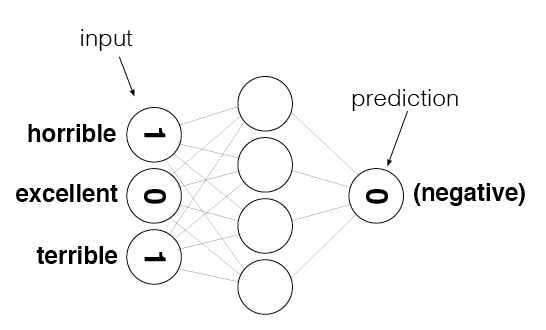

In [50]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [51]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [52]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [53]:
review_counter = Counter()

In [54]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [55]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [56]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimentNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
            # end for
        # end for
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # end for
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        # end for
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for i,word in enumerate(self.label_vocab):
            self.label2index[word] = i 
        # end for
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        print("**initializing network**")
        print("input nodes: {}  hidden nodes: {}  output nodes: {}".format(input_nodes, hidden_nodes, output_nodes))
        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        # clear previous state
        self.layer_0 *= 0
        for word in review.split(' '):
            try:
                self.layer_0[0][self.word2index[word]] = 1
            except KeyError:
                #print("KeyError in update_input_layer: {} not seen during training - skipping.".format(word))
                pass
            # end try except
            #print("updating index {}; word = {}".format(word2index[word],word))
        # end for
        #print("self.layer_0: "); print(self.layer_0)
    
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if label == 'POSITIVE':
            return 1
        elif label == 'NEGATIVE':
            return 0
        else:
            raise ValueError('label is neither POSITIVE nor NEGATIVE')
        # end if elif else
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        # Prevent overflow.
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        delta_weights_0_1 = np.zeros(self.weights_0_1.shape) # input_nodes x hidden_nodes
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape) # hidden_nodes x output_nodes
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        #print("Running forward pass. Review:")
        #print(review)
        
        self.update_input_layer(review)
        #print("input layer shape: "); print(self.layer_0.shape)
        #print("weights_0_1 shape: "); print(self.weights_0_1.shape)
        hidden_layer = np.dot(self.layer_0, self.weights_0_1) #hidden inputs = outputs
        #print("hidden_layer shape: "); print(hidden_layer.shape)
        #print("weights_1_2 shape: "); print(self.weights_1_2.shape)
        output_inputs = np.dot(hidden_layer, self.weights_1_2) # keep for backward pass
        #print("output_inputs: "); print(output_inputs)
        output = self.sigmoid(output_inputs)
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        #print("output: {}".format(output))
        if output < 0.5:
            return 'NEGATIVE'
        else:
            return 'POSITIVE'
        # end if


Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [57]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

**initializing network**
input nodes: 72810  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):286.4 #Correct:1801 #Trained:2501 Training Accuracy:72.0%
Progress:20.8% Speed(reviews/sec):286.8 #Correct:3794 #Trained:5001 Training Accuracy:75.8%
Progress:31.2% Speed(reviews/sec):287.0 #Correct:5890 #Trained:7501 Training Accuracy:78.5%
Progress:41.6% Speed(reviews/sec):286.9 #Correct:8015 #Trained:10001 Training Accuracy:80.1%
Progress:52.0% Speed(reviews/sec):287.2 #Correct:10143 #Trained:12501 Training Accuracy:81.1%
Progress:62.5% Speed(reviews/sec):288.3 #Correct:12277 #Trained:15001 Training Accuracy:81.8%
Progress:72.9% Speed(reviews/sec):287.6 #Correct:14388 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):288.4 #Correct:16575 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):289.0 #Correct:18758 #Trained:22501 Training Accuracy:83.3%

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [58]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:36.9% Speed(reviews/sec):1981. #Correct:325 #Tested:370 Testing Accuracy:87.8%

Progress:99.9% Speed(reviews/sec):1984. #Correct:854 #Tested:1000 Testing Accuracy:85.4%

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

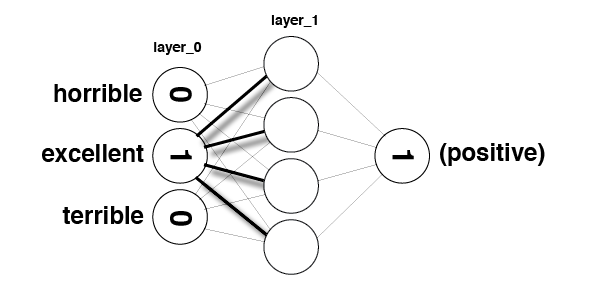

In [59]:
Image(filename='sentiment_network_sparse.png')

In [60]:
layer_0 = np.zeros(10)

In [61]:
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [62]:
layer_0[4] = 1
layer_0[9] = 1

In [63]:
layer_0

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

In [64]:
weights_0_1 = np.random.randn(10,5)

In [65]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In [66]:
indices = [4,9]

In [67]:
layer_1 = np.zeros(5)

In [68]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [69]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

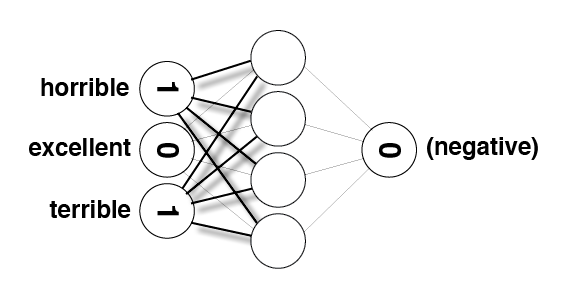

In [70]:
Image(filename='sentiment_network_sparse_2.png')

In [71]:
layer_1 = np.zeros(5)

In [72]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [73]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [39]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimentNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
            # end for
        # end for
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # end for
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        # end for
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for i,word in enumerate(self.label_vocab):
            self.label2index[word] = i 
        # end for
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        print("**initializing network**")
        print("input nodes: {}  hidden nodes: {}  output nodes: {}".format(input_nodes, hidden_nodes, output_nodes))
        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.layer_1 = np.zeros((1,hidden_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        # clear previous state
        self.layer_0 *= 0
        for word in review.split(' '):
            try:
                self.layer_0[0][self.word2index[word]] = 1
            except KeyError:
                #print("KeyError in update_input_layer: {} not seen during training - skipping.".format(word))
                pass
            # end try except
            #print("updating index {}; word = {}".format(word2index[word],word))
        # end for
        #print("self.layer_0: "); print(self.layer_0)
    
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if label == 'POSITIVE':
            return 1
        elif label == 'NEGATIVE':
            return 0
        else:
            raise ValueError('label is neither POSITIVE nor NEGATIVE')
        # end if elif else
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        # Prevent overflow.
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        delta_weights_0_1 = np.zeros(self.weights_0_1.shape) # input_nodes x hidden_nodes
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape) # hidden_nodes x output_nodes
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            # end for
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        #print("Running forward pass. Review:")
        #print(review)
        self.layer_1 *= 0
        indices = set()
        for word in review.lower().split(" "):
            if(word in self.word2index.keys()):
                indices.add(self.word2index[word])
        for index in indices:
            self.layer_1 += self.weights_0_1[index]
        # end for
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        #print("output: {}".format(output))
        if layer_2 < 0.5:
            return 'NEGATIVE'
        else:
            return 'POSITIVE'
        # end if


Run the following cell to recreate the network and train it once again.

In [40]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

**initializing network**
input nodes: 72810  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1865. #Correct:1794 #Trained:2501 Training Accuracy:71.7%
Progress:20.8% Speed(reviews/sec):1683. #Correct:3782 #Trained:5001 Training Accuracy:75.6%
Progress:31.2% Speed(reviews/sec):1613. #Correct:5884 #Trained:7501 Training Accuracy:78.4%
Progress:41.6% Speed(reviews/sec):1591. #Correct:8027 #Trained:10001 Training Accuracy:80.2%
Progress:52.0% Speed(reviews/sec):1566. #Correct:10157 #Trained:12501 Training Accuracy:81.2%
Progress:62.5% Speed(reviews/sec):1565. #Correct:12277 #Trained:15001 Training Accuracy:81.8%
Progress:72.9% Speed(reviews/sec):1590. #Correct:14406 #Trained:17501 Training Accuracy:82.3%
Progress:83.3% Speed(reviews/sec):1612. #Correct:16583 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):1600. #Correct:18768 #Trained:22501 Training Accuracy:83.4%

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [41]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2024. #Correct:854 #Tested:1000 Testing Accuracy:85.4%

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

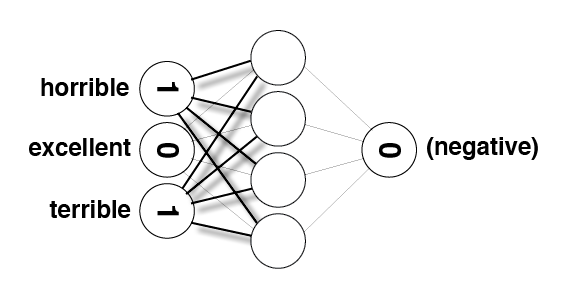

In [42]:
Image(filename='sentiment_network_sparse_2.png')

In [43]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [44]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.9698132995760007),
 ('uwe', -4.6249728132842707),
 ('seagal', -3.6441435602725449),
 ('unwatchable', -3.2580965380214821),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.3075726345050849),
 ('worst', -2.2869878961803778),
 ('laughable', -2.2643638801738479),
 ('awful', -2.2271942470274348),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.2046046846338418),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.9951003932460849),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.9870682215488209),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166)

In [45]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [46]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [47]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [48]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [54]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 
import time
import sys
import numpy as np
from collections import Counter

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1, min_count = 10, polarity_cutoff = 1):
        """Create a SentimentNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels, min_count, polarity_cutoff)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels, min_count, polarity_cutoff):
        
        # Create three Counter objects to store positive, negative and total counts
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()
        pos_neg_ratios = Counter()


        
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        # Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1
        # Calculate the ratios of positive and negative uses of the most common words
        # Consider words to be "common" if they've been used at least 100 times
        for term,cnt in list(total_counts.most_common()):
            pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
            pos_neg_ratios[term] = np.log(pos_neg_ratio)
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if (total_counts[word] > min_count) and (abs(pos_neg_ratios[word]) > polarity_cutoff):
                    review_vocab.add(word)
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # end for
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        # end for
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for i,word in enumerate(self.label_vocab):
            self.label2index[word] = i 
        # end for
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        print("**initializing network**")
        print("input nodes: {}  hidden nodes: {}  output nodes: {}".format(input_nodes, hidden_nodes, output_nodes))
        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.layer_1 = np.zeros((1,hidden_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        # clear previous state
        self.layer_0 *= 0
        for word in review.split(' '):
            try:
                self.layer_0[0][self.word2index[word]] = 1
            except KeyError:
                #print("KeyError in update_input_layer: {} not seen during training - skipping.".format(word))
                pass
            # end try except
            #print("updating index {}; word = {}".format(word2index[word],word))
        # end for
        #print("self.layer_0: "); print(self.layer_0)
    
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if label == 'POSITIVE':
            return 1
        elif label == 'NEGATIVE':
            return 0
        else:
            raise ValueError('label is neither POSITIVE nor NEGATIVE')
        # end if elif else
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        # Prevent overflow.
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        delta_weights_0_1 = np.zeros(self.weights_0_1.shape) # input_nodes x hidden_nodes
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape) # hidden_nodes x output_nodes
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            # end for
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        #print("Running forward pass. Review:")
        #print(review)
        self.layer_1 *= 0
        indices = set()
        for word in review.lower().split(" "):
            if(word in self.word2index.keys()):
                indices.add(self.word2index[word])
        for index in indices:
            self.layer_1 += self.weights_0_1[index]
        # end for
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        #print("output: {}".format(output))
        if layer_2 < 0.5:
            return 'NEGATIVE'
        else:
            return 'POSITIVE'
        # end if


Run the following cell to train your network with a small polarity cutoff.

In [55]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


**initializing network**
input nodes: 11697  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1815. #Correct:1982 #Trained:2501 Training Accuracy:79.2%
Progress:20.8% Speed(reviews/sec):1698. #Correct:4048 #Trained:5001 Training Accuracy:80.9%
Progress:31.2% Speed(reviews/sec):1764. #Correct:6164 #Trained:7501 Training Accuracy:82.1%
Progress:41.6% Speed(reviews/sec):1798. #Correct:8320 #Trained:10001 Training Accuracy:83.1%
Progress:52.0% Speed(reviews/sec):1826. #Correct:10488 #Trained:12501 Training Accuracy:83.8%
Progress:62.5% Speed(reviews/sec):1840. #Correct:12627 #Trained:15001 Training Accuracy:84.1%
Progress:72.9% Speed(reviews/sec):1860. #Correct:14764 #Trained:17501 Training Accuracy:84.3%
Progress:83.3% Speed(reviews/sec):1855. #Correct:16930 #Trained:20001 Training Accuracy:84.6%
Progress:93.7% Speed(reviews/sec):1863. #Correct:19115 #Trained:22501 Training Accuracy:84.9%

And run the following cell to test it's performance. It should be 

In [56]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:26.5% Speed(reviews/sec):2115. #Correct:237 #Tested:266 Testing Accuracy:89.0%

Progress:99.9% Speed(reviews/sec):2355. #Correct:858 #Tested:1000 Testing Accuracy:85.8%

Run the following cell to train your network with a much larger polarity cutoff.

In [57]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


**initializing network**
input nodes: 3295  hidden nodes: 10  output nodes: 1
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):8345. #Correct:2115 #Trained:2501 Training Accuracy:84.5%
Progress:20.8% Speed(reviews/sec):7024. #Correct:4235 #Trained:5001 Training Accuracy:84.6%
Progress:31.2% Speed(reviews/sec):6637. #Correct:6364 #Trained:7501 Training Accuracy:84.8%
Progress:41.6% Speed(reviews/sec):6731. #Correct:8516 #Trained:10001 Training Accuracy:85.1%
Progress:52.0% Speed(reviews/sec):6600. #Correct:10677 #Trained:12501 Training Accuracy:85.4%
Progress:62.5% Speed(reviews/sec):6483. #Correct:12841 #Trained:15001 Training Accuracy:85.6%
Progress:72.9% Speed(reviews/sec):6432. #Correct:14960 #Trained:17501 Training Accuracy:85.4%
Progress:83.3% Speed(reviews/sec):6511. #Correct:17144 #Trained:20001 Training Accuracy:85.7%
Progress:93.7% Speed(reviews/sec):6572. #Correct:19327 #Trained:22501 Training Accuracy:85.8%


And run the following cell to test it's performance.

In [58]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:68.8% Speed(reviews/sec):4033. #Correct:575 #Tested:689 Testing Accuracy:83.4%

Progress:99.9% Speed(reviews/sec):4350. #Correct:823 #Tested:1000 Testing Accuracy:82.3%

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [59]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


**initializing network**
input nodes: 55775  hidden nodes: 10  output nodes: 1


In [60]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1792. #Correct:1956 #Trained:2501 Training Accuracy:78.2%
Progress:20.8% Speed(reviews/sec):1539. #Correct:4003 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):1521. #Correct:6123 #Trained:7501 Training Accuracy:81.6%
Progress:41.6% Speed(reviews/sec):1523. #Correct:8277 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):1517. #Correct:10437 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):1524. #Correct:12577 #Trained:15001 Training Accuracy:83.8%
Progress:72.9% Speed(reviews/sec):1545. #Correct:14680 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):1554. #Correct:16842 #Trained:20001 Training Accuracy:84.2%
Progress:93.7% Speed(reviews/sec):1570. #Correct:19019 #Trained:22501 Training Accuracy:84.5%
Progress:99.9% Speed(reviews/sec):1572. #Correct:20339 #Trained:24000 Training

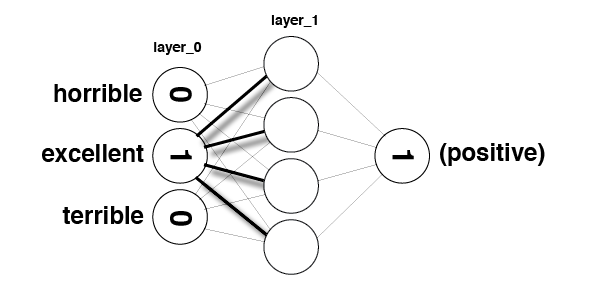

In [61]:
Image(filename='sentiment_network_sparse.png')

In [62]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [63]:
get_most_similar_words("excellent")

[('excellent', 0.1354073586770721),
 ('perfect', 0.12407754430769964),
 ('amazing', 0.090617656639490007),
 ('today', 0.090178612384675227),
 ('wonderful', 0.087980435410444341),
 ('fun', 0.087274637970267355),
 ('best', 0.085265944376860636),
 ('great', 0.085125147775878124),
 ('liked', 0.077560143039960297),
 ('definitely', 0.077127205962020551),
 ('loved', 0.073830532345371541),
 ('brilliant', 0.073498127661729709),
 ('favorite', 0.073490461068235702),
 ('superb', 0.071433476379991798),
 ('fantastic', 0.07054122977224489),
 ('job', 0.068598535236494534),
 ('enjoyable', 0.065797082824780168),
 ('incredible', 0.06528987266915387),
 ('rare', 0.064863334816869428),
 ('highly', 0.062907555068581991),
 ('enjoyed', 0.062169336515568691),
 ('perfectly', 0.061854336006885918),
 ('wonderfully', 0.061847227253711175),
 ('bit', 0.059590215272403803),
 ('fascinating', 0.059500854784902073),
 ('gem', 0.05920505419779723),
 ('outstanding', 0.058700893565535636),
 ('beautiful', 0.058424652490971),


In [64]:
get_most_similar_words("terrible")

[('worst', 0.17080304459711693),
 ('awful', 0.12200451201539123),
 ('waste', 0.12052859349320866),
 ('poor', 0.093193422749506594),
 ('terrible', 0.093043845077605353),
 ('dull', 0.08573006253205856),
 ('poorly', 0.081582056660624694),
 ('disappointment', 0.080897205383755708),
 ('fails', 0.079276725601534356),
 ('boring', 0.078785636050302602),
 ('disappointing', 0.07678298445086601),
 ('unfortunately', 0.076166364949662196),
 ('mess', 0.071729761633009897),
 ('worse', 0.070826114237171084),
 ('stupid', 0.069079248566003504),
 ('badly', 0.067331621825259064),
 ('annoying', 0.06672103504714394),
 ('bad', 0.064975249559514503),
 ('save', 0.063903387146791599),
 ('wasted', 0.062303708977020818),
 ('disappointed', 0.062045960558191462),
 ('supposed', 0.061080408254547768),
 ('horrible', 0.05986168474010585),
 ('laughable', 0.059609393738444795),
 ('crap', 0.057717996317080376),
 ('basically', 0.057105361773779832),
 ('ridiculous', 0.056952463061616582),
 ('avoid', 0.056840270999401879),
 

In [65]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [66]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [68]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words